In [1]:
# only adjust settings in this cell
state = 'IA'
root_name = 'Polk'     # which county will root our first district 
k = 4                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = 'C:\\districting-data-2020-reprojection\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
plans = [[[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [0, 15, 16, 25, 28, 29, 39, 44, 47, 49, 50, 61, 67, 72, 75, 81, 83, 85, 95, 98], [1, 2, 3, 4, 6, 10, 12, 18, 20, 21, 22, 23, 24, 26, 27, 31, 33, 38, 41, 42, 45, 46, 48, 54, 59, 60, 65, 71, 76, 84, 86, 92, 94, 96, 97]], [[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [3, 6, 10, 15, 16, 25, 28, 29, 38, 39, 45, 50, 61, 67, 72, 75, 83, 85, 98], [0, 1, 2, 4, 12, 18, 20, 21, 22, 23, 24, 26, 27, 31, 33, 41, 42, 44, 46, 47, 48, 49, 54, 59, 60, 65, 71, 76, 81, 84, 86, 92, 94, 95, 96, 97]], [[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [0, 5, 7, 11, 19, 23, 30, 31, 32, 35, 40, 42, 49, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 81, 82, 88, 89, 90, 91], [1, 10, 12, 20, 21, 22, 24, 25, 26, 27, 44, 45, 46, 47, 60, 71, 72, 75, 83, 86, 87, 92, 95, 96, 97], [2, 3, 4, 6, 9, 13, 15, 16, 18, 28, 29, 33, 34, 36, 38, 39, 41, 48, 50, 51, 54, 59, 61, 65, 67, 76, 77, 80, 84, 85, 94, 98]], [[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [0, 5, 7, 11, 19, 23, 30, 31, 32, 35, 40, 42, 49, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 81, 82, 88, 89, 90, 91], [3, 13, 15, 16, 24, 25, 26, 28, 34, 36, 44, 46, 47, 50, 61, 72, 77, 80, 83, 85, 87, 95, 98], [1, 2, 4, 6, 9, 10, 12, 18, 20, 21, 22, 27, 29, 33, 38, 39, 41, 45, 48, 51, 54, 59, 60, 65, 67, 71, 75, 76, 84, 86, 92, 94, 96, 97]], [[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [0, 5, 7, 11, 19, 23, 30, 31, 32, 35, 40, 42, 49, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 81, 82, 88, 89, 90, 91], [12, 15, 21, 24, 25, 26, 28, 29, 34, 44, 45, 47, 51, 60, 61, 67, 71, 72, 77, 80, 83, 85, 86, 87, 96, 97, 98], [1, 2, 3, 4, 6, 9, 10, 13, 16, 18, 20, 22, 27, 33, 36, 38, 39, 41, 46, 48, 50, 54, 59, 65, 75, 76, 84, 92, 94, 95]], [[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [5, 7, 11, 13, 15, 19, 23, 30, 35, 36, 40, 50, 52, 55, 56, 57, 63, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90], [1, 12, 20, 21, 22, 24, 25, 26, 27, 28, 38, 39, 44, 47, 60, 61, 65, 71, 83, 85, 86, 92, 96, 97, 98], [0, 2, 3, 4, 6, 9, 10, 16, 18, 29, 31, 32, 33, 34, 41, 42, 45, 46, 48, 49, 51, 54, 58, 59, 67, 75, 76, 84, 91, 94, 95]], [[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [0, 4, 5, 7, 11, 13, 15, 30, 35, 36, 40, 49, 56, 57, 61, 64, 69, 72, 74, 81, 82, 87, 88, 89, 90], [12, 20, 21, 22, 24, 25, 26, 27, 28, 34, 39, 44, 46, 47, 60, 67, 71, 77, 80, 85, 86, 92, 95, 96, 97, 98], [1, 2, 3, 6, 9, 10, 16, 18, 19, 23, 29, 31, 32, 33, 38, 41, 42, 45, 48, 50, 51, 52, 54, 55, 58, 59, 63, 65, 70, 75, 76, 83, 84, 91, 94]], [[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [0, 4, 5, 7, 11, 15, 16, 34, 49, 50, 51, 56, 57, 61, 64, 69, 72, 74, 77, 80, 81, 82, 87, 88, 90], [3, 12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 32, 35, 40, 42, 44, 47, 52, 55, 58, 60, 65, 67, 71, 83, 86, 92, 95, 96, 97], [1, 2, 6, 9, 10, 13, 18, 23, 28, 29, 30, 33, 36, 38, 39, 41, 45, 46, 48, 54, 59, 63, 70, 75, 76, 84, 85, 89, 91, 94, 98]], [[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [0, 4, 5, 7, 11, 15, 16, 34, 49, 50, 51, 56, 57, 61, 64, 69, 72, 74, 77, 80, 81, 82, 87, 88, 90], [1, 12, 19, 20, 21, 22, 24, 25, 26, 27, 30, 31, 35, 39, 40, 42, 44, 46, 47, 54, 55, 60, 63, 65, 70, 71, 86, 89, 92, 96, 97], [2, 3, 6, 9, 10, 13, 18, 23, 28, 29, 32, 33, 36, 38, 41, 45, 48, 52, 58, 59, 67, 75, 76, 83, 84, 85, 91, 94, 95, 98]], [[8, 14, 17, 37, 43, 53, 62, 66, 68, 73, 78, 79, 93], [6, 7, 10, 11, 13, 16, 28, 29, 34, 45, 50, 51, 75, 77, 80, 85, 88, 98], [2, 9, 12, 15, 21, 22, 24, 25, 26, 27, 32, 33, 41, 44, 46, 47, 52, 56, 58, 59, 60, 61, 63, 70, 71, 72, 82, 84, 86, 87, 90, 91, 92, 95, 96, 97], [0, 1, 3, 4, 5, 18, 19, 20, 23, 30, 31, 35, 36, 38, 39, 40, 42, 48, 49, 54, 55, 57, 64, 65, 67, 69, 74, 76, 81, 83, 89, 94]], [[4, 8, 10, 18, 21, 22, 45, 46, 48, 60, 71, 76, 86, 94, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 3, 9, 11, 12, 15, 24, 26, 28, 29, 34, 38, 39, 43, 44, 47, 50, 54, 62, 63, 67, 73, 75, 77, 81, 83, 85, 95, 97, 98], [1, 2, 6, 14, 16, 17, 19, 20, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 49, 52, 53, 55, 58, 59, 65, 66, 68, 78, 79, 84, 89, 91, 92, 93]], [[4, 8, 10, 18, 21, 22, 45, 46, 48, 60, 71, 76, 86, 94, 96], [3, 12, 13, 24, 26, 28, 29, 34, 36, 38, 39, 51, 67, 77, 80, 81, 83, 85, 88, 95, 97, 98], [0, 5, 7, 11, 14, 15, 23, 25, 30, 32, 33, 37, 43, 44, 47, 50, 53, 54, 56, 57, 59, 61, 63, 64, 66, 69, 70, 72, 73, 74, 82, 84, 87, 90, 91], [1, 2, 6, 9, 16, 17, 19, 20, 27, 31, 35, 40, 41, 42, 49, 52, 55, 58, 62, 65, 68, 75, 78, 79, 89, 92, 93]], [[4, 8, 10, 18, 21, 22, 45, 46, 48, 60, 71, 76, 86, 94, 96], [3, 12, 13, 24, 26, 28, 29, 34, 36, 38, 39, 51, 67, 77, 80, 81, 83, 85, 88, 95, 97, 98], [0, 5, 7, 11, 14, 15, 25, 30, 32, 33, 35, 37, 40, 43, 44, 47, 53, 54, 55, 56, 57, 61, 64, 66, 69, 72, 73, 74, 82, 84, 87, 89, 90], [1, 2, 6, 9, 16, 17, 19, 20, 23, 27, 31, 41, 42, 49, 50, 52, 58, 59, 62, 63, 65, 68, 70, 75, 78, 79, 91, 92, 93]], [[4, 8, 10, 18, 21, 22, 45, 46, 48, 60, 71, 76, 86, 94, 96], [3, 12, 13, 24, 26, 28, 29, 34, 36, 38, 39, 51, 67, 77, 80, 81, 83, 85, 88, 95, 97, 98], [0, 5, 7, 11, 15, 23, 25, 30, 32, 33, 43, 44, 47, 50, 52, 53, 54, 56, 57, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 79, 82, 87, 89, 90], [1, 2, 6, 9, 14, 16, 17, 19, 20, 27, 31, 35, 37, 40, 41, 42, 49, 55, 58, 59, 65, 68, 75, 78, 84, 91, 92, 93]], [[4, 8, 10, 18, 21, 22, 45, 46, 48, 60, 71, 76, 86, 94, 96], [3, 12, 13, 24, 26, 28, 29, 34, 36, 38, 39, 51, 67, 77, 80, 81, 83, 85, 88, 95, 97, 98], [0, 5, 7, 11, 14, 15, 23, 25, 30, 35, 37, 43, 44, 47, 50, 53, 54, 56, 57, 59, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 82, 87, 89, 90, 91], [1, 2, 6, 9, 16, 17, 19, 20, 27, 31, 32, 33, 40, 41, 42, 49, 52, 55, 58, 65, 68, 75, 78, 79, 84, 92, 93]], [[4, 8, 10, 18, 21, 22, 45, 46, 48, 60, 71, 76, 86, 94, 96], [3, 12, 13, 24, 26, 28, 29, 34, 36, 38, 39, 51, 67, 77, 80, 81, 83, 85, 88, 95, 97, 98], [0, 5, 7, 11, 14, 15, 25, 30, 32, 35, 37, 40, 43, 44, 47, 52, 53, 54, 56, 57, 59, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 82, 87, 89, 90], [1, 2, 6, 9, 16, 17, 19, 20, 23, 27, 31, 33, 41, 42, 49, 50, 55, 58, 65, 68, 75, 78, 79, 84, 91, 92, 93]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [12, 18, 34, 38, 45, 46, 48, 67, 75, 77, 80, 83, 85, 88, 94, 95, 98], [3, 5, 7, 11, 15, 24, 25, 26, 28, 33, 39, 43, 44, 47, 54, 56, 57, 58, 61, 62, 63, 64, 69, 72, 73, 74, 81, 82, 84, 87, 90, 97], [0, 1, 6, 9, 13, 14, 17, 19, 20, 23, 29, 30, 31, 32, 35, 36, 37, 40, 41, 42, 49, 50, 51, 52, 53, 55, 59, 65, 66, 70, 79, 89, 91, 92, 93]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 9, 12, 13, 17, 18, 23, 24, 26, 29, 33, 37, 38, 39, 41, 44, 45, 46, 48, 49, 50, 52, 53, 63, 67, 73, 75, 79, 81, 83, 84, 91, 93, 94, 95, 97], [1, 5, 7, 14, 19, 20, 30, 31, 32, 35, 36, 40, 42, 43, 55, 56, 57, 58, 59, 62, 64, 65, 66, 69, 70, 72, 74, 80, 82, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 12, 13, 14, 17, 18, 23, 24, 26, 29, 32, 33, 38, 39, 44, 45, 46, 48, 49, 50, 52, 53, 58, 62, 67, 75, 79, 80, 83, 91, 93, 94, 95, 97], [1, 5, 7, 9, 19, 20, 30, 31, 35, 36, 37, 40, 41, 42, 43, 55, 56, 57, 59, 63, 64, 65, 66, 69, 70, 72, 73, 74, 81, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 9, 12, 13, 14, 17, 18, 23, 24, 26, 29, 32, 38, 39, 41, 44, 45, 46, 48, 49, 50, 53, 58, 59, 62, 63, 67, 70, 75, 79, 83, 91, 93, 94, 95, 97], [1, 5, 7, 19, 20, 30, 31, 33, 35, 36, 37, 40, 42, 43, 52, 55, 56, 57, 64, 65, 66, 69, 72, 73, 74, 80, 81, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 9, 12, 13, 18, 23, 24, 26, 29, 32, 33, 36, 37, 38, 39, 43, 44, 45, 46, 48, 49, 50, 52, 58, 59, 62, 63, 66, 67, 73, 75, 80, 83, 84, 91, 94, 95, 97], [1, 5, 7, 14, 17, 19, 20, 30, 31, 35, 40, 41, 42, 53, 55, 56, 57, 64, 65, 69, 70, 72, 74, 79, 81, 82, 87, 89, 90, 92, 93]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 9, 12, 13, 14, 17, 18, 23, 24, 26, 29, 33, 37, 38, 39, 41, 44, 45, 46, 48, 49, 50, 53, 58, 59, 66, 67, 75, 79, 83, 84, 93, 94, 95, 97], [1, 5, 7, 19, 20, 30, 31, 32, 35, 36, 40, 42, 43, 52, 55, 56, 57, 62, 63, 64, 65, 69, 70, 72, 73, 74, 80, 81, 82, 87, 89, 90, 91, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 6, 9, 12, 17, 18, 23, 24, 26, 29, 32, 37, 38, 39, 41, 44, 45, 46, 48, 49, 50, 53, 59, 62, 67, 75, 79, 81, 83, 91, 92, 93, 94, 95, 97], [5, 7, 13, 14, 19, 20, 30, 31, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 63, 64, 65, 66, 69, 70, 72, 73, 74, 80, 82, 84, 87, 89, 90]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 12, 13, 14, 17, 18, 23, 24, 26, 29, 38, 39, 43, 44, 45, 46, 48, 49, 50, 53, 58, 63, 66, 67, 73, 75, 80, 83, 84, 91, 93, 94, 95, 97], [1, 5, 7, 9, 19, 20, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 52, 55, 56, 57, 59, 62, 64, 65, 69, 70, 72, 74, 79, 81, 82, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 6, 9, 12, 17, 18, 24, 26, 29, 33, 37, 38, 39, 41, 44, 45, 46, 48, 49, 50, 53, 59, 62, 63, 67, 70, 73, 75, 79, 81, 83, 91, 93, 94, 95, 97], [5, 7, 13, 14, 19, 20, 23, 30, 31, 32, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 64, 65, 66, 69, 72, 74, 80, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 12, 17, 18, 24, 26, 29, 37, 38, 39, 41, 43, 44, 45, 46, 48, 49, 50, 53, 59, 62, 63, 66, 67, 70, 75, 79, 81, 83, 91, 93, 94, 95, 97], [1, 5, 7, 9, 13, 14, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 52, 55, 56, 57, 58, 64, 65, 69, 72, 73, 74, 80, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 6, 9, 12, 14, 17, 18, 24, 26, 29, 37, 38, 39, 41, 44, 45, 46, 48, 49, 50, 53, 59, 63, 66, 67, 70, 73, 75, 79, 83, 84, 92, 93, 94, 95, 97], [5, 7, 13, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 62, 64, 65, 69, 72, 74, 80, 81, 82, 87, 89, 90, 91]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 1, 3, 6, 9, 12, 13, 14, 17, 18, 23, 26, 28, 29, 33, 38, 41, 45, 46, 48, 49, 50, 51, 52, 53, 59, 63, 70, 75, 79, 83, 84, 85, 91, 93, 94, 95, 97], [5, 7, 15, 19, 20, 30, 31, 32, 35, 36, 37, 40, 42, 43, 55, 56, 57, 58, 62, 64, 65, 66, 69, 72, 73, 74, 81, 82, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 6, 9, 12, 13, 14, 17, 18, 26, 28, 29, 32, 33, 38, 41, 45, 46, 48, 49, 50, 51, 52, 53, 58, 63, 73, 75, 79, 81, 83, 84, 85, 91, 93, 94, 95, 97], [1, 5, 7, 15, 19, 20, 23, 30, 31, 35, 36, 37, 40, 42, 43, 55, 56, 57, 59, 62, 64, 65, 66, 69, 70, 72, 74, 82, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 6, 12, 13, 17, 18, 23, 26, 28, 29, 32, 33, 37, 38, 45, 46, 48, 49, 50, 51, 52, 58, 59, 62, 75, 81, 83, 84, 85, 91, 93, 94, 95, 97], [1, 5, 7, 9, 14, 15, 19, 20, 30, 31, 35, 36, 40, 41, 42, 43, 53, 55, 56, 57, 63, 64, 65, 66, 69, 70, 72, 73, 74, 79, 82, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 1, 3, 6, 12, 17, 18, 26, 28, 29, 33, 36, 37, 38, 41, 43, 45, 46, 48, 49, 50, 51, 53, 59, 63, 75, 79, 81, 83, 84, 85, 92, 93, 94, 95, 97], [5, 7, 9, 13, 14, 15, 19, 20, 23, 30, 31, 32, 35, 40, 42, 52, 55, 56, 57, 58, 62, 64, 65, 66, 69, 70, 72, 73, 74, 82, 87, 89, 90, 91]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 6, 12, 17, 18, 23, 26, 28, 29, 32, 33, 37, 38, 45, 46, 48, 49, 50, 51, 53, 58, 63, 66, 70, 75, 81, 83, 84, 85, 91, 93, 94, 95, 97], [1, 5, 7, 9, 13, 14, 15, 19, 20, 30, 31, 35, 36, 40, 41, 42, 43, 52, 55, 56, 57, 59, 62, 64, 65, 69, 72, 73, 74, 79, 82, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 6, 12, 17, 18, 26, 28, 29, 32, 36, 38, 45, 46, 48, 49, 50, 51, 53, 59, 63, 66, 75, 79, 83, 84, 85, 91, 93, 94, 95, 97], [1, 5, 7, 9, 13, 14, 15, 19, 20, 23, 30, 31, 33, 35, 37, 40, 41, 42, 43, 52, 55, 56, 57, 58, 62, 64, 65, 69, 70, 72, 73, 74, 81, 82, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 6, 9, 12, 14, 17, 18, 23, 26, 28, 29, 32, 38, 45, 46, 48, 49, 50, 51, 53, 58, 59, 63, 66, 73, 75, 79, 81, 83, 85, 91, 93, 94, 95, 97], [1, 5, 7, 13, 15, 19, 20, 30, 31, 33, 35, 36, 37, 40, 41, 42, 43, 52, 55, 56, 57, 62, 64, 65, 69, 70, 72, 74, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 6, 9, 12, 14, 17, 18, 26, 28, 29, 32, 37, 38, 45, 46, 48, 49, 50, 51, 53, 58, 59, 62, 66, 73, 75, 79, 83, 85, 91, 93, 94, 95, 97], [1, 5, 7, 13, 15, 19, 20, 23, 30, 31, 33, 35, 36, 40, 41, 42, 43, 52, 55, 56, 57, 63, 64, 65, 69, 70, 72, 74, 81, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 18, 23, 28, 29, 33, 36, 37, 38, 45, 46, 48, 49, 50, 61, 62, 63, 66, 67, 70, 73, 75, 81, 83, 84, 91, 94, 95, 98], [1, 5, 7, 9, 13, 14, 17, 19, 20, 30, 31, 32, 35, 40, 41, 42, 43, 52, 53, 55, 56, 57, 58, 59, 64, 65, 69, 74, 79, 82, 89, 90, 92, 93]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 14, 17, 18, 28, 29, 32, 33, 38, 43, 45, 46, 48, 49, 50, 52, 61, 62, 63, 66, 67, 73, 75, 81, 83, 84, 91, 94, 95, 98], [1, 5, 7, 9, 13, 19, 20, 23, 30, 31, 35, 36, 37, 40, 41, 42, 53, 55, 56, 57, 58, 59, 64, 65, 69, 70, 74, 79, 82, 89, 90, 92, 93]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 9, 13, 17, 18, 28, 29, 32, 33, 37, 38, 45, 46, 48, 49, 50, 58, 61, 63, 66, 67, 70, 73, 75, 81, 83, 84, 91, 94, 95, 98], [1, 5, 7, 14, 19, 20, 23, 30, 31, 35, 36, 40, 41, 42, 43, 52, 53, 55, 56, 57, 59, 62, 64, 65, 69, 74, 79, 82, 89, 90, 92, 93]], [[2, 4, 8, 10, 16, 21, 22, 27, 60, 68, 71, 76, 78, 86, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 17, 18, 28, 29, 36, 37, 38, 45, 46, 48, 49, 50, 53, 61, 67, 75, 79, 81, 83, 93, 94, 95, 98], [1, 5, 7, 9, 13, 14, 19, 20, 23, 30, 31, 32, 33, 35, 40, 41, 42, 43, 52, 55, 56, 57, 58, 59, 62, 63, 64, 65, 66, 69, 70, 73, 74, 82, 84, 89, 90, 91, 92]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 15, 16, 29, 34, 36, 45, 50, 51, 61, 75, 82, 83, 85, 87, 88, 90], [0, 3, 4, 9, 18, 25, 28, 33, 38, 43, 47, 49, 54, 62, 63, 67, 70, 72, 73, 81, 95, 98], [1, 2, 5, 7, 13, 14, 17, 19, 20, 23, 30, 31, 32, 35, 37, 40, 41, 42, 52, 53, 55, 56, 57, 58, 59, 64, 65, 66, 68, 69, 74, 77, 79, 80, 84, 89, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [5, 6, 7, 10, 11, 13, 15, 16, 34, 56, 61, 69, 72, 75, 80, 82, 85, 87, 88, 90], [0, 3, 4, 9, 14, 18, 23, 25, 28, 38, 43, 45, 47, 49, 54, 58, 62, 63, 67, 83, 84, 91, 95, 98], [1, 2, 17, 19, 20, 29, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 50, 51, 52, 53, 55, 57, 59, 64, 65, 66, 68, 70, 73, 74, 77, 79, 81, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [5, 6, 7, 10, 11, 13, 15, 16, 34, 56, 61, 69, 72, 75, 80, 82, 85, 87, 88, 90], [3, 4, 9, 17, 18, 25, 28, 32, 33, 37, 38, 45, 47, 52, 54, 67, 70, 73, 83, 91, 95, 98], [0, 1, 2, 14, 19, 20, 23, 29, 30, 31, 35, 36, 40, 41, 42, 43, 49, 50, 51, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 68, 74, 77, 79, 81, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [5, 6, 7, 10, 11, 13, 15, 16, 34, 56, 61, 69, 72, 75, 80, 82, 85, 87, 88, 90], [0, 3, 4, 14, 18, 25, 28, 37, 38, 45, 47, 49, 54, 59, 62, 63, 66, 67, 83, 84, 95, 98], [1, 2, 9, 17, 19, 20, 23, 29, 30, 31, 32, 33, 35, 36, 40, 41, 42, 43, 50, 51, 52, 53, 55, 57, 58, 64, 65, 68, 70, 73, 74, 77, 79, 81, 89, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [5, 7, 11, 13, 15, 29, 30, 32, 35, 36, 40, 43, 51, 52, 55, 56, 57, 61, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [0, 3, 6, 14, 16, 25, 28, 34, 37, 47, 50, 54, 62, 66, 72, 75, 81, 83, 85, 98], [1, 2, 4, 9, 10, 17, 18, 19, 20, 23, 31, 33, 38, 41, 42, 45, 49, 53, 58, 59, 65, 67, 68, 73, 79, 84, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 9, 11, 25, 29, 30, 33, 34, 35, 36, 37, 43, 50, 52, 56, 57, 58, 61, 62, 63, 64, 66, 69, 72, 73, 74, 77, 81, 82, 87, 89, 90], [1, 2, 4, 10, 14, 16, 17, 18, 19, 20, 23, 31, 32, 40, 41, 42, 45, 49, 53, 55, 59, 65, 68, 70, 79, 84, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 7, 9, 11, 14, 23, 25, 29, 30, 34, 36, 37, 43, 49, 50, 56, 57, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 81, 82, 84, 87, 90, 91], [1, 2, 4, 6, 10, 16, 17, 18, 19, 20, 31, 32, 33, 35, 40, 41, 42, 45, 52, 53, 55, 58, 59, 65, 68, 79, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 7, 11, 14, 16, 25, 30, 33, 34, 35, 36, 37, 40, 43, 50, 52, 56, 57, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 81, 82, 87, 89, 90], [1, 2, 4, 6, 9, 10, 17, 18, 19, 20, 23, 29, 31, 32, 41, 42, 45, 49, 53, 55, 58, 59, 65, 68, 79, 84, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 9, 11, 25, 29, 33, 34, 36, 37, 43, 45, 49, 50, 53, 56, 57, 58, 61, 62, 64, 66, 69, 72, 73, 74, 77, 81, 82, 84, 87, 90], [1, 2, 4, 10, 14, 16, 17, 18, 19, 20, 23, 30, 31, 32, 35, 40, 41, 42, 52, 55, 59, 63, 65, 68, 70, 79, 89, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 7, 9, 11, 14, 23, 25, 30, 32, 34, 35, 36, 40, 43, 50, 52, 53, 55, 56, 57, 61, 62, 64, 69, 72, 74, 77, 81, 82, 87, 89, 90, 91], [1, 2, 4, 6, 10, 16, 17, 18, 19, 20, 29, 31, 33, 37, 41, 42, 45, 49, 58, 59, 63, 65, 66, 68, 70, 73, 79, 84, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [5, 6, 7, 9, 10, 11, 25, 29, 30, 32, 34, 36, 37, 45, 50, 56, 57, 61, 62, 63, 64, 69, 70, 72, 73, 74, 77, 81, 82, 87, 89, 90, 91], [0, 1, 2, 4, 14, 16, 17, 18, 19, 20, 23, 31, 33, 35, 40, 41, 42, 43, 49, 52, 53, 55, 58, 59, 65, 66, 68, 79, 84, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 9, 10, 11, 16, 18, 25, 29, 34, 36, 45, 49, 50, 56, 58, 61, 63, 66, 69, 70, 72, 77, 82, 87, 90, 91], [1, 2, 4, 14, 17, 19, 20, 23, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 52, 53, 55, 57, 59, 62, 64, 65, 68, 73, 74, 79, 81, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 11, 14, 16, 25, 29, 34, 36, 43, 49, 50, 53, 56, 57, 59, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 79, 81, 82, 84, 87, 90], [1, 2, 4, 9, 10, 17, 18, 19, 20, 23, 30, 31, 32, 33, 35, 37, 40, 41, 42, 45, 52, 55, 58, 65, 68, 89, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [5, 6, 7, 9, 11, 14, 16, 25, 29, 30, 32, 34, 35, 36, 40, 43, 49, 50, 53, 56, 57, 61, 62, 63, 64, 69, 70, 72, 74, 77, 81, 82, 87, 89, 90, 91], [0, 1, 2, 4, 10, 17, 18, 19, 20, 23, 31, 33, 37, 41, 42, 45, 52, 55, 58, 59, 65, 66, 68, 73, 79, 84, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 9, 11, 25, 29, 30, 32, 34, 36, 37, 43, 49, 50, 52, 56, 57, 58, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 81, 82, 87, 90], [1, 2, 4, 10, 14, 16, 17, 18, 19, 20, 23, 31, 33, 35, 40, 41, 42, 45, 53, 55, 59, 65, 68, 79, 84, 89, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 7, 9, 11, 14, 25, 32, 33, 34, 36, 37, 43, 50, 53, 56, 57, 58, 59, 61, 62, 63, 64, 66, 69, 72, 73, 74, 77, 79, 81, 82, 87, 90, 91], [1, 2, 4, 6, 10, 16, 17, 18, 19, 20, 23, 29, 30, 31, 35, 40, 41, 42, 45, 49, 52, 55, 65, 68, 70, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 7, 9, 11, 16, 25, 30, 34, 35, 36, 40, 43, 49, 50, 52, 55, 56, 57, 61, 63, 64, 66, 69, 72, 73, 74, 77, 81, 82, 87, 89, 90], [1, 2, 4, 6, 10, 14, 17, 18, 19, 20, 23, 29, 31, 32, 33, 37, 41, 42, 45, 53, 58, 59, 62, 65, 68, 70, 79, 84, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 11, 14, 25, 29, 30, 34, 35, 36, 37, 40, 43, 49, 50, 52, 53, 56, 57, 61, 62, 63, 64, 66, 69, 72, 74, 77, 81, 82, 87, 89, 90], [1, 2, 4, 9, 10, 16, 17, 18, 19, 20, 23, 31, 32, 33, 41, 42, 45, 55, 58, 59, 65, 68, 70, 73, 79, 84, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 11, 14, 25, 29, 30, 32, 34, 36, 37, 43, 45, 49, 50, 53, 56, 57, 61, 62, 63, 64, 66, 69, 70, 72, 74, 77, 79, 81, 82, 87, 90], [1, 2, 4, 9, 10, 16, 17, 18, 19, 20, 23, 31, 33, 35, 40, 41, 42, 52, 55, 58, 59, 65, 68, 73, 84, 89, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 10, 11, 16, 25, 29, 34, 36, 37, 43, 45, 50, 53, 56, 57, 61, 62, 63, 66, 69, 72, 74, 77, 81, 82, 87, 90, 91], [1, 2, 4, 9, 14, 17, 18, 19, 20, 23, 30, 31, 32, 33, 35, 40, 41, 42, 49, 52, 55, 58, 59, 64, 65, 68, 70, 73, 79, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [5, 6, 7, 9, 11, 23, 25, 29, 30, 34, 36, 43, 45, 50, 56, 57, 58, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 81, 82, 87, 89, 90, 91], [0, 1, 2, 4, 10, 14, 16, 17, 18, 19, 20, 31, 32, 33, 35, 37, 40, 41, 42, 49, 52, 53, 55, 59, 65, 68, 79, 84, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [5, 7, 11, 14, 19, 25, 29, 30, 32, 34, 35, 36, 40, 43, 50, 52, 53, 55, 56, 57, 61, 62, 63, 64, 69, 70, 72, 73, 74, 77, 82, 87, 89, 90], [0, 1, 2, 4, 6, 9, 10, 16, 17, 18, 20, 23, 31, 33, 37, 41, 42, 45, 49, 58, 59, 65, 66, 68, 79, 81, 84, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 9, 11, 14, 25, 29, 30, 33, 34, 36, 37, 43, 49, 50, 53, 56, 57, 61, 62, 64, 66, 69, 72, 73, 74, 77, 81, 82, 87, 90, 91], [1, 2, 4, 10, 16, 17, 18, 19, 20, 23, 31, 32, 35, 40, 41, 42, 45, 52, 55, 58, 59, 63, 65, 68, 70, 79, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [5, 7, 9, 11, 14, 19, 25, 30, 32, 34, 35, 36, 37, 40, 53, 55, 56, 57, 58, 61, 62, 63, 64, 69, 70, 72, 73, 74, 77, 81, 82, 84, 87, 89, 90], [0, 1, 2, 4, 6, 10, 16, 17, 18, 20, 23, 29, 31, 33, 41, 42, 43, 45, 49, 50, 52, 59, 65, 66, 68, 79, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [5, 7, 11, 14, 19, 25, 30, 32, 34, 35, 36, 40, 52, 53, 55, 56, 57, 59, 61, 62, 63, 64, 69, 70, 72, 73, 74, 77, 82, 87, 89, 90, 91], [0, 1, 2, 4, 6, 9, 10, 16, 17, 18, 20, 23, 29, 31, 33, 37, 41, 42, 43, 45, 49, 50, 58, 65, 66, 68, 79, 81, 84, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [5, 7, 9, 11, 25, 30, 33, 34, 35, 36, 37, 40, 43, 52, 53, 55, 56, 57, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 82, 87, 89, 90], [0, 1, 2, 4, 6, 10, 14, 16, 17, 18, 19, 20, 23, 29, 31, 32, 41, 42, 45, 49, 50, 58, 59, 65, 68, 79, 81, 84, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 9, 10, 11, 23, 25, 29, 32, 34, 36, 45, 50, 52, 56, 57, 58, 61, 62, 63, 64, 69, 70, 72, 74, 77, 81, 82, 87, 90, 91], [1, 2, 4, 14, 16, 17, 18, 19, 20, 30, 31, 33, 35, 37, 40, 41, 42, 43, 49, 53, 55, 59, 65, 66, 68, 73, 79, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 7, 9, 11, 14, 25, 29, 30, 32, 34, 36, 43, 50, 56, 57, 59, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 81, 82, 87, 89, 90, 91], [1, 2, 4, 6, 10, 16, 17, 18, 19, 20, 23, 31, 33, 35, 37, 40, 41, 42, 45, 49, 52, 53, 55, 58, 65, 68, 79, 84, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 9, 11, 16, 23, 25, 29, 32, 33, 34, 36, 45, 49, 50, 52, 56, 58, 61, 63, 66, 69, 72, 73, 74, 77, 81, 82, 87, 90, 91], [1, 2, 4, 10, 14, 17, 18, 19, 20, 30, 31, 35, 37, 40, 41, 42, 43, 53, 55, 57, 59, 62, 64, 65, 68, 70, 79, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 13, 15, 28, 38, 47, 51, 54, 67, 75, 80, 83, 85, 88, 95, 98], [0, 5, 6, 7, 10, 11, 18, 25, 29, 30, 32, 34, 35, 36, 45, 49, 50, 52, 56, 57, 61, 64, 69, 72, 74, 77, 81, 82, 87, 89, 90], [1, 2, 4, 9, 14, 16, 17, 19, 20, 23, 31, 33, 37, 40, 41, 42, 43, 53, 55, 58, 59, 62, 63, 65, 66, 68, 70, 73, 79, 84, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [0, 5, 7, 11, 13, 15, 23, 29, 30, 32, 35, 36, 40, 50, 51, 52, 56, 57, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90], [3, 6, 10, 14, 16, 25, 28, 33, 34, 37, 43, 47, 49, 61, 62, 66, 73, 75, 84, 85, 98], [1, 2, 4, 9, 17, 18, 19, 20, 31, 38, 41, 42, 45, 53, 54, 55, 58, 59, 63, 65, 67, 68, 79, 83, 91, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 6, 7, 9, 13, 18, 29, 30, 32, 35, 36, 38, 40, 43, 45, 52, 56, 57, 62, 63, 64, 67, 69, 70, 72, 73, 74, 75, 80, 81, 82, 83, 87, 89, 90, 95], [0, 1, 2, 4, 10, 14, 16, 17, 19, 20, 23, 31, 33, 37, 41, 42, 49, 50, 53, 55, 58, 59, 65, 66, 68, 79, 84, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 4, 6, 9, 10, 14, 16, 17, 18, 32, 37, 38, 43, 45, 49, 53, 58, 59, 62, 63, 66, 67, 70, 73, 75, 83, 84, 91, 93, 95], [1, 2, 5, 7, 13, 19, 20, 23, 29, 30, 31, 33, 35, 36, 40, 41, 42, 50, 52, 55, 56, 57, 64, 65, 68, 69, 72, 74, 79, 80, 81, 82, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 6, 7, 10, 13, 18, 23, 29, 30, 36, 38, 45, 56, 57, 63, 64, 66, 67, 69, 70, 72, 74, 75, 80, 82, 83, 87, 89, 90, 91, 95], [0, 1, 2, 4, 9, 14, 16, 17, 19, 20, 31, 32, 33, 35, 37, 40, 41, 42, 43, 49, 50, 52, 53, 55, 58, 59, 62, 65, 68, 73, 79, 81, 84, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [4, 5, 7, 13, 18, 29, 36, 38, 43, 45, 50, 56, 57, 64, 66, 67, 69, 72, 73, 74, 75, 80, 82, 83, 87, 90, 95], [0, 1, 2, 6, 9, 10, 14, 16, 17, 19, 20, 23, 30, 31, 32, 33, 35, 37, 40, 41, 42, 49, 52, 53, 55, 58, 59, 62, 63, 65, 68, 70, 79, 81, 84, 89, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 6, 7, 10, 13, 16, 29, 36, 37, 38, 43, 45, 50, 53, 56, 57, 62, 63, 66, 67, 69, 72, 74, 75, 80, 81, 82, 83, 87, 90, 91, 95], [1, 2, 4, 9, 14, 17, 18, 19, 20, 23, 30, 31, 32, 33, 35, 40, 41, 42, 49, 52, 55, 58, 59, 64, 65, 68, 70, 73, 79, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 7, 9, 13, 23, 29, 30, 32, 33, 35, 36, 37, 43, 45, 50, 52, 53, 56, 57, 58, 62, 63, 64, 66, 69, 70, 72, 73, 74, 75, 80, 81, 82, 83, 87, 89, 90, 91], [1, 2, 4, 6, 10, 14, 16, 17, 18, 19, 20, 31, 38, 40, 41, 42, 49, 55, 59, 65, 67, 68, 79, 84, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 4, 6, 10, 14, 16, 17, 18, 23, 29, 36, 37, 38, 45, 49, 50, 53, 63, 66, 67, 73, 75, 79, 81, 83, 91, 93, 95], [1, 2, 5, 7, 9, 13, 19, 20, 30, 31, 32, 33, 35, 40, 41, 42, 43, 52, 55, 56, 57, 58, 59, 62, 64, 65, 68, 69, 70, 72, 74, 80, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [1, 2, 4, 6, 10, 16, 17, 18, 20, 29, 37, 38, 41, 42, 45, 49, 50, 65, 67, 68, 73, 75, 79, 83, 93, 95], [0, 5, 7, 9, 13, 14, 19, 23, 30, 31, 32, 33, 35, 36, 40, 43, 52, 53, 55, 56, 57, 58, 59, 62, 63, 64, 66, 69, 70, 72, 74, 80, 81, 82, 84, 87, 89, 90, 91]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [1, 2, 4, 9, 14, 17, 18, 20, 23, 33, 38, 41, 45, 49, 52, 53, 58, 59, 62, 65, 67, 68, 75, 79, 83, 84, 93, 95], [0, 5, 6, 7, 10, 13, 16, 19, 29, 30, 31, 32, 35, 36, 37, 40, 42, 43, 50, 55, 56, 57, 63, 64, 66, 69, 70, 72, 73, 74, 80, 81, 82, 87, 89, 90, 91]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [2, 4, 6, 10, 13, 14, 16, 17, 18, 23, 29, 37, 38, 41, 45, 50, 53, 59, 62, 63, 66, 67, 68, 73, 75, 79, 83, 91, 93, 95], [0, 1, 5, 7, 9, 19, 20, 30, 31, 32, 33, 35, 36, 40, 42, 43, 49, 52, 55, 56, 57, 58, 64, 65, 69, 70, 72, 74, 80, 81, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 2, 4, 10, 14, 16, 17, 18, 36, 37, 38, 43, 45, 49, 50, 53, 62, 63, 66, 67, 68, 75, 79, 83, 91, 93, 95], [1, 5, 6, 7, 9, 13, 19, 20, 23, 29, 30, 31, 32, 33, 35, 40, 41, 42, 52, 55, 56, 57, 58, 59, 64, 65, 69, 70, 72, 73, 74, 80, 81, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [1, 2, 4, 6, 10, 13, 14, 16, 17, 18, 23, 29, 33, 37, 38, 41, 45, 49, 50, 52, 53, 58, 59, 62, 67, 68, 75, 79, 83, 84, 93, 95], [0, 5, 7, 9, 19, 20, 30, 31, 32, 35, 36, 40, 42, 43, 55, 56, 57, 63, 64, 65, 66, 69, 70, 72, 73, 74, 80, 81, 82, 87, 89, 90, 91]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 7, 9, 13, 14, 29, 30, 32, 35, 36, 38, 43, 45, 50, 53, 56, 57, 62, 63, 64, 66, 67, 69, 70, 72, 73, 74, 75, 80, 81, 82, 83, 87, 89, 90, 95], [1, 2, 4, 6, 10, 16, 17, 18, 19, 20, 23, 31, 33, 37, 40, 41, 42, 49, 52, 55, 58, 59, 65, 68, 79, 84, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 2, 4, 6, 9, 10, 13, 14, 16, 17, 18, 23, 29, 33, 37, 38, 45, 49, 50, 53, 58, 62, 63, 67, 68, 73, 75, 83, 91, 93, 95], [1, 5, 7, 19, 20, 30, 31, 32, 35, 36, 40, 41, 42, 43, 52, 55, 56, 57, 59, 64, 65, 66, 69, 70, 72, 74, 79, 80, 81, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 6, 7, 9, 10, 13, 29, 30, 32, 36, 37, 38, 45, 50, 56, 57, 62, 63, 64, 67, 69, 70, 72, 73, 74, 75, 80, 81, 82, 83, 87, 89, 90, 91, 95], [0, 1, 2, 4, 14, 16, 17, 18, 19, 20, 23, 31, 33, 35, 40, 41, 42, 43, 49, 52, 53, 55, 58, 59, 65, 66, 68, 79, 84, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 6, 7, 10, 13, 19, 29, 30, 31, 35, 36, 40, 55, 56, 57, 58, 63, 64, 69, 70, 72, 74, 75, 80, 81, 82, 87, 89, 90], [1, 2, 4, 9, 14, 16, 17, 18, 20, 23, 32, 33, 37, 38, 41, 42, 43, 45, 49, 50, 52, 53, 59, 62, 65, 66, 67, 68, 73, 79, 83, 84, 91, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 6, 7, 10, 13, 16, 19, 23, 29, 30, 31, 32, 35, 40, 50, 52, 55, 56, 57, 64, 69, 72, 74, 75, 80, 82, 87, 89, 90, 91], [0, 1, 2, 4, 9, 14, 17, 18, 20, 33, 36, 37, 38, 41, 42, 43, 45, 49, 53, 58, 59, 62, 63, 65, 66, 67, 68, 70, 73, 79, 81, 83, 84, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 4, 6, 9, 10, 14, 16, 17, 18, 23, 37, 38, 43, 45, 49, 52, 53, 59, 62, 63, 66, 67, 73, 75, 79, 81, 83, 91, 93, 95], [1, 2, 5, 7, 13, 19, 20, 29, 30, 31, 32, 33, 35, 36, 40, 41, 42, 50, 55, 56, 57, 58, 64, 65, 68, 69, 70, 72, 74, 80, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 2, 4, 6, 9, 10, 14, 16, 17, 18, 23, 37, 38, 45, 49, 50, 53, 62, 63, 66, 67, 68, 70, 73, 75, 79, 83, 91, 93, 95], [1, 5, 7, 13, 19, 20, 29, 30, 31, 32, 33, 35, 36, 40, 41, 42, 43, 52, 55, 56, 57, 58, 59, 64, 65, 69, 72, 74, 80, 81, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [4, 6, 10, 14, 16, 17, 18, 29, 36, 37, 38, 45, 50, 53, 59, 62, 63, 66, 67, 68, 73, 75, 79, 83, 91, 93, 95], [0, 1, 2, 5, 7, 9, 13, 19, 20, 23, 30, 31, 32, 33, 35, 40, 41, 42, 43, 49, 52, 55, 56, 57, 58, 64, 65, 69, 70, 72, 74, 80, 81, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 2, 4, 6, 9, 10, 14, 16, 17, 18, 29, 37, 38, 41, 45, 49, 50, 53, 59, 63, 66, 67, 68, 70, 73, 75, 79, 83, 84, 93, 95], [5, 7, 13, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 62, 64, 65, 69, 72, 74, 80, 81, 82, 87, 89, 90, 91]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 4, 6, 9, 10, 13, 16, 17, 18, 29, 37, 38, 45, 49, 50, 53, 58, 62, 63, 66, 67, 68, 70, 73, 75, 83, 91, 93, 95], [1, 2, 5, 7, 14, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 41, 42, 43, 52, 55, 56, 57, 59, 64, 65, 69, 72, 74, 79, 80, 81, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 6, 7, 10, 13, 18, 29, 30, 32, 35, 36, 38, 45, 49, 50, 52, 56, 57, 64, 67, 69, 72, 74, 75, 80, 81, 82, 83, 87, 89, 90, 95], [1, 2, 4, 9, 14, 16, 17, 19, 20, 23, 31, 33, 37, 40, 41, 42, 43, 53, 55, 58, 59, 62, 63, 65, 66, 68, 70, 73, 79, 84, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 6, 7, 10, 13, 16, 23, 29, 30, 32, 35, 36, 38, 43, 45, 49, 56, 57, 58, 64, 67, 69, 70, 72, 74, 75, 80, 81, 82, 83, 87, 89, 90, 91, 95], [0, 1, 2, 4, 9, 14, 17, 18, 19, 20, 31, 33, 37, 40, 41, 42, 50, 52, 53, 55, 59, 62, 63, 65, 66, 68, 73, 79, 84, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [4, 5, 6, 7, 13, 18, 29, 30, 35, 36, 38, 40, 45, 56, 57, 64, 67, 69, 70, 72, 74, 75, 80, 82, 83, 87, 89, 90, 95], [0, 1, 2, 9, 10, 14, 16, 17, 19, 20, 23, 31, 32, 33, 37, 41, 42, 43, 49, 50, 52, 53, 55, 58, 59, 62, 63, 65, 66, 68, 73, 79, 81, 84, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 5, 7, 10, 11, 15, 28, 34, 45, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [0, 4, 9, 14, 16, 18, 25, 33, 38, 43, 47, 49, 53, 54, 61, 63, 67, 73, 81, 83, 84, 91, 95, 98], [1, 2, 6, 13, 17, 19, 20, 23, 29, 30, 31, 32, 35, 36, 37, 40, 41, 42, 50, 51, 52, 55, 57, 58, 59, 62, 64, 65, 66, 68, 70, 74, 79, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 5, 7, 10, 11, 15, 28, 34, 45, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [0, 4, 9, 18, 25, 32, 33, 37, 38, 43, 47, 49, 50, 54, 59, 61, 63, 67, 70, 73, 79, 83, 84, 95, 98], [1, 2, 6, 13, 14, 16, 17, 19, 20, 23, 29, 30, 31, 35, 36, 40, 41, 42, 51, 52, 53, 55, 57, 58, 62, 64, 65, 66, 68, 74, 81, 89, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 5, 7, 10, 11, 15, 28, 34, 45, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [4, 14, 17, 18, 25, 32, 33, 37, 38, 47, 52, 53, 54, 61, 62, 63, 67, 73, 83, 91, 95, 98], [0, 1, 2, 6, 9, 13, 16, 19, 20, 23, 29, 30, 31, 35, 36, 40, 41, 42, 43, 49, 50, 51, 55, 57, 58, 59, 64, 65, 66, 68, 70, 74, 79, 81, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 5, 7, 10, 11, 15, 28, 34, 45, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [4, 6, 14, 16, 17, 18, 25, 33, 37, 38, 47, 50, 53, 54, 61, 62, 67, 73, 79, 83, 84, 95, 98], [0, 1, 2, 9, 13, 19, 20, 23, 29, 30, 31, 32, 35, 36, 40, 41, 42, 43, 49, 51, 52, 55, 57, 58, 59, 63, 64, 65, 66, 68, 70, 74, 81, 89, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 5, 7, 10, 11, 15, 28, 34, 45, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [4, 9, 18, 25, 32, 38, 43, 47, 49, 53, 54, 61, 62, 66, 67, 73, 79, 83, 91, 95, 98], [0, 1, 2, 6, 13, 14, 16, 17, 19, 20, 23, 29, 30, 31, 33, 35, 36, 37, 40, 41, 42, 50, 51, 52, 55, 57, 58, 59, 63, 64, 65, 68, 70, 74, 81, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 5, 7, 10, 11, 15, 28, 34, 45, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [4, 9, 16, 17, 18, 25, 32, 37, 38, 43, 47, 50, 53, 54, 61, 62, 63, 67, 83, 91, 95, 98], [0, 1, 2, 6, 13, 14, 19, 20, 23, 29, 30, 31, 33, 35, 36, 40, 41, 42, 49, 51, 52, 55, 57, 58, 59, 64, 65, 66, 68, 70, 73, 74, 79, 81, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 5, 7, 10, 11, 15, 28, 34, 45, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [4, 9, 18, 25, 32, 33, 38, 47, 49, 54, 59, 61, 63, 66, 67, 73, 83, 84, 91, 95, 98], [0, 1, 2, 6, 13, 14, 16, 17, 19, 20, 23, 29, 30, 31, 35, 36, 37, 40, 41, 42, 43, 50, 51, 52, 53, 55, 57, 58, 62, 64, 65, 68, 70, 74, 79, 81, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 5, 7, 10, 11, 15, 28, 34, 45, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [0, 4, 9, 18, 25, 33, 37, 38, 43, 47, 49, 50, 54, 58, 61, 66, 67, 73, 83, 91, 95, 98], [1, 2, 6, 13, 14, 16, 17, 19, 20, 23, 29, 30, 31, 32, 35, 36, 40, 41, 42, 51, 52, 53, 55, 57, 59, 62, 63, 64, 65, 68, 70, 74, 79, 81, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 5, 7, 10, 11, 15, 28, 34, 45, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [4, 6, 9, 16, 17, 18, 25, 33, 37, 38, 47, 49, 50, 53, 54, 61, 67, 73, 83, 91, 95, 98], [0, 1, 2, 13, 14, 19, 20, 23, 29, 30, 31, 32, 35, 36, 40, 41, 42, 43, 51, 52, 55, 57, 58, 59, 62, 63, 64, 65, 66, 68, 70, 74, 79, 81, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 5, 7, 10, 11, 15, 28, 34, 45, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [4, 18, 23, 25, 32, 37, 38, 43, 47, 49, 52, 54, 58, 61, 63, 66, 67, 73, 83, 91, 95, 98], [0, 1, 2, 6, 9, 13, 14, 16, 17, 19, 20, 29, 30, 31, 33, 35, 36, 40, 41, 42, 50, 51, 53, 55, 57, 59, 62, 64, 65, 68, 70, 74, 79, 81, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [5, 7, 9, 14, 15, 23, 25, 30, 32, 33, 35, 40, 43, 49, 51, 52, 55, 56, 57, 63, 64, 66, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [0, 1, 2, 4, 10, 16, 17, 18, 19, 20, 31, 36, 37, 41, 42, 45, 50, 53, 58, 59, 62, 65, 68, 73, 79, 85, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 25, 30, 32, 33, 35, 36, 40, 43, 49, 51, 53, 56, 57, 58, 62, 63, 64, 69, 70, 72, 73, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [1, 2, 4, 10, 14, 16, 17, 18, 19, 20, 23, 31, 37, 41, 42, 45, 50, 52, 55, 59, 65, 66, 68, 79, 85, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 19, 25, 30, 33, 35, 36, 40, 51, 55, 56, 57, 58, 62, 63, 64, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [1, 2, 4, 10, 14, 16, 17, 18, 20, 23, 31, 32, 37, 41, 42, 43, 45, 49, 50, 52, 53, 59, 65, 66, 68, 73, 79, 85, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 14, 15, 16, 23, 25, 33, 36, 37, 43, 49, 50, 51, 56, 57, 58, 59, 62, 66, 69, 72, 73, 74, 77, 80, 81, 82, 84, 87, 90, 91], [1, 2, 4, 10, 17, 18, 19, 20, 30, 31, 32, 35, 40, 41, 42, 45, 52, 53, 55, 63, 64, 65, 68, 70, 79, 85, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 14, 15, 16, 25, 33, 36, 37, 43, 50, 51, 53, 56, 57, 58, 59, 62, 63, 66, 69, 70, 72, 73, 74, 77, 80, 81, 82, 84, 87, 90, 91], [1, 2, 4, 10, 17, 18, 19, 20, 23, 30, 31, 32, 35, 40, 41, 42, 45, 49, 52, 55, 64, 65, 68, 79, 85, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [5, 7, 9, 15, 25, 30, 33, 35, 36, 40, 43, 50, 51, 55, 56, 57, 58, 62, 64, 66, 69, 70, 72, 73, 74, 77, 80, 81, 82, 84, 87, 89, 90], [0, 1, 2, 4, 10, 14, 16, 17, 18, 19, 20, 23, 31, 32, 37, 41, 42, 45, 49, 52, 53, 59, 63, 65, 68, 79, 85, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [5, 7, 9, 14, 15, 23, 25, 30, 32, 33, 35, 37, 40, 51, 52, 53, 55, 56, 57, 58, 59, 62, 64, 69, 72, 73, 74, 77, 79, 80, 81, 82, 84, 87, 89, 90, 91], [0, 1, 2, 4, 10, 16, 17, 18, 19, 20, 31, 36, 41, 42, 43, 45, 49, 50, 63, 65, 66, 68, 70, 85, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 14, 15, 25, 30, 32, 36, 43, 49, 51, 52, 56, 57, 59, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 80, 81, 82, 84, 87, 90, 91], [1, 2, 4, 10, 16, 17, 18, 19, 20, 23, 31, 33, 35, 37, 40, 41, 42, 45, 50, 53, 55, 58, 65, 68, 79, 85, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 14, 15, 23, 25, 33, 36, 37, 43, 49, 51, 53, 56, 57, 58, 62, 63, 64, 66, 69, 72, 73, 74, 77, 79, 80, 81, 82, 84, 87, 90, 91], [1, 2, 4, 10, 16, 17, 18, 19, 20, 30, 31, 32, 35, 40, 41, 42, 45, 50, 52, 55, 59, 65, 68, 70, 85, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 14, 15, 16, 23, 25, 32, 33, 36, 43, 49, 50, 51, 52, 56, 57, 58, 63, 64, 66, 69, 72, 73, 74, 77, 80, 81, 82, 84, 87, 90, 91], [1, 2, 4, 9, 10, 17, 18, 19, 20, 30, 31, 35, 37, 40, 41, 42, 45, 53, 55, 59, 62, 65, 68, 70, 79, 85, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 25, 30, 32, 33, 35, 36, 40, 50, 51, 53, 55, 56, 57, 58, 62, 64, 69, 70, 72, 74, 77, 79, 80, 81, 82, 87, 89, 90, 91], [1, 2, 4, 10, 14, 16, 17, 18, 19, 20, 23, 31, 37, 41, 42, 43, 45, 49, 52, 59, 63, 65, 66, 68, 73, 84, 85, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 14, 15, 16, 23, 25, 30, 33, 35, 36, 40, 43, 49, 50, 51, 52, 56, 57, 58, 64, 66, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90], [1, 2, 4, 9, 10, 17, 18, 19, 20, 31, 32, 37, 41, 42, 45, 53, 55, 59, 62, 63, 65, 68, 73, 79, 85, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 19, 25, 30, 32, 35, 36, 37, 40, 50, 51, 55, 56, 57, 62, 64, 66, 69, 72, 74, 77, 80, 81, 82, 87, 89, 90], [1, 2, 4, 10, 14, 16, 17, 18, 20, 23, 31, 33, 41, 42, 43, 45, 49, 52, 53, 58, 59, 63, 65, 68, 70, 73, 79, 84, 85, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 10, 15, 16, 25, 36, 37, 43, 45, 50, 51, 53, 56, 57, 62, 63, 66, 69, 72, 74, 77, 80, 81, 82, 85, 87, 90, 91], [1, 2, 4, 9, 14, 17, 18, 19, 20, 23, 30, 31, 32, 33, 35, 40, 41, 42, 49, 52, 55, 58, 59, 64, 65, 68, 70, 73, 79, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 10, 15, 16, 18, 25, 36, 45, 49, 50, 51, 56, 58, 63, 66, 69, 70, 72, 77, 80, 82, 85, 87, 90, 91], [1, 2, 4, 14, 17, 19, 20, 23, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 52, 53, 55, 57, 59, 62, 64, 65, 68, 73, 74, 79, 81, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 10, 15, 16, 25, 32, 36, 45, 50, 51, 53, 56, 62, 66, 69, 72, 73, 74, 77, 80, 81, 82, 85, 87, 90, 91], [1, 2, 4, 14, 17, 18, 19, 20, 23, 30, 31, 33, 35, 37, 40, 41, 42, 43, 49, 52, 55, 57, 58, 59, 63, 64, 65, 68, 70, 79, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 23, 25, 30, 33, 35, 36, 40, 43, 50, 51, 56, 57, 58, 59, 63, 64, 66, 69, 72, 73, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [1, 2, 4, 10, 14, 16, 17, 18, 19, 20, 31, 32, 37, 41, 42, 45, 49, 52, 53, 55, 62, 65, 68, 70, 79, 85, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 14, 15, 19, 23, 25, 30, 32, 35, 37, 40, 51, 52, 53, 55, 56, 57, 62, 64, 66, 69, 72, 74, 77, 80, 81, 82, 87, 89, 90, 91], [1, 2, 4, 9, 10, 16, 17, 18, 20, 31, 33, 36, 41, 42, 43, 45, 49, 50, 58, 59, 63, 65, 68, 70, 73, 79, 84, 85, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 10, 14, 15, 16, 25, 32, 36, 43, 45, 50, 51, 56, 62, 63, 66, 69, 70, 72, 74, 77, 80, 82, 85, 87, 90, 91], [1, 2, 4, 17, 18, 19, 20, 23, 30, 31, 33, 35, 37, 40, 41, 42, 49, 52, 53, 55, 57, 58, 59, 64, 65, 68, 73, 79, 81, 84, 89, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 16, 23, 25, 30, 32, 33, 35, 36, 37, 43, 49, 50, 51, 52, 53, 56, 57, 58, 62, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 89, 90], [1, 2, 4, 10, 14, 17, 18, 19, 20, 31, 40, 41, 42, 45, 55, 59, 63, 65, 66, 68, 73, 79, 84, 85, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [5, 7, 9, 14, 15, 25, 30, 32, 33, 35, 36, 40, 43, 50, 51, 52, 53, 55, 56, 57, 58, 64, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [0, 1, 2, 4, 10, 16, 17, 18, 19, 20, 23, 31, 37, 41, 42, 45, 49, 59, 62, 63, 65, 66, 68, 73, 79, 85, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [5, 7, 9, 15, 16, 25, 30, 32, 33, 35, 36, 40, 43, 50, 51, 52, 56, 57, 62, 63, 64, 66, 69, 70, 72, 74, 77, 80, 82, 87, 89, 90, 91], [0, 1, 2, 4, 10, 14, 17, 18, 19, 20, 23, 31, 37, 41, 42, 45, 49, 53, 55, 58, 59, 65, 68, 73, 79, 81, 84, 85, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [5, 7, 14, 15, 25, 30, 32, 35, 36, 37, 40, 43, 50, 51, 53, 56, 57, 59, 63, 64, 66, 69, 70, 72, 73, 74, 77, 79, 80, 81, 82, 84, 87, 89, 90, 91], [0, 1, 2, 4, 9, 10, 16, 17, 18, 19, 20, 23, 31, 33, 41, 42, 45, 49, 52, 55, 58, 62, 65, 68, 85, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [5, 7, 9, 14, 15, 23, 25, 30, 32, 35, 36, 40, 49, 51, 52, 56, 57, 58, 62, 64, 66, 69, 70, 72, 73, 74, 77, 80, 81, 82, 87, 89, 90, 91], [0, 1, 2, 4, 10, 16, 17, 18, 19, 20, 31, 33, 37, 41, 42, 43, 45, 50, 53, 55, 59, 63, 65, 68, 79, 84, 85, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [3, 6, 11, 13, 28, 29, 34, 38, 47, 54, 61, 67, 75, 83, 88, 95, 98], [5, 7, 9, 14, 15, 25, 30, 32, 35, 36, 40, 51, 52, 53, 55, 56, 57, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 80, 82, 84, 87, 89, 90], [0, 1, 2, 4, 10, 16, 17, 18, 19, 20, 23, 31, 33, 37, 41, 42, 43, 45, 49, 50, 58, 59, 65, 68, 79, 81, 85, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 1, 2, 3, 4, 13, 17, 18, 20, 28, 29, 37, 38, 41, 49, 50, 54, 59, 63, 67, 68, 73, 75, 79, 83, 84, 93, 95], [5, 7, 9, 14, 15, 19, 23, 30, 31, 32, 33, 35, 36, 40, 42, 43, 51, 52, 53, 55, 56, 57, 58, 61, 62, 64, 65, 66, 69, 70, 74, 77, 80, 81, 82, 87, 89, 90, 91]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 1, 2, 3, 4, 9, 13, 17, 18, 23, 28, 29, 32, 37, 38, 41, 43, 49, 50, 54, 62, 63, 66, 67, 68, 73, 75, 83, 91, 93, 95], [5, 7, 14, 15, 19, 20, 30, 31, 33, 35, 36, 40, 42, 51, 52, 53, 55, 56, 57, 58, 59, 61, 64, 65, 69, 70, 74, 77, 79, 80, 81, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 1, 2, 3, 4, 17, 18, 20, 28, 29, 33, 37, 38, 41, 43, 49, 50, 53, 54, 62, 67, 68, 75, 79, 83, 93, 95], [5, 7, 9, 13, 14, 15, 19, 23, 30, 31, 32, 35, 36, 40, 42, 51, 52, 55, 56, 57, 58, 59, 61, 63, 64, 65, 66, 69, 70, 73, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 3, 4, 14, 17, 18, 28, 29, 32, 33, 37, 38, 43, 49, 50, 53, 54, 62, 63, 66, 67, 68, 70, 75, 79, 83, 84, 91, 93, 95], [1, 5, 7, 9, 13, 15, 19, 20, 23, 30, 31, 35, 36, 40, 41, 42, 51, 52, 55, 56, 57, 58, 59, 61, 64, 65, 69, 73, 74, 77, 80, 81, 82, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 9, 13, 14, 15, 23, 30, 32, 33, 35, 36, 40, 43, 51, 52, 55, 56, 57, 58, 61, 62, 63, 64, 66, 69, 70, 74, 75, 77, 80, 81, 82, 84, 87, 89, 90, 91], [0, 1, 2, 3, 4, 17, 18, 19, 20, 28, 29, 31, 37, 38, 41, 42, 49, 50, 53, 54, 59, 65, 67, 68, 73, 79, 83, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 3, 4, 9, 17, 18, 23, 28, 29, 32, 33, 37, 38, 43, 49, 50, 51, 54, 58, 63, 66, 67, 70, 75, 77, 80, 83, 91, 93, 95], [1, 2, 5, 7, 13, 14, 15, 19, 20, 30, 31, 35, 36, 40, 41, 42, 52, 53, 55, 56, 57, 59, 61, 62, 64, 65, 68, 69, 73, 74, 79, 81, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 9, 15, 19, 30, 31, 32, 33, 35, 36, 40, 42, 51, 55, 56, 57, 61, 62, 64, 69, 70, 74, 75, 77, 80, 81, 82, 87, 89, 90], [0, 1, 2, 3, 4, 13, 14, 17, 18, 20, 23, 28, 29, 37, 38, 41, 43, 49, 50, 52, 53, 54, 58, 59, 63, 65, 66, 67, 68, 73, 79, 83, 84, 91, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 3, 4, 9, 14, 17, 18, 28, 29, 32, 37, 38, 43, 49, 50, 51, 52, 53, 54, 58, 63, 66, 67, 68, 73, 75, 83, 84, 91, 93, 95], [1, 2, 5, 7, 13, 15, 19, 20, 23, 30, 31, 33, 35, 36, 40, 41, 42, 55, 56, 57, 59, 61, 62, 64, 65, 69, 70, 74, 77, 79, 80, 81, 82, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 3, 4, 14, 17, 18, 28, 29, 36, 38, 43, 49, 50, 51, 53, 54, 62, 63, 66, 67, 70, 75, 77, 80, 81, 83, 93, 95], [1, 2, 5, 7, 9, 13, 15, 19, 20, 23, 30, 31, 32, 33, 35, 37, 40, 41, 42, 52, 55, 56, 57, 58, 59, 61, 64, 65, 68, 69, 73, 74, 79, 82, 84, 87, 89, 90, 91]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 3, 4, 14, 17, 18, 28, 29, 33, 36, 37, 38, 41, 43, 49, 50, 53, 54, 58, 59, 63, 66, 67, 68, 75, 79, 83, 84, 93, 95], [1, 5, 7, 9, 13, 15, 19, 20, 23, 30, 31, 32, 35, 40, 42, 51, 52, 55, 56, 57, 61, 62, 64, 65, 69, 70, 73, 74, 77, 80, 81, 82, 87, 89, 90, 91]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 5, 7, 13, 14, 15, 19, 23, 29, 30, 32, 35, 36, 37, 40, 50, 51, 52, 53, 55, 56, 57, 58, 59, 61, 63, 64, 69, 70, 73, 74, 75, 77, 80, 81, 82, 87, 89, 90, 91], [1, 2, 3, 4, 9, 17, 18, 20, 28, 31, 33, 38, 41, 42, 43, 49, 54, 62, 65, 66, 67, 68, 79, 83, 84, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 3, 4, 13, 17, 18, 23, 28, 29, 37, 38, 41, 43, 49, 50, 51, 52, 53, 54, 63, 66, 67, 68, 73, 75, 79, 83, 91, 93, 95], [1, 5, 7, 9, 14, 15, 19, 20, 30, 31, 32, 33, 35, 36, 40, 42, 55, 56, 57, 58, 59, 61, 62, 64, 65, 69, 70, 74, 77, 80, 81, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 14, 15, 19, 29, 30, 31, 32, 33, 35, 40, 42, 51, 52, 55, 56, 57, 58, 61, 62, 64, 69, 70, 74, 75, 77, 80, 81, 82, 84, 87, 89, 90], [0, 1, 2, 3, 4, 9, 13, 17, 18, 20, 23, 28, 36, 37, 38, 41, 43, 49, 50, 53, 54, 59, 63, 65, 66, 67, 68, 73, 79, 83, 91, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 15, 19, 29, 30, 31, 32, 35, 40, 42, 43, 50, 51, 52, 55, 56, 57, 61, 63, 64, 66, 69, 70, 74, 75, 77, 82, 87, 89, 90, 91], [0, 1, 2, 3, 4, 9, 13, 14, 17, 18, 20, 23, 28, 33, 36, 37, 38, 41, 49, 53, 54, 58, 59, 62, 65, 67, 68, 73, 79, 80, 81, 83, 84, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 1, 2, 3, 4, 9, 13, 14, 17, 18, 28, 29, 37, 38, 41, 43, 49, 50, 53, 54, 62, 63, 66, 67, 68, 73, 75, 83, 84, 91, 93, 95], [5, 7, 15, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 51, 52, 55, 56, 57, 58, 59, 61, 64, 65, 69, 70, 74, 77, 79, 80, 81, 82, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 3, 4, 13, 14, 17, 18, 28, 29, 32, 36, 37, 38, 49, 50, 51, 54, 62, 63, 66, 67, 73, 75, 83, 91, 93, 95], [1, 2, 5, 7, 9, 15, 19, 20, 23, 30, 31, 33, 35, 40, 41, 42, 43, 52, 53, 55, 56, 57, 58, 59, 61, 64, 65, 68, 69, 70, 74, 77, 79, 80, 81, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 3, 4, 14, 17, 18, 23, 28, 29, 32, 37, 38, 43, 49, 50, 52, 53, 54, 62, 63, 66, 67, 68, 70, 73, 75, 83, 91, 93, 95], [1, 5, 7, 9, 13, 15, 19, 20, 30, 31, 33, 35, 36, 40, 41, 42, 51, 55, 56, 57, 58, 59, 61, 64, 65, 69, 74, 77, 79, 80, 81, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 5, 7, 13, 14, 15, 19, 29, 30, 32, 33, 35, 36, 40, 43, 50, 51, 52, 53, 55, 56, 57, 58, 61, 62, 63, 64, 69, 70, 73, 74, 75, 77, 79, 80, 81, 82, 87, 89, 90], [1, 2, 3, 4, 9, 17, 18, 20, 23, 28, 31, 37, 38, 41, 42, 49, 54, 59, 65, 66, 67, 68, 83, 84, 91, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 9, 13, 14, 15, 19, 23, 30, 31, 32, 33, 35, 37, 40, 42, 51, 52, 55, 56, 57, 58, 61, 62, 64, 69, 74, 75, 77, 80, 82, 87, 89, 90], [0, 1, 2, 3, 4, 17, 18, 20, 28, 29, 36, 38, 41, 43, 49, 50, 53, 54, 59, 63, 65, 66, 67, 68, 70, 73, 79, 81, 83, 84, 91, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 3, 4, 9, 14, 17, 18, 23, 28, 29, 36, 37, 38, 49, 50, 52, 53, 54, 58, 62, 66, 67, 73, 75, 81, 83, 91, 93, 95], [1, 2, 5, 7, 13, 15, 19, 20, 30, 31, 32, 33, 35, 40, 41, 42, 43, 51, 55, 56, 57, 59, 61, 63, 64, 65, 68, 69, 70, 74, 77, 79, 80, 82, 84, 87, 89, 90]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 9, 13, 14, 15, 23, 29, 30, 32, 33, 35, 36, 37, 40, 50, 51, 52, 53, 55, 56, 57, 58, 61, 62, 64, 69, 70, 73, 74, 75, 77, 80, 81, 82, 84, 87, 89, 90, 91], [0, 1, 2, 3, 4, 17, 18, 19, 20, 28, 31, 38, 41, 42, 43, 49, 54, 59, 63, 65, 66, 67, 68, 79, 83, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 3, 4, 7, 15, 18, 28, 29, 37, 38, 49, 50, 51, 53, 54, 56, 61, 63, 66, 67, 75, 77, 79, 80, 82, 83, 87, 90, 95], [1, 2, 5, 9, 13, 14, 17, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 41, 42, 43, 52, 55, 57, 58, 59, 62, 64, 65, 68, 69, 70, 73, 74, 81, 84, 89, 91, 93]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 5, 7, 13, 15, 19, 29, 30, 32, 35, 36, 37, 40, 43, 49, 50, 51, 53, 55, 56, 57, 61, 62, 63, 64, 66, 69, 70, 74, 75, 77, 80, 81, 82, 87, 89, 90], [1, 2, 3, 4, 9, 14, 17, 18, 20, 23, 28, 31, 33, 38, 41, 42, 52, 54, 58, 59, 65, 67, 68, 73, 79, 83, 84, 91, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 9, 13, 15, 19, 23, 29, 30, 31, 32, 35, 40, 42, 51, 52, 55, 56, 57, 61, 64, 65, 69, 70, 74, 75, 77, 80, 82, 87, 89, 90, 91], [0, 1, 2, 3, 4, 14, 17, 18, 20, 28, 33, 36, 37, 38, 41, 43, 49, 50, 53, 54, 58, 59, 62, 63, 66, 67, 68, 73, 79, 81, 83, 84, 93, 95]], [[8, 12, 21, 22, 24, 26, 27, 39, 44, 46, 48, 60, 71, 76, 78, 86, 92, 94, 96, 97], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 3, 4, 17, 18, 28, 29, 37, 38, 41, 49, 50, 51, 53, 54, 62, 63, 66, 67, 68, 73, 75, 77, 79, 81, 83, 91, 93, 95], [1, 5, 7, 9, 13, 14, 15, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 59, 61, 64, 65, 69, 70, 74, 80, 82, 84, 87, 89, 90]], [[0, 8, 17, 30, 32, 35, 43, 49, 52, 64, 66, 68, 70, 89, 93], [5, 6, 7, 11, 15, 28, 29, 34, 45, 51, 54, 56, 69, 72, 74, 75, 82, 85, 87, 88, 90], [12, 14, 20, 21, 22, 24, 25, 26, 27, 38, 39, 42, 44, 47, 48, 60, 61, 62, 65, 67, 71, 84, 86, 92, 96, 97, 98], [1, 2, 3, 4, 9, 10, 13, 16, 18, 19, 23, 31, 33, 36, 37, 40, 41, 46, 50, 53, 55, 57, 58, 59, 63, 73, 76, 77, 78, 79, 80, 81, 83, 91, 94, 95]], [[0, 8, 17, 30, 32, 35, 43, 49, 52, 64, 66, 68, 70, 89, 93], [3, 6, 15, 28, 29, 61, 72, 75, 82, 85, 87, 88, 98], [12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 40, 41, 42, 44, 46, 47, 48, 54, 55, 60, 63, 65, 71, 84, 86, 91, 92, 96, 97], [1, 2, 4, 5, 7, 9, 10, 11, 13, 14, 16, 18, 34, 36, 37, 38, 39, 45, 50, 51, 53, 56, 57, 58, 59, 62, 67, 69, 73, 74, 76, 77, 78, 79, 80, 81, 83, 90, 94, 95]], [[0, 8, 17, 30, 32, 35, 43, 49, 52, 64, 66, 68, 70, 89, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [12, 14, 20, 21, 22, 24, 25, 26, 27, 28, 44, 46, 47, 54, 56, 59, 60, 62, 71, 72, 82, 83, 84, 86, 87, 90, 92, 96, 97], [1, 2, 3, 4, 9, 13, 16, 18, 19, 23, 31, 33, 36, 37, 38, 39, 40, 41, 42, 48, 50, 53, 55, 57, 58, 63, 65, 67, 73, 74, 76, 78, 79, 81, 91, 94, 95]], [[0, 8, 17, 30, 32, 35, 43, 49, 52, 64, 66, 68, 70, 89, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [1, 3, 12, 20, 21, 22, 24, 25, 26, 27, 38, 41, 42, 44, 47, 56, 60, 65, 71, 72, 82, 84, 86, 87, 90, 92, 95, 96, 97], [2, 4, 9, 13, 14, 16, 18, 19, 23, 28, 31, 33, 36, 37, 39, 40, 46, 48, 50, 53, 54, 55, 57, 58, 59, 62, 63, 67, 73, 74, 76, 78, 79, 81, 83, 91, 94]], [[8, 17, 19, 23, 30, 32, 35, 37, 40, 49, 52, 55, 58, 63, 64, 66, 70, 73, 89, 91], [0, 5, 7, 11, 13, 15, 28, 34, 43, 51, 57, 69, 74, 75, 77, 80, 81, 83, 85, 88, 98], [1, 12, 20, 21, 22, 24, 25, 26, 27, 39, 41, 44, 47, 48, 56, 59, 60, 61, 65, 67, 71, 72, 82, 84, 86, 87, 90, 92, 96, 97], [2, 3, 4, 6, 9, 10, 14, 16, 18, 29, 31, 33, 36, 38, 42, 45, 46, 50, 53, 54, 62, 68, 76, 78, 79, 93, 94, 95]], [[8, 17, 19, 23, 30, 32, 35, 37, 40, 49, 52, 55, 58, 63, 64, 66, 70, 73, 89, 91], [0, 4, 5, 6, 7, 10, 13, 16, 18, 36, 43, 50, 56, 57, 61, 69, 74, 75, 80, 81, 85, 88], [2, 11, 12, 15, 21, 22, 24, 25, 26, 27, 29, 34, 38, 39, 41, 44, 46, 47, 51, 59, 60, 71, 72, 76, 77, 79, 82, 84, 86, 87, 90, 96, 97], [1, 3, 9, 14, 20, 28, 31, 33, 42, 45, 48, 53, 54, 62, 65, 67, 68, 78, 83, 92, 93, 94, 95, 98]], [[8, 17, 19, 23, 30, 32, 35, 37, 40, 49, 52, 55, 58, 63, 64, 66, 70, 73, 89, 91], [0, 4, 5, 6, 7, 10, 13, 16, 18, 36, 43, 50, 56, 57, 61, 69, 74, 75, 80, 81, 85, 88], [1, 2, 3, 11, 12, 15, 21, 22, 24, 25, 26, 27, 29, 34, 39, 41, 44, 47, 51, 59, 60, 67, 71, 72, 76, 77, 82, 84, 86, 87, 90, 92, 96, 97], [9, 14, 20, 28, 31, 33, 38, 42, 45, 46, 48, 53, 54, 62, 65, 68, 78, 79, 83, 93, 94, 95, 98]], [[8, 17, 19, 23, 30, 32, 35, 37, 40, 49, 52, 55, 58, 63, 64, 66, 70, 73, 89, 91], [5, 7, 10, 11, 13, 29, 34, 45, 51, 56, 57, 61, 69, 74, 77, 80, 82, 85, 88, 90, 98], [1, 2, 3, 12, 15, 20, 21, 22, 24, 25, 26, 27, 31, 39, 41, 42, 44, 47, 59, 60, 65, 67, 71, 72, 84, 86, 87, 92, 96, 97], [0, 4, 6, 9, 14, 16, 18, 28, 33, 36, 38, 43, 46, 48, 50, 53, 54, 62, 68, 75, 76, 78, 79, 81, 83, 93, 94, 95]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [2, 3, 11, 12, 21, 22, 23, 24, 25, 26, 27, 28, 33, 37, 39, 41, 44, 47, 48, 52, 54, 58, 59, 60, 63, 70, 71, 72, 73, 82, 84, 86, 87, 91, 92, 96, 97], [1, 5, 9, 14, 17, 19, 20, 30, 31, 32, 35, 36, 40, 42, 43, 49, 53, 55, 57, 62, 64, 65, 66, 68, 74, 76, 78, 79, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [1, 2, 3, 9, 11, 12, 14, 21, 23, 24, 25, 26, 28, 32, 37, 39, 41, 44, 47, 48, 52, 53, 54, 58, 59, 60, 63, 70, 71, 72, 73, 82, 84, 86, 87, 91, 96, 97], [5, 17, 19, 20, 22, 27, 30, 31, 33, 35, 36, 40, 42, 43, 49, 55, 57, 62, 64, 65, 66, 68, 74, 76, 78, 79, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [3, 9, 11, 12, 14, 21, 22, 23, 24, 25, 26, 27, 28, 32, 33, 37, 39, 41, 44, 47, 52, 53, 54, 58, 59, 60, 62, 71, 72, 76, 82, 86, 87, 91, 96, 97], [1, 2, 5, 17, 19, 20, 30, 31, 35, 36, 40, 42, 43, 48, 49, 55, 57, 63, 64, 65, 66, 68, 70, 73, 74, 78, 79, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [1, 2, 3, 9, 11, 12, 21, 22, 24, 25, 26, 28, 32, 33, 37, 39, 44, 47, 48, 52, 53, 54, 60, 62, 70, 71, 72, 73, 79, 82, 86, 87, 91, 96, 97], [5, 14, 17, 19, 20, 23, 27, 30, 31, 35, 36, 40, 41, 42, 43, 49, 55, 57, 58, 59, 63, 64, 65, 66, 68, 74, 76, 78, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [2, 3, 11, 12, 14, 21, 22, 23, 24, 25, 26, 28, 32, 37, 39, 44, 47, 48, 52, 54, 58, 59, 60, 62, 63, 71, 72, 73, 79, 82, 84, 86, 87, 91, 96, 97], [1, 5, 9, 17, 19, 20, 27, 30, 31, 33, 35, 36, 40, 41, 42, 43, 49, 53, 55, 57, 64, 65, 66, 68, 70, 74, 76, 78, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [2, 3, 11, 12, 14, 21, 22, 23, 24, 25, 26, 27, 28, 39, 41, 44, 47, 52, 54, 58, 59, 60, 62, 63, 70, 71, 72, 73, 79, 82, 84, 86, 87, 91, 92, 96, 97], [1, 5, 9, 17, 19, 20, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 48, 49, 53, 55, 57, 64, 65, 66, 68, 74, 76, 78, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [2, 3, 11, 12, 14, 23, 24, 25, 26, 28, 32, 33, 37, 39, 44, 47, 48, 52, 54, 58, 59, 60, 62, 70, 71, 72, 79, 82, 84, 86, 87, 94, 96, 97], [1, 5, 9, 17, 19, 20, 21, 22, 27, 30, 31, 35, 36, 40, 41, 42, 43, 49, 53, 55, 57, 63, 64, 65, 66, 68, 73, 74, 76, 78, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [1, 2, 3, 9, 11, 12, 21, 22, 24, 25, 26, 27, 28, 32, 37, 39, 41, 44, 47, 48, 53, 54, 58, 60, 63, 70, 71, 72, 73, 79, 82, 86, 87, 92, 94, 96, 97], [5, 14, 17, 19, 20, 23, 30, 31, 33, 35, 36, 40, 42, 43, 49, 52, 55, 57, 59, 62, 64, 65, 66, 68, 74, 76, 78, 84, 89, 91, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [1, 3, 9, 11, 12, 14, 21, 24, 25, 26, 28, 32, 33, 39, 41, 44, 47, 48, 54, 58, 59, 60, 62, 63, 70, 71, 72, 73, 79, 82, 84, 86, 87, 94, 96, 97], [2, 5, 17, 19, 20, 22, 23, 27, 30, 31, 35, 36, 37, 40, 42, 43, 49, 52, 53, 55, 57, 64, 65, 66, 68, 74, 76, 78, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [1, 3, 9, 11, 12, 14, 21, 22, 24, 25, 26, 27, 28, 32, 39, 41, 44, 47, 48, 54, 59, 60, 62, 63, 70, 71, 72, 76, 79, 82, 84, 86, 87, 91, 92, 96, 97], [2, 5, 17, 19, 20, 23, 30, 31, 33, 35, 36, 37, 40, 42, 43, 49, 52, 53, 55, 57, 58, 64, 65, 66, 68, 73, 74, 78, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [1, 3, 9, 11, 12, 14, 21, 22, 23, 24, 25, 26, 27, 28, 33, 39, 44, 47, 52, 54, 59, 60, 62, 71, 72, 73, 76, 82, 84, 86, 87, 91, 92, 96, 97], [2, 5, 17, 19, 20, 30, 31, 32, 35, 36, 37, 40, 41, 42, 43, 48, 49, 53, 55, 57, 58, 63, 64, 65, 66, 68, 70, 74, 78, 79, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [2, 3, 9, 11, 12, 21, 22, 23, 24, 25, 26, 28, 32, 37, 39, 44, 47, 52, 53, 54, 58, 60, 62, 63, 70, 71, 72, 73, 76, 79, 82, 86, 87, 91, 96, 97], [1, 5, 14, 17, 19, 20, 27, 30, 31, 33, 35, 36, 40, 41, 42, 43, 48, 49, 55, 57, 59, 64, 65, 66, 68, 74, 78, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [1, 2, 3, 9, 11, 12, 14, 21, 22, 24, 25, 26, 27, 28, 32, 39, 41, 44, 47, 48, 52, 54, 59, 60, 62, 70, 71, 72, 76, 82, 86, 87, 91, 92, 96, 97], [5, 17, 19, 20, 23, 30, 31, 33, 35, 36, 37, 40, 42, 43, 49, 53, 55, 57, 58, 63, 64, 65, 66, 68, 73, 74, 78, 79, 84, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [2, 3, 9, 11, 12, 14, 21, 22, 23, 24, 25, 26, 28, 32, 33, 37, 39, 41, 44, 47, 52, 53, 54, 58, 60, 62, 70, 71, 72, 73, 79, 82, 84, 86, 87, 96, 97], [1, 5, 17, 19, 20, 27, 30, 31, 35, 36, 40, 42, 43, 48, 49, 55, 57, 59, 63, 64, 65, 66, 68, 74, 76, 78, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [1, 2, 3, 9, 11, 12, 14, 21, 23, 24, 25, 26, 28, 33, 39, 41, 44, 47, 48, 52, 54, 59, 60, 62, 63, 70, 71, 72, 73, 76, 79, 82, 86, 87, 91, 96, 97], [5, 17, 19, 20, 22, 27, 30, 31, 32, 35, 36, 37, 40, 42, 43, 49, 53, 55, 57, 58, 64, 65, 66, 68, 74, 78, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [2, 3, 9, 11, 12, 14, 24, 25, 26, 28, 32, 39, 44, 47, 48, 52, 53, 54, 59, 62, 63, 70, 72, 73, 76, 79, 82, 86, 87, 91, 94, 96, 97], [1, 5, 17, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 36, 37, 40, 41, 42, 43, 49, 55, 57, 58, 60, 64, 65, 66, 68, 71, 74, 78, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [1, 3, 9, 11, 12, 14, 21, 22, 23, 24, 25, 26, 27, 28, 32, 33, 39, 41, 44, 47, 48, 53, 54, 59, 60, 62, 70, 71, 72, 82, 84, 86, 87, 91, 96, 97], [2, 5, 17, 19, 20, 30, 31, 35, 36, 37, 40, 42, 43, 49, 52, 55, 57, 58, 63, 64, 65, 66, 68, 73, 74, 76, 78, 79, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [2, 3, 9, 11, 12, 14, 21, 22, 24, 25, 26, 27, 28, 33, 37, 39, 41, 44, 47, 48, 54, 58, 59, 60, 71, 72, 73, 79, 82, 84, 86, 87, 91, 94, 96, 97], [1, 5, 17, 19, 20, 23, 30, 31, 32, 35, 36, 40, 42, 43, 49, 52, 53, 55, 57, 62, 63, 64, 65, 66, 68, 70, 74, 76, 78, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [1, 3, 9, 11, 12, 14, 21, 22, 24, 25, 26, 28, 32, 39, 41, 44, 47, 48, 53, 54, 58, 60, 62, 70, 71, 72, 79, 82, 84, 86, 87, 91, 94, 96, 97], [2, 5, 17, 19, 20, 23, 27, 30, 31, 33, 35, 36, 37, 40, 42, 43, 49, 52, 55, 57, 59, 63, 64, 65, 66, 68, 73, 74, 76, 78, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 7, 13, 15, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 85, 88, 90, 98], [2, 3, 11, 12, 24, 25, 26, 28, 33, 37, 39, 44, 47, 48, 53, 54, 59, 60, 68, 72, 76, 78, 79, 82, 84, 86, 87, 94, 96, 97], [1, 5, 9, 14, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 36, 40, 41, 42, 43, 49, 52, 55, 57, 58, 62, 63, 64, 65, 66, 70, 71, 73, 74, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 34, 36, 43, 51, 56, 57, 64, 69, 74, 77, 80, 81, 82, 88, 90, 98], [1, 2, 3, 9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 32, 33, 37, 39, 44, 47, 52, 54, 58, 60, 61, 62, 71, 72, 76, 84, 86, 87, 91, 92, 96, 97], [0, 17, 19, 29, 30, 31, 35, 40, 41, 42, 45, 48, 49, 50, 53, 55, 59, 63, 65, 66, 68, 70, 73, 75, 78, 79, 85, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 34, 36, 43, 51, 56, 57, 64, 69, 74, 77, 80, 81, 82, 88, 90, 98], [1, 3, 9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 32, 33, 37, 39, 41, 44, 47, 48, 52, 54, 58, 59, 60, 61, 62, 71, 72, 76, 79, 84, 86, 87, 92, 96, 97], [0, 2, 17, 19, 29, 30, 31, 35, 40, 42, 45, 49, 50, 53, 55, 63, 65, 66, 68, 70, 73, 75, 78, 85, 89, 91, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 34, 36, 43, 51, 56, 57, 64, 69, 74, 77, 80, 81, 82, 88, 90, 98], [2, 3, 9, 12, 20, 21, 22, 23, 24, 25, 26, 27, 32, 33, 39, 41, 42, 44, 47, 48, 52, 54, 58, 60, 61, 62, 65, 71, 72, 73, 76, 84, 86, 87, 92, 96, 97], [0, 1, 14, 17, 19, 29, 30, 31, 35, 37, 40, 45, 49, 50, 53, 55, 59, 63, 66, 68, 70, 75, 78, 79, 85, 89, 91, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 34, 36, 43, 51, 56, 57, 64, 69, 74, 77, 80, 81, 82, 88, 90, 98], [1, 3, 9, 12, 20, 21, 22, 23, 24, 25, 26, 27, 33, 37, 39, 41, 44, 47, 48, 53, 54, 58, 60, 61, 65, 71, 72, 73, 76, 86, 87, 91, 92, 94, 96, 97], [0, 2, 14, 17, 19, 29, 30, 31, 32, 35, 40, 42, 45, 49, 50, 52, 55, 59, 62, 63, 66, 68, 70, 75, 78, 79, 84, 85, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 34, 36, 43, 51, 56, 57, 64, 69, 74, 77, 80, 81, 82, 88, 90, 98], [1, 2, 3, 9, 12, 20, 21, 22, 23, 24, 25, 26, 27, 33, 39, 42, 44, 47, 52, 54, 58, 60, 61, 62, 65, 71, 72, 76, 79, 84, 86, 87, 91, 92, 96, 97], [0, 14, 17, 19, 29, 30, 31, 32, 35, 37, 40, 41, 45, 48, 49, 50, 53, 55, 59, 63, 66, 68, 70, 73, 75, 78, 85, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 34, 36, 43, 51, 56, 57, 64, 69, 74, 77, 80, 81, 82, 88, 90, 98], [1, 3, 12, 17, 24, 25, 26, 33, 37, 39, 41, 44, 47, 48, 54, 58, 61, 62, 68, 72, 78, 79, 84, 86, 87, 93, 94, 96, 97], [0, 2, 9, 14, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 35, 40, 42, 45, 49, 50, 52, 53, 55, 59, 60, 63, 65, 66, 70, 71, 73, 75, 76, 85, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 13, 29, 30, 34, 36, 45, 50, 51, 57, 61, 64, 70, 74, 75, 77, 80, 85, 88, 98], [1, 2, 3, 7, 11, 12, 14, 15, 24, 25, 26, 28, 33, 37, 39, 41, 44, 47, 48, 53, 54, 56, 59, 62, 69, 72, 76, 79, 82, 86, 87, 90, 96, 97], [0, 9, 17, 19, 20, 21, 22, 23, 27, 31, 32, 35, 40, 42, 43, 49, 52, 55, 58, 60, 63, 65, 66, 68, 71, 73, 78, 81, 84, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 13, 29, 30, 34, 36, 45, 50, 51, 57, 61, 64, 70, 74, 75, 77, 80, 85, 88, 98], [3, 7, 9, 11, 12, 15, 21, 22, 23, 24, 25, 26, 28, 39, 41, 44, 47, 53, 54, 56, 58, 59, 60, 62, 69, 71, 72, 73, 79, 82, 86, 87, 90, 96, 97], [0, 1, 2, 14, 17, 19, 20, 27, 31, 32, 33, 35, 37, 40, 42, 43, 48, 49, 52, 55, 63, 65, 66, 68, 76, 78, 81, 84, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [1, 2, 12, 14, 21, 24, 26, 39, 41, 44, 47, 48, 53, 59, 60, 61, 68, 71, 76, 78, 79, 84, 86, 88, 94, 96, 97, 98], [3, 5, 7, 9, 11, 13, 15, 23, 25, 28, 30, 32, 34, 35, 51, 54, 56, 57, 64, 66, 69, 70, 72, 73, 74, 77, 80, 82, 85, 87, 89, 90, 91], [0, 17, 19, 20, 22, 27, 29, 31, 33, 36, 37, 40, 42, 43, 45, 49, 50, 52, 55, 58, 62, 63, 65, 75, 81, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [1, 2, 12, 14, 21, 24, 26, 39, 41, 44, 47, 48, 53, 59, 60, 61, 68, 71, 76, 78, 79, 84, 86, 88, 94, 96, 97, 98], [0, 3, 11, 13, 15, 17, 25, 28, 29, 34, 36, 43, 45, 49, 50, 54, 63, 70, 72, 75, 80, 85, 87, 93], [5, 7, 9, 19, 20, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 42, 51, 52, 55, 56, 57, 58, 62, 64, 65, 66, 69, 73, 74, 77, 81, 82, 89, 90, 91, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [1, 2, 12, 14, 21, 24, 26, 39, 41, 44, 47, 48, 53, 59, 60, 61, 68, 71, 76, 78, 79, 84, 86, 88, 94, 96, 97, 98], [0, 3, 11, 13, 15, 17, 23, 25, 28, 29, 34, 36, 43, 45, 49, 50, 51, 52, 54, 63, 66, 72, 75, 77, 80, 85, 91], [5, 7, 9, 19, 20, 22, 27, 30, 31, 32, 33, 35, 37, 40, 42, 55, 56, 57, 58, 62, 64, 65, 69, 70, 73, 74, 81, 82, 87, 89, 90, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [1, 2, 12, 14, 21, 24, 26, 39, 41, 44, 47, 48, 53, 59, 60, 61, 68, 71, 76, 78, 79, 84, 86, 88, 94, 96, 97, 98], [3, 5, 7, 11, 15, 25, 28, 30, 32, 34, 35, 40, 51, 52, 54, 55, 56, 57, 63, 64, 66, 69, 70, 72, 74, 77, 81, 82, 85, 87, 89, 90], [0, 9, 13, 17, 19, 20, 22, 23, 27, 29, 31, 33, 36, 37, 42, 43, 45, 49, 50, 58, 62, 65, 73, 75, 80, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [1, 2, 12, 14, 21, 24, 26, 39, 41, 44, 47, 48, 53, 59, 60, 61, 68, 71, 76, 78, 79, 84, 86, 88, 94, 96, 97, 98], [5, 7, 15, 19, 23, 25, 30, 31, 35, 36, 40, 55, 56, 57, 58, 63, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 89, 90], [0, 3, 9, 11, 13, 17, 20, 22, 27, 28, 29, 32, 33, 34, 37, 42, 43, 45, 49, 50, 51, 52, 54, 62, 65, 66, 73, 75, 85, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [1, 2, 12, 14, 21, 24, 26, 39, 41, 44, 47, 48, 53, 59, 60, 61, 68, 71, 76, 78, 79, 84, 86, 88, 94, 96, 97, 98], [0, 3, 11, 13, 15, 25, 28, 29, 34, 45, 50, 51, 54, 56, 63, 66, 72, 75, 80, 81, 82, 85, 87, 90], [5, 7, 9, 17, 19, 20, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 52, 55, 57, 58, 62, 64, 65, 69, 70, 73, 74, 77, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [1, 2, 12, 14, 21, 24, 26, 39, 41, 44, 47, 48, 53, 59, 60, 61, 68, 71, 76, 78, 79, 84, 86, 88, 94, 96, 97, 98], [5, 7, 11, 13, 15, 19, 25, 30, 32, 34, 35, 36, 40, 43, 51, 55, 56, 57, 63, 64, 69, 70, 72, 73, 74, 77, 80, 82, 87, 89, 90, 91], [0, 3, 9, 17, 20, 22, 23, 27, 28, 29, 31, 33, 37, 42, 45, 49, 50, 52, 54, 58, 62, 65, 66, 75, 81, 85, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [1, 2, 12, 14, 21, 24, 26, 39, 41, 44, 47, 48, 53, 59, 60, 61, 68, 71, 76, 78, 79, 84, 86, 88, 94, 96, 97, 98], [5, 7, 9, 11, 15, 19, 23, 25, 30, 31, 35, 40, 51, 55, 56, 57, 58, 64, 69, 70, 72, 73, 74, 77, 81, 82, 87, 89, 90], [0, 3, 13, 17, 20, 22, 27, 28, 29, 32, 33, 34, 36, 37, 42, 43, 45, 49, 50, 52, 54, 62, 63, 65, 66, 75, 80, 85, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [1, 2, 12, 14, 21, 24, 26, 39, 41, 44, 47, 48, 53, 59, 60, 61, 68, 71, 76, 78, 79, 84, 86, 88, 94, 96, 97, 98], [3, 5, 7, 9, 11, 13, 15, 25, 28, 30, 32, 34, 35, 43, 51, 52, 54, 56, 57, 58, 63, 64, 69, 70, 72, 73, 74, 77, 80, 81, 82, 85, 87, 89, 90, 91], [0, 17, 19, 20, 22, 23, 27, 29, 31, 33, 36, 37, 40, 42, 45, 49, 50, 55, 62, 65, 66, 75, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 2, 3, 12, 14, 21, 22, 23, 24, 25, 26, 27, 28, 33, 37, 39, 41, 44, 47, 48, 52, 54, 58, 59, 60, 62, 71, 72, 73, 76, 86, 96, 97, 98], [5, 7, 9, 17, 19, 20, 30, 31, 32, 35, 40, 42, 43, 53, 55, 57, 63, 64, 65, 66, 68, 69, 70, 74, 78, 79, 80, 84, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 2, 3, 9, 12, 14, 24, 25, 26, 28, 32, 33, 39, 44, 47, 48, 52, 54, 59, 60, 62, 70, 72, 73, 76, 79, 86, 91, 96, 97, 98], [5, 7, 17, 19, 20, 21, 22, 23, 27, 30, 31, 35, 37, 40, 41, 42, 43, 53, 55, 57, 58, 63, 64, 65, 66, 68, 69, 71, 74, 78, 80, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 3, 12, 14, 21, 22, 23, 24, 25, 26, 27, 28, 33, 37, 39, 41, 44, 47, 48, 54, 58, 59, 60, 62, 63, 71, 72, 73, 76, 79, 84, 86, 96, 97, 98], [2, 5, 7, 9, 17, 19, 20, 30, 31, 32, 35, 40, 42, 43, 52, 53, 55, 57, 64, 65, 66, 68, 69, 70, 74, 78, 80, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [3, 12, 14, 21, 22, 24, 25, 26, 27, 28, 32, 33, 37, 39, 41, 44, 47, 48, 53, 54, 59, 60, 62, 63, 70, 71, 72, 73, 79, 86, 92, 96, 97, 98], [1, 2, 5, 7, 9, 17, 19, 20, 23, 30, 31, 35, 40, 42, 43, 52, 55, 57, 58, 64, 65, 66, 68, 69, 74, 76, 78, 80, 84, 89, 91, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 3, 9, 12, 21, 22, 23, 24, 25, 26, 28, 32, 33, 39, 41, 44, 47, 48, 52, 53, 54, 58, 60, 62, 71, 72, 73, 79, 84, 86, 96, 97, 98], [2, 5, 7, 14, 17, 19, 20, 27, 30, 31, 35, 37, 40, 42, 43, 55, 57, 59, 63, 64, 65, 66, 68, 69, 70, 74, 76, 78, 80, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [2, 3, 9, 12, 14, 23, 24, 25, 26, 28, 32, 33, 39, 41, 44, 47, 52, 53, 54, 59, 60, 63, 70, 71, 72, 73, 79, 84, 86, 91, 96, 97, 98], [1, 5, 7, 17, 19, 20, 21, 22, 27, 30, 31, 35, 37, 40, 42, 43, 48, 55, 57, 58, 62, 64, 65, 66, 68, 69, 74, 76, 78, 80, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 2, 3, 9, 12, 23, 24, 25, 26, 28, 33, 39, 41, 44, 47, 48, 52, 53, 54, 58, 59, 60, 63, 72, 73, 76, 79, 84, 86, 91, 96, 97, 98], [5, 7, 14, 17, 19, 20, 21, 22, 27, 30, 31, 32, 35, 37, 40, 42, 43, 55, 57, 62, 64, 65, 66, 68, 69, 70, 71, 74, 78, 80, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [3, 9, 12, 21, 24, 25, 26, 28, 32, 33, 39, 41, 44, 47, 48, 53, 54, 60, 62, 63, 70, 71, 72, 76, 79, 86, 91, 94, 96, 97, 98], [1, 2, 5, 7, 14, 17, 19, 20, 22, 23, 27, 30, 31, 35, 37, 40, 42, 43, 52, 55, 57, 58, 59, 64, 65, 66, 68, 69, 73, 74, 78, 80, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [2, 3, 12, 14, 21, 22, 23, 24, 25, 26, 28, 32, 33, 39, 41, 44, 47, 52, 54, 58, 59, 60, 63, 70, 71, 72, 76, 84, 86, 91, 96, 97, 98], [1, 5, 7, 9, 17, 19, 20, 27, 30, 31, 35, 37, 40, 42, 43, 48, 53, 55, 57, 62, 64, 65, 66, 68, 69, 73, 74, 78, 79, 80, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 2, 3, 12, 14, 24, 25, 26, 28, 32, 33, 39, 41, 44, 47, 48, 53, 54, 58, 59, 60, 62, 63, 70, 71, 72, 73, 76, 79, 84, 86, 96, 97, 98], [5, 7, 9, 17, 19, 20, 21, 22, 23, 27, 30, 31, 35, 37, 40, 42, 43, 52, 55, 57, 64, 65, 66, 68, 69, 74, 78, 80, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 3, 9, 12, 21, 22, 23, 24, 25, 26, 27, 28, 39, 41, 44, 47, 48, 52, 53, 54, 60, 62, 71, 72, 73, 76, 79, 86, 91, 92, 96, 97, 98], [2, 5, 7, 14, 17, 19, 20, 30, 31, 32, 33, 35, 37, 40, 42, 43, 55, 57, 58, 59, 63, 64, 65, 66, 68, 69, 70, 74, 78, 80, 84, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 2, 3, 12, 14, 21, 22, 23, 24, 25, 26, 27, 28, 39, 44, 47, 52, 53, 54, 60, 62, 63, 71, 72, 73, 76, 79, 84, 86, 91, 96, 97, 98], [5, 7, 9, 17, 19, 20, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 48, 55, 57, 58, 59, 64, 65, 66, 68, 69, 70, 74, 78, 80, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 3, 9, 12, 21, 22, 24, 25, 26, 28, 37, 39, 44, 47, 48, 53, 54, 58, 59, 60, 63, 71, 72, 73, 79, 84, 86, 91, 94, 96, 97, 98], [2, 5, 7, 14, 17, 19, 20, 23, 27, 30, 31, 32, 33, 35, 40, 41, 42, 43, 52, 55, 57, 62, 64, 65, 66, 68, 69, 70, 74, 76, 78, 80, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 2, 3, 9, 12, 14, 21, 23, 24, 25, 26, 28, 32, 33, 39, 41, 44, 47, 48, 54, 58, 59, 60, 62, 71, 72, 73, 79, 86, 91, 96, 97, 98], [5, 7, 17, 19, 20, 22, 27, 30, 31, 35, 37, 40, 42, 43, 52, 53, 55, 57, 63, 64, 65, 66, 68, 69, 70, 74, 76, 78, 80, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [2, 3, 9, 12, 14, 21, 23, 24, 25, 26, 28, 32, 37, 39, 44, 47, 52, 53, 54, 58, 60, 62, 70, 71, 72, 73, 76, 79, 86, 91, 96, 97, 98], [1, 5, 7, 17, 19, 20, 22, 27, 30, 31, 33, 35, 40, 41, 42, 43, 48, 55, 57, 59, 63, 64, 65, 66, 68, 69, 74, 78, 80, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 3, 9, 12, 14, 21, 22, 24, 25, 26, 27, 28, 32, 39, 41, 44, 47, 48, 52, 54, 59, 60, 62, 63, 71, 72, 73, 84, 86, 91, 96, 97, 98], [2, 5, 7, 17, 19, 20, 23, 30, 31, 33, 35, 37, 40, 42, 43, 53, 55, 57, 58, 64, 65, 66, 68, 69, 70, 74, 76, 78, 79, 80, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [2, 3, 9, 12, 14, 21, 22, 24, 25, 26, 27, 28, 32, 39, 41, 44, 47, 52, 54, 58, 59, 60, 62, 63, 71, 72, 76, 84, 86, 91, 96, 97, 98], [1, 5, 7, 17, 19, 20, 23, 30, 31, 33, 35, 37, 40, 42, 43, 48, 53, 55, 57, 64, 65, 66, 68, 69, 70, 73, 74, 78, 79, 80, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 2, 3, 12, 14, 21, 22, 23, 24, 25, 26, 27, 28, 33, 37, 39, 44, 47, 48, 53, 54, 58, 60, 62, 71, 72, 79, 84, 86, 91, 96, 97, 98], [5, 7, 9, 17, 19, 20, 30, 31, 32, 35, 40, 41, 42, 43, 52, 55, 57, 59, 63, 64, 65, 66, 68, 69, 70, 73, 74, 76, 78, 80, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 3, 9, 12, 14, 21, 22, 23, 24, 25, 26, 27, 28, 37, 39, 41, 44, 47, 48, 52, 53, 54, 58, 59, 60, 62, 63, 71, 72, 86, 91, 96, 97, 98], [2, 5, 7, 17, 19, 20, 30, 31, 32, 33, 35, 40, 42, 43, 55, 57, 64, 65, 66, 68, 69, 70, 73, 74, 76, 78, 79, 80, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [2, 3, 12, 21, 22, 23, 24, 25, 26, 27, 28, 33, 39, 44, 47, 48, 52, 53, 54, 58, 60, 62, 71, 72, 76, 79, 86, 94, 96, 97, 98], [1, 5, 7, 9, 14, 17, 19, 20, 30, 31, 32, 35, 37, 40, 41, 42, 43, 55, 57, 59, 63, 64, 65, 66, 68, 69, 70, 73, 74, 78, 80, 84, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [2, 3, 12, 14, 21, 24, 25, 26, 28, 32, 33, 39, 41, 44, 47, 48, 52, 53, 54, 58, 59, 60, 62, 63, 70, 71, 72, 73, 79, 84, 86, 96, 97, 98], [1, 5, 7, 9, 17, 19, 20, 22, 23, 27, 30, 31, 35, 37, 40, 42, 43, 55, 57, 64, 65, 66, 68, 69, 74, 76, 78, 80, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 2, 3, 9, 12, 21, 23, 24, 25, 26, 28, 33, 37, 39, 41, 44, 47, 48, 53, 54, 58, 59, 60, 62, 71, 72, 79, 86, 94, 96, 97, 98], [5, 7, 14, 17, 19, 20, 22, 27, 30, 31, 32, 35, 40, 42, 43, 52, 55, 57, 63, 64, 65, 66, 68, 69, 70, 73, 74, 76, 78, 80, 84, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 2, 3, 12, 14, 21, 24, 25, 26, 28, 37, 39, 41, 44, 47, 48, 53, 54, 59, 60, 62, 63, 70, 71, 72, 73, 86, 91, 94, 96, 97, 98], [5, 7, 9, 17, 19, 20, 22, 23, 27, 30, 31, 32, 33, 35, 40, 42, 43, 52, 55, 57, 58, 64, 65, 66, 68, 69, 74, 76, 78, 79, 80, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [2, 3, 9, 12, 21, 22, 24, 25, 26, 27, 28, 32, 33, 37, 39, 41, 44, 47, 53, 54, 60, 71, 72, 73, 76, 79, 84, 86, 91, 92, 96, 97, 98], [1, 5, 7, 14, 17, 19, 20, 23, 30, 31, 35, 40, 42, 43, 48, 52, 55, 57, 58, 59, 62, 63, 64, 65, 66, 68, 69, 70, 74, 78, 80, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 11, 13, 15, 29, 34, 36, 45, 49, 50, 51, 56, 61, 75, 77, 81, 82, 85, 87, 88, 90], [1, 2, 3, 9, 12, 14, 21, 22, 24, 25, 26, 27, 28, 37, 39, 44, 47, 48, 53, 54, 59, 60, 62, 63, 71, 72, 73, 86, 91, 92, 96, 97, 98], [5, 7, 17, 19, 20, 23, 30, 31, 32, 33, 35, 40, 41, 42, 43, 52, 55, 57, 58, 64, 65, 66, 68, 69, 70, 74, 76, 78, 79, 80, 84, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [11, 12, 15, 21, 22, 24, 25, 26, 33, 37, 39, 41, 44, 47, 48, 53, 54, 58, 59, 60, 61, 63, 71, 72, 73, 76, 77, 79, 80, 82, 84, 86, 87, 90, 96, 97], [1, 2, 9, 14, 17, 19, 20, 23, 27, 30, 31, 32, 35, 40, 42, 43, 49, 52, 55, 62, 64, 65, 66, 68, 70, 78, 81, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [11, 12, 15, 21, 22, 24, 25, 26, 27, 37, 39, 41, 44, 47, 53, 54, 59, 60, 61, 63, 71, 72, 73, 77, 79, 80, 82, 84, 86, 87, 90, 91, 92, 96, 97], [1, 2, 9, 14, 17, 19, 20, 23, 30, 31, 32, 33, 35, 40, 42, 43, 48, 49, 52, 55, 58, 62, 64, 65, 66, 68, 70, 76, 78, 81, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [1, 9, 11, 12, 14, 15, 21, 23, 24, 25, 26, 33, 37, 39, 41, 44, 47, 54, 59, 60, 61, 71, 72, 73, 77, 79, 80, 82, 84, 86, 87, 90, 91, 96, 97], [2, 17, 19, 20, 22, 27, 30, 31, 32, 35, 40, 42, 43, 48, 49, 52, 53, 55, 58, 62, 63, 64, 65, 66, 68, 70, 76, 78, 81, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [9, 11, 12, 14, 15, 21, 24, 25, 26, 32, 39, 41, 44, 47, 48, 52, 54, 59, 60, 61, 62, 70, 71, 72, 77, 79, 80, 82, 86, 87, 90, 91, 96, 97], [1, 2, 17, 19, 20, 22, 23, 27, 30, 31, 33, 35, 37, 40, 42, 43, 49, 53, 55, 58, 63, 64, 65, 66, 68, 73, 76, 78, 81, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [11, 12, 14, 15, 21, 24, 25, 26, 32, 39, 41, 44, 47, 53, 54, 59, 60, 61, 62, 63, 71, 72, 73, 76, 77, 80, 82, 84, 86, 87, 90, 91, 96, 97], [1, 2, 9, 17, 19, 20, 22, 23, 27, 30, 31, 33, 35, 37, 40, 42, 43, 48, 49, 52, 55, 58, 64, 65, 66, 68, 70, 78, 79, 81, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [2, 9, 11, 12, 15, 23, 24, 25, 26, 32, 39, 41, 44, 47, 53, 54, 60, 61, 62, 63, 72, 73, 76, 77, 79, 80, 82, 86, 87, 90, 91, 96, 97], [1, 14, 17, 19, 20, 21, 22, 27, 30, 31, 33, 35, 37, 40, 42, 43, 48, 49, 52, 55, 58, 59, 64, 65, 66, 68, 70, 71, 78, 81, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [2, 9, 11, 12, 14, 15, 23, 24, 25, 26, 33, 39, 41, 44, 47, 53, 54, 59, 60, 61, 63, 72, 76, 77, 79, 80, 82, 84, 86, 87, 90, 91, 96, 97], [1, 17, 19, 20, 21, 22, 27, 30, 31, 32, 35, 37, 40, 42, 43, 48, 49, 52, 55, 58, 62, 64, 65, 66, 68, 70, 71, 73, 78, 81, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [1, 2, 9, 11, 12, 14, 15, 24, 25, 26, 33, 39, 41, 44, 47, 53, 54, 58, 60, 61, 62, 71, 72, 73, 76, 77, 79, 80, 82, 84, 86, 87, 90, 96, 97], [17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 37, 40, 42, 43, 48, 49, 52, 55, 59, 63, 64, 65, 66, 68, 70, 78, 81, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [2, 11, 12, 15, 21, 23, 24, 25, 26, 39, 41, 44, 47, 48, 53, 54, 58, 60, 61, 62, 63, 71, 72, 73, 76, 77, 79, 80, 82, 86, 87, 90, 91, 96, 97], [1, 9, 14, 17, 19, 20, 22, 27, 30, 31, 32, 33, 35, 37, 40, 42, 43, 49, 52, 55, 59, 64, 65, 66, 68, 70, 78, 81, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [1, 9, 11, 12, 15, 21, 23, 24, 25, 26, 39, 41, 44, 47, 52, 53, 54, 59, 60, 61, 62, 63, 71, 72, 77, 79, 80, 82, 86, 87, 90, 91, 96, 97], [2, 14, 17, 19, 20, 22, 27, 30, 31, 32, 33, 35, 37, 40, 42, 43, 48, 49, 55, 58, 64, 65, 66, 68, 70, 73, 76, 78, 81, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [2, 11, 12, 14, 15, 24, 25, 26, 33, 39, 41, 44, 47, 53, 54, 60, 61, 62, 63, 70, 71, 72, 73, 77, 79, 80, 82, 84, 86, 87, 90, 91, 96, 97], [1, 9, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 37, 40, 42, 43, 48, 49, 52, 55, 58, 59, 64, 65, 66, 68, 76, 78, 81, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [1, 2, 9, 11, 12, 14, 15, 21, 24, 25, 26, 33, 37, 39, 41, 44, 47, 54, 59, 60, 61, 62, 63, 71, 72, 73, 77, 80, 82, 84, 86, 87, 90, 96, 97], [17, 19, 20, 22, 23, 27, 30, 31, 32, 35, 40, 42, 43, 48, 49, 52, 53, 55, 58, 64, 65, 66, 68, 70, 76, 78, 79, 81, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [1, 2, 9, 11, 12, 15, 23, 24, 25, 26, 32, 33, 39, 44, 47, 52, 54, 58, 59, 60, 61, 72, 76, 77, 79, 80, 82, 84, 86, 87, 90, 96, 97], [14, 17, 19, 20, 21, 22, 27, 30, 31, 35, 37, 40, 41, 42, 43, 48, 49, 53, 55, 62, 63, 64, 65, 66, 68, 70, 71, 73, 78, 81, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [2, 9, 11, 12, 15, 24, 25, 26, 33, 37, 39, 41, 44, 47, 48, 53, 54, 58, 59, 60, 61, 72, 76, 77, 79, 80, 82, 84, 86, 87, 90, 91, 96, 97], [1, 14, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 40, 42, 43, 49, 52, 55, 62, 63, 64, 65, 66, 68, 70, 71, 73, 78, 81, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [2, 9, 11, 12, 15, 24, 25, 26, 33, 39, 44, 47, 48, 53, 54, 58, 60, 61, 62, 71, 72, 73, 77, 79, 80, 82, 84, 86, 87, 90, 91, 96, 97], [1, 14, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 37, 40, 41, 42, 43, 49, 52, 55, 59, 63, 64, 65, 66, 68, 70, 76, 78, 81, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [2, 9, 11, 12, 14, 15, 21, 23, 24, 25, 26, 33, 39, 44, 47, 53, 54, 58, 60, 61, 62, 63, 71, 72, 77, 79, 80, 82, 86, 87, 90, 91, 96, 97], [1, 17, 19, 20, 22, 27, 30, 31, 32, 35, 37, 40, 41, 42, 43, 48, 49, 52, 55, 59, 64, 65, 66, 68, 70, 73, 76, 78, 81, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [9, 11, 12, 14, 15, 21, 22, 24, 25, 26, 27, 33, 37, 39, 41, 44, 47, 53, 54, 60, 61, 62, 71, 72, 73, 77, 79, 80, 82, 86, 87, 90, 92, 96, 97], [1, 2, 17, 19, 20, 23, 30, 31, 32, 35, 40, 42, 43, 48, 49, 52, 55, 58, 59, 63, 64, 65, 66, 68, 70, 76, 78, 81, 84, 89, 91, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [9, 11, 12, 14, 15, 21, 22, 23, 24, 25, 26, 39, 41, 44, 47, 53, 54, 58, 60, 61, 62, 63, 71, 72, 76, 77, 79, 80, 82, 86, 87, 90, 91, 96, 97], [1, 2, 17, 19, 20, 27, 30, 31, 32, 33, 35, 37, 40, 42, 43, 48, 49, 52, 55, 59, 64, 65, 66, 68, 70, 73, 78, 81, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [2, 9, 11, 12, 14, 15, 21, 24, 25, 26, 32, 39, 41, 44, 47, 54, 59, 60, 61, 62, 71, 72, 73, 76, 77, 79, 80, 82, 86, 87, 90, 91, 96, 97], [1, 17, 19, 20, 22, 23, 27, 30, 31, 33, 35, 37, 40, 42, 43, 48, 49, 52, 53, 55, 58, 63, 64, 65, 66, 68, 70, 78, 81, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [2, 11, 12, 14, 15, 24, 25, 26, 32, 33, 37, 39, 44, 47, 53, 54, 58, 59, 60, 61, 63, 70, 71, 72, 73, 77, 79, 80, 82, 84, 86, 87, 90, 96, 97], [1, 9, 17, 19, 20, 21, 22, 23, 27, 30, 31, 35, 40, 41, 42, 43, 48, 49, 52, 55, 62, 64, 65, 66, 68, 76, 78, 81, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [2, 9, 11, 12, 14, 15, 21, 22, 24, 25, 26, 27, 33, 39, 41, 44, 47, 53, 54, 58, 59, 60, 61, 71, 72, 73, 77, 79, 80, 82, 84, 86, 87, 90, 96, 97], [1, 17, 19, 20, 23, 30, 31, 32, 35, 37, 40, 42, 43, 48, 49, 52, 55, 62, 63, 64, 65, 66, 68, 70, 76, 78, 81, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [1, 2, 11, 12, 14, 15, 21, 22, 24, 25, 26, 27, 33, 39, 44, 47, 53, 54, 60, 61, 62, 71, 72, 76, 77, 79, 80, 82, 86, 87, 90, 92, 96, 97], [9, 17, 19, 20, 23, 30, 31, 32, 35, 37, 40, 41, 42, 43, 48, 49, 52, 55, 58, 59, 63, 64, 65, 66, 68, 70, 73, 78, 81, 84, 89, 91, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 13, 28, 29, 34, 36, 45, 50, 51, 56, 57, 69, 74, 75, 85, 88, 98], [1, 9, 11, 12, 14, 15, 21, 22, 24, 25, 26, 33, 39, 41, 44, 47, 48, 53, 54, 60, 61, 62, 71, 72, 77, 79, 80, 82, 86, 87, 90, 91, 96, 97], [2, 17, 19, 20, 23, 27, 30, 31, 32, 35, 37, 40, 42, 43, 49, 52, 55, 58, 59, 63, 64, 65, 66, 68, 70, 73, 76, 78, 81, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 2, 9, 12, 14, 24, 25, 26, 32, 33, 39, 44, 47, 48, 53, 58, 59, 60, 62, 63, 70, 71, 72, 73, 79, 84, 86, 87, 94, 96, 97, 98], [0, 17, 19, 20, 21, 22, 23, 27, 29, 30, 31, 35, 37, 40, 41, 42, 43, 49, 50, 51, 52, 55, 57, 64, 65, 66, 68, 76, 78, 80, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 2, 9, 12, 23, 24, 25, 26, 32, 37, 39, 41, 44, 47, 48, 53, 58, 59, 60, 63, 70, 71, 72, 73, 76, 79, 86, 87, 91, 94, 96, 97, 98], [0, 14, 17, 19, 20, 21, 22, 27, 29, 30, 31, 33, 35, 40, 42, 43, 49, 50, 51, 52, 55, 57, 62, 64, 65, 66, 68, 78, 80, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [9, 12, 21, 22, 24, 25, 26, 27, 32, 33, 37, 39, 41, 44, 47, 53, 58, 59, 60, 62, 66, 71, 72, 73, 79, 86, 87, 91, 96, 97, 98], [0, 1, 2, 14, 17, 19, 20, 23, 29, 30, 31, 35, 40, 42, 43, 48, 49, 50, 51, 52, 55, 57, 63, 64, 65, 68, 70, 76, 78, 80, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [2, 12, 14, 21, 22, 24, 25, 26, 27, 32, 37, 39, 41, 44, 47, 48, 53, 59, 60, 62, 63, 66, 71, 72, 76, 79, 86, 87, 91, 96, 97, 98], [0, 1, 9, 17, 19, 20, 23, 29, 30, 31, 33, 35, 40, 42, 43, 49, 50, 51, 52, 55, 57, 58, 64, 65, 68, 70, 73, 78, 80, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [2, 9, 12, 14, 21, 22, 23, 24, 25, 26, 27, 32, 39, 41, 44, 47, 48, 58, 59, 60, 62, 63, 71, 72, 84, 86, 87, 91, 94, 96, 97, 98], [0, 1, 17, 19, 20, 29, 30, 31, 33, 35, 37, 40, 42, 43, 49, 50, 51, 52, 53, 55, 57, 64, 65, 66, 68, 70, 73, 76, 78, 79, 80, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 9, 12, 14, 21, 22, 23, 24, 25, 26, 27, 32, 37, 39, 41, 44, 47, 53, 60, 62, 66, 70, 71, 72, 73, 79, 86, 87, 91, 96, 97, 98], [0, 2, 17, 19, 20, 29, 30, 31, 33, 35, 40, 42, 43, 48, 49, 50, 51, 52, 55, 57, 58, 59, 63, 64, 65, 68, 76, 78, 80, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [2, 12, 23, 24, 25, 26, 32, 37, 39, 41, 44, 47, 52, 53, 58, 59, 60, 62, 63, 66, 70, 71, 72, 73, 79, 86, 87, 91, 96, 97, 98], [0, 1, 9, 14, 17, 19, 20, 21, 22, 27, 29, 30, 31, 33, 35, 40, 42, 43, 48, 49, 50, 51, 55, 57, 64, 65, 68, 76, 78, 80, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [9, 12, 14, 21, 22, 24, 25, 26, 27, 37, 39, 41, 44, 47, 48, 58, 59, 60, 62, 63, 70, 71, 72, 73, 76, 86, 87, 91, 92, 94, 96, 97, 98], [0, 1, 2, 17, 19, 20, 23, 29, 30, 31, 32, 33, 35, 40, 42, 43, 49, 50, 51, 52, 53, 55, 57, 64, 65, 66, 68, 78, 79, 80, 84, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [9, 12, 14, 21, 22, 23, 24, 25, 26, 32, 33, 39, 41, 44, 47, 48, 53, 59, 60, 62, 71, 72, 73, 79, 86, 87, 91, 94, 96, 97, 98], [0, 1, 2, 17, 19, 20, 27, 29, 30, 31, 35, 37, 40, 42, 43, 49, 50, 51, 52, 55, 57, 58, 63, 64, 65, 66, 68, 70, 76, 78, 80, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 2, 9, 12, 14, 21, 22, 24, 25, 26, 33, 39, 41, 44, 47, 53, 58, 60, 62, 63, 66, 70, 71, 72, 73, 76, 79, 84, 86, 87, 96, 97, 98], [0, 17, 19, 20, 23, 27, 29, 30, 31, 32, 35, 37, 40, 42, 43, 48, 49, 50, 51, 52, 55, 57, 59, 64, 65, 68, 78, 80, 89, 91, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [2, 9, 12, 21, 22, 24, 25, 26, 27, 33, 39, 44, 47, 48, 58, 59, 60, 63, 71, 72, 73, 76, 79, 84, 86, 87, 91, 92, 94, 96, 97, 98], [0, 1, 14, 17, 19, 20, 23, 29, 30, 31, 32, 35, 37, 40, 41, 42, 43, 49, 50, 51, 52, 53, 55, 57, 62, 64, 65, 66, 68, 70, 78, 80, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 2, 9, 12, 14, 21, 22, 24, 25, 26, 32, 37, 39, 44, 47, 53, 60, 62, 63, 66, 71, 72, 73, 79, 84, 86, 87, 91, 96, 97, 98], [0, 17, 19, 20, 23, 27, 29, 30, 31, 33, 35, 40, 41, 42, 43, 48, 49, 50, 51, 52, 55, 57, 58, 59, 64, 65, 68, 70, 76, 78, 80, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [9, 12, 14, 21, 22, 23, 24, 25, 26, 27, 33, 37, 39, 41, 44, 47, 53, 59, 60, 62, 63, 71, 72, 73, 76, 79, 84, 86, 87, 91, 92, 96, 97, 98], [0, 1, 2, 17, 19, 20, 29, 30, 31, 32, 35, 40, 42, 43, 48, 49, 50, 51, 52, 55, 57, 58, 64, 65, 66, 68, 70, 78, 80, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 2, 9, 12, 14, 21, 22, 23, 24, 25, 26, 27, 39, 41, 44, 47, 48, 52, 53, 59, 60, 62, 63, 71, 72, 86, 87, 91, 94, 96, 97, 98], [0, 17, 19, 20, 29, 30, 31, 32, 33, 35, 37, 40, 42, 43, 49, 50, 51, 55, 57, 58, 64, 65, 66, 68, 70, 73, 76, 78, 79, 80, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [2, 9, 12, 21, 23, 24, 25, 26, 32, 37, 39, 41, 44, 47, 48, 52, 53, 58, 59, 60, 63, 70, 71, 72, 73, 79, 86, 87, 91, 94, 96, 97, 98], [0, 1, 14, 17, 19, 20, 22, 27, 29, 30, 31, 33, 35, 40, 42, 43, 49, 50, 51, 55, 57, 62, 64, 65, 66, 68, 76, 78, 80, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 2, 9, 12, 14, 21, 22, 23, 24, 25, 26, 32, 37, 39, 41, 44, 47, 52, 53, 58, 59, 60, 62, 63, 70, 71, 72, 79, 86, 87, 91, 96, 97, 98], [0, 17, 19, 20, 27, 29, 30, 31, 33, 35, 40, 42, 43, 48, 49, 50, 51, 55, 57, 64, 65, 66, 68, 73, 76, 78, 80, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 2, 9, 12, 14, 21, 24, 25, 26, 37, 39, 41, 44, 47, 48, 58, 59, 60, 62, 63, 66, 71, 72, 73, 76, 79, 84, 86, 87, 91, 96, 97, 98], [0, 17, 19, 20, 22, 23, 27, 29, 30, 31, 32, 33, 35, 40, 42, 43, 49, 50, 51, 52, 53, 55, 57, 64, 65, 68, 70, 78, 80, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 2, 9, 12, 14, 24, 25, 26, 39, 41, 44, 47, 48, 59, 60, 62, 66, 72, 73, 76, 79, 84, 86, 87, 91, 94, 96, 97, 98], [0, 17, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 35, 37, 40, 42, 43, 49, 50, 51, 52, 53, 55, 57, 58, 63, 64, 65, 68, 70, 71, 78, 80, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 2, 12, 14, 23, 24, 25, 26, 39, 41, 44, 47, 48, 59, 60, 62, 63, 71, 72, 73, 78, 86, 87, 91, 94, 96, 97, 98], [0, 9, 17, 19, 20, 21, 22, 27, 29, 30, 31, 32, 33, 35, 37, 40, 42, 43, 49, 50, 51, 52, 53, 55, 57, 58, 64, 65, 66, 68, 70, 76, 79, 80, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 12, 21, 22, 23, 24, 25, 26, 27, 33, 39, 41, 44, 47, 48, 58, 59, 60, 62, 71, 72, 76, 84, 86, 87, 91, 92, 94, 96, 97, 98], [0, 2, 9, 14, 17, 19, 20, 29, 30, 31, 32, 35, 37, 40, 42, 43, 49, 50, 51, 52, 53, 55, 57, 63, 64, 65, 66, 68, 70, 73, 78, 79, 80, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 2, 9, 12, 21, 22, 23, 24, 25, 26, 27, 32, 33, 37, 39, 41, 44, 47, 52, 53, 58, 60, 62, 71, 72, 79, 84, 86, 87, 91, 96, 97, 98], [0, 14, 17, 19, 20, 29, 30, 31, 35, 40, 42, 43, 48, 49, 50, 51, 55, 57, 59, 63, 64, 65, 66, 68, 70, 73, 76, 78, 80, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 9, 12, 14, 21, 22, 24, 25, 26, 32, 33, 39, 41, 44, 47, 48, 53, 58, 59, 60, 62, 71, 72, 84, 86, 87, 91, 94, 96, 97, 98], [0, 2, 17, 19, 20, 23, 27, 29, 30, 31, 35, 37, 40, 42, 43, 49, 50, 51, 52, 55, 57, 63, 64, 65, 66, 68, 70, 73, 76, 78, 79, 80, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 9, 12, 14, 21, 22, 24, 25, 26, 27, 32, 39, 41, 44, 47, 48, 53, 59, 60, 62, 70, 71, 72, 73, 76, 86, 87, 91, 94, 96, 97, 98], [0, 2, 17, 19, 20, 23, 29, 30, 31, 33, 35, 37, 40, 42, 43, 49, 50, 51, 52, 55, 57, 58, 63, 64, 65, 66, 68, 78, 79, 80, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [2, 9, 12, 14, 24, 25, 26, 37, 39, 44, 47, 48, 53, 59, 60, 63, 71, 72, 73, 76, 78, 79, 86, 87, 91, 94, 96, 97, 98], [0, 1, 17, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 35, 40, 41, 42, 43, 49, 50, 51, 52, 55, 57, 58, 62, 64, 65, 66, 68, 70, 80, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 13, 15, 28, 34, 36, 45, 54, 56, 61, 69, 74, 75, 77, 81, 82, 85, 88, 90], [1, 9, 12, 14, 21, 22, 24, 25, 26, 27, 37, 39, 44, 47, 48, 53, 59, 60, 71, 72, 73, 78, 79, 84, 86, 87, 94, 96, 97, 98], [0, 2, 17, 19, 20, 23, 29, 30, 31, 32, 33, 35, 40, 41, 42, 43, 49, 50, 51, 52, 55, 57, 58, 62, 63, 64, 65, 66, 68, 70, 76, 80, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 2, 5, 7, 9, 13, 14, 17, 29, 36, 37, 41, 43, 45, 49, 50, 53, 56, 57, 59, 63, 66, 69, 72, 73, 74, 75, 79, 80, 82, 87, 90, 93], [12, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 33, 35, 39, 40, 42, 44, 48, 52, 55, 58, 60, 62, 64, 65, 68, 70, 71, 76, 78, 81, 84, 86, 89, 91, 92, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 7, 9, 13, 14, 17, 29, 30, 35, 36, 37, 45, 49, 50, 52, 53, 56, 57, 62, 64, 68, 69, 72, 74, 75, 80, 81, 82, 87, 89, 90, 93], [1, 2, 12, 19, 20, 21, 22, 23, 24, 26, 27, 31, 32, 33, 39, 40, 41, 42, 43, 44, 48, 55, 58, 59, 60, 63, 65, 66, 70, 71, 73, 76, 78, 79, 84, 86, 91, 92, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 7, 13, 14, 19, 23, 29, 30, 31, 33, 35, 40, 42, 45, 50, 52, 55, 56, 57, 58, 62, 64, 69, 70, 72, 73, 74, 75, 80, 82, 84, 87, 89, 90], [0, 1, 2, 9, 12, 17, 20, 21, 22, 24, 26, 27, 32, 36, 37, 39, 41, 43, 44, 48, 49, 53, 59, 60, 63, 65, 66, 68, 71, 76, 78, 79, 81, 86, 91, 92, 93, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 5, 7, 9, 13, 29, 30, 32, 33, 35, 36, 40, 41, 43, 45, 50, 52, 55, 56, 57, 58, 59, 62, 63, 64, 69, 70, 72, 73, 74, 75, 80, 81, 82, 84, 87, 89, 90, 91], [2, 12, 14, 17, 19, 20, 21, 22, 23, 24, 26, 27, 31, 37, 39, 42, 44, 48, 49, 53, 60, 65, 66, 68, 71, 76, 78, 79, 86, 92, 93, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 7, 13, 17, 23, 29, 36, 37, 43, 45, 49, 50, 53, 56, 62, 63, 66, 68, 69, 72, 75, 76, 80, 81, 82, 87, 90, 91, 93], [1, 2, 9, 12, 14, 19, 20, 21, 22, 24, 26, 27, 30, 31, 32, 33, 35, 39, 40, 41, 42, 44, 48, 52, 55, 57, 58, 59, 60, 64, 65, 70, 71, 73, 74, 78, 79, 84, 86, 89, 92, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 7, 9, 13, 17, 29, 32, 33, 36, 37, 43, 45, 49, 50, 52, 56, 57, 58, 63, 66, 69, 70, 72, 73, 74, 75, 80, 82, 87, 90, 93], [1, 2, 12, 14, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 35, 39, 40, 41, 42, 44, 48, 53, 55, 59, 60, 62, 64, 65, 68, 71, 76, 78, 79, 81, 84, 86, 89, 91, 92, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 7, 9, 13, 14, 17, 29, 36, 37, 41, 43, 45, 49, 50, 53, 56, 57, 58, 59, 66, 69, 72, 73, 74, 75, 79, 80, 81, 82, 84, 87, 90, 93], [1, 2, 12, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 33, 35, 39, 40, 42, 44, 48, 52, 55, 60, 62, 63, 64, 65, 68, 70, 71, 76, 78, 86, 89, 91, 92, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 7, 9, 13, 17, 23, 29, 32, 37, 43, 45, 49, 50, 52, 53, 56, 57, 58, 63, 66, 68, 69, 70, 72, 73, 74, 75, 80, 82, 87, 90, 91, 93], [1, 2, 12, 14, 19, 20, 21, 22, 24, 26, 27, 30, 31, 33, 35, 36, 39, 40, 41, 42, 44, 48, 55, 59, 60, 62, 64, 65, 71, 76, 78, 79, 81, 84, 86, 89, 92, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 2, 5, 7, 13, 14, 17, 29, 30, 32, 35, 36, 40, 45, 49, 50, 53, 56, 57, 59, 64, 69, 70, 72, 74, 75, 79, 80, 81, 82, 87, 89, 90, 93], [1, 9, 12, 19, 20, 21, 22, 23, 24, 26, 27, 31, 33, 37, 39, 41, 42, 43, 44, 48, 52, 55, 58, 60, 62, 63, 65, 66, 68, 71, 73, 76, 78, 84, 86, 91, 92, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 9, 12, 17, 23, 24, 26, 29, 33, 36, 37, 39, 44, 45, 48, 49, 50, 58, 60, 62, 63, 66, 68, 73, 75, 76, 78, 81, 86, 91, 93, 94, 96, 97], [1, 2, 5, 7, 13, 14, 19, 20, 21, 22, 27, 30, 31, 32, 35, 40, 41, 42, 43, 52, 53, 55, 56, 57, 59, 64, 65, 69, 70, 71, 72, 74, 79, 80, 82, 84, 87, 89, 90, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 2, 12, 17, 21, 22, 24, 26, 27, 29, 37, 39, 41, 43, 44, 45, 48, 49, 50, 53, 59, 60, 62, 63, 66, 68, 70, 71, 75, 76, 78, 79, 81, 86, 91, 93, 94, 96, 97], [1, 5, 7, 9, 13, 14, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 52, 55, 56, 57, 58, 64, 65, 69, 72, 73, 74, 80, 82, 84, 87, 89, 90, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 9, 12, 13, 17, 21, 22, 24, 26, 27, 29, 37, 39, 44, 45, 48, 49, 50, 53, 58, 60, 62, 63, 66, 68, 70, 71, 73, 75, 76, 78, 86, 91, 92, 93, 94, 96, 97], [1, 2, 5, 7, 14, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 41, 42, 43, 52, 55, 56, 57, 59, 64, 65, 69, 72, 74, 79, 80, 81, 82, 84, 87, 89, 90]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 2, 9, 12, 14, 17, 21, 22, 24, 26, 27, 29, 37, 39, 41, 44, 45, 48, 49, 50, 53, 59, 60, 63, 66, 68, 70, 71, 73, 75, 76, 78, 79, 84, 86, 92, 93, 94, 96, 97], [5, 7, 13, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 62, 64, 65, 69, 72, 74, 80, 81, 82, 87, 89, 90, 91]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 7, 13, 14, 17, 23, 29, 30, 35, 36, 40, 43, 45, 49, 50, 52, 53, 55, 56, 57, 62, 63, 64, 66, 69, 72, 73, 74, 75, 80, 81, 82, 84, 87, 89, 90], [1, 2, 9, 12, 19, 20, 21, 22, 24, 26, 27, 31, 32, 33, 37, 39, 41, 42, 44, 48, 58, 59, 60, 65, 68, 70, 71, 76, 78, 79, 86, 91, 92, 93, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 7, 9, 13, 14, 19, 23, 29, 30, 31, 32, 35, 40, 42, 43, 45, 52, 53, 55, 56, 57, 58, 62, 64, 69, 72, 74, 75, 80, 81, 82, 87, 89, 90], [0, 1, 2, 12, 17, 20, 21, 22, 24, 26, 27, 33, 36, 37, 39, 41, 44, 48, 49, 50, 59, 60, 63, 65, 66, 68, 70, 71, 73, 76, 78, 79, 84, 86, 91, 92, 93, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 2, 9, 12, 13, 17, 21, 24, 26, 29, 32, 37, 39, 43, 44, 45, 48, 49, 50, 52, 53, 60, 62, 63, 66, 68, 71, 73, 75, 76, 78, 86, 91, 93, 94, 96, 97], [1, 5, 7, 14, 19, 20, 22, 23, 27, 30, 31, 33, 35, 36, 40, 41, 42, 55, 56, 57, 58, 59, 64, 65, 69, 70, 72, 74, 79, 80, 81, 82, 84, 87, 89, 90, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 2, 9, 12, 13, 17, 24, 26, 29, 36, 37, 39, 44, 45, 48, 49, 50, 58, 60, 62, 66, 68, 73, 75, 76, 78, 79, 81, 86, 91, 93, 94, 96, 97], [1, 5, 7, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 40, 41, 42, 43, 52, 53, 55, 56, 57, 59, 63, 64, 65, 69, 70, 71, 72, 74, 80, 82, 84, 87, 89, 90, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 7, 13, 14, 19, 29, 30, 32, 33, 35, 36, 37, 40, 43, 45, 52, 53, 55, 56, 57, 62, 63, 64, 66, 69, 70, 72, 73, 74, 75, 80, 81, 82, 84, 87, 89, 90], [0, 1, 2, 9, 12, 17, 20, 21, 22, 23, 24, 26, 27, 31, 39, 41, 42, 44, 48, 49, 50, 58, 59, 60, 65, 68, 71, 76, 78, 79, 86, 91, 92, 93, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 7, 9, 13, 14, 29, 30, 32, 33, 35, 36, 37, 40, 43, 45, 50, 52, 53, 55, 56, 57, 62, 64, 66, 69, 70, 72, 73, 74, 75, 80, 81, 82, 84, 87, 89, 90], [1, 2, 12, 17, 19, 20, 21, 22, 23, 24, 26, 27, 31, 39, 41, 42, 44, 48, 49, 58, 59, 60, 63, 65, 68, 71, 76, 78, 79, 86, 91, 92, 93, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 2, 5, 7, 9, 13, 14, 17, 29, 36, 37, 41, 45, 49, 50, 53, 56, 62, 66, 68, 69, 72, 75, 76, 79, 80, 81, 82, 87, 90, 93], [12, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 33, 35, 39, 40, 42, 43, 44, 48, 52, 55, 57, 58, 59, 60, 63, 64, 65, 70, 71, 73, 74, 78, 84, 86, 89, 91, 92, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 2, 5, 7, 13, 17, 29, 30, 32, 36, 41, 43, 45, 49, 50, 53, 56, 57, 63, 64, 68, 69, 70, 72, 74, 75, 79, 80, 81, 82, 87, 89, 90, 93], [1, 9, 12, 14, 19, 20, 21, 22, 23, 24, 26, 27, 31, 33, 35, 37, 39, 40, 42, 44, 48, 52, 55, 58, 59, 60, 62, 65, 66, 71, 73, 76, 78, 84, 86, 91, 92, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 2, 9, 12, 14, 17, 23, 24, 26, 29, 32, 37, 39, 43, 44, 45, 48, 49, 50, 52, 53, 58, 62, 63, 66, 68, 73, 75, 78, 79, 84, 86, 91, 93, 94, 96, 97], [1, 5, 7, 13, 19, 20, 21, 22, 27, 30, 31, 33, 35, 36, 40, 41, 42, 55, 56, 57, 59, 60, 64, 65, 69, 70, 71, 72, 74, 76, 80, 81, 82, 87, 89, 90, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 2, 9, 12, 14, 17, 21, 22, 24, 26, 29, 32, 33, 37, 39, 41, 43, 44, 45, 48, 49, 50, 53, 59, 60, 62, 68, 71, 75, 76, 78, 79, 84, 86, 91, 93, 94, 96, 97], [5, 7, 13, 19, 20, 23, 27, 30, 31, 35, 36, 40, 42, 52, 55, 56, 57, 58, 63, 64, 65, 66, 69, 70, 72, 73, 74, 80, 81, 82, 87, 89, 90, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 7, 9, 13, 14, 19, 29, 30, 32, 33, 35, 36, 40, 45, 49, 50, 52, 55, 56, 57, 62, 64, 66, 69, 70, 72, 73, 74, 75, 80, 81, 82, 87, 89, 90], [1, 2, 12, 17, 20, 21, 22, 23, 24, 26, 27, 31, 37, 39, 41, 42, 43, 44, 48, 53, 58, 59, 60, 63, 65, 68, 71, 76, 78, 79, 84, 86, 91, 92, 93, 94, 96, 97]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 2, 12, 14, 17, 21, 22, 24, 26, 29, 37, 39, 41, 43, 44, 45, 48, 49, 50, 53, 59, 60, 62, 63, 66, 68, 71, 73, 75, 76, 78, 79, 81, 86, 91, 93, 94, 96, 97], [1, 5, 7, 9, 13, 19, 20, 23, 27, 30, 31, 32, 33, 35, 36, 40, 42, 52, 55, 56, 57, 58, 64, 65, 69, 70, 72, 74, 80, 82, 84, 87, 89, 90, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [2, 3, 9, 12, 20, 21, 22, 23, 24, 25, 26, 27, 32, 33, 37, 39, 41, 42, 44, 47, 48, 52, 53, 54, 58, 60, 61, 65, 66, 71, 79, 86, 91, 92, 94, 96, 97], [0, 1, 14, 17, 19, 29, 30, 31, 34, 35, 40, 43, 45, 49, 50, 51, 55, 59, 62, 63, 68, 70, 73, 75, 76, 78, 81, 84, 85, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 3, 9, 12, 23, 24, 25, 26, 33, 37, 39, 41, 44, 47, 48, 53, 54, 61, 62, 66, 68, 76, 78, 79, 84, 86, 91, 93, 94, 96, 97], [0, 2, 14, 17, 19, 20, 21, 22, 27, 29, 30, 31, 32, 34, 35, 40, 42, 43, 45, 49, 50, 51, 52, 55, 58, 59, 60, 63, 65, 70, 71, 73, 75, 81, 85, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 9, 12, 17, 24, 25, 26, 32, 33, 39, 44, 47, 48, 52, 54, 58, 59, 61, 66, 68, 73, 78, 79, 86, 91, 93, 94, 96, 97], [0, 1, 2, 14, 19, 20, 21, 22, 23, 27, 29, 30, 31, 34, 35, 37, 40, 41, 42, 43, 45, 49, 50, 51, 53, 55, 60, 62, 63, 65, 70, 71, 75, 76, 81, 84, 85, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 3, 9, 12, 14, 17, 23, 24, 25, 26, 39, 41, 44, 47, 48, 49, 52, 54, 59, 61, 62, 68, 73, 76, 78, 79, 86, 91, 93, 94, 96, 97], [0, 2, 19, 20, 21, 22, 27, 29, 30, 31, 32, 33, 34, 35, 37, 40, 42, 43, 45, 50, 51, 53, 55, 58, 60, 63, 65, 66, 70, 71, 75, 81, 84, 85, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 9, 12, 17, 24, 25, 26, 32, 33, 39, 41, 44, 47, 48, 49, 52, 53, 54, 58, 61, 62, 68, 73, 78, 79, 86, 91, 93, 94, 96, 97], [0, 1, 2, 14, 19, 20, 21, 22, 23, 27, 29, 30, 31, 34, 35, 37, 40, 42, 43, 45, 50, 51, 55, 59, 60, 63, 65, 66, 70, 71, 75, 76, 81, 84, 85, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 3, 9, 12, 21, 22, 23, 24, 25, 26, 33, 37, 39, 44, 47, 48, 52, 53, 54, 58, 60, 61, 66, 68, 71, 73, 76, 78, 86, 93, 94, 96, 97], [0, 2, 14, 17, 19, 20, 27, 29, 30, 31, 32, 34, 35, 40, 41, 42, 43, 45, 49, 50, 51, 55, 59, 62, 63, 65, 70, 75, 79, 81, 84, 85, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 3, 9, 12, 14, 21, 22, 23, 24, 25, 26, 32, 33, 37, 39, 44, 47, 48, 52, 54, 60, 61, 68, 71, 73, 76, 78, 84, 86, 91, 93, 94, 96, 97], [0, 2, 17, 19, 20, 27, 29, 30, 31, 34, 35, 40, 41, 42, 43, 45, 49, 50, 51, 53, 55, 58, 59, 62, 63, 65, 66, 70, 75, 79, 81, 85, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 31, 32, 37, 39, 42, 44, 47, 52, 54, 59, 60, 61, 62, 65, 71, 73, 84, 86, 92, 96, 97], [0, 1, 2, 9, 17, 19, 29, 30, 33, 34, 35, 40, 41, 43, 45, 48, 49, 50, 51, 53, 55, 58, 63, 66, 68, 70, 75, 76, 78, 79, 81, 85, 89, 91, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 9, 12, 14, 24, 25, 26, 33, 39, 44, 47, 48, 54, 58, 59, 60, 61, 66, 68, 73, 76, 78, 79, 84, 86, 91, 93, 94, 96, 97], [0, 17, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 34, 35, 37, 40, 41, 42, 43, 45, 49, 50, 51, 52, 53, 55, 62, 63, 65, 70, 71, 75, 81, 85, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 9, 12, 20, 21, 22, 23, 24, 25, 26, 27, 37, 39, 41, 44, 47, 48, 52, 53, 54, 58, 60, 61, 62, 71, 76, 78, 79, 86, 91, 92, 94, 96, 97], [0, 14, 17, 19, 29, 30, 31, 32, 33, 34, 35, 40, 42, 43, 45, 49, 50, 51, 55, 59, 63, 65, 66, 68, 70, 73, 75, 81, 84, 85, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 39, 42, 44, 47, 48, 53, 54, 58, 59, 60, 61, 65, 71, 73, 79, 84, 86, 92, 96, 97], [0, 1, 2, 17, 19, 29, 30, 32, 34, 35, 37, 40, 41, 43, 45, 49, 50, 51, 52, 55, 62, 63, 66, 68, 70, 75, 76, 78, 81, 85, 89, 91, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 3, 9, 12, 20, 21, 22, 24, 25, 26, 27, 32, 33, 37, 39, 44, 47, 48, 54, 58, 59, 60, 61, 62, 66, 71, 73, 76, 79, 84, 86, 91, 92, 94, 96, 97], [0, 2, 14, 17, 19, 23, 29, 30, 31, 34, 35, 40, 41, 42, 43, 45, 49, 50, 51, 52, 53, 55, 63, 65, 68, 70, 75, 78, 81, 85, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 9, 12, 17, 21, 22, 24, 25, 26, 27, 32, 37, 39, 41, 44, 47, 48, 53, 54, 60, 61, 68, 71, 73, 76, 78, 86, 91, 93, 94, 96, 97], [0, 14, 19, 20, 23, 29, 30, 31, 33, 34, 35, 40, 42, 43, 45, 49, 50, 51, 52, 55, 58, 59, 62, 63, 65, 66, 70, 75, 79, 81, 84, 85, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [2, 3, 9, 12, 14, 17, 23, 24, 25, 26, 33, 37, 39, 41, 44, 47, 48, 49, 53, 54, 58, 61, 62, 68, 76, 78, 86, 91, 93, 94, 96, 97], [0, 1, 19, 20, 21, 22, 27, 29, 30, 31, 32, 34, 35, 40, 42, 43, 45, 50, 51, 52, 55, 59, 60, 63, 65, 66, 70, 71, 73, 75, 79, 81, 84, 85, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [2, 3, 12, 20, 21, 22, 23, 24, 25, 26, 27, 31, 39, 41, 42, 44, 47, 48, 52, 54, 58, 60, 61, 65, 71, 76, 84, 86, 92, 94, 96, 97], [0, 1, 9, 14, 17, 19, 29, 30, 32, 33, 34, 35, 37, 40, 43, 45, 49, 50, 51, 53, 55, 59, 62, 63, 66, 68, 70, 73, 75, 78, 79, 81, 85, 89, 91, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 3, 12, 20, 21, 22, 23, 24, 25, 26, 27, 32, 33, 39, 42, 44, 47, 48, 53, 54, 58, 59, 60, 61, 65, 71, 76, 78, 79, 86, 91, 92, 94, 96, 97], [0, 2, 9, 14, 17, 19, 29, 30, 31, 34, 35, 37, 40, 41, 43, 45, 49, 50, 51, 52, 55, 62, 63, 66, 68, 70, 73, 75, 81, 84, 85, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [2, 3, 12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 39, 42, 44, 47, 48, 54, 58, 60, 61, 65, 71, 76, 86, 91, 92, 96, 97], [0, 1, 9, 14, 17, 29, 30, 32, 34, 35, 37, 40, 41, 43, 45, 49, 50, 51, 52, 53, 55, 59, 62, 63, 66, 68, 70, 73, 75, 78, 79, 81, 84, 85, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 12, 17, 24, 25, 26, 33, 37, 39, 41, 44, 47, 48, 49, 53, 54, 60, 61, 62, 66, 68, 76, 78, 86, 93, 94, 96, 97], [0, 9, 14, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 34, 35, 40, 42, 43, 45, 50, 51, 52, 55, 58, 59, 63, 65, 70, 71, 73, 75, 79, 81, 84, 85, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 9, 12, 14, 19, 20, 21, 22, 24, 25, 26, 27, 31, 33, 39, 42, 44, 47, 48, 53, 54, 58, 60, 61, 62, 65, 71, 79, 86, 92, 96, 97], [0, 1, 2, 17, 23, 29, 30, 32, 34, 35, 37, 40, 41, 43, 45, 49, 50, 51, 52, 55, 59, 63, 66, 68, 70, 73, 75, 76, 78, 81, 84, 85, 89, 91, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [2, 3, 9, 12, 14, 17, 24, 25, 26, 37, 39, 44, 47, 48, 53, 54, 58, 61, 62, 66, 68, 73, 76, 78, 86, 91, 93, 94, 96, 97], [0, 1, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 34, 35, 40, 41, 42, 43, 45, 49, 50, 51, 52, 55, 59, 60, 63, 65, 70, 71, 75, 79, 81, 84, 85, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 9, 12, 14, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 39, 42, 44, 47, 52, 54, 58, 60, 61, 65, 71, 73, 84, 86, 92, 96, 97], [0, 1, 2, 17, 29, 30, 32, 34, 35, 37, 40, 41, 43, 45, 48, 49, 50, 51, 53, 55, 59, 62, 63, 66, 68, 70, 75, 76, 78, 79, 81, 85, 89, 91, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [2, 3, 12, 14, 17, 21, 24, 25, 26, 33, 37, 39, 44, 47, 48, 49, 53, 54, 59, 60, 61, 62, 68, 71, 73, 76, 78, 84, 86, 93, 94, 96, 97], [0, 1, 9, 19, 20, 22, 23, 27, 29, 30, 31, 32, 34, 35, 40, 41, 42, 43, 45, 50, 51, 52, 55, 58, 63, 65, 66, 70, 75, 79, 81, 85, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [2, 9, 12, 14, 15, 24, 25, 26, 32, 33, 37, 39, 44, 47, 52, 53, 54, 58, 60, 62, 63, 70, 71, 72, 73, 76, 79, 86, 91, 96, 97, 98], [1, 17, 19, 20, 21, 22, 23, 27, 30, 31, 35, 36, 40, 41, 42, 43, 48, 49, 55, 57, 59, 64, 65, 66, 68, 74, 78, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [2, 12, 14, 15, 21, 22, 23, 24, 25, 26, 27, 32, 39, 44, 47, 52, 53, 54, 58, 60, 62, 63, 71, 72, 73, 79, 86, 91, 92, 96, 97, 98], [1, 9, 17, 19, 20, 30, 31, 33, 35, 36, 37, 40, 41, 42, 43, 48, 49, 55, 57, 59, 64, 65, 66, 68, 70, 74, 76, 78, 84, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [2, 12, 14, 15, 24, 25, 26, 32, 39, 44, 47, 48, 54, 59, 60, 62, 63, 70, 71, 72, 73, 76, 79, 84, 86, 91, 94, 96, 97, 98], [1, 9, 17, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 36, 37, 40, 41, 42, 43, 49, 52, 53, 55, 57, 58, 64, 65, 66, 68, 74, 78, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [9, 12, 14, 15, 21, 22, 23, 24, 25, 26, 27, 32, 33, 37, 39, 41, 44, 47, 53, 54, 60, 62, 63, 70, 71, 72, 73, 79, 86, 91, 96, 97, 98], [1, 2, 17, 19, 20, 30, 31, 35, 36, 40, 42, 43, 48, 49, 52, 55, 57, 58, 59, 64, 65, 66, 68, 74, 76, 78, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [1, 2, 9, 12, 14, 15, 21, 22, 24, 25, 26, 27, 32, 37, 39, 44, 47, 54, 58, 59, 60, 62, 70, 71, 72, 73, 86, 91, 92, 96, 97, 98], [17, 19, 20, 23, 30, 31, 33, 35, 36, 40, 41, 42, 43, 48, 49, 52, 53, 55, 57, 63, 64, 65, 66, 68, 74, 76, 78, 79, 84, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [12, 15, 21, 22, 23, 24, 25, 26, 27, 33, 39, 41, 44, 47, 48, 52, 53, 54, 58, 60, 62, 71, 72, 76, 79, 86, 92, 94, 96, 97, 98], [1, 2, 9, 14, 17, 19, 20, 30, 31, 32, 35, 36, 37, 40, 42, 43, 49, 55, 57, 59, 63, 64, 65, 66, 68, 70, 73, 74, 78, 84, 89, 91, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [1, 9, 12, 14, 15, 21, 22, 24, 25, 26, 27, 37, 39, 41, 44, 47, 48, 53, 54, 58, 59, 60, 63, 70, 71, 72, 73, 79, 84, 86, 91, 92, 96, 97, 98], [2, 17, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 43, 49, 52, 55, 57, 62, 64, 65, 66, 68, 74, 76, 78, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [1, 2, 12, 14, 15, 21, 22, 24, 25, 26, 27, 37, 39, 44, 47, 48, 53, 54, 60, 62, 63, 71, 72, 73, 76, 79, 84, 86, 91, 92, 96, 97, 98], [9, 17, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 41, 42, 43, 49, 52, 55, 57, 58, 59, 64, 65, 66, 68, 70, 74, 78, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [1, 2, 9, 12, 15, 24, 25, 26, 32, 37, 39, 41, 44, 47, 48, 53, 54, 59, 60, 62, 71, 72, 73, 79, 86, 91, 94, 96, 97, 98], [14, 17, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 36, 40, 42, 43, 49, 52, 55, 57, 58, 63, 64, 65, 66, 68, 70, 74, 76, 78, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [2, 12, 14, 15, 21, 22, 24, 25, 26, 33, 39, 44, 47, 48, 53, 54, 60, 62, 63, 71, 72, 73, 79, 84, 86, 91, 94, 96, 97, 98], [1, 9, 17, 19, 20, 23, 27, 30, 31, 32, 35, 36, 37, 40, 41, 42, 43, 49, 52, 55, 57, 58, 59, 64, 65, 66, 68, 70, 74, 76, 78, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [9, 12, 15, 21, 24, 25, 26, 32, 33, 39, 41, 44, 47, 48, 53, 54, 59, 60, 62, 70, 71, 72, 76, 79, 86, 91, 94, 96, 97, 98], [1, 2, 14, 17, 19, 20, 22, 23, 27, 30, 31, 35, 36, 37, 40, 42, 43, 49, 52, 55, 57, 58, 63, 64, 65, 66, 68, 73, 74, 78, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [2, 9, 12, 14, 15, 23, 24, 25, 26, 33, 39, 41, 44, 47, 48, 53, 54, 58, 60, 62, 63, 71, 72, 73, 76, 79, 84, 86, 94, 96, 97, 98], [1, 17, 19, 20, 21, 22, 27, 30, 31, 32, 35, 36, 37, 40, 42, 43, 49, 52, 55, 57, 59, 64, 65, 66, 68, 70, 74, 78, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [1, 9, 12, 14, 15, 21, 22, 24, 25, 26, 27, 32, 33, 39, 44, 47, 48, 52, 54, 59, 60, 62, 71, 72, 79, 86, 91, 92, 96, 97, 98], [2, 17, 19, 20, 23, 30, 31, 35, 36, 37, 40, 41, 42, 43, 49, 53, 55, 57, 58, 63, 64, 65, 66, 68, 70, 73, 74, 76, 78, 84, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [1, 2, 9, 12, 14, 15, 21, 22, 24, 25, 26, 32, 39, 41, 44, 47, 48, 53, 54, 58, 59, 60, 62, 63, 70, 71, 72, 76, 86, 91, 96, 97, 98], [17, 19, 20, 23, 27, 30, 31, 33, 35, 36, 37, 40, 42, 43, 49, 52, 55, 57, 64, 65, 66, 68, 73, 74, 78, 79, 84, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [2, 9, 12, 14, 15, 21, 24, 25, 26, 33, 37, 39, 41, 44, 47, 48, 53, 54, 60, 62, 71, 72, 73, 79, 84, 86, 91, 94, 96, 97, 98], [1, 17, 19, 20, 22, 23, 27, 30, 31, 32, 35, 36, 40, 42, 43, 49, 52, 55, 57, 58, 59, 63, 64, 65, 66, 68, 70, 74, 76, 78, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [1, 9, 12, 14, 15, 21, 22, 23, 24, 25, 26, 33, 39, 44, 47, 53, 54, 58, 59, 60, 62, 63, 71, 72, 73, 76, 84, 86, 91, 96, 97, 98], [2, 17, 19, 20, 27, 30, 31, 32, 35, 36, 37, 40, 41, 42, 43, 48, 49, 52, 55, 57, 64, 65, 66, 68, 70, 74, 78, 79, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [1, 2, 9, 12, 14, 15, 24, 25, 26, 37, 39, 41, 44, 47, 48, 53, 54, 58, 60, 62, 72, 73, 76, 79, 84, 86, 91, 94, 96, 97, 98], [17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 40, 42, 43, 49, 52, 55, 57, 59, 63, 64, 65, 66, 68, 70, 71, 74, 78, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [2, 9, 12, 14, 15, 21, 22, 23, 24, 25, 26, 32, 33, 39, 41, 44, 47, 54, 59, 60, 63, 70, 71, 72, 73, 76, 79, 84, 86, 91, 96, 97, 98], [1, 17, 19, 20, 27, 30, 31, 35, 36, 37, 40, 42, 43, 48, 49, 52, 53, 55, 57, 58, 62, 64, 65, 66, 68, 74, 78, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [1, 9, 12, 14, 15, 21, 22, 23, 24, 25, 26, 27, 33, 37, 39, 44, 47, 48, 53, 54, 59, 60, 62, 71, 72, 76, 84, 86, 91, 96, 97, 98], [2, 17, 19, 20, 30, 31, 32, 35, 36, 40, 41, 42, 43, 49, 52, 55, 57, 58, 63, 64, 65, 66, 68, 70, 73, 74, 78, 79, 89, 92, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [2, 9, 12, 14, 15, 24, 25, 26, 33, 39, 41, 44, 47, 48, 54, 59, 60, 62, 63, 72, 73, 76, 79, 84, 86, 91, 94, 96, 97, 98], [1, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 36, 37, 40, 42, 43, 49, 52, 53, 55, 57, 58, 64, 65, 66, 68, 70, 71, 74, 78, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [2, 9, 12, 14, 15, 21, 24, 25, 26, 32, 39, 41, 44, 47, 48, 54, 58, 59, 60, 62, 63, 71, 72, 76, 84, 86, 91, 94, 96, 97, 98], [1, 17, 19, 20, 22, 23, 27, 30, 31, 33, 35, 36, 37, 40, 42, 43, 49, 52, 53, 55, 57, 64, 65, 66, 68, 70, 73, 74, 78, 79, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [2, 12, 15, 21, 22, 23, 24, 25, 26, 33, 37, 39, 41, 44, 47, 48, 52, 53, 54, 58, 60, 62, 71, 72, 73, 79, 86, 94, 96, 97, 98], [1, 9, 14, 17, 19, 20, 27, 30, 31, 32, 35, 36, 40, 42, 43, 49, 55, 57, 59, 63, 64, 65, 66, 68, 70, 74, 76, 78, 84, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [1, 2, 9, 12, 15, 21, 22, 24, 25, 26, 27, 33, 39, 44, 47, 48, 53, 54, 58, 60, 62, 71, 72, 76, 79, 84, 86, 94, 96, 97, 98], [14, 17, 19, 20, 23, 30, 31, 32, 35, 36, 37, 40, 41, 42, 43, 49, 52, 55, 57, 59, 63, 64, 65, 66, 68, 70, 73, 74, 78, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [1, 2, 9, 12, 15, 21, 24, 25, 26, 32, 39, 41, 44, 47, 48, 53, 54, 58, 60, 62, 70, 71, 72, 73, 79, 86, 91, 94, 96, 97, 98], [14, 17, 19, 20, 22, 23, 27, 30, 31, 33, 35, 36, 37, 40, 42, 43, 49, 52, 55, 57, 59, 63, 64, 65, 66, 68, 74, 76, 78, 84, 89, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [0, 3, 5, 7, 11, 13, 28, 29, 34, 45, 50, 51, 56, 61, 69, 75, 77, 80, 81, 82, 85, 87, 88, 90], [12, 14, 15, 21, 22, 24, 25, 26, 27, 37, 39, 41, 44, 47, 48, 54, 59, 60, 62, 71, 72, 78, 84, 86, 94, 96, 97, 98], [1, 2, 9, 17, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 43, 49, 52, 53, 55, 57, 58, 63, 64, 65, 66, 68, 70, 73, 74, 76, 79, 89, 91, 92, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [2, 3, 12, 21, 22, 24, 26, 27, 28, 39, 44, 48, 53, 54, 60, 62, 68, 71, 76, 78, 79, 86, 88, 92, 94, 96, 97, 98], [5, 7, 19, 25, 30, 31, 32, 35, 40, 42, 43, 52, 55, 56, 57, 64, 65, 66, 69, 72, 74, 77, 82, 87, 89, 90, 91], [0, 1, 9, 11, 13, 14, 15, 17, 20, 23, 29, 33, 34, 36, 37, 41, 45, 47, 49, 50, 51, 58, 59, 61, 63, 70, 73, 75, 80, 81, 84, 85, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [2, 3, 12, 21, 22, 24, 26, 27, 28, 39, 44, 48, 53, 54, 60, 62, 68, 71, 76, 78, 79, 86, 88, 92, 94, 96, 97, 98], [0, 11, 13, 15, 17, 25, 29, 32, 34, 37, 43, 45, 47, 49, 50, 52, 61, 63, 70, 72, 75, 80, 81, 85, 93], [1, 5, 7, 9, 14, 19, 20, 23, 30, 31, 33, 35, 36, 40, 41, 42, 51, 55, 56, 57, 58, 59, 64, 65, 66, 69, 73, 74, 77, 82, 84, 87, 89, 90, 91]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [2, 3, 12, 21, 22, 24, 26, 27, 28, 39, 44, 48, 53, 54, 60, 62, 68, 71, 76, 78, 79, 86, 88, 92, 94, 96, 97, 98], [5, 7, 15, 23, 25, 30, 32, 35, 36, 40, 43, 47, 52, 55, 56, 57, 58, 61, 64, 66, 69, 72, 74, 77, 81, 82, 87, 89, 90, 91], [0, 1, 9, 11, 13, 14, 17, 19, 20, 29, 31, 33, 34, 37, 41, 42, 45, 49, 50, 51, 59, 63, 65, 70, 73, 75, 80, 84, 85, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [2, 3, 12, 21, 22, 24, 26, 27, 28, 39, 44, 48, 53, 54, 60, 62, 68, 71, 76, 78, 79, 86, 88, 92, 94, 96, 97, 98], [5, 7, 11, 13, 15, 19, 23, 25, 30, 35, 36, 40, 43, 47, 55, 56, 57, 61, 63, 64, 66, 69, 72, 74, 80, 81, 82, 87, 89, 90], [0, 1, 9, 14, 17, 20, 29, 31, 32, 33, 34, 37, 41, 42, 45, 49, 50, 51, 52, 58, 59, 65, 70, 73, 75, 77, 84, 85, 91, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [2, 3, 12, 21, 22, 24, 26, 27, 28, 39, 44, 48, 53, 54, 60, 62, 68, 71, 76, 78, 79, 86, 88, 92, 94, 96, 97, 98], [5, 7, 15, 23, 25, 30, 32, 35, 36, 40, 43, 47, 51, 52, 55, 56, 57, 58, 61, 64, 69, 72, 74, 77, 80, 81, 82, 87, 89, 90, 91], [0, 1, 9, 11, 13, 14, 17, 19, 20, 29, 31, 33, 34, 37, 41, 42, 45, 49, 50, 59, 63, 65, 66, 70, 73, 75, 84, 85, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 12, 14, 20, 21, 22, 24, 25, 26, 27, 37, 39, 44, 47, 48, 53, 59, 60, 61, 62, 63, 65, 66, 70, 71, 72, 73, 79, 84, 86, 87, 92, 94, 96, 97], [0, 2, 9, 13, 17, 19, 23, 29, 30, 31, 32, 33, 35, 40, 41, 42, 43, 45, 49, 50, 52, 55, 57, 58, 64, 68, 74, 75, 76, 78, 89, 91, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 2, 9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 32, 39, 41, 44, 47, 48, 53, 59, 60, 61, 62, 65, 70, 71, 72, 79, 86, 87, 91, 92, 94, 96, 97], [0, 13, 17, 19, 29, 30, 31, 33, 35, 37, 40, 42, 43, 45, 49, 50, 52, 55, 57, 58, 63, 64, 66, 68, 73, 74, 75, 76, 78, 84, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 9, 12, 20, 21, 22, 24, 25, 26, 27, 32, 33, 39, 41, 42, 44, 47, 48, 58, 59, 60, 61, 63, 65, 70, 71, 72, 76, 79, 84, 86, 87, 91, 92, 94, 96, 97], [0, 2, 13, 14, 17, 19, 23, 29, 30, 31, 35, 37, 40, 43, 45, 49, 50, 52, 53, 55, 57, 62, 64, 66, 68, 73, 74, 75, 78, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [9, 12, 17, 21, 24, 25, 26, 33, 37, 39, 44, 47, 48, 53, 58, 60, 61, 68, 71, 72, 73, 76, 78, 79, 86, 87, 91, 93, 94, 96, 97], [0, 1, 2, 13, 14, 19, 20, 22, 23, 27, 29, 30, 31, 32, 35, 40, 41, 42, 43, 45, 49, 50, 52, 55, 57, 59, 62, 63, 64, 65, 66, 70, 74, 75, 84, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [2, 12, 23, 24, 25, 26, 37, 39, 41, 44, 47, 48, 52, 53, 61, 63, 66, 68, 72, 73, 76, 78, 86, 87, 91, 93, 94, 96, 97], [0, 1, 9, 13, 14, 17, 19, 20, 21, 22, 27, 29, 30, 31, 32, 33, 35, 40, 42, 43, 45, 49, 50, 55, 57, 58, 59, 60, 62, 64, 65, 70, 71, 74, 75, 79, 84, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 2, 9, 12, 14, 20, 21, 22, 24, 25, 26, 27, 37, 39, 41, 44, 47, 48, 53, 58, 59, 60, 61, 62, 63, 65, 66, 71, 72, 73, 76, 79, 84, 86, 87, 92, 96, 97], [0, 13, 17, 19, 23, 29, 30, 31, 32, 33, 35, 40, 42, 43, 45, 49, 50, 52, 55, 57, 64, 68, 70, 74, 75, 78, 89, 91, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 32, 33, 37, 39, 42, 44, 47, 48, 52, 58, 60, 61, 62, 65, 71, 72, 73, 84, 86, 87, 92, 94, 96, 97], [0, 2, 13, 17, 19, 29, 30, 31, 35, 40, 41, 43, 45, 49, 50, 53, 55, 57, 59, 63, 64, 66, 68, 70, 74, 75, 76, 78, 79, 89, 91, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [2, 9, 12, 14, 17, 24, 25, 26, 33, 39, 44, 47, 48, 49, 53, 58, 59, 61, 68, 72, 76, 78, 79, 84, 86, 87, 93, 94, 96, 97], [0, 1, 13, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 35, 37, 40, 41, 42, 43, 45, 50, 52, 55, 57, 60, 62, 63, 64, 65, 66, 70, 71, 73, 74, 75, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [9, 12, 17, 21, 24, 25, 26, 39, 44, 47, 48, 49, 53, 60, 61, 62, 66, 68, 71, 72, 78, 79, 86, 87, 93, 94, 96, 97], [0, 1, 2, 13, 14, 19, 20, 22, 23, 27, 29, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 45, 50, 52, 55, 57, 58, 59, 63, 64, 65, 70, 73, 74, 75, 76, 84, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [9, 12, 20, 21, 22, 24, 25, 26, 27, 32, 33, 39, 44, 47, 48, 58, 60, 61, 63, 65, 71, 72, 76, 78, 84, 86, 87, 91, 92, 94, 96, 97], [0, 1, 2, 13, 14, 17, 19, 23, 29, 30, 31, 35, 37, 40, 41, 42, 43, 45, 49, 50, 52, 53, 55, 57, 59, 62, 64, 66, 68, 70, 73, 74, 75, 79, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 2, 9, 12, 20, 21, 22, 24, 25, 26, 27, 32, 33, 39, 41, 42, 44, 47, 48, 52, 58, 59, 60, 61, 65, 70, 71, 72, 76, 86, 87, 91, 92, 94, 96, 97], [0, 13, 14, 17, 19, 23, 29, 30, 31, 35, 37, 40, 43, 45, 49, 50, 53, 55, 57, 62, 63, 64, 66, 68, 73, 74, 75, 78, 79, 84, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [9, 12, 17, 23, 24, 25, 26, 32, 37, 39, 44, 47, 48, 52, 53, 58, 61, 68, 72, 73, 76, 78, 86, 87, 91, 93, 94, 96, 97], [0, 1, 2, 13, 14, 19, 20, 21, 22, 27, 29, 30, 31, 33, 35, 40, 41, 42, 43, 45, 49, 50, 55, 57, 59, 60, 62, 63, 64, 65, 66, 70, 71, 74, 75, 79, 84, 89, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 2, 9, 12, 14, 20, 21, 22, 24, 25, 26, 27, 32, 37, 39, 41, 44, 47, 53, 58, 59, 60, 61, 62, 65, 66, 71, 72, 73, 79, 86, 87, 91, 92, 96, 97], [0, 13, 17, 19, 23, 29, 30, 31, 33, 35, 40, 42, 43, 45, 48, 49, 50, 52, 55, 57, 63, 64, 68, 70, 74, 75, 76, 78, 84, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 2, 9, 12, 21, 22, 23, 24, 25, 26, 27, 32, 33, 37, 39, 41, 44, 47, 48, 53, 59, 60, 61, 62, 68, 70, 71, 72, 73, 76, 78, 79, 86, 87, 91, 92, 94, 96, 97], [0, 13, 14, 17, 19, 20, 29, 30, 31, 35, 40, 42, 43, 45, 49, 50, 52, 55, 57, 58, 63, 64, 65, 66, 74, 75, 84, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 33, 37, 39, 42, 44, 47, 52, 53, 58, 59, 60, 61, 62, 65, 66, 71, 72, 73, 79, 84, 86, 87, 92, 96, 97], [0, 2, 9, 13, 17, 19, 29, 30, 31, 32, 35, 40, 41, 43, 45, 48, 49, 50, 55, 57, 63, 64, 68, 70, 74, 75, 76, 78, 89, 91, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [9, 12, 14, 17, 21, 22, 24, 25, 26, 27, 39, 44, 47, 48, 49, 53, 60, 61, 62, 63, 68, 71, 72, 73, 78, 86, 87, 93, 94, 96, 97], [0, 1, 2, 13, 19, 20, 23, 29, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 45, 50, 52, 55, 57, 58, 59, 64, 65, 66, 70, 74, 75, 76, 79, 84, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [2, 9, 12, 14, 17, 21, 24, 25, 26, 33, 39, 41, 44, 47, 48, 53, 60, 61, 62, 68, 71, 72, 76, 78, 84, 86, 87, 93, 94, 96, 97], [0, 1, 13, 19, 20, 22, 23, 27, 29, 30, 31, 32, 35, 37, 40, 42, 43, 45, 49, 50, 52, 55, 57, 58, 59, 63, 64, 65, 66, 70, 73, 74, 75, 79, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 2, 9, 12, 20, 21, 22, 24, 25, 26, 27, 32, 33, 39, 44, 47, 48, 58, 60, 61, 62, 63, 65, 70, 71, 72, 73, 84, 86, 87, 91, 92, 94, 96, 97], [0, 13, 14, 17, 19, 23, 29, 30, 31, 35, 37, 40, 41, 42, 43, 45, 49, 50, 52, 53, 55, 57, 59, 64, 66, 68, 74, 75, 76, 78, 79, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 9, 12, 14, 24, 25, 26, 37, 39, 44, 47, 48, 53, 59, 60, 61, 62, 66, 68, 71, 72, 76, 78, 79, 86, 87, 93, 94, 96, 97], [0, 2, 13, 17, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 35, 40, 41, 42, 43, 45, 49, 50, 52, 55, 57, 58, 63, 64, 65, 70, 73, 74, 75, 84, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 32, 33, 39, 41, 44, 47, 48, 52, 60, 61, 62, 65, 71, 72, 73, 84, 86, 87, 91, 92, 94, 96, 97], [0, 2, 13, 17, 19, 29, 30, 31, 35, 37, 40, 42, 43, 45, 49, 50, 53, 55, 57, 58, 59, 63, 64, 66, 68, 70, 74, 75, 76, 78, 79, 89, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [9, 12, 20, 21, 22, 23, 24, 25, 26, 27, 31, 39, 41, 42, 44, 47, 48, 58, 60, 61, 65, 71, 72, 76, 79, 86, 87, 91, 92, 96, 97], [0, 1, 2, 13, 14, 17, 19, 29, 30, 32, 33, 35, 37, 40, 43, 45, 49, 50, 52, 53, 55, 57, 59, 62, 63, 64, 66, 68, 70, 73, 74, 75, 78, 84, 89, 93, 94]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 2, 9, 12, 21, 22, 24, 25, 26, 27, 37, 39, 41, 44, 47, 48, 53, 58, 60, 61, 63, 68, 70, 71, 72, 73, 76, 78, 79, 86, 87, 93, 94, 96, 97], [0, 13, 14, 17, 19, 20, 23, 29, 30, 31, 32, 33, 35, 40, 42, 43, 45, 49, 50, 52, 55, 57, 59, 62, 64, 65, 66, 74, 75, 84, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 12, 20, 21, 22, 23, 24, 25, 26, 27, 33, 39, 44, 47, 48, 52, 58, 59, 60, 61, 65, 68, 71, 72, 76, 78, 86, 87, 92, 94, 96, 97], [0, 2, 9, 13, 14, 17, 19, 29, 30, 31, 32, 35, 37, 40, 41, 42, 43, 45, 49, 50, 53, 55, 57, 62, 63, 64, 66, 70, 73, 74, 75, 79, 84, 89, 91, 93]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [1, 2, 9, 12, 17, 21, 22, 24, 25, 26, 27, 37, 39, 41, 44, 47, 48, 60, 61, 68, 71, 72, 73, 76, 78, 86, 87, 92, 93, 94, 96, 97], [0, 13, 14, 19, 20, 23, 29, 30, 31, 32, 33, 35, 40, 42, 43, 45, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 70, 74, 75, 79, 84, 89, 91]], [[4, 6, 8, 10, 16, 18, 38, 46, 67, 83, 95], [3, 5, 7, 11, 15, 28, 34, 36, 51, 54, 56, 69, 77, 80, 81, 82, 85, 88, 90, 98], [2, 9, 12, 14, 17, 21, 24, 25, 26, 37, 39, 41, 44, 47, 48, 58, 59, 60, 61, 68, 71, 72, 73, 76, 78, 86, 87, 91, 93, 94, 96, 97], [0, 1, 13, 19, 20, 22, 23, 27, 29, 30, 31, 32, 33, 35, 40, 42, 43, 45, 49, 50, 52, 53, 55, 57, 62, 63, 64, 65, 66, 70, 74, 75, 79, 84, 89, 92]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [5, 7, 11, 13, 15, 28, 34, 36, 43, 51, 56, 57, 64, 69, 74, 77, 80, 81, 82, 88, 90, 98], [0, 3, 6, 25, 29, 30, 32, 38, 39, 44, 45, 47, 50, 52, 54, 61, 63, 66, 70, 72, 75, 83, 85, 87, 89, 91, 95], [4, 9, 10, 12, 16, 17, 18, 19, 23, 24, 26, 31, 35, 37, 40, 42, 46, 48, 49, 55, 58, 60, 65, 67, 71, 73, 76, 84, 86, 93, 94, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 12, 15, 24, 26, 28, 34, 38, 39, 44, 48, 54, 60, 61, 67, 71, 76, 77, 85, 86, 88, 95, 96, 97, 98], [0, 5, 6, 7, 10, 16, 23, 25, 30, 32, 35, 36, 43, 47, 49, 51, 52, 56, 57, 64, 66, 69, 72, 74, 80, 81, 82, 87, 89, 90], [4, 9, 13, 17, 18, 19, 29, 31, 37, 40, 42, 45, 46, 50, 55, 58, 63, 65, 70, 73, 75, 83, 84, 91, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 12, 15, 24, 26, 28, 34, 38, 39, 44, 48, 54, 60, 61, 67, 71, 76, 77, 85, 86, 88, 95, 96, 97, 98], [0, 5, 7, 10, 16, 19, 23, 25, 30, 35, 36, 40, 47, 50, 55, 56, 57, 64, 66, 69, 70, 72, 74, 80, 81, 82, 87, 89, 90], [4, 6, 9, 13, 17, 18, 29, 31, 32, 37, 42, 43, 45, 46, 49, 51, 52, 58, 63, 65, 73, 75, 83, 84, 91, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 12, 15, 24, 26, 28, 34, 38, 39, 44, 48, 54, 60, 61, 67, 71, 76, 77, 85, 86, 88, 95, 96, 97, 98], [5, 6, 7, 10, 16, 25, 30, 32, 43, 47, 51, 56, 57, 64, 69, 70, 72, 74, 75, 80, 81, 82, 87, 89, 90], [0, 4, 9, 13, 17, 18, 19, 23, 29, 31, 35, 36, 37, 40, 42, 45, 46, 49, 50, 52, 55, 58, 63, 65, 66, 73, 83, 84, 91, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 12, 15, 24, 26, 28, 34, 38, 39, 44, 48, 54, 60, 61, 67, 71, 76, 77, 85, 86, 88, 95, 96, 97, 98], [0, 5, 7, 13, 23, 25, 36, 43, 45, 47, 50, 51, 56, 57, 63, 69, 70, 72, 74, 75, 80, 82, 87, 90, 91], [4, 6, 9, 10, 16, 17, 18, 19, 29, 30, 31, 32, 35, 37, 40, 42, 46, 49, 52, 55, 58, 64, 65, 66, 73, 81, 83, 84, 89, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 12, 15, 24, 26, 28, 34, 38, 39, 44, 48, 54, 60, 61, 67, 71, 76, 77, 85, 86, 88, 95, 96, 97, 98], [0, 5, 7, 10, 13, 16, 25, 29, 30, 32, 35, 36, 43, 47, 49, 50, 52, 56, 57, 64, 66, 69, 70, 72, 74, 80, 81, 82, 87, 89, 90], [4, 6, 9, 17, 18, 19, 23, 31, 37, 40, 42, 45, 46, 51, 55, 58, 63, 65, 73, 75, 83, 84, 91, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 12, 15, 24, 26, 28, 34, 38, 39, 44, 48, 54, 60, 61, 67, 71, 76, 77, 85, 86, 88, 95, 96, 97, 98], [0, 5, 7, 25, 29, 30, 35, 40, 43, 45, 47, 51, 55, 56, 57, 63, 64, 69, 72, 74, 75, 80, 82, 87, 89, 90], [4, 6, 9, 10, 13, 16, 17, 18, 19, 23, 31, 32, 36, 37, 42, 46, 49, 50, 52, 58, 65, 66, 70, 73, 81, 83, 84, 91, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 12, 15, 24, 26, 28, 34, 38, 39, 44, 48, 54, 60, 61, 67, 71, 76, 77, 85, 86, 88, 95, 96, 97, 98], [0, 5, 6, 7, 10, 13, 16, 25, 29, 30, 35, 36, 40, 47, 50, 51, 55, 56, 57, 63, 64, 69, 70, 72, 74, 80, 81, 82, 87, 89, 90], [4, 9, 17, 18, 19, 23, 31, 32, 37, 42, 43, 45, 46, 49, 52, 58, 65, 66, 73, 75, 83, 84, 91, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 12, 15, 24, 26, 28, 34, 38, 39, 44, 48, 54, 60, 61, 67, 71, 76, 77, 85, 86, 88, 95, 96, 97, 98], [0, 6, 7, 13, 16, 25, 29, 36, 43, 45, 47, 49, 50, 51, 56, 69, 72, 75, 80, 82, 83, 87, 90], [4, 5, 9, 10, 17, 18, 19, 23, 30, 31, 32, 35, 37, 40, 42, 46, 52, 55, 57, 58, 63, 64, 65, 66, 70, 73, 74, 81, 84, 89, 91, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 6, 7, 13, 16, 23, 24, 26, 29, 32, 38, 39, 43, 44, 45, 50, 52, 56, 57, 63, 66, 67, 69, 70, 72, 74, 75, 80, 82, 83, 87, 90, 95], [4, 9, 10, 12, 17, 18, 19, 30, 31, 35, 36, 37, 40, 42, 46, 48, 49, 55, 58, 60, 64, 65, 71, 73, 76, 81, 84, 86, 89, 91, 93, 94, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 7, 10, 12, 13, 23, 24, 26, 29, 30, 35, 38, 39, 43, 44, 45, 50, 52, 56, 57, 63, 64, 67, 69, 72, 74, 75, 80, 82, 83, 87, 89, 90, 95, 97], [0, 4, 6, 9, 16, 17, 18, 19, 31, 32, 36, 37, 40, 42, 46, 48, 49, 55, 58, 60, 65, 66, 70, 71, 73, 76, 81, 84, 86, 91, 93, 94, 96]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [7, 12, 13, 16, 24, 26, 29, 32, 38, 39, 43, 44, 45, 46, 49, 50, 56, 60, 63, 66, 67, 69, 70, 71, 72, 75, 76, 80, 82, 83, 86, 87, 90, 95, 96, 97], [0, 4, 5, 6, 9, 10, 17, 18, 19, 23, 30, 31, 35, 36, 37, 40, 42, 48, 52, 55, 57, 58, 64, 65, 73, 74, 81, 84, 89, 91, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 5, 6, 7, 13, 29, 30, 32, 35, 36, 38, 40, 43, 45, 46, 50, 55, 56, 57, 64, 66, 69, 72, 74, 75, 80, 81, 82, 83, 87, 89, 90, 91, 95], [4, 9, 10, 12, 16, 17, 18, 19, 23, 24, 26, 31, 37, 39, 42, 44, 48, 49, 52, 58, 60, 63, 65, 67, 70, 71, 73, 76, 84, 86, 93, 94, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 7, 13, 16, 24, 26, 29, 30, 35, 36, 38, 39, 40, 44, 45, 50, 56, 57, 64, 67, 69, 70, 72, 74, 75, 80, 81, 82, 83, 87, 89, 90, 95, 97], [0, 4, 6, 9, 10, 12, 17, 18, 19, 23, 31, 32, 37, 42, 43, 46, 48, 49, 52, 55, 58, 60, 63, 65, 66, 71, 73, 76, 84, 86, 91, 93, 94, 96]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [0, 3, 19, 23, 25, 29, 30, 34, 35, 38, 40, 43, 44, 45, 47, 50, 51, 52, 54, 55, 61, 63, 67, 70, 75, 81, 83, 85, 89, 95], [4, 6, 9, 10, 12, 16, 17, 18, 24, 26, 31, 32, 37, 39, 42, 46, 48, 49, 58, 60, 65, 66, 71, 73, 76, 84, 86, 91, 93, 94, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [0, 3, 6, 25, 29, 30, 32, 34, 38, 39, 43, 44, 45, 47, 50, 51, 52, 54, 61, 63, 66, 70, 75, 81, 83, 85, 89, 91, 95], [4, 9, 10, 12, 16, 17, 18, 19, 23, 24, 26, 31, 35, 37, 40, 42, 46, 48, 49, 55, 58, 60, 65, 67, 71, 73, 76, 84, 86, 93, 94, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [0, 3, 6, 10, 16, 24, 25, 29, 30, 32, 34, 38, 43, 44, 45, 47, 50, 51, 54, 61, 63, 67, 70, 75, 81, 83, 85, 91], [4, 9, 12, 17, 18, 19, 23, 26, 31, 35, 37, 39, 40, 42, 46, 48, 49, 52, 55, 58, 60, 65, 66, 71, 73, 76, 84, 86, 89, 93, 94, 95, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 12, 13, 15, 26, 28, 29, 30, 38, 45, 46, 49, 51, 56, 57, 60, 63, 64, 66, 69, 70, 71, 72, 74, 75, 76, 81, 82, 85, 86, 87, 89, 90, 96, 97], [0, 4, 9, 10, 16, 17, 18, 19, 23, 31, 32, 35, 36, 37, 40, 42, 43, 48, 50, 52, 55, 58, 65, 73, 83, 84, 91, 93, 94, 95]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 6, 7, 10, 13, 15, 16, 29, 30, 35, 36, 40, 43, 45, 46, 50, 51, 56, 57, 63, 64, 66, 69, 70, 72, 74, 75, 82, 83, 85, 87, 89, 90, 95], [0, 3, 4, 9, 12, 17, 18, 19, 23, 26, 28, 31, 32, 37, 38, 42, 48, 49, 52, 55, 58, 60, 65, 71, 73, 76, 81, 84, 86, 91, 93, 94, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 6, 7, 12, 13, 15, 23, 26, 28, 29, 30, 32, 36, 38, 45, 46, 51, 52, 56, 57, 63, 64, 69, 70, 72, 74, 75, 81, 82, 85, 87, 90, 96, 97], [4, 9, 10, 16, 17, 18, 19, 31, 35, 37, 40, 42, 43, 48, 49, 50, 55, 58, 60, 65, 66, 71, 73, 76, 83, 84, 86, 89, 91, 93, 94, 95]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 16, 26, 28, 29, 30, 32, 36, 38, 46, 49, 50, 51, 56, 57, 64, 66, 69, 72, 74, 75, 81, 82, 85, 87, 89, 90, 97], [0, 4, 6, 9, 10, 17, 18, 19, 23, 31, 35, 37, 40, 42, 43, 45, 48, 52, 55, 58, 60, 63, 65, 70, 71, 73, 76, 83, 84, 86, 91, 93, 94, 95, 96]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 36, 38, 43, 45, 46, 50, 51, 56, 57, 60, 63, 69, 70, 71, 72, 74, 75, 82, 83, 85, 86, 87, 90, 91, 96, 97], [4, 6, 9, 10, 16, 17, 18, 19, 30, 31, 32, 35, 37, 40, 42, 48, 49, 52, 55, 58, 64, 65, 66, 73, 76, 81, 84, 89, 93, 94, 95]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 4, 10, 12, 17, 18, 23, 26, 28, 36, 38, 43, 45, 46, 48, 50, 52, 60, 63, 66, 71, 75, 76, 81, 83, 85, 86, 91, 94, 95, 96, 97], [5, 6, 7, 9, 13, 15, 16, 19, 29, 30, 31, 32, 35, 37, 40, 42, 49, 51, 55, 56, 57, 58, 64, 65, 69, 70, 72, 73, 74, 82, 84, 87, 89, 90, 93]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 13, 15, 16, 28, 29, 30, 35, 36, 38, 40, 45, 46, 49, 50, 51, 56, 57, 64, 66, 69, 72, 74, 75, 81, 82, 83, 85, 87, 89, 90], [0, 4, 9, 10, 12, 17, 18, 19, 23, 26, 31, 32, 37, 42, 43, 48, 52, 55, 58, 60, 63, 65, 70, 71, 73, 76, 84, 86, 91, 93, 94, 95, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 30, 35, 36, 38, 40, 46, 50, 51, 52, 56, 57, 63, 64, 69, 70, 72, 74, 75, 81, 82, 85, 87, 89, 90, 96, 97], [4, 6, 9, 10, 16, 17, 18, 19, 31, 32, 37, 42, 43, 45, 48, 49, 55, 58, 60, 65, 66, 71, 73, 76, 83, 84, 86, 91, 93, 94, 95]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 13, 15, 16, 23, 28, 29, 30, 32, 36, 38, 49, 50, 51, 52, 56, 57, 64, 66, 69, 72, 74, 75, 81, 82, 83, 85, 87, 89, 90], [4, 6, 9, 10, 12, 17, 18, 19, 26, 31, 35, 37, 40, 42, 43, 45, 46, 48, 55, 58, 60, 63, 65, 70, 71, 73, 76, 84, 86, 91, 93, 94, 95, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 26, 28, 29, 30, 32, 38, 43, 51, 56, 57, 60, 64, 66, 69, 70, 71, 72, 74, 75, 76, 82, 83, 85, 86, 87, 90, 91, 95, 96, 97], [0, 4, 6, 9, 10, 16, 17, 18, 19, 23, 31, 35, 36, 37, 40, 42, 45, 46, 48, 49, 50, 52, 55, 58, 63, 65, 73, 81, 84, 89, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 12, 13, 15, 23, 26, 28, 29, 36, 38, 45, 46, 51, 52, 56, 57, 63, 64, 69, 70, 72, 74, 75, 82, 85, 86, 87, 90, 91, 95, 96, 97], [0, 4, 9, 10, 16, 17, 18, 19, 30, 31, 32, 35, 37, 40, 42, 43, 48, 49, 50, 55, 58, 60, 65, 66, 71, 73, 76, 81, 83, 84, 89, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 10, 13, 15, 28, 29, 30, 35, 36, 38, 40, 43, 45, 51, 56, 57, 63, 64, 66, 69, 72, 74, 75, 82, 85, 87, 89, 90, 95], [0, 4, 9, 12, 16, 17, 18, 19, 23, 26, 31, 32, 37, 42, 46, 48, 49, 50, 52, 55, 58, 60, 65, 70, 71, 73, 76, 81, 83, 84, 86, 91, 93, 94, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 10, 12, 13, 15, 16, 26, 28, 29, 32, 38, 46, 48, 49, 50, 51, 56, 57, 60, 63, 64, 69, 70, 71, 72, 74, 75, 76, 82, 85, 86, 87, 90, 96, 97], [0, 4, 9, 17, 18, 19, 23, 30, 31, 35, 36, 37, 40, 42, 43, 45, 52, 55, 58, 65, 66, 73, 81, 83, 84, 89, 91, 93, 94, 95]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 6, 7, 10, 13, 15, 16, 19, 23, 29, 30, 35, 36, 40, 43, 45, 51, 55, 56, 57, 63, 64, 66, 69, 70, 72, 74, 75, 81, 82, 87, 89, 90], [0, 3, 4, 9, 12, 17, 18, 26, 28, 31, 32, 37, 38, 42, 46, 48, 49, 50, 52, 58, 60, 65, 71, 73, 76, 83, 84, 85, 86, 91, 93, 94, 95, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 10, 12, 13, 15, 26, 28, 29, 30, 32, 38, 43, 45, 51, 52, 56, 57, 64, 69, 70, 72, 74, 75, 82, 83, 85, 86, 87, 89, 90, 96, 97], [4, 6, 9, 16, 17, 18, 19, 23, 31, 35, 36, 37, 40, 42, 46, 48, 49, 50, 55, 58, 60, 63, 65, 66, 71, 73, 76, 81, 84, 91, 93, 94, 95]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 30, 36, 38, 43, 48, 51, 56, 57, 60, 63, 64, 69, 70, 71, 72, 74, 75, 76, 81, 82, 85, 86, 87, 90, 91, 96, 97], [4, 6, 9, 10, 16, 17, 18, 19, 31, 32, 35, 37, 40, 42, 45, 46, 49, 50, 52, 55, 58, 65, 66, 73, 83, 84, 89, 93, 94, 95]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 32, 36, 38, 45, 50, 51, 52, 56, 57, 63, 64, 69, 70, 72, 74, 75, 82, 85, 87, 90, 91, 95, 96, 97], [0, 4, 6, 9, 10, 16, 17, 18, 19, 30, 31, 35, 37, 40, 42, 43, 46, 48, 49, 55, 58, 60, 65, 66, 71, 73, 76, 81, 83, 84, 86, 89, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 12, 13, 15, 26, 28, 29, 30, 36, 38, 45, 50, 51, 56, 57, 64, 66, 69, 70, 72, 74, 75, 81, 82, 85, 87, 90, 95, 96, 97], [4, 6, 9, 10, 16, 17, 18, 19, 23, 31, 32, 35, 37, 40, 42, 43, 46, 48, 49, 52, 55, 58, 60, 63, 65, 71, 73, 76, 83, 84, 86, 89, 91, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 12, 13, 15, 26, 28, 29, 30, 35, 36, 38, 40, 43, 46, 51, 55, 56, 57, 63, 64, 69, 72, 74, 75, 81, 82, 85, 87, 89, 90, 96, 97], [0, 4, 9, 10, 16, 17, 18, 19, 23, 31, 32, 37, 42, 45, 48, 49, 50, 52, 58, 60, 65, 66, 70, 71, 73, 76, 83, 84, 86, 91, 93, 94, 95]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 16, 26, 28, 29, 30, 32, 36, 38, 46, 50, 51, 52, 56, 57, 63, 64, 69, 70, 72, 74, 75, 81, 82, 83, 85, 87, 90, 91, 97], [0, 4, 6, 9, 10, 17, 18, 19, 23, 31, 35, 37, 40, 42, 43, 45, 48, 49, 55, 58, 60, 65, 66, 71, 73, 76, 84, 86, 89, 93, 94, 95, 96]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 12, 13, 15, 26, 28, 29, 30, 36, 38, 43, 51, 56, 57, 60, 64, 69, 70, 71, 72, 74, 75, 81, 82, 83, 85, 86, 87, 89, 90, 95, 96, 97], [0, 4, 9, 10, 16, 17, 18, 19, 23, 31, 32, 35, 37, 40, 42, 45, 46, 48, 49, 50, 52, 55, 58, 63, 65, 66, 73, 76, 84, 91, 93, 94]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 13, 15, 16, 19, 23, 28, 29, 30, 32, 35, 38, 40, 51, 52, 55, 56, 57, 63, 64, 69, 70, 72, 74, 75, 82, 83, 85, 87, 89, 90, 91], [0, 4, 9, 10, 12, 17, 18, 26, 31, 36, 37, 42, 43, 45, 46, 48, 49, 50, 58, 60, 65, 66, 71, 73, 76, 81, 84, 86, 93, 94, 95, 96, 97]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 4, 6, 12, 17, 18, 26, 28, 32, 38, 45, 46, 48, 49, 60, 63, 66, 70, 71, 75, 76, 83, 85, 86, 91, 93, 94, 95, 96, 97], [0, 5, 7, 9, 10, 13, 15, 16, 19, 23, 29, 30, 31, 35, 36, 37, 40, 42, 43, 50, 51, 52, 55, 56, 57, 58, 64, 65, 69, 72, 73, 74, 81, 82, 84, 87, 89, 90]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 26, 28, 29, 32, 36, 38, 43, 46, 51, 56, 57, 60, 63, 64, 69, 70, 71, 72, 74, 75, 76, 81, 82, 83, 85, 86, 87, 90, 91, 96, 97], [0, 4, 6, 9, 10, 16, 17, 18, 19, 23, 30, 31, 35, 37, 40, 42, 45, 48, 49, 50, 52, 55, 58, 65, 66, 73, 84, 89, 93, 94, 95]], [[1, 2, 8, 14, 20, 21, 22, 27, 33, 41, 53, 59, 62, 68, 78, 79, 92], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 13, 15, 19, 28, 29, 30, 32, 35, 36, 40, 43, 45, 51, 52, 55, 56, 57, 63, 64, 69, 70, 72, 74, 75, 81, 82, 85, 87, 89, 90, 95], [4, 6, 9, 10, 12, 16, 17, 18, 23, 26, 31, 37, 38, 42, 46, 48, 49, 50, 58, 60, 65, 66, 71, 73, 76, 83, 84, 86, 91, 93, 94, 96, 97]], [[0, 4, 8, 10, 17, 19, 23, 43, 49, 63, 66, 91], [5, 6, 7, 13, 15, 16, 28, 30, 32, 34, 35, 36, 40, 50, 52, 54, 55, 57, 64, 69, 70, 74, 77, 80, 81, 88, 89, 98], [1, 2, 11, 12, 20, 21, 22, 24, 25, 26, 27, 38, 44, 47, 56, 59, 60, 61, 71, 72, 76, 82, 86, 87, 90, 92, 96, 97], [3, 9, 14, 18, 29, 31, 33, 37, 39, 41, 42, 45, 46, 48, 51, 53, 58, 62, 65, 67, 68, 73, 75, 78, 79, 83, 84, 85, 93, 94, 95]], [[4, 8, 10, 12, 16, 18, 38, 60, 83, 86, 95, 96], [0, 3, 6, 15, 28, 29, 34, 36, 43, 45, 49, 50, 51, 75, 77, 81, 85, 88, 98], [1, 5, 7, 11, 13, 14, 24, 25, 26, 37, 39, 41, 44, 47, 53, 54, 56, 57, 59, 61, 63, 64, 67, 69, 70, 72, 73, 74, 79, 80, 82, 84, 87, 90, 97], [2, 9, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 40, 42, 46, 48, 52, 55, 58, 62, 65, 66, 68, 71, 76, 78, 89, 91, 92, 93, 94]], [[4, 8, 10, 12, 16, 18, 38, 60, 83, 86, 95, 96], [0, 3, 6, 15, 28, 29, 34, 36, 43, 45, 49, 50, 51, 75, 77, 81, 85, 88, 98], [5, 7, 9, 11, 13, 14, 24, 25, 26, 39, 41, 44, 47, 54, 56, 57, 59, 61, 62, 63, 64, 67, 69, 70, 72, 74, 79, 80, 82, 87, 90, 91, 97], [1, 2, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 42, 46, 48, 52, 53, 55, 58, 65, 66, 68, 71, 73, 76, 78, 84, 89, 92, 93, 94]], [[4, 8, 10, 12, 16, 18, 38, 60, 83, 86, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 1, 3, 6, 11, 14, 15, 24, 26, 28, 29, 34, 37, 39, 41, 43, 44, 45, 47, 49, 50, 53, 54, 59, 63, 67, 73, 75, 77, 79, 81, 84, 85, 97, 98], [2, 9, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 40, 42, 46, 48, 52, 55, 58, 62, 65, 66, 68, 71, 76, 78, 89, 91, 92, 93, 94]], [[4, 8, 10, 12, 16, 18, 38, 60, 83, 86, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 3, 6, 9, 11, 14, 15, 24, 26, 28, 29, 34, 39, 41, 43, 44, 45, 47, 49, 50, 54, 59, 62, 63, 67, 75, 77, 79, 81, 85, 91, 97, 98], [1, 2, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 42, 46, 48, 52, 53, 55, 58, 65, 66, 68, 71, 73, 76, 78, 84, 89, 92, 93, 94]], [[1, 2, 8, 17, 21, 22, 27, 37, 41, 53, 68, 71, 73, 78, 79, 92, 93], [12, 15, 24, 26, 28, 38, 39, 44, 45, 46, 47, 48, 54, 60, 61, 67, 76, 83, 86, 88, 94, 96, 97, 98], [0, 5, 7, 19, 25, 29, 30, 31, 35, 40, 42, 51, 52, 55, 56, 57, 64, 65, 69, 70, 72, 74, 77, 81, 82, 84, 87, 89, 90], [3, 4, 6, 9, 10, 11, 13, 14, 16, 18, 20, 23, 32, 33, 34, 36, 43, 49, 50, 58, 59, 62, 63, 66, 75, 80, 85, 91, 95]], [[1, 2, 8, 17, 21, 22, 27, 37, 41, 53, 68, 71, 73, 78, 79, 92, 93], [12, 15, 24, 26, 28, 38, 39, 44, 45, 46, 47, 48, 54, 60, 61, 67, 76, 83, 86, 88, 94, 96, 97, 98], [0, 5, 7, 19, 23, 25, 29, 30, 31, 32, 33, 35, 40, 51, 52, 55, 56, 57, 58, 64, 69, 72, 74, 80, 81, 82, 87, 89, 90], [3, 4, 6, 9, 10, 11, 13, 14, 16, 18, 20, 34, 36, 42, 43, 49, 50, 59, 62, 63, 65, 66, 70, 75, 77, 84, 85, 91, 95]], [[1, 2, 8, 17, 21, 22, 27, 37, 41, 53, 68, 71, 73, 78, 79, 92, 93], [12, 15, 24, 26, 28, 38, 39, 44, 45, 46, 47, 48, 54, 60, 61, 67, 76, 83, 86, 88, 94, 96, 97, 98], [0, 5, 7, 11, 16, 19, 23, 25, 30, 31, 33, 35, 40, 42, 50, 52, 55, 56, 57, 58, 64, 65, 69, 72, 74, 81, 82, 87, 89, 90], [3, 4, 6, 9, 10, 13, 14, 18, 20, 29, 32, 34, 36, 43, 49, 51, 59, 62, 63, 66, 70, 75, 77, 80, 84, 85, 91, 95]], [[1, 2, 8, 17, 21, 22, 27, 37, 41, 53, 68, 71, 73, 78, 79, 92, 93], [12, 15, 24, 26, 28, 38, 39, 44, 45, 46, 47, 48, 54, 60, 61, 67, 76, 83, 86, 88, 94, 96, 97, 98], [5, 7, 11, 16, 19, 25, 29, 30, 31, 35, 40, 43, 50, 51, 55, 56, 57, 58, 64, 69, 70, 72, 74, 77, 80, 82, 87, 89, 90], [0, 3, 4, 6, 9, 10, 13, 14, 18, 20, 23, 32, 33, 34, 36, 42, 49, 52, 59, 62, 63, 65, 66, 75, 81, 84, 85, 91, 95]], [[1, 2, 8, 17, 21, 22, 27, 37, 41, 53, 68, 71, 73, 78, 79, 92, 93], [12, 15, 24, 26, 28, 38, 39, 44, 45, 46, 47, 48, 54, 60, 61, 67, 76, 83, 86, 88, 94, 96, 97, 98], [0, 5, 7, 19, 23, 25, 30, 31, 35, 36, 40, 43, 50, 52, 55, 56, 57, 64, 69, 70, 72, 74, 77, 81, 82, 87, 89, 90], [3, 4, 6, 9, 10, 11, 13, 14, 16, 18, 20, 29, 32, 33, 34, 42, 49, 51, 58, 59, 62, 63, 65, 66, 75, 80, 84, 85, 91, 95]], [[1, 2, 8, 17, 21, 22, 27, 37, 41, 53, 68, 71, 73, 78, 79, 92, 93], [12, 15, 24, 26, 28, 38, 39, 44, 45, 46, 47, 48, 54, 60, 61, 67, 76, 83, 86, 88, 94, 96, 97, 98], [3, 6, 10, 11, 13, 16, 18, 25, 34, 36, 51, 72, 75, 80, 81, 82, 85, 87, 90, 95], [0, 4, 5, 7, 9, 14, 19, 20, 23, 29, 30, 31, 32, 33, 35, 40, 42, 43, 49, 50, 52, 55, 56, 57, 58, 59, 62, 63, 64, 65, 66, 69, 70, 74, 77, 84, 89, 91]], [[1, 2, 8, 17, 21, 22, 27, 37, 41, 53, 68, 71, 73, 78, 79, 92, 93], [12, 15, 24, 26, 28, 38, 39, 44, 45, 46, 47, 48, 54, 60, 61, 67, 76, 83, 86, 88, 94, 96, 97, 98], [0, 5, 7, 13, 19, 25, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 58, 64, 69, 72, 74, 80, 81, 82, 87, 89, 90], [3, 4, 6, 9, 10, 11, 14, 16, 18, 20, 23, 29, 33, 34, 43, 49, 50, 51, 59, 62, 63, 65, 66, 70, 75, 77, 84, 85, 91, 95]], [[1, 2, 8, 17, 21, 22, 27, 37, 41, 53, 68, 71, 73, 78, 79, 92, 93], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [5, 7, 13, 19, 25, 30, 31, 32, 33, 35, 40, 47, 55, 56, 57, 58, 64, 69, 72, 74, 77, 81, 82, 84, 87, 89, 90], [0, 3, 4, 9, 10, 14, 16, 18, 20, 23, 28, 29, 36, 42, 43, 45, 46, 48, 49, 50, 51, 52, 59, 60, 62, 63, 65, 66, 70, 76, 80, 83, 85, 86, 91, 94, 95, 96]], [[1, 2, 8, 17, 21, 22, 27, 37, 41, 53, 68, 71, 73, 78, 79, 92, 93], [3, 6, 10, 11, 15, 24, 26, 28, 38, 39, 44, 45, 47, 54, 61, 67, 83, 88, 95, 98], [5, 7, 19, 23, 25, 30, 31, 34, 35, 36, 40, 43, 55, 56, 57, 64, 69, 72, 74, 77, 81, 82, 85, 87, 89, 90], [0, 4, 9, 12, 13, 14, 16, 18, 20, 29, 32, 33, 42, 46, 48, 49, 50, 51, 52, 58, 59, 60, 62, 63, 65, 66, 70, 75, 76, 80, 84, 86, 91, 94, 96, 97]], [[1, 2, 8, 17, 21, 22, 27, 37, 41, 53, 68, 71, 73, 78, 79, 92, 93], [3, 6, 10, 11, 15, 24, 26, 28, 38, 39, 44, 45, 47, 54, 61, 67, 83, 88, 95, 98], [0, 5, 7, 13, 19, 25, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 58, 64, 69, 72, 74, 80, 81, 82, 87, 89, 90], [4, 9, 12, 14, 16, 18, 20, 23, 29, 33, 34, 43, 46, 48, 49, 50, 51, 59, 60, 62, 63, 65, 66, 70, 75, 76, 77, 84, 85, 86, 91, 94, 96, 97]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 23, 25, 32, 33, 34, 36, 37, 43, 49, 50, 51, 52, 56, 61, 63, 66, 69, 72, 77, 80, 82, 84, 85, 87, 90, 91], [1, 4, 14, 17, 19, 20, 22, 27, 30, 31, 35, 40, 42, 53, 55, 57, 58, 59, 62, 64, 65, 68, 70, 73, 74, 78, 79, 81, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 9, 14, 15, 23, 25, 30, 32, 33, 34, 35, 36, 43, 51, 52, 56, 57, 61, 62, 64, 69, 72, 73, 74, 77, 80, 82, 85, 87, 89, 90, 91], [0, 1, 4, 17, 19, 20, 22, 27, 31, 37, 40, 42, 49, 50, 53, 55, 58, 59, 63, 65, 66, 68, 70, 78, 79, 81, 84, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 25, 33, 34, 36, 37, 43, 49, 50, 51, 53, 56, 57, 61, 62, 63, 69, 70, 72, 73, 74, 77, 80, 81, 82, 84, 85, 87, 90, 91], [1, 4, 14, 17, 19, 20, 22, 23, 27, 30, 31, 32, 35, 40, 42, 52, 55, 58, 59, 64, 65, 66, 68, 78, 79, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 9, 14, 15, 23, 25, 30, 33, 34, 36, 37, 50, 51, 53, 56, 57, 61, 62, 63, 64, 69, 70, 72, 74, 77, 80, 81, 82, 85, 87, 89, 90, 91], [0, 1, 4, 17, 19, 20, 22, 27, 31, 32, 35, 40, 42, 43, 49, 52, 55, 58, 59, 65, 66, 68, 73, 78, 79, 84, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 9, 14, 15, 23, 25, 32, 34, 36, 37, 43, 50, 51, 52, 53, 56, 57, 58, 61, 63, 64, 66, 69, 72, 74, 77, 80, 82, 85, 87, 90, 91], [0, 1, 4, 17, 19, 20, 22, 27, 30, 31, 33, 35, 40, 42, 49, 55, 59, 62, 65, 68, 70, 73, 78, 79, 81, 84, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 15, 23, 25, 33, 34, 36, 37, 43, 49, 50, 51, 53, 56, 61, 62, 63, 66, 69, 70, 72, 77, 80, 82, 84, 85, 87, 90, 91], [1, 4, 9, 14, 17, 19, 20, 22, 27, 30, 31, 32, 35, 40, 42, 52, 55, 57, 58, 59, 64, 65, 68, 73, 74, 78, 79, 81, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 15, 23, 25, 30, 33, 34, 35, 36, 40, 43, 50, 51, 52, 56, 57, 58, 61, 62, 64, 69, 72, 73, 74, 77, 80, 81, 82, 85, 87, 89, 90], [1, 4, 9, 14, 17, 19, 20, 22, 27, 31, 32, 37, 42, 49, 53, 55, 59, 63, 65, 66, 68, 70, 78, 79, 84, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 14, 15, 19, 23, 25, 30, 33, 34, 35, 37, 40, 43, 51, 52, 55, 56, 57, 58, 61, 62, 64, 69, 72, 74, 77, 80, 81, 82, 85, 87, 89, 90], [0, 1, 4, 9, 17, 20, 22, 27, 31, 32, 36, 42, 49, 50, 53, 59, 63, 65, 66, 68, 70, 73, 78, 79, 84, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 14, 15, 25, 30, 32, 33, 34, 35, 37, 40, 51, 52, 53, 55, 56, 57, 61, 62, 63, 64, 69, 70, 72, 73, 74, 77, 80, 82, 84, 85, 87, 89, 90], [0, 1, 4, 9, 17, 19, 20, 22, 23, 27, 31, 36, 42, 43, 49, 50, 58, 59, 65, 66, 68, 78, 79, 81, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 15, 23, 25, 30, 33, 34, 36, 37, 51, 56, 57, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 80, 82, 85, 87, 89, 90, 91], [0, 1, 4, 9, 14, 17, 19, 20, 22, 27, 31, 32, 35, 40, 42, 43, 49, 50, 52, 53, 55, 58, 59, 65, 68, 78, 79, 81, 84, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 23, 25, 32, 33, 34, 36, 37, 43, 49, 50, 51, 56, 58, 61, 63, 66, 69, 70, 72, 73, 77, 80, 82, 85, 87, 90, 91], [1, 4, 14, 17, 19, 20, 22, 27, 30, 31, 35, 40, 42, 52, 53, 55, 57, 59, 62, 64, 65, 68, 74, 78, 79, 81, 84, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 9, 14, 15, 25, 30, 32, 34, 36, 49, 50, 51, 52, 53, 56, 57, 58, 61, 62, 63, 64, 69, 70, 72, 73, 74, 77, 80, 81, 82, 85, 87, 90], [1, 4, 17, 19, 20, 22, 23, 27, 31, 33, 35, 37, 40, 42, 43, 55, 59, 65, 66, 68, 78, 79, 84, 89, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 9, 15, 25, 30, 33, 34, 36, 50, 51, 53, 56, 57, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 80, 81, 82, 85, 87, 89, 90], [0, 1, 4, 14, 17, 19, 20, 22, 23, 27, 31, 32, 35, 37, 40, 42, 43, 49, 52, 55, 58, 59, 65, 68, 78, 79, 84, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 9, 14, 15, 23, 25, 32, 34, 36, 49, 50, 51, 56, 61, 62, 66, 69, 70, 72, 73, 77, 80, 81, 82, 84, 85, 87, 90, 91], [1, 4, 17, 19, 20, 22, 27, 30, 31, 33, 35, 37, 40, 42, 43, 52, 53, 55, 57, 58, 59, 63, 64, 65, 68, 74, 78, 79, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 15, 23, 25, 33, 34, 36, 50, 51, 52, 56, 57, 61, 62, 63, 66, 69, 72, 73, 74, 77, 80, 81, 82, 84, 85, 87, 90, 91], [1, 4, 9, 14, 17, 19, 20, 22, 27, 30, 31, 32, 35, 37, 40, 42, 43, 49, 53, 55, 58, 59, 64, 65, 68, 70, 78, 79, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 23, 25, 33, 34, 36, 37, 43, 49, 50, 51, 52, 56, 58, 61, 62, 66, 69, 72, 74, 77, 80, 82, 85, 87, 90, 91], [1, 4, 14, 17, 19, 20, 22, 27, 30, 31, 32, 35, 40, 42, 53, 55, 57, 59, 63, 64, 65, 68, 70, 73, 78, 79, 81, 84, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 15, 23, 25, 32, 34, 36, 37, 43, 50, 51, 53, 56, 57, 58, 61, 62, 63, 66, 69, 72, 74, 77, 80, 81, 82, 85, 87, 90, 91], [1, 4, 9, 14, 17, 19, 20, 22, 27, 30, 31, 33, 35, 40, 42, 49, 52, 55, 59, 64, 65, 68, 70, 73, 78, 79, 84, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 9, 15, 25, 30, 32, 34, 35, 36, 37, 40, 43, 51, 52, 56, 57, 58, 61, 62, 63, 64, 69, 70, 72, 74, 77, 80, 82, 85, 87, 89, 90, 91], [0, 1, 4, 14, 17, 19, 20, 22, 23, 27, 31, 33, 42, 49, 50, 53, 55, 59, 65, 66, 68, 73, 78, 79, 81, 84, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 9, 15, 23, 25, 30, 34, 35, 36, 37, 43, 50, 51, 56, 57, 58, 61, 62, 64, 66, 69, 72, 73, 74, 77, 80, 81, 82, 85, 87, 89, 90], [0, 1, 4, 14, 17, 19, 20, 22, 27, 31, 32, 33, 40, 42, 49, 52, 53, 55, 59, 63, 65, 68, 70, 78, 79, 84, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 14, 15, 23, 25, 30, 34, 36, 43, 51, 52, 56, 57, 61, 62, 63, 64, 66, 69, 72, 73, 74, 77, 80, 81, 82, 84, 85, 87, 90, 91], [0, 1, 4, 9, 17, 19, 20, 22, 27, 31, 32, 33, 35, 37, 40, 42, 49, 50, 53, 55, 58, 59, 65, 68, 70, 78, 79, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 9, 14, 15, 23, 25, 30, 32, 34, 51, 52, 53, 56, 57, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 80, 82, 84, 85, 87, 89, 90, 91], [0, 1, 4, 17, 19, 20, 22, 27, 31, 33, 35, 36, 37, 40, 42, 43, 49, 50, 55, 58, 59, 65, 68, 78, 79, 81, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 15, 23, 25, 30, 32, 33, 34, 35, 36, 40, 51, 52, 56, 57, 58, 61, 62, 63, 64, 69, 70, 72, 74, 77, 80, 82, 85, 87, 89, 90, 91], [0, 1, 4, 9, 14, 17, 19, 20, 22, 27, 31, 37, 42, 43, 49, 50, 53, 55, 59, 65, 66, 68, 73, 78, 79, 81, 84, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 25, 32, 33, 34, 36, 43, 49, 50, 51, 56, 57, 58, 61, 62, 64, 69, 70, 72, 73, 74, 77, 80, 81, 82, 85, 87, 90, 91], [1, 4, 14, 17, 19, 20, 22, 23, 27, 30, 31, 35, 37, 40, 42, 52, 53, 55, 59, 63, 65, 66, 68, 78, 79, 84, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [0, 5, 7, 9, 15, 25, 32, 33, 34, 36, 49, 50, 51, 52, 56, 57, 58, 61, 64, 66, 69, 70, 72, 73, 74, 77, 80, 81, 82, 85, 87, 90], [1, 4, 14, 17, 19, 20, 22, 23, 27, 30, 31, 35, 37, 40, 42, 43, 53, 55, 59, 62, 63, 65, 68, 78, 79, 84, 89, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 10, 11, 13, 16, 18, 28, 29, 44, 45, 47, 75, 83, 88, 95, 98], [5, 7, 15, 19, 23, 25, 30, 32, 34, 35, 36, 40, 43, 50, 51, 52, 55, 56, 57, 61, 64, 69, 72, 74, 77, 80, 82, 85, 87, 89, 90], [0, 1, 4, 9, 14, 17, 20, 22, 27, 31, 33, 37, 42, 49, 53, 58, 59, 62, 63, 65, 66, 68, 70, 73, 78, 79, 81, 84, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [5, 6, 7, 10, 11, 13, 15, 16, 34, 56, 61, 69, 72, 75, 80, 82, 85, 87, 88, 90], [0, 4, 14, 17, 18, 23, 25, 28, 33, 43, 44, 45, 47, 49, 52, 58, 62, 63, 66, 83, 91, 95, 98], [1, 9, 19, 20, 22, 27, 29, 30, 31, 32, 35, 36, 37, 40, 42, 50, 51, 53, 55, 57, 59, 64, 65, 68, 70, 73, 74, 77, 78, 79, 81, 84, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [5, 6, 7, 10, 11, 13, 15, 16, 34, 56, 61, 69, 72, 75, 80, 82, 85, 87, 88, 90], [4, 17, 18, 23, 25, 28, 33, 37, 43, 44, 45, 47, 49, 52, 58, 62, 63, 66, 70, 73, 83, 84, 95, 98], [0, 1, 9, 14, 19, 20, 22, 27, 29, 30, 31, 32, 35, 36, 40, 42, 50, 51, 53, 55, 57, 59, 64, 65, 68, 74, 77, 78, 79, 81, 89, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [5, 6, 7, 10, 11, 13, 15, 16, 34, 56, 61, 69, 72, 75, 80, 82, 85, 87, 88, 90], [4, 14, 17, 18, 23, 25, 28, 33, 44, 45, 47, 49, 52, 53, 62, 63, 66, 70, 73, 83, 91, 95, 98], [0, 1, 9, 19, 20, 22, 27, 29, 30, 31, 32, 35, 36, 37, 40, 42, 43, 50, 51, 55, 57, 58, 59, 64, 65, 68, 74, 77, 78, 79, 81, 84, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [0, 6, 10, 13, 16, 28, 29, 34, 44, 45, 47, 49, 50, 75, 80, 85, 88, 98], [5, 7, 9, 11, 15, 23, 25, 30, 35, 36, 40, 43, 51, 53, 56, 57, 58, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 81, 82, 87, 89, 90, 91], [1, 4, 14, 17, 18, 19, 20, 22, 27, 31, 32, 33, 37, 42, 52, 55, 59, 65, 68, 78, 79, 83, 84, 92, 93, 95]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [0, 9, 10, 11, 13, 14, 16, 23, 25, 34, 36, 43, 44, 47, 49, 50, 52, 53, 61, 62, 63, 70, 72, 77, 80, 82, 85, 87, 90, 91], [1, 5, 7, 17, 19, 20, 22, 27, 30, 31, 32, 33, 35, 37, 40, 42, 55, 56, 57, 58, 59, 64, 65, 66, 68, 69, 73, 74, 78, 79, 81, 84, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [0, 5, 7, 9, 14, 19, 25, 30, 32, 33, 35, 37, 40, 43, 44, 47, 52, 55, 56, 57, 61, 62, 64, 66, 69, 72, 74, 81, 82, 84, 87, 89, 90], [1, 10, 11, 13, 16, 17, 20, 22, 23, 27, 31, 34, 36, 42, 49, 50, 53, 58, 59, 63, 65, 68, 70, 73, 77, 78, 79, 80, 85, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [10, 11, 13, 14, 16, 17, 23, 25, 34, 36, 37, 44, 47, 49, 50, 61, 62, 63, 70, 72, 73, 77, 80, 82, 84, 85, 87, 90, 91], [0, 1, 5, 7, 9, 19, 20, 22, 27, 30, 31, 32, 33, 35, 40, 42, 43, 52, 53, 55, 56, 57, 58, 59, 64, 65, 66, 68, 69, 74, 78, 79, 81, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [0, 7, 9, 11, 13, 14, 23, 25, 32, 33, 34, 36, 44, 47, 53, 56, 61, 63, 66, 70, 72, 77, 80, 81, 82, 84, 85, 87, 90, 91], [1, 5, 10, 16, 17, 19, 20, 22, 27, 30, 31, 35, 37, 40, 42, 43, 49, 50, 52, 55, 57, 58, 59, 62, 64, 65, 68, 69, 73, 74, 78, 79, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [0, 7, 11, 13, 23, 25, 33, 34, 36, 37, 43, 44, 47, 52, 56, 61, 62, 63, 66, 72, 73, 77, 80, 81, 82, 85, 87, 90, 91], [1, 5, 9, 10, 14, 16, 17, 19, 20, 22, 27, 30, 31, 32, 35, 40, 42, 49, 50, 53, 55, 57, 58, 59, 64, 65, 68, 69, 70, 74, 78, 79, 84, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [0, 5, 7, 9, 14, 19, 25, 30, 32, 33, 35, 37, 40, 43, 44, 47, 55, 56, 57, 58, 61, 62, 64, 66, 69, 70, 72, 73, 74, 81, 82, 87, 89, 90], [1, 10, 11, 13, 16, 17, 20, 22, 23, 27, 31, 34, 36, 42, 49, 50, 52, 53, 59, 63, 65, 68, 77, 78, 79, 80, 84, 85, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [5, 7, 11, 14, 23, 25, 30, 32, 34, 37, 43, 44, 47, 52, 53, 56, 57, 58, 61, 63, 64, 66, 69, 70, 72, 73, 74, 81, 82, 84, 85, 87, 89, 90, 91], [0, 1, 9, 10, 13, 16, 17, 19, 20, 22, 27, 31, 33, 35, 36, 40, 42, 49, 50, 55, 59, 62, 65, 68, 77, 78, 79, 80, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [0, 5, 7, 9, 11, 23, 25, 30, 32, 33, 34, 37, 43, 44, 47, 53, 56, 57, 58, 61, 62, 64, 69, 70, 72, 74, 77, 80, 81, 82, 84, 85, 87, 90, 91], [1, 10, 13, 14, 16, 17, 19, 20, 22, 27, 31, 35, 36, 40, 42, 49, 50, 52, 55, 59, 63, 65, 66, 68, 73, 78, 79, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [0, 11, 13, 14, 23, 25, 32, 34, 36, 37, 43, 44, 47, 50, 52, 53, 58, 61, 62, 63, 66, 72, 73, 77, 80, 82, 84, 85, 87, 90, 91], [1, 5, 7, 9, 10, 16, 17, 19, 20, 22, 27, 30, 31, 33, 35, 40, 42, 49, 55, 56, 57, 59, 64, 65, 68, 69, 70, 74, 78, 79, 81, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [9, 10, 11, 13, 16, 17, 23, 25, 34, 36, 37, 43, 44, 47, 49, 50, 58, 61, 62, 63, 72, 73, 77, 80, 82, 85, 87, 90, 91], [0, 1, 5, 7, 14, 19, 20, 22, 27, 30, 31, 32, 33, 35, 40, 42, 52, 53, 55, 56, 57, 59, 64, 65, 66, 68, 69, 70, 74, 78, 79, 81, 84, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [0, 5, 7, 9, 11, 23, 25, 30, 34, 35, 37, 40, 44, 47, 52, 55, 56, 57, 58, 61, 62, 64, 69, 72, 74, 77, 81, 82, 85, 87, 89, 90, 91], [1, 10, 13, 14, 16, 17, 19, 20, 22, 27, 31, 32, 33, 36, 42, 43, 49, 50, 53, 59, 63, 65, 66, 68, 70, 73, 78, 79, 80, 84, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [0, 7, 11, 13, 14, 25, 33, 34, 36, 37, 43, 44, 47, 50, 53, 56, 61, 63, 66, 69, 70, 72, 77, 80, 81, 82, 84, 85, 87, 90, 91], [1, 5, 9, 10, 16, 17, 19, 20, 22, 23, 27, 30, 31, 32, 35, 40, 42, 49, 52, 55, 57, 58, 59, 62, 64, 65, 68, 73, 74, 78, 79, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [5, 7, 9, 11, 14, 25, 30, 32, 33, 35, 37, 40, 44, 47, 52, 55, 56, 57, 61, 62, 64, 66, 69, 72, 73, 74, 81, 82, 84, 87, 89, 90, 91], [0, 1, 10, 13, 16, 17, 19, 20, 22, 23, 27, 31, 34, 36, 42, 43, 49, 50, 53, 58, 59, 63, 65, 68, 70, 77, 78, 79, 80, 85, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [5, 7, 11, 13, 23, 25, 30, 33, 34, 35, 40, 44, 47, 52, 56, 57, 58, 61, 63, 64, 66, 69, 70, 72, 74, 77, 80, 81, 82, 84, 85, 87, 89, 90], [0, 1, 9, 10, 14, 16, 17, 19, 20, 22, 27, 31, 32, 36, 37, 42, 43, 49, 50, 53, 55, 59, 62, 65, 68, 73, 78, 79, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [5, 7, 9, 11, 13, 23, 25, 34, 36, 43, 44, 47, 50, 52, 56, 57, 58, 61, 63, 64, 66, 69, 72, 73, 74, 77, 80, 81, 82, 85, 87, 90], [0, 1, 10, 14, 16, 17, 19, 20, 22, 27, 30, 31, 32, 33, 35, 37, 40, 42, 49, 53, 55, 59, 62, 65, 68, 70, 78, 79, 84, 89, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [5, 7, 9, 11, 13, 23, 25, 30, 32, 33, 34, 35, 40, 43, 44, 47, 52, 56, 57, 61, 63, 64, 69, 70, 72, 73, 74, 77, 80, 82, 85, 87, 89, 90, 91], [0, 1, 10, 14, 16, 17, 19, 20, 22, 27, 31, 36, 37, 42, 49, 50, 53, 55, 58, 59, 62, 65, 66, 68, 78, 79, 81, 84, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [5, 7, 9, 11, 13, 25, 32, 33, 34, 36, 43, 44, 47, 56, 57, 58, 61, 64, 66, 69, 72, 73, 74, 77, 80, 82, 85, 87, 90, 91], [0, 1, 10, 14, 16, 17, 19, 20, 22, 23, 27, 30, 31, 35, 37, 40, 42, 49, 50, 52, 53, 55, 59, 62, 63, 65, 68, 70, 78, 79, 81, 84, 89, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [4, 6, 15, 18, 28, 29, 45, 51, 75, 83, 88, 95, 98], [5, 7, 9, 11, 13, 23, 25, 30, 32, 34, 35, 36, 40, 44, 47, 52, 56, 57, 61, 64, 69, 70, 72, 74, 77, 80, 82, 85, 87, 89, 90, 91], [0, 1, 10, 14, 16, 17, 19, 20, 22, 27, 31, 33, 37, 42, 43, 49, 50, 53, 55, 58, 59, 62, 63, 65, 66, 68, 73, 78, 79, 81, 84, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 11, 13, 16, 28, 29, 34, 44, 45, 51, 61, 75, 77, 80, 83, 85, 88, 95, 98], [0, 5, 7, 15, 23, 25, 30, 32, 33, 35, 36, 40, 43, 47, 49, 50, 52, 53, 55, 56, 57, 58, 62, 64, 69, 72, 73, 74, 81, 82, 87, 89, 90], [1, 4, 9, 10, 14, 17, 18, 19, 20, 22, 27, 31, 37, 42, 59, 63, 65, 66, 68, 70, 78, 79, 84, 91, 92, 93]], [[2, 3, 8, 12, 21, 24, 26, 38, 39, 41, 46, 48, 54, 60, 67, 71, 76, 86, 94, 96, 97], [6, 11, 13, 16, 28, 29, 34, 44, 45, 51, 61, 75, 77, 80, 83, 85, 88, 95, 98], [0, 5, 7, 14, 15, 23, 25, 30, 32, 35, 36, 37, 43, 47, 49, 50, 52, 53, 56, 57, 62, 64, 66, 69, 70, 72, 74, 81, 82, 87, 89, 90, 91], [1, 4, 9, 10, 17, 18, 19, 20, 22, 27, 31, 33, 40, 42, 55, 58, 59, 63, 65, 68, 73, 78, 79, 84, 92, 93]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 9, 11, 13, 15, 30, 32, 34, 35, 36, 37, 40, 51, 56, 57, 58, 62, 63, 64, 69, 70, 74, 77, 80, 82, 85, 87, 88, 89, 90, 91], [3, 12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 38, 39, 42, 44, 46, 47, 52, 55, 59, 60, 65, 71, 76, 86, 92, 96, 97], [1, 2, 6, 10, 14, 16, 18, 28, 29, 33, 41, 45, 48, 49, 50, 53, 54, 61, 67, 68, 72, 75, 78, 79, 83, 84, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 34, 45, 56, 61, 69, 72, 74, 75, 77, 80, 82, 83, 85, 87, 88, 90, 95], [1, 12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 33, 35, 40, 42, 44, 47, 48, 55, 58, 59, 60, 65, 71, 76, 86, 89, 92, 96, 97], [2, 3, 6, 9, 10, 13, 14, 16, 18, 28, 29, 32, 36, 37, 38, 39, 41, 46, 49, 50, 51, 52, 53, 54, 57, 62, 63, 64, 67, 68, 70, 78, 79, 84, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 34, 45, 56, 61, 69, 72, 74, 75, 77, 80, 82, 83, 85, 87, 88, 90, 95], [2, 12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 33, 39, 42, 44, 47, 48, 52, 55, 59, 60, 65, 67, 71, 76, 84, 86, 92, 96, 97], [1, 3, 6, 9, 10, 13, 14, 16, 18, 23, 28, 29, 30, 32, 35, 36, 37, 38, 40, 41, 46, 49, 50, 51, 53, 54, 57, 58, 62, 63, 64, 68, 70, 78, 79, 89, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 34, 45, 56, 61, 69, 72, 74, 75, 77, 80, 82, 83, 85, 87, 88, 90, 95], [1, 2, 12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 32, 33, 39, 41, 42, 44, 47, 52, 55, 58, 60, 65, 71, 76, 84, 86, 92, 96, 97], [3, 6, 9, 10, 13, 14, 16, 18, 23, 28, 29, 30, 35, 36, 37, 38, 40, 46, 48, 49, 50, 51, 53, 54, 57, 59, 62, 63, 64, 67, 68, 70, 78, 79, 89, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 34, 45, 56, 61, 69, 72, 74, 75, 77, 80, 82, 83, 85, 87, 88, 90, 95], [1, 12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 39, 40, 42, 44, 47, 48, 52, 55, 58, 60, 65, 71, 76, 84, 86, 92, 96, 97], [2, 3, 6, 9, 10, 13, 14, 16, 18, 28, 29, 30, 32, 35, 36, 37, 38, 41, 46, 49, 50, 51, 53, 54, 57, 59, 62, 63, 64, 67, 68, 70, 78, 79, 89, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [3, 5, 6, 7, 10, 13, 15, 16, 18, 29, 34, 36, 45, 49, 50, 51, 57, 69, 74, 75, 77, 80, 85, 88, 95], [1, 2, 12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 32, 33, 39, 41, 42, 44, 47, 52, 55, 58, 60, 65, 71, 76, 84, 86, 92, 96, 97], [9, 11, 14, 23, 28, 30, 35, 37, 38, 40, 46, 48, 53, 54, 56, 59, 61, 62, 63, 64, 67, 68, 70, 72, 78, 79, 82, 83, 87, 89, 90, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [3, 5, 6, 7, 10, 13, 15, 16, 18, 29, 34, 36, 45, 49, 50, 51, 57, 69, 74, 75, 77, 80, 85, 88, 95], [1, 12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 33, 35, 40, 42, 44, 47, 48, 55, 58, 59, 60, 65, 71, 76, 86, 89, 92, 96, 97], [2, 9, 11, 14, 28, 32, 37, 38, 39, 41, 46, 52, 53, 54, 56, 61, 62, 63, 64, 67, 68, 70, 72, 78, 79, 82, 83, 84, 87, 90, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [3, 5, 6, 7, 10, 13, 15, 16, 18, 29, 34, 36, 45, 49, 50, 51, 57, 69, 74, 75, 77, 80, 85, 88, 95], [1, 12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 39, 40, 42, 44, 47, 48, 52, 55, 58, 60, 65, 71, 76, 84, 86, 92, 96, 97], [2, 9, 11, 14, 28, 30, 32, 35, 37, 38, 41, 46, 53, 54, 56, 59, 61, 62, 63, 64, 67, 68, 70, 72, 78, 79, 82, 83, 87, 89, 90, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [3, 6, 7, 11, 16, 29, 34, 45, 49, 50, 51, 56, 69, 75, 77, 80, 82, 83, 85, 87, 88, 90, 95], [1, 12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 33, 35, 40, 42, 44, 47, 48, 55, 58, 59, 60, 65, 71, 76, 86, 89, 92, 96, 97], [2, 5, 9, 10, 13, 14, 15, 18, 28, 32, 36, 37, 38, 39, 41, 46, 52, 53, 54, 57, 61, 62, 63, 64, 67, 68, 70, 72, 74, 78, 79, 84, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [3, 6, 7, 11, 16, 29, 34, 45, 49, 50, 51, 56, 69, 75, 77, 80, 82, 83, 85, 87, 88, 90, 95], [1, 2, 12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 32, 33, 39, 41, 42, 44, 47, 52, 55, 58, 60, 65, 71, 76, 84, 86, 92, 96, 97], [5, 9, 10, 13, 14, 15, 18, 23, 28, 30, 35, 36, 37, 38, 40, 46, 48, 53, 54, 57, 59, 61, 62, 63, 64, 67, 68, 70, 72, 74, 78, 79, 89, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [3, 6, 7, 11, 16, 29, 34, 45, 49, 50, 51, 56, 69, 75, 77, 80, 82, 83, 85, 87, 88, 90, 95], [1, 12, 14, 19, 20, 21, 22, 24, 25, 26, 27, 31, 33, 42, 44, 47, 48, 55, 59, 60, 65, 71, 72, 76, 84, 86, 92, 96, 97], [2, 5, 9, 10, 13, 15, 18, 23, 28, 30, 32, 35, 36, 37, 38, 39, 40, 41, 46, 52, 53, 54, 57, 58, 61, 62, 63, 64, 67, 68, 70, 74, 78, 79, 89, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [3, 6, 7, 11, 16, 29, 34, 45, 49, 50, 51, 56, 69, 75, 77, 80, 82, 83, 85, 87, 88, 90, 95], [1, 12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 39, 40, 42, 44, 47, 48, 52, 55, 58, 60, 65, 71, 76, 84, 86, 92, 96, 97], [2, 5, 9, 10, 13, 14, 15, 18, 28, 30, 32, 35, 36, 37, 38, 41, 46, 53, 54, 57, 59, 61, 62, 63, 64, 67, 68, 70, 72, 74, 78, 79, 89, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 16, 19, 28, 30, 32, 34, 35, 36, 40, 49, 50, 52, 55, 56, 57, 64, 69, 70, 74, 77, 80, 82, 85, 88, 89, 90], [9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 31, 37, 42, 44, 47, 53, 58, 60, 62, 63, 65, 67, 71, 72, 86, 87, 91, 92, 96, 97], [1, 2, 3, 6, 10, 13, 18, 29, 33, 38, 39, 41, 45, 46, 48, 51, 54, 59, 61, 68, 75, 76, 78, 79, 83, 84, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 16, 19, 28, 30, 32, 34, 35, 36, 40, 49, 50, 52, 55, 56, 57, 64, 69, 70, 74, 77, 80, 82, 85, 88, 89, 90], [1, 9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 31, 37, 41, 42, 44, 47, 48, 53, 60, 62, 63, 65, 71, 72, 86, 87, 91, 92, 96, 97], [2, 3, 6, 10, 13, 18, 29, 33, 38, 39, 45, 46, 51, 54, 58, 59, 61, 67, 68, 75, 76, 78, 79, 83, 84, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 16, 19, 28, 30, 32, 34, 35, 36, 40, 49, 50, 52, 55, 56, 57, 64, 69, 70, 74, 77, 80, 82, 85, 88, 89, 90], [1, 9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 31, 37, 38, 39, 42, 44, 46, 47, 60, 62, 63, 65, 67, 71, 76, 86, 91, 92, 96, 97], [2, 3, 6, 10, 13, 18, 29, 33, 41, 45, 48, 51, 53, 54, 58, 59, 61, 68, 72, 75, 78, 79, 83, 84, 87, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 16, 19, 28, 30, 32, 34, 35, 36, 40, 49, 50, 52, 55, 56, 57, 64, 69, 70, 74, 77, 80, 82, 85, 88, 89, 90], [12, 20, 21, 22, 24, 25, 26, 27, 31, 33, 38, 39, 41, 42, 44, 46, 47, 48, 58, 60, 61, 65, 71, 72, 86, 87, 92, 96, 97], [1, 2, 3, 6, 9, 10, 13, 14, 18, 23, 29, 37, 45, 51, 53, 54, 59, 62, 63, 67, 68, 75, 76, 78, 79, 83, 84, 91, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 16, 19, 28, 30, 32, 34, 35, 36, 40, 49, 50, 52, 55, 56, 57, 64, 69, 70, 74, 77, 80, 82, 85, 88, 89, 90], [2, 12, 14, 20, 21, 22, 24, 25, 26, 27, 31, 38, 42, 44, 46, 47, 59, 60, 61, 65, 67, 71, 72, 76, 86, 87, 92, 96, 97], [1, 3, 6, 9, 10, 13, 18, 23, 29, 33, 37, 39, 41, 45, 48, 51, 53, 54, 58, 62, 63, 68, 75, 78, 79, 83, 84, 91, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 16, 19, 28, 30, 32, 34, 35, 36, 40, 49, 50, 52, 55, 56, 57, 64, 69, 70, 74, 77, 80, 82, 85, 88, 89, 90], [9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 31, 38, 42, 44, 47, 48, 58, 60, 63, 65, 71, 72, 84, 86, 87, 91, 92, 96, 97], [1, 2, 3, 6, 10, 13, 18, 29, 33, 37, 39, 41, 45, 46, 51, 53, 54, 59, 61, 62, 67, 68, 75, 76, 78, 79, 83, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 16, 19, 28, 30, 32, 34, 35, 36, 40, 49, 50, 52, 55, 56, 57, 64, 69, 70, 74, 77, 80, 82, 85, 88, 89, 90], [1, 12, 14, 20, 21, 22, 24, 25, 26, 27, 33, 44, 47, 48, 59, 60, 61, 71, 72, 76, 84, 86, 87, 92, 96, 97, 98], [2, 3, 6, 9, 10, 13, 18, 23, 29, 31, 37, 38, 39, 41, 42, 45, 46, 51, 53, 54, 58, 62, 63, 65, 67, 68, 75, 78, 79, 83, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 15, 16, 19, 28, 30, 32, 34, 35, 36, 40, 49, 50, 52, 55, 56, 57, 64, 69, 70, 74, 77, 80, 82, 85, 88, 89, 90], [3, 13, 25, 29, 38, 44, 45, 46, 47, 48, 51, 54, 61, 67, 72, 75, 76, 83, 87, 98], [1, 2, 6, 9, 10, 12, 14, 18, 20, 21, 22, 23, 24, 26, 27, 31, 33, 37, 39, 41, 42, 53, 58, 59, 60, 62, 63, 65, 68, 71, 78, 79, 84, 86, 91, 92, 94, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 19, 23, 30, 31, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 61, 63, 64, 69, 70, 74, 77, 80, 85, 88, 89, 90, 91], [1, 3, 11, 12, 15, 21, 22, 24, 25, 26, 28, 44, 47, 59, 60, 71, 72, 76, 82, 84, 86, 87, 96, 97, 98], [2, 6, 9, 10, 13, 14, 16, 18, 20, 27, 29, 33, 37, 38, 39, 41, 42, 45, 46, 48, 49, 50, 53, 54, 62, 65, 67, 68, 75, 78, 79, 83, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [2, 3, 5, 7, 12, 13, 15, 21, 26, 28, 29, 30, 32, 35, 36, 38, 40, 41, 46, 51, 56, 57, 60, 64, 69, 70, 71, 72, 74, 75, 76, 82, 85, 86, 87, 89, 90, 96, 97], [1, 6, 9, 10, 14, 16, 18, 19, 20, 22, 23, 27, 31, 33, 37, 42, 45, 48, 49, 50, 52, 53, 55, 58, 59, 62, 63, 65, 68, 78, 79, 83, 84, 91, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 32, 36, 38, 45, 50, 51, 52, 56, 57, 63, 64, 69, 70, 72, 74, 75, 82, 85, 87, 90, 91, 95, 96, 97], [1, 2, 6, 9, 10, 14, 16, 18, 19, 20, 21, 22, 27, 30, 31, 33, 35, 37, 40, 41, 42, 46, 48, 49, 53, 55, 58, 59, 60, 62, 65, 68, 71, 76, 78, 79, 83, 84, 86, 89, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 3, 6, 9, 12, 14, 20, 21, 22, 23, 26, 27, 28, 32, 33, 37, 38, 41, 45, 46, 48, 53, 58, 59, 60, 62, 63, 68, 71, 75, 76, 78, 79, 85, 86, 91, 92, 94, 95, 96, 97], [5, 7, 10, 13, 15, 16, 18, 19, 29, 30, 31, 35, 36, 40, 42, 49, 50, 51, 52, 55, 56, 57, 64, 65, 69, 70, 72, 74, 82, 83, 84, 87, 89, 90]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 5, 7, 12, 13, 15, 21, 22, 26, 27, 28, 29, 30, 32, 36, 38, 41, 51, 56, 57, 60, 64, 69, 70, 71, 72, 74, 75, 82, 83, 85, 86, 87, 90, 92, 96, 97], [2, 6, 9, 10, 14, 16, 18, 19, 20, 23, 31, 33, 35, 37, 40, 42, 45, 46, 48, 49, 50, 52, 53, 55, 58, 59, 62, 63, 65, 68, 76, 78, 79, 84, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 12, 13, 15, 23, 26, 28, 29, 36, 38, 45, 46, 51, 52, 56, 57, 63, 64, 69, 70, 72, 74, 75, 82, 85, 86, 87, 90, 91, 95, 96, 97], [1, 2, 9, 10, 14, 16, 18, 19, 20, 21, 22, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 48, 49, 50, 53, 55, 58, 59, 60, 62, 65, 68, 71, 76, 78, 79, 83, 84, 89, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 6, 9, 10, 12, 14, 16, 18, 26, 28, 33, 36, 37, 38, 45, 46, 48, 49, 50, 53, 58, 59, 62, 63, 68, 70, 75, 76, 78, 79, 83, 84, 85, 86, 91, 94, 95, 96, 97], [1, 2, 5, 7, 13, 15, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 35, 40, 41, 42, 51, 52, 55, 56, 57, 60, 64, 65, 69, 71, 72, 74, 82, 87, 89, 90, 92]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 30, 33, 36, 38, 45, 50, 51, 56, 57, 63, 64, 69, 70, 72, 74, 75, 82, 85, 86, 87, 90, 91, 95, 96, 97], [1, 2, 6, 10, 14, 16, 18, 19, 20, 21, 22, 23, 27, 31, 32, 35, 37, 40, 41, 42, 46, 48, 49, 52, 53, 55, 58, 59, 60, 62, 65, 68, 71, 76, 78, 79, 83, 84, 89, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 6, 7, 9, 13, 14, 15, 23, 28, 29, 30, 32, 35, 36, 37, 40, 50, 51, 52, 53, 56, 57, 62, 63, 64, 68, 69, 70, 72, 74, 75, 76, 79, 82, 85, 87, 89, 90, 91], [1, 2, 3, 10, 12, 16, 18, 19, 20, 21, 22, 26, 27, 31, 33, 38, 41, 42, 45, 46, 48, 49, 55, 58, 59, 60, 65, 71, 78, 83, 84, 86, 92, 94, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [2, 5, 6, 7, 10, 13, 14, 15, 18, 28, 29, 37, 45, 46, 48, 51, 53, 56, 59, 68, 69, 72, 75, 76, 78, 79, 82, 83, 85, 87, 90, 94], [1, 3, 9, 12, 16, 19, 20, 21, 22, 23, 26, 27, 30, 31, 32, 33, 35, 36, 38, 40, 41, 42, 49, 50, 52, 55, 57, 58, 60, 62, 63, 64, 65, 70, 71, 74, 84, 86, 89, 91, 92, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 6, 10, 12, 14, 18, 20, 21, 22, 26, 27, 28, 31, 38, 42, 45, 46, 48, 58, 60, 65, 71, 75, 83, 84, 85, 86, 92, 94, 95, 96, 97], [2, 5, 7, 9, 13, 15, 16, 19, 23, 29, 30, 32, 33, 35, 36, 37, 40, 41, 49, 50, 51, 52, 53, 55, 56, 57, 59, 62, 63, 64, 68, 69, 70, 72, 74, 76, 78, 79, 82, 87, 89, 90, 91]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [2, 5, 7, 10, 13, 15, 16, 18, 29, 36, 37, 49, 50, 51, 53, 56, 57, 68, 69, 72, 74, 75, 76, 78, 79, 82, 87, 90, 94, 95], [1, 3, 6, 9, 12, 14, 19, 20, 21, 22, 23, 26, 27, 28, 30, 31, 32, 33, 35, 38, 40, 41, 42, 45, 46, 48, 52, 55, 58, 59, 60, 62, 63, 64, 65, 70, 71, 83, 84, 85, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 3, 6, 10, 12, 13, 16, 18, 20, 21, 22, 26, 27, 28, 29, 33, 38, 41, 42, 45, 46, 49, 50, 51, 60, 65, 71, 75, 76, 83, 85, 86, 92, 94, 95, 96, 97], [5, 7, 9, 14, 15, 19, 23, 30, 31, 32, 35, 36, 37, 40, 48, 52, 53, 55, 56, 57, 58, 59, 62, 63, 64, 68, 69, 70, 72, 74, 78, 79, 82, 84, 87, 89, 90, 91]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 3, 6, 9, 10, 12, 14, 18, 21, 26, 28, 29, 32, 33, 37, 38, 41, 45, 46, 48, 51, 52, 53, 58, 60, 62, 68, 71, 75, 76, 78, 79, 83, 84, 85, 86, 91, 94, 95, 96, 97], [5, 7, 13, 15, 16, 19, 20, 22, 23, 27, 30, 31, 35, 36, 40, 42, 49, 50, 55, 56, 57, 59, 63, 64, 65, 69, 70, 72, 74, 82, 87, 89, 90, 92]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 3, 9, 12, 13, 14, 20, 21, 22, 23, 26, 27, 28, 29, 33, 37, 38, 41, 42, 45, 46, 48, 51, 53, 58, 59, 60, 62, 65, 68, 71, 75, 76, 78, 79, 84, 85, 86, 92, 95, 96, 97], [5, 6, 7, 10, 15, 16, 18, 19, 30, 31, 32, 35, 36, 40, 49, 50, 52, 55, 56, 57, 63, 64, 69, 70, 72, 74, 82, 83, 87, 89, 90, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 12, 13, 15, 16, 21, 22, 26, 27, 28, 29, 36, 38, 41, 48, 49, 50, 51, 56, 60, 69, 71, 72, 74, 75, 82, 83, 85, 86, 87, 90, 95, 96, 97], [1, 2, 9, 10, 14, 18, 19, 20, 23, 30, 31, 32, 33, 35, 37, 40, 42, 45, 46, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 68, 70, 76, 78, 79, 84, 89, 91, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 6, 9, 10, 12, 13, 14, 16, 18, 21, 22, 23, 26, 27, 28, 29, 37, 38, 45, 46, 48, 49, 51, 53, 58, 60, 62, 68, 71, 75, 76, 78, 79, 83, 85, 86, 92, 94, 95, 96, 97], [2, 5, 7, 15, 19, 20, 30, 31, 32, 33, 35, 36, 40, 41, 42, 50, 52, 55, 56, 57, 59, 63, 64, 65, 69, 70, 72, 74, 82, 84, 87, 89, 90, 91]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 26, 28, 29, 30, 35, 36, 38, 40, 50, 51, 56, 57, 60, 63, 64, 69, 70, 72, 74, 75, 82, 85, 86, 87, 89, 90, 91, 95, 96, 97], [1, 2, 6, 9, 10, 14, 16, 18, 19, 20, 21, 22, 23, 27, 31, 32, 33, 37, 41, 42, 45, 46, 48, 49, 52, 53, 55, 58, 59, 62, 65, 68, 71, 76, 78, 79, 83, 84, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 9, 12, 13, 15, 26, 28, 29, 33, 36, 37, 38, 50, 51, 56, 57, 58, 62, 63, 64, 69, 70, 72, 74, 75, 82, 83, 85, 87, 90, 91, 97], [1, 2, 10, 14, 16, 18, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 40, 41, 42, 45, 46, 48, 49, 52, 53, 55, 59, 60, 65, 68, 71, 76, 78, 79, 84, 86, 89, 92, 94, 95, 96]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 6, 10, 12, 13, 14, 16, 20, 21, 22, 26, 27, 28, 29, 31, 38, 42, 45, 46, 49, 51, 60, 65, 71, 75, 83, 84, 85, 86, 92, 95, 96, 97], [2, 5, 7, 9, 15, 18, 19, 23, 30, 32, 33, 35, 36, 37, 40, 41, 48, 50, 52, 53, 55, 56, 57, 58, 59, 62, 63, 64, 68, 69, 70, 72, 74, 76, 78, 79, 82, 87, 89, 90, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 12, 13, 15, 26, 28, 29, 30, 32, 36, 38, 45, 51, 56, 57, 60, 63, 64, 69, 70, 72, 74, 75, 82, 85, 86, 87, 90, 91, 95, 96, 97], [1, 2, 9, 10, 14, 16, 18, 19, 20, 21, 22, 23, 27, 31, 33, 35, 37, 40, 41, 42, 46, 48, 49, 50, 52, 53, 55, 58, 59, 62, 65, 68, 71, 76, 78, 79, 83, 84, 89, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 7, 9, 10, 13, 14, 15, 16, 19, 29, 30, 32, 35, 36, 40, 49, 50, 51, 55, 56, 57, 62, 63, 64, 69, 70, 72, 74, 75, 82, 87, 89, 90, 91], [1, 2, 3, 6, 12, 18, 20, 21, 22, 23, 26, 27, 28, 31, 33, 37, 38, 41, 42, 45, 46, 48, 52, 53, 58, 59, 60, 65, 68, 71, 76, 78, 79, 83, 84, 85, 86, 92, 94, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 3, 9, 10, 12, 16, 18, 21, 22, 23, 26, 27, 28, 32, 37, 38, 41, 45, 46, 48, 49, 52, 53, 58, 59, 60, 62, 63, 68, 71, 75, 76, 78, 79, 83, 85, 86, 91, 94, 95, 96, 97], [5, 6, 7, 13, 14, 15, 19, 20, 29, 30, 31, 33, 35, 36, 40, 42, 50, 51, 55, 56, 57, 64, 65, 69, 70, 72, 74, 82, 84, 87, 89, 90, 92]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 6, 7, 9, 10, 13, 15, 16, 23, 29, 30, 32, 35, 36, 37, 45, 49, 50, 51, 53, 56, 57, 62, 63, 64, 69, 70, 72, 74, 75, 82, 83, 87, 89, 90, 91], [1, 2, 3, 12, 14, 18, 19, 20, 21, 22, 26, 27, 28, 31, 33, 38, 40, 41, 42, 46, 48, 52, 55, 58, 59, 60, 65, 68, 71, 76, 78, 79, 84, 85, 86, 92, 94, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 3, 10, 12, 16, 18, 20, 21, 22, 26, 27, 28, 38, 41, 45, 46, 48, 49, 51, 60, 65, 68, 71, 75, 76, 78, 83, 85, 86, 92, 94, 95, 96, 97], [5, 6, 7, 9, 13, 14, 15, 19, 23, 29, 30, 31, 32, 33, 35, 36, 37, 40, 42, 50, 52, 53, 55, 56, 57, 58, 59, 62, 63, 64, 69, 70, 72, 74, 79, 82, 84, 87, 89, 90, 91]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 3, 6, 10, 12, 14, 16, 18, 20, 21, 22, 26, 27, 28, 38, 41, 45, 46, 48, 49, 51, 59, 60, 71, 75, 76, 78, 83, 85, 86, 92, 94, 95, 96, 97], [5, 7, 9, 13, 15, 19, 23, 29, 30, 31, 32, 33, 35, 36, 37, 40, 42, 50, 52, 53, 55, 56, 57, 58, 62, 63, 64, 65, 68, 69, 70, 72, 74, 79, 82, 84, 87, 89, 90, 91]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 7, 10, 11, 15, 16, 28, 29, 34, 45, 49, 51, 69, 75, 80, 85, 88, 98], [1, 2, 3, 18, 24, 25, 33, 44, 47, 53, 54, 56, 59, 61, 68, 72, 77, 78, 79, 82, 83, 84, 87, 90, 94, 95], [5, 9, 12, 13, 14, 19, 20, 21, 22, 23, 26, 27, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 46, 48, 50, 52, 55, 57, 58, 60, 62, 63, 64, 65, 67, 70, 71, 74, 76, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 7, 10, 11, 15, 16, 28, 29, 34, 45, 49, 51, 69, 75, 80, 85, 88, 98], [3, 14, 18, 23, 24, 25, 33, 37, 44, 47, 53, 54, 56, 58, 61, 62, 67, 68, 72, 77, 78, 79, 82, 83, 87, 90, 94], [1, 2, 5, 9, 12, 13, 19, 20, 21, 22, 26, 27, 30, 31, 32, 35, 36, 38, 39, 40, 41, 42, 46, 48, 50, 52, 55, 57, 59, 60, 63, 64, 65, 70, 71, 74, 76, 84, 86, 89, 91, 92, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 7, 10, 11, 15, 16, 28, 29, 34, 45, 49, 51, 69, 75, 80, 85, 88, 98], [1, 3, 9, 14, 18, 25, 37, 39, 41, 44, 46, 47, 53, 54, 56, 61, 62, 67, 68, 72, 77, 78, 79, 82, 83, 87, 90, 94, 95], [2, 5, 12, 13, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 33, 35, 36, 38, 40, 42, 48, 50, 52, 55, 57, 58, 59, 60, 63, 64, 65, 70, 71, 74, 76, 84, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 7, 10, 11, 15, 16, 28, 29, 34, 45, 49, 51, 69, 75, 80, 85, 88, 98], [1, 2, 3, 14, 18, 25, 33, 37, 41, 44, 47, 53, 54, 56, 59, 61, 62, 68, 72, 77, 78, 79, 82, 83, 84, 87, 90, 94, 95], [5, 9, 12, 13, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 35, 36, 38, 39, 40, 42, 46, 48, 50, 52, 55, 57, 58, 60, 63, 64, 65, 67, 70, 71, 74, 76, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 7, 10, 11, 15, 16, 28, 29, 34, 45, 49, 51, 69, 75, 80, 85, 88, 98], [3, 18, 25, 37, 38, 39, 44, 46, 47, 53, 54, 56, 61, 62, 68, 72, 76, 77, 78, 79, 82, 83, 87, 90, 94, 95], [1, 2, 5, 9, 12, 13, 14, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 33, 35, 36, 40, 41, 42, 48, 50, 52, 55, 57, 58, 59, 60, 63, 64, 65, 67, 70, 71, 74, 84, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 7, 10, 11, 15, 16, 28, 29, 34, 45, 49, 51, 69, 75, 80, 85, 88, 98], [1, 2, 3, 14, 18, 25, 38, 39, 44, 46, 47, 48, 54, 56, 59, 61, 68, 72, 77, 78, 79, 82, 83, 87, 90, 94, 95], [5, 9, 12, 13, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 50, 52, 53, 55, 57, 58, 60, 62, 63, 64, 65, 67, 70, 71, 74, 76, 84, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 7, 10, 11, 15, 16, 28, 29, 34, 45, 49, 51, 69, 75, 80, 85, 88, 98], [1, 2, 3, 14, 18, 25, 38, 41, 44, 46, 47, 54, 56, 59, 61, 67, 68, 72, 76, 77, 78, 79, 82, 83, 87, 90, 94, 95], [5, 9, 12, 13, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 33, 35, 36, 37, 39, 40, 42, 48, 50, 52, 53, 55, 57, 58, 60, 62, 63, 64, 65, 70, 71, 74, 84, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 15, 18, 25, 34, 45, 72, 75, 83, 85, 88, 95], [1, 2, 12, 19, 20, 21, 22, 23, 24, 26, 27, 28, 31, 33, 42, 44, 47, 52, 54, 55, 60, 61, 65, 71, 76, 84, 86, 92, 96, 97, 98], [3, 5, 7, 9, 11, 13, 14, 16, 29, 30, 32, 35, 36, 37, 38, 39, 40, 41, 46, 48, 49, 50, 51, 53, 56, 57, 58, 59, 62, 63, 64, 67, 68, 69, 70, 74, 77, 78, 79, 80, 82, 87, 89, 90, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 15, 18, 25, 34, 45, 72, 75, 83, 85, 88, 95], [12, 14, 19, 20, 21, 22, 23, 24, 26, 27, 28, 31, 32, 39, 42, 44, 47, 48, 52, 55, 58, 59, 60, 61, 65, 71, 84, 86, 92, 96, 97, 98], [1, 2, 3, 5, 7, 9, 11, 13, 16, 29, 30, 33, 35, 36, 37, 38, 40, 41, 46, 49, 50, 51, 53, 54, 56, 57, 62, 63, 64, 67, 68, 69, 70, 74, 76, 77, 78, 79, 80, 82, 87, 89, 90, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 15, 18, 25, 34, 45, 72, 75, 83, 85, 88, 95], [1, 2, 12, 14, 19, 20, 21, 22, 23, 24, 26, 27, 31, 32, 40, 42, 44, 47, 48, 52, 55, 59, 60, 61, 65, 71, 76, 84, 86, 92, 96, 97, 98], [3, 5, 7, 9, 11, 13, 16, 28, 29, 30, 33, 35, 36, 37, 38, 39, 41, 46, 49, 50, 51, 53, 54, 56, 57, 58, 62, 63, 64, 67, 68, 69, 70, 74, 77, 78, 79, 80, 82, 87, 89, 90, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 15, 18, 25, 34, 45, 72, 75, 83, 85, 88, 95], [3, 12, 14, 19, 20, 21, 22, 23, 24, 26, 27, 28, 31, 35, 40, 41, 42, 44, 47, 48, 54, 55, 58, 60, 61, 65, 71, 76, 84, 86, 92, 96, 97, 98], [1, 2, 5, 7, 9, 11, 13, 16, 29, 30, 32, 33, 36, 37, 38, 39, 46, 49, 50, 51, 52, 53, 56, 57, 59, 62, 63, 64, 67, 68, 69, 70, 74, 77, 78, 79, 80, 82, 87, 89, 90, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 15, 18, 25, 34, 45, 72, 75, 83, 85, 88, 95], [1, 3, 12, 19, 20, 21, 22, 24, 26, 27, 28, 31, 39, 40, 41, 42, 44, 47, 52, 54, 55, 60, 61, 65, 67, 71, 86, 92, 96, 97, 98], [2, 5, 7, 9, 11, 13, 14, 16, 23, 29, 30, 32, 33, 35, 36, 37, 38, 46, 48, 49, 50, 51, 53, 56, 57, 58, 59, 62, 63, 64, 68, 69, 70, 74, 76, 77, 78, 79, 80, 82, 84, 87, 89, 90, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 15, 18, 25, 34, 45, 72, 75, 83, 85, 88, 95], [1, 12, 14, 19, 20, 21, 22, 23, 24, 26, 27, 31, 33, 35, 39, 40, 41, 42, 44, 47, 52, 55, 59, 60, 61, 65, 71, 84, 86, 92, 96, 97, 98], [2, 3, 5, 7, 9, 11, 13, 16, 28, 29, 30, 32, 36, 37, 38, 46, 48, 49, 50, 51, 53, 54, 56, 57, 58, 62, 63, 64, 67, 68, 69, 70, 74, 76, 77, 78, 79, 80, 82, 87, 89, 90, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [12, 14, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 35, 40, 42, 44, 46, 47, 48, 55, 58, 59, 60, 61, 65, 71, 76, 86, 92, 95, 96, 97], [1, 2, 3, 6, 9, 10, 16, 18, 29, 30, 32, 33, 34, 37, 38, 39, 41, 45, 49, 50, 51, 52, 53, 54, 62, 63, 67, 68, 70, 75, 78, 79, 83, 84, 85, 89, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 12, 14, 16, 21, 22, 24, 25, 26, 27, 29, 34, 41, 44, 45, 47, 48, 49, 50, 51, 54, 59, 60, 61, 71, 75, 83, 85, 86, 95, 96, 97], [6, 9, 10, 18, 19, 20, 23, 30, 31, 32, 33, 35, 37, 38, 39, 40, 42, 46, 52, 53, 55, 58, 62, 63, 65, 67, 68, 70, 76, 78, 79, 84, 89, 91, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 12, 16, 21, 22, 24, 25, 26, 27, 29, 33, 34, 41, 44, 45, 46, 47, 48, 49, 50, 51, 54, 59, 60, 61, 71, 75, 83, 84, 85, 86, 92, 96, 97], [1, 2, 6, 9, 10, 14, 18, 19, 20, 23, 30, 31, 32, 35, 37, 38, 39, 40, 42, 52, 53, 55, 58, 62, 63, 65, 67, 68, 70, 76, 78, 79, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 12, 14, 19, 20, 21, 22, 24, 25, 26, 27, 31, 33, 42, 44, 47, 54, 60, 61, 65, 71, 76, 83, 84, 86, 92, 95, 96, 97], [6, 9, 10, 16, 18, 23, 29, 30, 32, 34, 35, 37, 38, 39, 40, 41, 45, 46, 48, 49, 50, 51, 52, 53, 55, 58, 59, 62, 63, 67, 68, 70, 75, 78, 79, 85, 89, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 33, 39, 42, 44, 45, 47, 48, 54, 60, 61, 65, 71, 83, 85, 86, 92, 96, 97], [1, 2, 6, 9, 10, 14, 16, 18, 23, 29, 30, 32, 34, 35, 37, 38, 40, 41, 46, 49, 50, 51, 52, 53, 55, 58, 59, 62, 63, 67, 68, 70, 75, 76, 78, 79, 84, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 12, 14, 21, 22, 24, 25, 26, 29, 33, 34, 39, 44, 45, 47, 48, 50, 51, 54, 59, 60, 61, 67, 71, 75, 83, 84, 85, 86, 96, 97], [6, 9, 10, 16, 18, 19, 20, 23, 27, 30, 31, 32, 35, 37, 38, 40, 41, 42, 46, 49, 52, 53, 55, 58, 62, 63, 65, 68, 70, 76, 78, 79, 89, 91, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [12, 14, 19, 20, 21, 22, 24, 25, 26, 27, 30, 31, 35, 40, 41, 42, 44, 46, 47, 48, 52, 55, 58, 60, 61, 65, 71, 84, 86, 89, 92, 96, 97], [1, 2, 3, 6, 9, 10, 16, 18, 23, 29, 32, 33, 34, 37, 38, 39, 45, 49, 50, 51, 53, 54, 59, 62, 63, 67, 68, 70, 75, 76, 78, 79, 83, 85, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 6, 12, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 39, 41, 42, 44, 45, 47, 54, 60, 61, 65, 71, 76, 83, 86, 92, 96, 97], [9, 10, 14, 16, 18, 19, 29, 30, 32, 34, 35, 37, 38, 40, 46, 48, 49, 50, 51, 52, 53, 55, 58, 59, 62, 63, 67, 68, 70, 75, 78, 79, 84, 85, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 38, 40, 42, 44, 46, 47, 48, 55, 58, 60, 61, 65, 71, 76, 84, 86, 92, 96, 97], [1, 2, 3, 6, 9, 10, 14, 16, 18, 29, 30, 32, 33, 34, 35, 37, 39, 41, 45, 49, 50, 51, 52, 53, 54, 59, 62, 63, 67, 68, 70, 75, 78, 79, 83, 85, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 12, 14, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 32, 35, 40, 42, 44, 47, 48, 52, 55, 58, 60, 61, 65, 71, 84, 86, 92, 96, 97], [2, 3, 6, 9, 10, 16, 18, 29, 30, 33, 34, 37, 38, 39, 41, 45, 46, 49, 50, 51, 53, 54, 59, 62, 63, 67, 68, 70, 75, 76, 78, 79, 83, 85, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 12, 14, 19, 20, 21, 22, 24, 25, 26, 27, 31, 35, 40, 42, 44, 47, 54, 55, 59, 60, 61, 65, 71, 84, 86, 92, 96, 97], [6, 9, 10, 16, 18, 23, 29, 30, 32, 33, 34, 37, 38, 39, 41, 45, 46, 48, 49, 50, 51, 52, 53, 58, 62, 63, 67, 68, 70, 75, 76, 78, 79, 83, 85, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 35, 40, 42, 44, 46, 47, 48, 55, 58, 60, 61, 65, 71, 84, 86, 92, 96, 97], [3, 6, 9, 10, 14, 16, 18, 29, 30, 32, 34, 37, 38, 39, 41, 45, 49, 50, 51, 52, 53, 54, 59, 62, 63, 67, 68, 70, 75, 76, 78, 79, 83, 85, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 2, 3, 12, 20, 21, 22, 24, 25, 26, 27, 31, 39, 41, 42, 44, 45, 47, 48, 54, 58, 59, 60, 61, 65, 71, 76, 83, 84, 86, 92, 96, 97], [6, 9, 10, 14, 16, 18, 19, 23, 29, 30, 32, 33, 34, 35, 37, 38, 40, 46, 49, 50, 51, 52, 53, 55, 62, 63, 67, 68, 70, 75, 78, 79, 85, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 39, 40, 41, 42, 44, 47, 55, 58, 59, 60, 61, 65, 67, 71, 76, 84, 86, 92, 96, 97], [2, 3, 6, 9, 10, 14, 16, 18, 23, 29, 30, 32, 33, 34, 35, 37, 38, 45, 46, 48, 49, 50, 51, 52, 53, 54, 62, 63, 68, 70, 75, 78, 79, 83, 85, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [2, 3, 12, 14, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 39, 42, 44, 47, 54, 59, 60, 61, 65, 67, 71, 84, 86, 92, 96, 97], [1, 6, 9, 10, 16, 18, 29, 30, 32, 34, 35, 37, 38, 40, 41, 45, 46, 48, 49, 50, 51, 52, 53, 55, 58, 62, 63, 68, 70, 75, 76, 78, 79, 83, 85, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 13, 16, 18, 29, 36, 45, 49, 50, 51, 56, 57, 61, 64, 69, 70, 74, 75, 77, 80, 85, 88, 90], [2, 11, 12, 15, 24, 25, 26, 28, 34, 39, 41, 44, 47, 48, 59, 72, 76, 82, 86, 87, 96, 97, 98], [1, 3, 9, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 38, 40, 42, 46, 52, 53, 54, 55, 58, 60, 62, 63, 65, 67, 68, 71, 78, 79, 83, 84, 89, 91, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 13, 16, 18, 29, 36, 45, 49, 50, 51, 56, 57, 61, 64, 69, 70, 74, 75, 77, 80, 85, 88, 90], [1, 11, 12, 14, 15, 20, 21, 22, 24, 25, 26, 27, 34, 39, 44, 47, 48, 54, 60, 71, 72, 76, 82, 84, 86, 87, 92, 96, 97], [2, 3, 9, 19, 23, 28, 30, 31, 32, 33, 35, 37, 38, 40, 41, 42, 46, 52, 53, 55, 58, 59, 62, 63, 65, 67, 68, 78, 79, 83, 89, 91, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [12, 14, 20, 21, 22, 24, 25, 26, 27, 28, 33, 38, 44, 47, 48, 54, 60, 65, 71, 76, 83, 84, 86, 92, 96, 97, 98], [1, 2, 3, 6, 9, 10, 18, 19, 29, 31, 35, 37, 39, 40, 41, 42, 45, 46, 51, 53, 55, 58, 59, 62, 67, 68, 75, 78, 79, 85, 89, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [12, 20, 21, 22, 24, 25, 26, 27, 38, 41, 44, 45, 46, 47, 48, 54, 60, 65, 71, 76, 83, 86, 92, 95, 96, 97, 98], [1, 2, 3, 6, 9, 10, 14, 18, 19, 28, 29, 31, 33, 35, 37, 39, 40, 42, 51, 53, 55, 58, 59, 62, 67, 68, 75, 78, 79, 84, 85, 89, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [12, 20, 21, 22, 24, 25, 26, 27, 28, 41, 42, 44, 45, 46, 47, 54, 60, 65, 71, 76, 84, 85, 86, 92, 95, 96, 97, 98], [1, 2, 3, 6, 9, 10, 14, 18, 19, 29, 31, 33, 35, 37, 38, 39, 40, 48, 51, 53, 55, 58, 59, 62, 67, 68, 75, 78, 79, 83, 89, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [12, 14, 20, 21, 22, 24, 25, 26, 27, 33, 39, 42, 44, 46, 47, 48, 60, 65, 67, 71, 76, 83, 84, 86, 92, 95, 96, 97, 98], [1, 2, 3, 6, 9, 10, 18, 19, 28, 29, 31, 35, 37, 38, 40, 41, 45, 51, 53, 54, 55, 58, 59, 62, 68, 75, 78, 79, 85, 89, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [1, 2, 12, 20, 21, 22, 24, 25, 26, 27, 28, 44, 45, 46, 47, 48, 60, 65, 67, 71, 76, 85, 86, 92, 95, 96, 97, 98], [3, 6, 9, 10, 14, 18, 19, 29, 31, 33, 35, 37, 38, 39, 40, 41, 42, 51, 53, 54, 55, 58, 59, 62, 68, 75, 78, 79, 83, 84, 89, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [1, 2, 12, 20, 21, 22, 24, 25, 26, 27, 33, 39, 41, 44, 46, 47, 48, 60, 65, 67, 71, 76, 83, 86, 92, 95, 96, 97, 98], [3, 6, 9, 10, 14, 18, 19, 28, 29, 31, 35, 37, 38, 40, 42, 45, 51, 53, 54, 55, 58, 59, 62, 68, 75, 78, 79, 84, 85, 89, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [2, 12, 24, 25, 26, 28, 38, 41, 44, 45, 46, 47, 48, 51, 67, 75, 76, 85, 86, 96, 97, 98], [1, 3, 6, 9, 10, 14, 18, 19, 20, 21, 22, 27, 29, 31, 33, 35, 37, 39, 40, 42, 53, 54, 55, 58, 59, 60, 62, 65, 68, 71, 78, 79, 83, 84, 89, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [1, 2, 12, 14, 20, 21, 22, 24, 25, 26, 27, 28, 38, 39, 44, 47, 60, 71, 84, 85, 86, 92, 95, 96, 97, 98], [3, 6, 9, 10, 18, 19, 29, 31, 33, 35, 37, 40, 41, 42, 45, 46, 48, 51, 53, 54, 55, 58, 59, 62, 65, 67, 68, 75, 76, 78, 79, 83, 89, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [1, 12, 20, 21, 22, 24, 25, 26, 27, 28, 38, 39, 41, 42, 44, 45, 46, 47, 60, 65, 71, 85, 86, 92, 96, 97, 98], [2, 3, 6, 9, 10, 14, 18, 19, 29, 31, 33, 35, 37, 40, 48, 51, 53, 54, 55, 58, 59, 62, 67, 68, 75, 76, 78, 79, 83, 84, 89, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [1, 12, 20, 21, 22, 24, 25, 26, 27, 28, 38, 39, 41, 44, 45, 46, 47, 60, 65, 67, 71, 83, 86, 92, 96, 97, 98], [2, 3, 6, 9, 10, 14, 18, 19, 29, 31, 33, 35, 37, 40, 42, 48, 51, 53, 54, 55, 58, 59, 62, 68, 75, 76, 78, 79, 84, 85, 89, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [2, 3, 9, 12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 35, 39, 40, 41, 42, 44, 46, 47, 55, 58, 60, 65, 67, 71, 86, 89, 92, 96, 97], [1, 6, 10, 14, 18, 28, 29, 33, 37, 38, 45, 48, 51, 53, 54, 59, 62, 68, 75, 76, 78, 79, 83, 84, 85, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [1, 12, 20, 21, 22, 24, 25, 26, 27, 28, 33, 41, 44, 45, 46, 47, 59, 60, 67, 71, 84, 85, 86, 92, 95, 96, 97, 98], [2, 3, 6, 9, 10, 14, 18, 19, 29, 31, 35, 37, 38, 39, 40, 42, 48, 51, 53, 54, 55, 58, 62, 65, 68, 75, 76, 78, 79, 83, 89, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [1, 3, 12, 20, 21, 22, 24, 25, 26, 27, 28, 33, 41, 44, 45, 46, 47, 48, 54, 60, 71, 76, 84, 85, 86, 92, 96, 97, 98], [2, 6, 9, 10, 14, 18, 19, 29, 31, 35, 37, 38, 39, 40, 42, 51, 53, 55, 58, 59, 62, 65, 67, 68, 75, 78, 79, 83, 89, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [2, 3, 6, 10, 12, 24, 25, 26, 28, 29, 41, 44, 47, 51, 60, 75, 76, 85, 86, 96, 97, 98], [1, 9, 14, 18, 19, 20, 21, 22, 27, 31, 33, 35, 37, 38, 39, 40, 42, 45, 46, 48, 53, 54, 55, 58, 59, 62, 65, 67, 68, 71, 78, 79, 83, 84, 89, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [3, 12, 21, 24, 25, 26, 28, 44, 47, 48, 51, 54, 60, 71, 75, 76, 83, 85, 86, 95, 96, 97, 98], [1, 2, 6, 9, 10, 14, 18, 19, 20, 22, 27, 29, 31, 33, 35, 37, 38, 39, 40, 41, 42, 45, 46, 53, 55, 58, 59, 62, 65, 67, 68, 78, 79, 84, 89, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [3, 12, 21, 22, 24, 25, 26, 27, 28, 39, 41, 44, 45, 47, 51, 60, 71, 75, 83, 85, 86, 96, 97, 98], [1, 2, 6, 9, 10, 14, 18, 19, 20, 29, 31, 33, 35, 37, 38, 40, 42, 46, 48, 53, 54, 55, 58, 59, 62, 65, 67, 68, 76, 78, 79, 84, 89, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 16, 23, 30, 32, 34, 36, 49, 50, 52, 56, 57, 61, 63, 64, 69, 70, 72, 74, 77, 80, 82, 87, 88, 90, 91], [1, 3, 12, 14, 20, 21, 22, 24, 25, 26, 27, 28, 39, 41, 42, 44, 47, 54, 59, 60, 65, 67, 71, 83, 86, 92, 96, 97, 98], [2, 6, 9, 10, 18, 19, 29, 31, 33, 35, 37, 38, 40, 45, 46, 48, 51, 53, 55, 58, 62, 68, 75, 76, 78, 79, 84, 85, 89, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 11, 13, 16, 28, 29, 34, 45, 49, 50, 51, 75, 77, 85, 88, 90, 98], [1, 3, 9, 14, 15, 18, 24, 25, 26, 37, 41, 44, 46, 47, 48, 53, 54, 61, 62, 68, 72, 78, 79, 82, 83, 87, 94, 97], [2, 5, 7, 12, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 38, 39, 40, 42, 52, 55, 56, 57, 58, 59, 60, 63, 64, 65, 67, 69, 70, 71, 74, 76, 80, 84, 86, 89, 91, 92, 95, 96]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 11, 13, 16, 28, 29, 34, 45, 49, 50, 51, 75, 77, 85, 88, 90, 98], [3, 9, 15, 18, 23, 25, 33, 37, 39, 41, 44, 47, 53, 54, 59, 61, 62, 63, 68, 72, 78, 79, 82, 83, 87, 91, 94, 95], [1, 2, 5, 7, 12, 14, 19, 20, 21, 22, 24, 26, 27, 30, 31, 32, 35, 36, 38, 40, 42, 46, 48, 52, 55, 56, 57, 58, 60, 64, 65, 67, 69, 70, 71, 74, 76, 80, 84, 86, 89, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 11, 13, 16, 28, 29, 34, 45, 49, 50, 51, 75, 77, 85, 88, 90, 98], [3, 12, 15, 20, 21, 22, 24, 25, 26, 27, 33, 44, 47, 54, 58, 60, 61, 71, 72, 82, 83, 84, 86, 87, 92, 95, 96, 97], [1, 2, 5, 7, 9, 14, 18, 19, 23, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 46, 48, 52, 53, 55, 56, 57, 59, 62, 63, 64, 65, 67, 68, 69, 70, 74, 76, 78, 79, 80, 89, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 11, 13, 16, 28, 29, 34, 45, 49, 50, 51, 75, 77, 85, 88, 90, 98], [2, 3, 9, 14, 15, 18, 23, 25, 33, 37, 39, 41, 44, 46, 47, 48, 53, 54, 58, 61, 62, 68, 72, 78, 79, 82, 83, 87, 94, 95], [1, 5, 7, 12, 19, 20, 21, 22, 24, 26, 27, 30, 31, 32, 35, 36, 38, 40, 42, 52, 55, 56, 57, 59, 60, 63, 64, 65, 67, 69, 70, 71, 74, 76, 80, 84, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 11, 13, 16, 28, 29, 34, 45, 49, 50, 51, 75, 77, 85, 88, 90, 98], [2, 3, 9, 14, 15, 18, 23, 25, 33, 37, 41, 44, 47, 53, 54, 59, 61, 62, 68, 72, 76, 78, 79, 82, 83, 87, 91, 94, 95], [1, 5, 7, 12, 19, 20, 21, 22, 24, 26, 27, 30, 31, 32, 35, 36, 38, 39, 40, 42, 46, 48, 52, 55, 56, 57, 58, 60, 63, 64, 65, 67, 69, 70, 71, 74, 80, 84, 86, 89, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [6, 10, 11, 13, 16, 28, 29, 34, 45, 49, 50, 51, 75, 77, 85, 88, 90, 98], [1, 2, 3, 14, 15, 18, 25, 33, 37, 39, 41, 44, 46, 47, 53, 54, 58, 59, 61, 67, 68, 72, 78, 79, 82, 83, 84, 87, 94, 95], [5, 7, 9, 12, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 35, 36, 38, 40, 42, 48, 52, 55, 56, 57, 60, 62, 63, 64, 65, 69, 70, 71, 74, 76, 80, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [9, 14, 18, 23, 25, 28, 32, 33, 37, 39, 44, 47, 48, 53, 54, 56, 62, 63, 68, 72, 76, 78, 79, 82, 83, 87, 90, 91, 94], [1, 2, 3, 12, 13, 16, 19, 20, 21, 22, 24, 26, 27, 30, 31, 35, 36, 38, 40, 41, 42, 46, 49, 50, 52, 55, 57, 58, 59, 60, 64, 65, 67, 70, 71, 74, 84, 86, 89, 92, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 14, 18, 24, 25, 28, 33, 37, 39, 41, 44, 46, 47, 48, 53, 54, 56, 68, 72, 78, 79, 82, 83, 84, 87, 90, 94, 95], [1, 3, 9, 12, 13, 16, 19, 20, 21, 22, 23, 26, 27, 30, 31, 32, 35, 36, 38, 40, 42, 49, 50, 52, 55, 57, 58, 59, 60, 62, 63, 64, 65, 67, 70, 71, 74, 76, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 9, 14, 18, 25, 28, 33, 37, 44, 46, 47, 53, 54, 56, 62, 63, 67, 68, 72, 76, 78, 79, 82, 83, 84, 87, 90, 91, 94], [1, 12, 13, 16, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 35, 36, 38, 39, 40, 41, 42, 48, 49, 50, 52, 55, 57, 58, 59, 60, 64, 65, 70, 71, 74, 86, 89, 92, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 9, 18, 25, 28, 32, 37, 44, 46, 47, 52, 53, 54, 56, 59, 62, 63, 67, 68, 72, 78, 79, 82, 83, 87, 90, 91, 94], [1, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 33, 35, 36, 38, 39, 40, 41, 42, 48, 49, 50, 55, 57, 58, 60, 64, 65, 70, 71, 74, 76, 84, 86, 89, 92, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [12, 20, 21, 22, 23, 24, 25, 26, 27, 33, 38, 42, 44, 47, 48, 52, 56, 58, 60, 65, 71, 72, 82, 86, 87, 90, 92, 96, 97], [1, 2, 3, 9, 13, 14, 16, 18, 19, 28, 30, 31, 32, 35, 36, 37, 39, 40, 41, 46, 49, 50, 53, 54, 55, 57, 59, 62, 63, 64, 67, 68, 70, 74, 76, 78, 79, 83, 84, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 9, 18, 25, 28, 32, 33, 37, 41, 44, 46, 47, 48, 52, 53, 54, 56, 58, 62, 68, 72, 78, 79, 82, 83, 87, 90, 91, 94], [1, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 35, 36, 38, 39, 40, 42, 49, 50, 55, 57, 59, 60, 63, 64, 65, 67, 70, 71, 74, 76, 84, 86, 89, 92, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [3, 9, 14, 18, 23, 25, 28, 32, 37, 39, 44, 47, 53, 54, 56, 59, 62, 63, 68, 72, 78, 79, 82, 83, 84, 87, 90, 91, 94], [1, 2, 12, 13, 16, 19, 20, 21, 22, 24, 26, 27, 30, 31, 33, 35, 36, 38, 40, 41, 42, 46, 48, 49, 50, 52, 55, 57, 58, 60, 64, 65, 67, 70, 71, 74, 76, 86, 89, 92, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 14, 18, 23, 24, 25, 28, 33, 41, 44, 46, 47, 52, 54, 56, 58, 59, 68, 72, 78, 82, 83, 84, 87, 90, 94, 95], [1, 9, 12, 13, 16, 19, 20, 21, 22, 26, 27, 30, 31, 32, 35, 36, 37, 38, 39, 40, 42, 48, 49, 50, 53, 55, 57, 60, 62, 63, 64, 65, 67, 70, 71, 74, 76, 79, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [1, 2, 9, 14, 18, 25, 28, 32, 37, 41, 44, 47, 53, 54, 56, 58, 59, 62, 63, 68, 70, 72, 78, 79, 82, 83, 84, 87, 90, 91, 94], [3, 12, 13, 16, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 33, 35, 36, 38, 39, 40, 42, 46, 48, 49, 50, 52, 55, 57, 60, 64, 65, 67, 71, 74, 76, 86, 89, 92, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 14, 18, 23, 24, 25, 28, 33, 41, 44, 47, 48, 54, 56, 58, 59, 67, 68, 72, 78, 79, 82, 83, 84, 87, 90, 94, 95], [1, 3, 9, 12, 13, 16, 19, 20, 21, 22, 26, 27, 30, 31, 32, 35, 36, 37, 38, 39, 40, 42, 46, 49, 50, 52, 53, 55, 57, 60, 62, 63, 64, 65, 70, 71, 74, 76, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [1, 3, 12, 20, 21, 22, 24, 25, 26, 27, 38, 41, 42, 44, 47, 56, 60, 65, 71, 72, 82, 84, 86, 87, 90, 92, 95, 96, 97], [2, 9, 13, 14, 16, 18, 19, 23, 28, 30, 31, 32, 33, 35, 36, 37, 39, 40, 46, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 62, 63, 64, 67, 68, 70, 74, 76, 78, 79, 83, 89, 91, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [1, 3, 12, 20, 21, 22, 24, 25, 26, 27, 28, 33, 42, 44, 46, 47, 54, 56, 60, 65, 71, 72, 76, 82, 86, 87, 90, 92, 96, 97], [2, 9, 13, 14, 16, 18, 19, 23, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 48, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 67, 68, 70, 74, 78, 79, 83, 84, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [9, 14, 18, 25, 28, 33, 37, 41, 44, 46, 47, 48, 53, 54, 56, 58, 59, 62, 68, 72, 78, 79, 82, 83, 84, 87, 90, 91, 94, 95], [1, 2, 3, 12, 13, 16, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 35, 36, 38, 39, 40, 42, 49, 50, 52, 55, 57, 60, 63, 64, 65, 67, 70, 71, 74, 76, 86, 89, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 12, 20, 21, 22, 24, 25, 26, 27, 28, 33, 44, 47, 48, 54, 56, 58, 60, 65, 71, 72, 82, 83, 86, 87, 90, 92, 96, 97], [1, 3, 9, 13, 14, 16, 18, 19, 23, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 46, 49, 50, 52, 53, 55, 57, 59, 62, 63, 64, 67, 68, 70, 74, 76, 78, 79, 84, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 14, 18, 24, 25, 28, 33, 39, 41, 44, 47, 48, 53, 54, 56, 59, 67, 68, 72, 76, 78, 79, 82, 83, 84, 87, 90, 94], [1, 3, 9, 12, 13, 16, 19, 20, 21, 22, 23, 26, 27, 30, 31, 32, 35, 36, 37, 38, 40, 42, 46, 49, 50, 52, 55, 57, 58, 60, 62, 63, 64, 65, 70, 71, 74, 86, 89, 91, 92, 95, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [3, 9, 18, 25, 28, 33, 37, 38, 39, 41, 44, 47, 48, 53, 54, 56, 62, 68, 72, 78, 79, 82, 83, 87, 90, 94, 95], [1, 2, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 35, 36, 40, 42, 46, 49, 50, 52, 55, 57, 58, 59, 60, 63, 64, 65, 67, 70, 71, 74, 76, 84, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 9, 18, 25, 28, 32, 37, 38, 44, 47, 53, 54, 56, 62, 68, 72, 78, 79, 82, 83, 87, 90, 91, 94, 95], [1, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 33, 35, 36, 39, 40, 41, 42, 46, 48, 49, 50, 52, 55, 57, 58, 59, 60, 63, 64, 65, 67, 70, 71, 74, 76, 84, 86, 89, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [3, 12, 18, 24, 25, 26, 28, 37, 41, 44, 47, 53, 54, 56, 59, 68, 72, 76, 78, 79, 82, 83, 87, 90, 94, 95, 97], [1, 2, 9, 13, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 38, 39, 40, 42, 46, 48, 49, 50, 52, 55, 57, 58, 60, 62, 63, 64, 65, 67, 70, 71, 74, 84, 86, 89, 91, 92, 96]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 12, 20, 21, 22, 24, 25, 26, 27, 33, 38, 39, 44, 46, 47, 56, 60, 65, 71, 72, 82, 86, 87, 90, 92, 96, 97], [1, 9, 13, 14, 16, 18, 19, 23, 28, 30, 31, 32, 35, 36, 37, 40, 41, 42, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 62, 63, 64, 67, 68, 70, 74, 76, 78, 79, 83, 84, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 12, 18, 21, 22, 24, 25, 26, 28, 33, 38, 39, 41, 44, 47, 54, 56, 58, 59, 60, 67, 71, 72, 82, 83, 84, 86, 87, 90, 96, 97], [1, 3, 9, 13, 14, 16, 19, 20, 23, 27, 30, 31, 32, 35, 36, 37, 40, 42, 46, 48, 49, 50, 52, 53, 55, 57, 62, 63, 64, 65, 68, 70, 74, 76, 78, 79, 89, 91, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 12, 14, 18, 24, 25, 26, 28, 33, 37, 41, 44, 47, 53, 54, 56, 62, 68, 72, 78, 79, 82, 83, 87, 90, 94, 97], [1, 3, 9, 13, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 36, 38, 39, 40, 42, 46, 48, 49, 50, 52, 55, 57, 58, 59, 60, 63, 64, 65, 67, 70, 71, 74, 76, 84, 86, 89, 91, 92, 95, 96]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [18, 24, 25, 26, 28, 33, 37, 44, 47, 48, 53, 54, 56, 58, 62, 68, 72, 78, 79, 82, 83, 87, 90, 94, 95], [1, 2, 3, 9, 12, 13, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 36, 38, 39, 40, 41, 42, 46, 49, 50, 52, 55, 57, 59, 60, 63, 64, 65, 67, 70, 71, 74, 76, 84, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [3, 12, 20, 21, 22, 24, 25, 26, 27, 28, 39, 44, 46, 47, 54, 56, 59, 60, 65, 71, 72, 82, 84, 86, 87, 90, 92, 96, 97], [1, 2, 9, 13, 14, 16, 18, 19, 23, 30, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 48, 49, 50, 52, 53, 55, 57, 58, 62, 63, 64, 67, 68, 70, 74, 76, 78, 79, 83, 89, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [1, 2, 3, 18, 25, 28, 37, 38, 41, 44, 46, 47, 53, 54, 56, 62, 67, 68, 72, 76, 78, 79, 82, 83, 87, 90, 94, 95], [9, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 26, 27, 30, 31, 32, 33, 35, 36, 39, 40, 42, 48, 49, 50, 52, 55, 57, 58, 59, 60, 63, 64, 65, 70, 71, 74, 84, 86, 89, 91, 92, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 56, 60, 67, 71, 72, 82, 83, 86, 87, 90, 94, 95, 96, 97], [1, 9, 13, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 48, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 68, 70, 74, 76, 78, 79, 84, 89, 91, 92]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 10, 11, 13, 15, 16, 23, 29, 30, 32, 34, 36, 49, 50, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [3, 9, 12, 14, 19, 20, 21, 22, 24, 25, 26, 27, 31, 33, 35, 39, 40, 42, 44, 47, 52, 55, 60, 65, 67, 71, 84, 86, 92, 96, 97], [1, 2, 6, 18, 28, 37, 38, 41, 45, 46, 48, 51, 53, 54, 59, 61, 62, 68, 72, 75, 76, 78, 79, 83, 85, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 3, 6, 9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 33, 37, 38, 39, 44, 45, 46, 47, 48, 53, 58, 60, 62, 65, 68, 71, 79, 83, 86, 91, 92, 95, 96, 97], [2, 10, 15, 16, 18, 28, 29, 34, 41, 49, 50, 51, 54, 59, 61, 67, 72, 75, 76, 78, 80, 84, 85, 87, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 12, 15, 21, 24, 25, 26, 28, 34, 38, 41, 44, 45, 47, 48, 59, 60, 61, 71, 72, 84, 85, 86, 87, 95, 96, 97, 98], [2, 3, 6, 9, 10, 14, 16, 18, 20, 22, 23, 27, 29, 33, 37, 39, 46, 49, 50, 51, 53, 54, 58, 62, 65, 67, 68, 75, 76, 78, 79, 80, 83, 91, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 12, 15, 21, 22, 24, 25, 26, 27, 28, 34, 44, 45, 46, 47, 48, 59, 60, 61, 71, 72, 76, 84, 85, 86, 87, 95, 96, 97, 98], [2, 3, 6, 9, 10, 14, 16, 18, 20, 23, 29, 33, 37, 38, 39, 41, 49, 50, 51, 53, 54, 58, 62, 65, 67, 68, 75, 78, 79, 80, 83, 91, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [3, 9, 12, 20, 21, 22, 23, 24, 25, 26, 27, 33, 37, 39, 44, 45, 46, 47, 48, 53, 54, 58, 60, 62, 65, 71, 72, 76, 83, 84, 86, 87, 91, 92, 96, 97], [1, 2, 6, 10, 14, 15, 16, 18, 28, 29, 34, 38, 41, 49, 50, 51, 59, 61, 67, 68, 75, 78, 79, 80, 85, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 2, 3, 6, 12, 15, 24, 25, 26, 28, 39, 41, 44, 45, 47, 48, 59, 60, 61, 71, 72, 83, 85, 86, 87, 95, 96, 97, 98], [9, 10, 14, 16, 18, 20, 21, 22, 23, 27, 29, 33, 34, 37, 38, 46, 49, 50, 51, 53, 54, 58, 62, 65, 67, 68, 75, 76, 78, 79, 80, 84, 91, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 6, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 33, 38, 39, 44, 45, 47, 54, 58, 60, 65, 71, 72, 83, 84, 86, 87, 91, 92, 95, 96, 97], [2, 3, 9, 10, 15, 16, 18, 28, 29, 34, 37, 41, 46, 48, 49, 50, 51, 53, 59, 61, 62, 67, 68, 75, 76, 78, 79, 80, 85, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 9, 12, 20, 21, 22, 23, 24, 25, 26, 27, 33, 37, 39, 41, 44, 45, 46, 47, 48, 54, 58, 60, 62, 65, 67, 71, 72, 76, 83, 86, 91, 92, 95, 96, 97], [2, 3, 6, 10, 14, 15, 16, 18, 28, 29, 34, 38, 49, 50, 51, 53, 59, 61, 68, 75, 78, 79, 80, 84, 85, 87, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 2, 3, 9, 12, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 33, 39, 44, 45, 46, 47, 54, 58, 60, 65, 71, 72, 76, 83, 84, 86, 87, 91, 92, 96, 97], [6, 10, 16, 18, 28, 29, 34, 37, 38, 41, 48, 49, 50, 51, 53, 59, 61, 62, 67, 68, 75, 78, 79, 80, 85, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 2, 12, 15, 20, 21, 22, 24, 25, 26, 27, 33, 38, 41, 44, 45, 47, 58, 59, 60, 61, 65, 67, 71, 72, 76, 83, 84, 86, 87, 92, 95, 96, 97], [3, 6, 9, 10, 14, 16, 18, 23, 28, 29, 34, 37, 39, 46, 48, 49, 50, 51, 53, 54, 62, 68, 75, 78, 79, 80, 85, 91, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 2, 12, 14, 15, 21, 22, 24, 25, 26, 27, 28, 34, 44, 46, 47, 59, 60, 61, 67, 71, 72, 76, 84, 85, 86, 87, 92, 96, 97, 98], [3, 6, 9, 10, 16, 18, 20, 23, 29, 33, 37, 38, 39, 41, 45, 48, 49, 50, 51, 53, 54, 58, 62, 65, 68, 75, 78, 79, 80, 83, 91, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 2, 3, 12, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 33, 39, 44, 45, 47, 48, 54, 58, 60, 61, 65, 71, 72, 83, 84, 86, 87, 91, 92, 96, 97], [6, 9, 10, 16, 18, 28, 29, 34, 37, 38, 41, 46, 49, 50, 51, 53, 59, 62, 67, 68, 75, 76, 78, 79, 80, 85, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 3, 9, 12, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 33, 38, 39, 44, 45, 46, 47, 58, 60, 62, 65, 71, 72, 83, 86, 87, 91, 92, 96, 97], [2, 6, 10, 16, 18, 28, 29, 34, 37, 41, 48, 49, 50, 51, 53, 54, 59, 61, 67, 68, 75, 76, 78, 79, 80, 84, 85, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [9, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 33, 37, 39, 44, 46, 47, 53, 54, 58, 59, 60, 62, 65, 68, 71, 72, 79, 83, 84, 86, 91, 92, 95, 96, 97], [1, 2, 3, 6, 10, 15, 16, 18, 28, 29, 34, 38, 41, 45, 48, 49, 50, 51, 61, 67, 75, 76, 78, 80, 85, 87, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [2, 3, 12, 15, 21, 24, 25, 26, 28, 39, 41, 44, 45, 47, 54, 59, 60, 61, 71, 72, 76, 84, 85, 86, 87, 95, 96, 97, 98], [1, 6, 9, 10, 14, 16, 18, 20, 22, 23, 27, 29, 33, 34, 37, 38, 46, 48, 49, 50, 51, 53, 58, 62, 65, 67, 68, 75, 78, 79, 80, 83, 91, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [2, 6, 12, 15, 21, 24, 25, 26, 28, 34, 39, 41, 44, 45, 47, 60, 61, 67, 71, 72, 83, 85, 86, 87, 95, 96, 97, 98], [1, 3, 9, 10, 14, 16, 18, 20, 22, 23, 27, 29, 33, 37, 38, 46, 48, 49, 50, 51, 53, 54, 58, 59, 62, 65, 68, 75, 76, 78, 79, 80, 84, 91, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [2, 3, 6, 12, 14, 15, 21, 22, 24, 25, 26, 39, 41, 44, 45, 47, 48, 54, 59, 60, 61, 67, 71, 72, 76, 83, 86, 87, 96, 97, 98], [1, 9, 10, 16, 18, 20, 23, 27, 28, 29, 33, 34, 37, 38, 46, 49, 50, 51, 53, 58, 62, 65, 68, 75, 78, 79, 80, 84, 85, 91, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 12, 14, 15, 21, 22, 24, 25, 26, 27, 28, 39, 41, 44, 45, 47, 59, 60, 61, 71, 72, 76, 83, 85, 86, 87, 95, 96, 97, 98], [2, 3, 6, 9, 10, 16, 18, 20, 23, 29, 33, 34, 37, 38, 46, 48, 49, 50, 51, 53, 54, 58, 62, 65, 67, 68, 75, 78, 79, 80, 84, 91, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [2, 3, 9, 12, 15, 20, 21, 22, 23, 24, 25, 26, 27, 33, 38, 39, 41, 44, 47, 48, 58, 60, 61, 65, 67, 71, 72, 76, 84, 86, 87, 91, 92, 96, 97], [1, 6, 10, 14, 16, 18, 28, 29, 34, 37, 45, 46, 49, 50, 51, 53, 54, 59, 62, 68, 75, 78, 79, 80, 83, 85, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [1, 9, 12, 20, 21, 22, 23, 24, 25, 26, 27, 33, 37, 39, 44, 46, 47, 53, 58, 60, 62, 65, 68, 71, 72, 78, 79, 84, 86, 87, 91, 92, 96, 97], [2, 3, 6, 10, 14, 15, 16, 18, 28, 29, 34, 38, 41, 45, 48, 49, 50, 51, 54, 59, 61, 67, 75, 76, 80, 83, 85, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 19, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 82, 88, 89, 90], [3, 15, 25, 28, 34, 39, 45, 46, 48, 51, 54, 61, 67, 72, 75, 76, 80, 85, 87, 95, 98], [1, 2, 6, 9, 10, 12, 14, 16, 18, 20, 21, 22, 23, 24, 26, 27, 29, 33, 37, 38, 41, 44, 47, 49, 50, 53, 58, 59, 60, 62, 65, 68, 71, 78, 79, 83, 84, 86, 91, 92, 94, 96, 97]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [1, 2, 12, 15, 21, 22, 24, 25, 26, 27, 39, 41, 44, 45, 46, 47, 48, 54, 59, 60, 61, 71, 72, 83, 84, 86, 92, 95, 96, 97, 98], [3, 6, 10, 14, 16, 18, 20, 23, 28, 29, 31, 33, 37, 38, 42, 49, 50, 53, 62, 65, 67, 68, 75, 76, 78, 79, 85, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [1, 2, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 38, 41, 42, 44, 46, 47, 54, 60, 65, 71, 72, 84, 86, 92, 96, 97], [3, 6, 10, 15, 16, 18, 28, 29, 37, 39, 45, 48, 49, 50, 53, 59, 61, 62, 67, 68, 75, 76, 78, 79, 83, 85, 94, 95, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [3, 12, 14, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 37, 42, 44, 47, 48, 53, 59, 60, 62, 65, 67, 71, 76, 83, 84, 86, 92, 95, 96, 97], [1, 2, 6, 10, 15, 16, 18, 28, 29, 38, 39, 41, 45, 46, 49, 50, 54, 61, 68, 72, 75, 78, 79, 85, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [1, 2, 12, 14, 15, 21, 22, 24, 25, 26, 27, 38, 39, 44, 46, 47, 59, 60, 61, 67, 71, 72, 76, 83, 84, 86, 95, 96, 97, 98], [3, 6, 10, 16, 18, 20, 23, 28, 29, 31, 33, 37, 41, 42, 45, 48, 49, 50, 53, 54, 62, 65, 68, 75, 78, 79, 85, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [1, 2, 6, 12, 14, 15, 21, 22, 24, 25, 26, 27, 28, 39, 44, 45, 47, 48, 59, 60, 61, 67, 71, 72, 76, 83, 86, 95, 96, 97, 98], [3, 10, 16, 18, 20, 23, 29, 31, 33, 37, 38, 41, 42, 46, 49, 50, 53, 54, 62, 65, 68, 75, 78, 79, 84, 85, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [3, 12, 20, 21, 22, 23, 24, 25, 26, 27, 31, 33, 38, 39, 41, 42, 44, 46, 47, 60, 65, 71, 72, 76, 86, 92, 95, 96, 97], [1, 2, 6, 10, 14, 15, 16, 18, 28, 29, 37, 45, 48, 49, 50, 53, 54, 59, 61, 62, 67, 68, 75, 78, 79, 83, 84, 85, 94, 98]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [1, 2, 12, 15, 20, 21, 22, 24, 25, 26, 27, 28, 41, 44, 47, 59, 60, 61, 71, 72, 83, 86, 92, 96, 97, 98], [3, 6, 10, 14, 16, 18, 23, 29, 31, 33, 37, 38, 39, 42, 45, 46, 48, 49, 50, 53, 54, 62, 65, 67, 68, 75, 76, 78, 79, 84, 85, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [1, 2, 3, 12, 15, 21, 22, 24, 25, 26, 27, 38, 39, 44, 45, 46, 47, 59, 60, 61, 67, 71, 72, 83, 86, 95, 96, 97, 98], [6, 10, 14, 16, 18, 20, 23, 28, 29, 31, 33, 37, 41, 42, 48, 49, 50, 53, 54, 62, 65, 68, 75, 76, 78, 79, 84, 85, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [12, 14, 15, 20, 21, 22, 24, 25, 26, 27, 28, 44, 46, 47, 48, 60, 61, 65, 71, 72, 76, 84, 86, 92, 96, 97, 98], [1, 2, 3, 6, 10, 16, 18, 23, 29, 31, 33, 37, 38, 39, 41, 42, 45, 49, 50, 53, 54, 59, 62, 67, 68, 75, 78, 79, 83, 85, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 9, 11, 13, 19, 30, 32, 34, 35, 36, 40, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 87, 88, 89, 90, 91], [2, 3, 12, 15, 21, 22, 24, 25, 26, 28, 38, 39, 44, 47, 48, 54, 60, 61, 67, 71, 72, 85, 86, 95, 96, 97, 98], [1, 6, 10, 14, 16, 18, 20, 23, 27, 29, 31, 33, 37, 41, 42, 45, 46, 49, 50, 53, 59, 62, 65, 68, 75, 76, 78, 79, 83, 84, 92, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 30, 32, 35, 51, 52, 56, 57, 63, 64, 69, 70, 74, 77, 80, 82, 88, 89, 90, 91, 98], [2, 12, 14, 20, 21, 22, 24, 25, 26, 27, 31, 38, 42, 44, 46, 47, 59, 60, 61, 65, 67, 71, 72, 76, 86, 87, 92, 96, 97], [1, 3, 6, 9, 10, 16, 18, 19, 23, 28, 29, 33, 34, 36, 37, 39, 40, 41, 45, 48, 49, 50, 53, 54, 55, 58, 62, 68, 75, 78, 79, 83, 84, 85, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 30, 32, 35, 51, 52, 56, 57, 63, 64, 69, 70, 74, 77, 80, 82, 88, 89, 90, 91, 98], [1, 12, 14, 20, 21, 22, 24, 25, 26, 27, 28, 34, 39, 41, 42, 44, 45, 47, 48, 54, 59, 60, 61, 65, 71, 72, 83, 85, 86, 87, 92, 95, 96, 97], [2, 3, 6, 9, 10, 16, 18, 19, 23, 29, 31, 33, 36, 37, 38, 40, 46, 49, 50, 53, 55, 58, 62, 67, 68, 75, 76, 78, 79, 84, 94]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 30, 32, 35, 51, 52, 56, 57, 63, 64, 69, 70, 74, 77, 80, 82, 88, 89, 90, 91, 98], [2, 12, 14, 24, 25, 26, 28, 29, 34, 38, 39, 41, 44, 45, 46, 47, 48, 54, 59, 60, 61, 71, 72, 75, 76, 85, 86, 87, 96, 97], [1, 3, 6, 9, 10, 16, 18, 19, 20, 21, 22, 23, 27, 31, 33, 36, 37, 40, 42, 49, 50, 53, 55, 58, 62, 65, 67, 68, 78, 79, 83, 84, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 30, 32, 35, 51, 52, 56, 57, 63, 64, 69, 70, 74, 77, 80, 82, 88, 89, 90, 91, 98], [2, 3, 6, 12, 14, 24, 25, 26, 28, 34, 39, 41, 44, 45, 46, 47, 48, 54, 59, 60, 61, 67, 71, 72, 75, 76, 84, 85, 86, 87, 96, 97], [1, 9, 10, 16, 18, 19, 20, 21, 22, 23, 27, 29, 31, 33, 36, 37, 38, 40, 42, 49, 50, 53, 55, 58, 62, 65, 68, 78, 79, 83, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 30, 32, 35, 51, 52, 56, 57, 63, 64, 69, 70, 74, 77, 80, 82, 88, 89, 90, 91, 98], [2, 3, 12, 14, 21, 22, 24, 25, 26, 27, 28, 34, 39, 41, 44, 45, 46, 47, 54, 59, 60, 61, 71, 72, 75, 83, 84, 85, 86, 87, 96, 97], [1, 6, 9, 10, 16, 18, 19, 20, 23, 29, 31, 33, 36, 37, 38, 40, 42, 48, 49, 50, 53, 55, 58, 62, 65, 67, 68, 76, 78, 79, 92, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 30, 32, 35, 51, 52, 56, 57, 63, 64, 69, 70, 74, 77, 80, 82, 88, 89, 90, 91, 98], [1, 3, 12, 14, 20, 21, 22, 24, 25, 26, 27, 28, 33, 34, 39, 41, 44, 46, 47, 54, 59, 60, 61, 67, 71, 72, 76, 83, 84, 85, 86, 87, 92, 96, 97], [2, 6, 9, 10, 16, 18, 19, 23, 29, 31, 36, 37, 38, 40, 42, 45, 48, 49, 50, 53, 55, 58, 62, 65, 68, 75, 78, 79, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 30, 32, 35, 51, 52, 56, 57, 63, 64, 69, 70, 74, 77, 80, 82, 88, 89, 90, 91, 98], [1, 6, 12, 20, 21, 22, 24, 25, 26, 27, 28, 39, 41, 42, 44, 45, 46, 47, 54, 59, 60, 61, 65, 67, 71, 72, 76, 83, 84, 85, 86, 87, 92, 96, 97], [2, 3, 9, 10, 14, 16, 18, 19, 23, 29, 31, 33, 34, 36, 37, 38, 40, 48, 49, 50, 53, 55, 58, 62, 68, 75, 78, 79, 94, 95]], [[0, 4, 8, 17, 43, 66, 73, 81, 93], [5, 7, 11, 13, 15, 30, 32, 35, 51, 52, 56, 57, 63, 64, 69, 70, 74, 77, 80, 82, 88, 89, 90, 91, 98], [1, 6, 12, 14, 20, 21, 22, 24, 25, 26, 27, 28, 34, 39, 41, 42, 44, 45, 47, 54, 59, 60, 61, 65, 67, 71, 72, 76, 84, 85, 86, 87, 92, 96, 97], [2, 3, 9, 10, 16, 18, 19, 23, 29, 31, 33, 36, 37, 38, 40, 46, 48, 49, 50, 53, 55, 58, 62, 68, 75, 78, 79, 83, 94, 95]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [0, 6, 11, 25, 29, 34, 47, 49, 50, 51, 61, 72, 75, 85, 88], [1, 2, 3, 4, 10, 14, 16, 17, 21, 22, 23, 24, 26, 28, 33, 37, 38, 39, 41, 43, 44, 45, 48, 53, 54, 58, 62, 66, 67, 71, 73, 76, 79, 83, 97, 98], [5, 7, 9, 13, 15, 19, 20, 27, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 59, 63, 64, 65, 69, 70, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [0, 6, 11, 25, 29, 34, 47, 49, 50, 51, 61, 72, 75, 85, 88], [2, 3, 4, 10, 14, 16, 17, 21, 24, 26, 28, 32, 33, 37, 38, 39, 41, 43, 44, 45, 48, 53, 54, 62, 63, 66, 67, 70, 71, 73, 76, 79, 83, 84, 97, 98], [1, 5, 7, 9, 13, 15, 19, 20, 22, 23, 27, 30, 31, 35, 36, 40, 42, 52, 55, 56, 57, 58, 59, 64, 65, 69, 74, 77, 80, 81, 82, 87, 89, 90, 91, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [0, 6, 11, 25, 29, 34, 47, 49, 50, 51, 61, 72, 75, 85, 88], [2, 3, 4, 10, 14, 16, 17, 24, 26, 28, 32, 33, 37, 38, 39, 43, 44, 45, 48, 52, 53, 54, 62, 63, 66, 67, 73, 76, 79, 83, 91, 97, 98], [1, 5, 7, 9, 13, 15, 19, 20, 21, 22, 23, 27, 30, 31, 35, 36, 40, 41, 42, 55, 56, 57, 58, 59, 64, 65, 69, 70, 71, 74, 77, 80, 81, 82, 84, 87, 89, 90, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [0, 6, 11, 25, 29, 34, 47, 49, 50, 51, 61, 72, 75, 85, 88], [2, 3, 4, 9, 10, 14, 16, 17, 24, 26, 28, 32, 37, 38, 39, 41, 44, 45, 48, 53, 54, 59, 62, 63, 66, 67, 70, 71, 73, 76, 79, 83, 91, 97, 98], [1, 5, 7, 13, 15, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 64, 65, 69, 74, 77, 80, 81, 82, 84, 87, 89, 90, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 6, 9, 11, 14, 15, 23, 24, 26, 28, 29, 34, 38, 41, 44, 47, 49, 50, 52, 58, 59, 62, 66, 67, 73, 75, 77, 81, 85, 97, 98], [1, 2, 3, 4, 10, 16, 17, 19, 20, 21, 22, 27, 30, 31, 32, 33, 35, 37, 39, 40, 42, 43, 45, 48, 53, 54, 55, 63, 65, 71, 76, 79, 83, 84, 89, 91, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 1, 6, 9, 11, 14, 15, 16, 24, 26, 28, 29, 32, 33, 34, 41, 43, 44, 47, 50, 52, 54, 58, 59, 62, 63, 75, 77, 81, 84, 85, 91, 98], [2, 3, 4, 10, 17, 19, 20, 21, 22, 23, 27, 30, 31, 35, 37, 38, 39, 40, 42, 45, 48, 49, 53, 55, 65, 66, 67, 71, 73, 76, 79, 83, 89, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 1, 6, 9, 11, 15, 16, 24, 26, 28, 29, 33, 34, 38, 43, 44, 47, 49, 50, 58, 59, 63, 67, 73, 75, 77, 81, 84, 85, 91, 97, 98], [2, 3, 4, 10, 14, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 37, 39, 40, 41, 42, 45, 48, 52, 53, 54, 55, 62, 65, 66, 71, 76, 79, 83, 89, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 1, 9, 11, 15, 16, 24, 26, 28, 29, 30, 32, 33, 34, 39, 41, 43, 44, 47, 50, 52, 59, 62, 63, 75, 77, 81, 84, 85, 89, 91, 98], [2, 3, 4, 6, 10, 14, 17, 19, 20, 21, 22, 23, 27, 31, 35, 37, 38, 40, 42, 45, 48, 49, 53, 54, 55, 58, 65, 66, 67, 71, 73, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [2, 3, 4, 10, 17, 21, 22, 23, 24, 26, 27, 33, 37, 38, 39, 41, 44, 45, 47, 48, 52, 53, 58, 59, 62, 66, 67, 71, 76, 79, 83, 92, 97, 98], [0, 1, 6, 9, 11, 14, 15, 16, 19, 20, 28, 29, 30, 31, 32, 34, 35, 40, 42, 43, 49, 50, 54, 55, 63, 65, 73, 75, 77, 81, 84, 85, 89, 91]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 1, 6, 9, 11, 14, 15, 16, 28, 29, 30, 32, 33, 34, 35, 39, 40, 41, 43, 49, 50, 52, 54, 55, 58, 59, 62, 63, 73, 75, 77, 81, 84, 85, 89, 91, 98], [2, 3, 4, 10, 17, 19, 20, 21, 22, 23, 24, 26, 27, 31, 37, 38, 42, 44, 45, 47, 48, 53, 65, 66, 67, 71, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 9, 11, 14, 15, 16, 23, 24, 26, 28, 29, 32, 34, 39, 43, 44, 47, 49, 50, 58, 59, 62, 63, 66, 75, 77, 81, 85, 91, 97, 98], [1, 2, 3, 4, 6, 10, 17, 19, 20, 21, 22, 27, 30, 31, 33, 35, 37, 38, 40, 41, 42, 45, 48, 52, 53, 54, 55, 65, 67, 71, 73, 76, 79, 83, 84, 89, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 1, 9, 11, 14, 15, 19, 28, 29, 30, 31, 32, 34, 35, 40, 41, 43, 49, 50, 55, 59, 62, 63, 75, 77, 81, 85, 89, 91, 98], [2, 3, 4, 6, 10, 16, 17, 20, 21, 22, 23, 24, 26, 27, 33, 37, 38, 39, 42, 44, 45, 47, 48, 52, 53, 54, 58, 65, 66, 67, 71, 73, 76, 79, 83, 84, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 6, 9, 11, 15, 16, 24, 28, 29, 30, 32, 33, 34, 41, 43, 44, 47, 49, 50, 52, 59, 62, 63, 66, 75, 77, 81, 84, 85, 89, 91, 98], [1, 2, 3, 4, 10, 14, 17, 19, 20, 21, 22, 23, 26, 27, 31, 35, 37, 38, 39, 40, 42, 45, 48, 53, 54, 55, 58, 65, 67, 71, 73, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 6, 9, 11, 15, 23, 24, 26, 28, 29, 30, 32, 33, 34, 35, 39, 41, 43, 44, 47, 49, 50, 58, 59, 63, 73, 75, 77, 81, 84, 85, 89, 91, 98], [1, 2, 3, 4, 10, 14, 16, 17, 19, 20, 21, 22, 27, 31, 37, 38, 40, 42, 45, 48, 52, 53, 54, 55, 62, 65, 66, 67, 71, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 1, 6, 9, 11, 14, 15, 23, 28, 29, 30, 32, 33, 34, 35, 40, 41, 43, 44, 47, 50, 52, 55, 59, 63, 66, 73, 75, 77, 81, 84, 85, 89, 91, 98], [2, 3, 4, 10, 16, 17, 19, 20, 21, 22, 24, 26, 27, 31, 37, 38, 39, 42, 45, 48, 49, 53, 54, 58, 62, 65, 67, 71, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 1, 6, 9, 11, 15, 16, 24, 26, 28, 29, 33, 34, 39, 43, 44, 47, 50, 59, 63, 66, 67, 73, 75, 77, 81, 84, 85, 91, 97, 98], [2, 3, 4, 10, 14, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 37, 38, 40, 41, 42, 45, 48, 49, 52, 53, 54, 55, 58, 62, 65, 71, 76, 79, 83, 89, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 6, 9, 11, 14, 15, 16, 23, 28, 29, 30, 32, 34, 35, 39, 40, 43, 44, 47, 50, 52, 54, 55, 62, 63, 73, 75, 77, 81, 84, 85, 89, 91, 98], [1, 2, 3, 4, 10, 17, 19, 20, 21, 22, 24, 26, 27, 31, 33, 37, 38, 41, 42, 45, 48, 49, 53, 58, 59, 65, 66, 67, 71, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 6, 9, 11, 14, 15, 16, 28, 29, 30, 32, 33, 34, 35, 39, 40, 41, 43, 44, 47, 49, 50, 54, 58, 59, 63, 66, 75, 77, 81, 84, 85, 89, 91, 98], [1, 2, 3, 4, 10, 17, 19, 20, 21, 22, 23, 24, 26, 27, 31, 37, 38, 42, 45, 48, 52, 53, 55, 62, 65, 67, 71, 73, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [2, 3, 4, 10, 16, 17, 21, 22, 24, 26, 27, 37, 38, 39, 41, 44, 45, 47, 48, 53, 54, 59, 62, 66, 67, 71, 73, 76, 79, 83, 92, 97, 98], [0, 1, 6, 9, 11, 14, 15, 19, 20, 23, 28, 29, 30, 31, 32, 33, 34, 35, 40, 42, 43, 49, 50, 52, 55, 58, 63, 65, 75, 77, 81, 84, 85, 89, 91]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [2, 3, 4, 6, 9, 10, 16, 17, 21, 24, 26, 28, 33, 37, 38, 39, 44, 45, 47, 48, 49, 53, 54, 59, 67, 71, 76, 79, 83, 84, 85, 97, 98], [0, 1, 11, 14, 15, 19, 20, 22, 23, 27, 29, 30, 31, 32, 34, 35, 40, 41, 42, 43, 50, 52, 55, 58, 62, 63, 65, 66, 73, 75, 77, 81, 89, 91, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 6, 9, 11, 15, 24, 26, 28, 29, 30, 32, 34, 35, 39, 40, 43, 44, 47, 50, 58, 63, 66, 67, 73, 75, 77, 81, 85, 89, 91, 97, 98], [1, 2, 3, 4, 10, 14, 16, 17, 19, 20, 21, 22, 23, 27, 31, 33, 37, 38, 41, 42, 45, 48, 49, 52, 53, 54, 55, 59, 62, 65, 71, 76, 79, 83, 84, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 13, 15, 19, 23, 30, 35, 36, 40, 43, 51, 52, 55, 56, 57, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90], [1, 2, 3, 4, 6, 10, 14, 17, 21, 22, 24, 25, 26, 27, 33, 37, 38, 41, 44, 45, 47, 48, 53, 59, 61, 62, 67, 71, 73, 76, 79, 83, 84, 92, 97], [0, 9, 11, 16, 20, 28, 29, 31, 32, 34, 39, 42, 49, 50, 54, 58, 63, 65, 66, 75, 85, 91, 98]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 13, 14, 16, 19, 23, 25, 29, 30, 32, 33, 35, 40, 50, 52, 55, 56, 57, 58, 59, 62, 63, 64, 66, 69, 70, 72, 74, 77, 80, 82, 87, 89, 90], [0, 1, 2, 3, 4, 9, 10, 17, 20, 21, 22, 27, 31, 36, 37, 38, 39, 41, 42, 43, 45, 48, 49, 53, 54, 65, 67, 71, 73, 76, 79, 81, 83, 84, 91, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [1, 5, 7, 9, 13, 14, 16, 25, 29, 30, 32, 33, 36, 43, 50, 52, 56, 57, 59, 62, 64, 66, 69, 70, 72, 74, 77, 80, 82, 84, 87, 89, 90, 91], [0, 2, 3, 4, 10, 17, 19, 20, 21, 22, 23, 27, 31, 35, 37, 38, 39, 40, 41, 42, 45, 48, 49, 53, 54, 55, 58, 63, 65, 67, 71, 73, 76, 79, 81, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [3, 9, 10, 13, 14, 16, 25, 29, 33, 38, 39, 45, 49, 50, 54, 56, 58, 59, 62, 63, 66, 67, 70, 72, 73, 77, 80, 82, 83, 87, 90, 97], [0, 1, 2, 4, 5, 7, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 36, 37, 40, 41, 42, 43, 48, 52, 53, 55, 57, 64, 65, 69, 71, 74, 76, 79, 81, 84, 89, 91, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [1, 5, 7, 9, 13, 14, 23, 25, 29, 30, 32, 33, 35, 36, 41, 49, 56, 57, 58, 59, 62, 63, 64, 66, 69, 70, 72, 74, 77, 80, 82, 84, 87, 89, 90, 91], [0, 2, 3, 4, 10, 16, 17, 19, 20, 21, 22, 27, 31, 37, 38, 39, 40, 42, 43, 45, 48, 50, 52, 53, 54, 55, 65, 67, 71, 73, 76, 79, 81, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 9, 19, 25, 30, 33, 35, 36, 40, 43, 49, 55, 56, 57, 62, 63, 64, 66, 69, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [1, 2, 3, 4, 10, 13, 14, 16, 17, 20, 21, 22, 23, 27, 29, 31, 32, 37, 38, 39, 41, 42, 45, 48, 50, 52, 53, 54, 58, 59, 65, 67, 70, 71, 73, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 1, 5, 7, 9, 13, 14, 23, 25, 29, 30, 33, 35, 36, 41, 43, 49, 50, 56, 57, 58, 59, 62, 64, 66, 69, 72, 73, 74, 77, 80, 81, 82, 84, 87, 89, 90], [2, 3, 4, 10, 16, 17, 19, 20, 21, 22, 27, 31, 32, 37, 38, 39, 40, 42, 45, 48, 52, 53, 54, 55, 63, 65, 67, 70, 71, 76, 79, 83, 91, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 1, 5, 7, 9, 13, 14, 16, 23, 25, 29, 32, 36, 43, 49, 50, 52, 56, 57, 59, 62, 63, 66, 69, 72, 73, 74, 77, 80, 81, 82, 84, 87, 90, 91], [2, 3, 4, 10, 17, 19, 20, 21, 22, 27, 30, 31, 33, 35, 37, 38, 39, 40, 41, 42, 45, 48, 53, 54, 55, 58, 64, 65, 67, 70, 71, 76, 79, 83, 89, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 13, 14, 25, 29, 30, 35, 36, 40, 49, 55, 56, 57, 58, 59, 62, 63, 64, 66, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [0, 1, 2, 3, 4, 10, 16, 17, 19, 20, 21, 22, 23, 27, 31, 32, 33, 37, 38, 39, 41, 42, 43, 45, 48, 50, 52, 53, 54, 65, 67, 71, 73, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 3, 10, 13, 14, 16, 23, 25, 29, 38, 39, 43, 45, 50, 54, 58, 62, 63, 66, 67, 72, 73, 77, 80, 81, 82, 83, 84, 87, 90, 91, 97], [1, 2, 4, 5, 7, 9, 17, 19, 20, 21, 22, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 48, 49, 52, 53, 55, 56, 57, 59, 64, 65, 69, 70, 71, 74, 76, 79, 89, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 1, 5, 7, 14, 19, 23, 25, 30, 32, 35, 40, 41, 43, 49, 52, 55, 56, 57, 58, 59, 62, 63, 64, 66, 69, 70, 72, 73, 74, 81, 82, 84, 87, 89, 90, 91], [2, 3, 4, 9, 10, 13, 16, 17, 20, 21, 22, 27, 29, 31, 33, 36, 37, 38, 39, 42, 45, 48, 50, 53, 54, 65, 67, 71, 76, 77, 79, 80, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 13, 14, 25, 30, 32, 35, 36, 40, 43, 49, 52, 55, 56, 57, 59, 62, 64, 66, 69, 70, 72, 74, 77, 80, 81, 82, 87, 89, 90, 91], [0, 1, 2, 3, 4, 10, 16, 17, 19, 20, 21, 22, 23, 27, 29, 31, 33, 37, 38, 39, 41, 42, 45, 48, 50, 53, 54, 58, 63, 65, 67, 71, 73, 76, 79, 83, 84, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 19, 25, 30, 31, 33, 35, 40, 41, 42, 43, 49, 55, 56, 57, 59, 63, 64, 69, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90], [1, 2, 3, 4, 9, 10, 13, 14, 16, 17, 20, 21, 22, 23, 27, 29, 32, 36, 37, 38, 39, 45, 48, 50, 52, 53, 54, 58, 62, 65, 66, 67, 70, 71, 73, 76, 79, 83, 91, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 1, 5, 7, 9, 13, 14, 25, 29, 30, 32, 33, 35, 40, 43, 49, 52, 55, 56, 57, 58, 59, 64, 66, 69, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [2, 3, 4, 10, 16, 17, 19, 20, 21, 22, 23, 27, 31, 36, 37, 38, 39, 41, 42, 45, 48, 50, 53, 54, 62, 63, 65, 67, 70, 71, 73, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 13, 14, 16, 23, 25, 29, 30, 33, 35, 36, 40, 41, 50, 56, 57, 59, 62, 63, 64, 66, 69, 70, 72, 73, 74, 77, 80, 82, 84, 87, 89, 90, 91], [0, 1, 2, 3, 4, 10, 17, 19, 20, 21, 22, 27, 31, 32, 37, 38, 39, 42, 43, 45, 48, 49, 52, 53, 54, 55, 58, 65, 67, 71, 76, 79, 81, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 14, 19, 23, 25, 30, 31, 33, 35, 36, 40, 41, 42, 55, 56, 57, 58, 59, 64, 69, 72, 74, 77, 82, 84, 87, 89, 90], [0, 1, 2, 3, 4, 9, 10, 13, 16, 17, 20, 21, 22, 27, 29, 32, 37, 38, 39, 43, 45, 48, 49, 50, 52, 53, 54, 62, 63, 65, 66, 67, 70, 71, 73, 76, 79, 80, 81, 83, 91, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [1, 5, 7, 9, 13, 14, 23, 25, 29, 30, 32, 33, 35, 36, 40, 43, 52, 56, 57, 59, 63, 64, 66, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [0, 2, 3, 4, 10, 16, 17, 19, 20, 21, 22, 27, 31, 37, 38, 39, 41, 42, 45, 48, 49, 50, 53, 54, 55, 58, 62, 65, 67, 71, 73, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [1, 5, 7, 9, 14, 19, 25, 30, 32, 35, 36, 40, 52, 55, 56, 57, 58, 59, 62, 63, 64, 66, 69, 70, 72, 73, 74, 81, 82, 84, 87, 89, 90, 91], [0, 2, 3, 4, 10, 13, 16, 17, 20, 21, 22, 23, 27, 29, 31, 33, 37, 38, 39, 41, 42, 43, 45, 48, 49, 50, 53, 54, 65, 67, 71, 76, 77, 79, 80, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 14, 19, 25, 30, 31, 32, 35, 40, 42, 43, 55, 56, 57, 62, 64, 66, 69, 70, 72, 73, 74, 81, 82, 87, 89, 90], [1, 2, 3, 4, 9, 10, 13, 16, 17, 20, 21, 22, 23, 27, 29, 33, 36, 37, 38, 39, 41, 45, 48, 49, 50, 52, 53, 54, 58, 59, 63, 65, 67, 71, 76, 77, 79, 80, 83, 84, 91, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 13, 19, 25, 29, 30, 31, 35, 40, 43, 52, 55, 56, 57, 58, 62, 63, 64, 69, 72, 73, 74, 77, 80, 81, 82, 87, 89, 90], [0, 1, 2, 3, 4, 9, 10, 14, 16, 17, 20, 21, 22, 23, 27, 32, 33, 36, 37, 38, 39, 41, 42, 45, 48, 49, 50, 53, 54, 59, 65, 66, 67, 70, 71, 76, 79, 83, 84, 91, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 13, 19, 23, 25, 30, 31, 33, 35, 40, 42, 55, 56, 57, 58, 63, 64, 69, 70, 72, 73, 74, 77, 80, 81, 82, 87, 89, 90], [1, 2, 3, 4, 9, 10, 14, 16, 17, 20, 21, 22, 27, 29, 32, 36, 37, 38, 39, 41, 43, 45, 48, 49, 50, 52, 53, 54, 59, 62, 65, 66, 67, 71, 76, 79, 83, 84, 91, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [1, 5, 7, 9, 13, 14, 16, 19, 25, 29, 30, 33, 35, 36, 40, 49, 50, 55, 56, 57, 58, 59, 63, 64, 69, 70, 72, 73, 74, 77, 80, 82, 84, 87, 89, 90], [0, 2, 3, 4, 10, 17, 20, 21, 22, 23, 27, 31, 32, 37, 38, 39, 41, 42, 43, 45, 48, 52, 53, 54, 62, 65, 66, 67, 71, 76, 79, 81, 83, 91, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 14, 19, 25, 30, 31, 32, 35, 40, 42, 55, 56, 57, 59, 63, 64, 65, 69, 70, 72, 73, 74, 81, 82, 84, 87, 89, 90, 91], [1, 2, 3, 4, 9, 10, 13, 16, 17, 20, 21, 22, 23, 27, 29, 33, 36, 37, 38, 39, 41, 43, 45, 48, 49, 50, 52, 53, 54, 58, 62, 66, 67, 71, 76, 77, 79, 80, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 14, 19, 25, 30, 31, 32, 33, 35, 36, 40, 42, 55, 56, 57, 62, 64, 69, 70, 72, 74, 81, 82, 87, 89, 90], [0, 1, 2, 3, 4, 10, 13, 16, 17, 20, 21, 22, 23, 27, 29, 37, 38, 39, 41, 43, 45, 48, 49, 50, 52, 53, 54, 58, 59, 63, 65, 66, 67, 71, 73, 76, 77, 79, 80, 83, 84, 91, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 13, 19, 23, 25, 29, 30, 31, 33, 35, 40, 42, 55, 56, 57, 58, 64, 65, 69, 72, 74, 77, 80, 82, 87, 89, 90, 91], [0, 1, 2, 3, 4, 9, 10, 14, 16, 17, 20, 21, 22, 27, 32, 36, 37, 38, 39, 41, 43, 45, 48, 49, 50, 52, 53, 54, 59, 62, 63, 66, 67, 70, 71, 73, 76, 79, 81, 83, 84, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 14, 19, 23, 25, 30, 31, 33, 35, 40, 43, 52, 55, 56, 57, 58, 59, 64, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90], [0, 1, 2, 3, 4, 9, 10, 13, 16, 17, 20, 21, 22, 27, 29, 32, 36, 37, 38, 39, 41, 42, 45, 48, 49, 50, 53, 54, 62, 63, 65, 66, 67, 71, 73, 76, 79, 83, 91, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [5, 7, 11, 13, 15, 34, 36, 43, 56, 57, 63, 64, 69, 70, 74, 77, 80, 81, 82, 85, 88, 90, 98], [1, 3, 4, 6, 10, 14, 17, 24, 25, 26, 28, 37, 38, 39, 44, 45, 47, 54, 59, 61, 62, 67, 72, 83, 84, 87, 97], [0, 2, 9, 16, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 35, 40, 41, 42, 48, 49, 50, 51, 52, 53, 55, 58, 65, 66, 71, 73, 75, 76, 79, 89, 91, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 13, 15, 16, 25, 29, 36, 50, 51, 72, 75, 80, 85, 87, 88], [0, 3, 4, 10, 14, 23, 24, 26, 28, 32, 33, 38, 39, 41, 43, 44, 45, 47, 49, 52, 54, 59, 61, 62, 63, 67, 70, 73, 81, 83, 91, 97, 98], [1, 2, 5, 7, 9, 11, 17, 19, 20, 21, 22, 27, 30, 31, 34, 35, 37, 40, 42, 48, 53, 55, 56, 57, 58, 64, 65, 66, 69, 71, 74, 76, 77, 79, 82, 84, 89, 90, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 13, 15, 16, 25, 29, 36, 50, 51, 72, 75, 80, 85, 87, 88], [2, 3, 4, 9, 10, 14, 17, 24, 26, 28, 32, 37, 38, 39, 43, 44, 45, 47, 48, 49, 53, 54, 58, 61, 63, 67, 73, 76, 79, 83, 84, 91, 97, 98], [0, 1, 5, 7, 11, 19, 20, 21, 22, 23, 27, 30, 31, 33, 34, 35, 40, 41, 42, 52, 55, 56, 57, 59, 62, 64, 65, 66, 69, 70, 71, 74, 77, 81, 82, 89, 90, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 13, 15, 16, 25, 29, 36, 50, 51, 72, 75, 80, 85, 87, 88], [2, 3, 4, 10, 17, 23, 24, 26, 28, 32, 37, 38, 39, 44, 45, 47, 48, 52, 53, 54, 59, 61, 63, 66, 67, 70, 71, 76, 79, 83, 97, 98], [0, 1, 5, 7, 9, 11, 14, 19, 20, 21, 22, 27, 30, 31, 33, 34, 35, 40, 41, 42, 43, 49, 55, 56, 57, 58, 62, 64, 65, 69, 73, 74, 77, 81, 82, 84, 89, 90, 91, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 13, 15, 16, 25, 29, 36, 50, 51, 72, 75, 80, 85, 87, 88], [1, 3, 4, 9, 10, 14, 17, 24, 26, 28, 32, 33, 37, 38, 39, 41, 44, 45, 47, 49, 53, 54, 59, 61, 62, 67, 70, 73, 83, 91, 97, 98], [0, 2, 5, 7, 11, 19, 20, 21, 22, 23, 27, 30, 31, 34, 35, 40, 42, 43, 48, 52, 55, 56, 57, 58, 63, 64, 65, 66, 69, 71, 74, 76, 77, 79, 81, 82, 84, 89, 90, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 13, 15, 16, 25, 29, 36, 50, 51, 72, 75, 80, 85, 87, 88], [1, 2, 3, 4, 9, 10, 17, 23, 24, 26, 28, 37, 38, 39, 41, 44, 45, 47, 48, 49, 53, 54, 58, 59, 61, 63, 67, 70, 71, 73, 76, 79, 83, 84, 97, 98], [0, 5, 7, 11, 14, 19, 20, 21, 22, 27, 30, 31, 32, 33, 34, 35, 40, 42, 43, 52, 55, 56, 57, 62, 64, 65, 66, 69, 74, 77, 81, 82, 89, 90, 91, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 13, 15, 16, 25, 29, 36, 50, 51, 72, 75, 80, 85, 87, 88], [1, 2, 3, 4, 9, 10, 14, 17, 21, 24, 26, 28, 32, 37, 38, 39, 41, 44, 45, 47, 48, 49, 53, 54, 61, 62, 67, 71, 76, 79, 83, 91, 97, 98], [0, 5, 7, 11, 19, 20, 22, 23, 27, 30, 31, 33, 34, 35, 40, 42, 43, 52, 55, 56, 57, 58, 59, 63, 64, 65, 66, 69, 70, 73, 74, 77, 81, 82, 84, 89, 90, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 13, 15, 16, 25, 29, 36, 50, 51, 72, 75, 80, 85, 87, 88], [0, 2, 3, 4, 9, 10, 17, 21, 24, 26, 28, 33, 37, 38, 39, 41, 43, 44, 45, 47, 48, 49, 53, 54, 58, 61, 63, 67, 71, 76, 79, 83, 91, 97, 98], [1, 5, 7, 11, 14, 19, 20, 22, 23, 27, 30, 31, 32, 34, 35, 40, 42, 52, 55, 56, 57, 59, 62, 64, 65, 66, 69, 70, 73, 74, 77, 81, 82, 84, 89, 90, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [6, 13, 15, 16, 25, 29, 36, 50, 51, 72, 75, 80, 85, 87, 88], [0, 1, 3, 4, 9, 10, 14, 17, 24, 26, 28, 32, 37, 38, 39, 44, 45, 47, 49, 53, 54, 58, 59, 61, 67, 73, 79, 81, 83, 84, 91, 97, 98], [2, 5, 7, 11, 19, 20, 21, 22, 23, 27, 30, 31, 33, 34, 35, 40, 41, 42, 43, 48, 52, 55, 56, 57, 62, 63, 64, 65, 66, 69, 70, 71, 74, 76, 77, 82, 89, 90, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [0, 5, 7, 11, 15, 36, 50, 51, 56, 61, 69, 72, 77, 81, 82, 87, 88, 90, 98], [6, 9, 13, 14, 16, 25, 28, 29, 30, 32, 33, 34, 35, 39, 40, 41, 43, 44, 47, 49, 54, 57, 58, 59, 63, 64, 66, 70, 74, 75, 80, 84, 85, 89, 91], [1, 2, 3, 4, 10, 17, 19, 20, 21, 22, 23, 24, 26, 27, 31, 37, 38, 42, 45, 48, 52, 53, 55, 62, 65, 67, 71, 73, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [0, 5, 7, 11, 15, 36, 50, 51, 56, 61, 69, 72, 77, 81, 82, 87, 88, 90, 98], [6, 13, 14, 16, 25, 28, 29, 30, 34, 35, 39, 40, 43, 44, 47, 49, 54, 55, 57, 62, 63, 64, 66, 70, 73, 74, 75, 80, 84, 85, 89, 91], [1, 2, 3, 4, 9, 10, 17, 19, 20, 21, 22, 23, 24, 26, 27, 31, 32, 33, 37, 38, 41, 42, 45, 48, 52, 53, 58, 59, 65, 67, 71, 76, 79, 83, 92, 97]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [0, 5, 7, 11, 15, 36, 50, 51, 56, 61, 69, 72, 77, 81, 82, 87, 88, 90, 98], [2, 3, 4, 10, 17, 21, 22, 23, 24, 25, 26, 27, 37, 38, 39, 41, 44, 45, 47, 48, 53, 54, 58, 59, 63, 67, 70, 71, 73, 76, 79, 83, 84, 91, 97], [1, 6, 9, 13, 14, 16, 19, 20, 28, 29, 30, 31, 32, 33, 34, 35, 40, 42, 43, 49, 52, 55, 57, 62, 64, 65, 66, 74, 75, 80, 85, 89, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [0, 5, 7, 11, 15, 36, 50, 51, 56, 61, 69, 72, 77, 81, 82, 87, 88, 90, 98], [2, 3, 4, 10, 17, 23, 24, 25, 26, 28, 33, 37, 38, 39, 44, 45, 47, 48, 52, 53, 54, 58, 62, 63, 67, 76, 79, 83, 84, 91, 97], [1, 6, 9, 13, 14, 16, 19, 20, 21, 22, 27, 29, 30, 31, 32, 34, 35, 40, 41, 42, 43, 49, 55, 57, 59, 64, 65, 66, 70, 71, 73, 74, 75, 80, 85, 89, 92]], [[8, 12, 18, 46, 60, 68, 78, 86, 93, 94, 95, 96], [0, 5, 7, 11, 15, 36, 50, 51, 56, 61, 69, 72, 77, 81, 82, 87, 88, 90, 98], [2, 3, 4, 9, 10, 17, 21, 22, 23, 24, 25, 26, 27, 33, 37, 38, 39, 44, 45, 47, 48, 53, 54, 62, 67, 71, 76, 79, 83, 91, 92, 97], [1, 6, 13, 14, 16, 19, 20, 28, 29, 30, 31, 32, 34, 35, 40, 41, 42, 43, 49, 52, 55, 57, 58, 59, 63, 64, 65, 66, 70, 73, 74, 75, 80, 84, 85, 89]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [5, 6, 7, 11, 15, 28, 29, 34, 45, 51, 54, 56, 69, 72, 74, 75, 82, 85, 87, 88, 90], [0, 3, 9, 10, 12, 16, 18, 24, 25, 26, 38, 39, 43, 44, 47, 49, 58, 61, 66, 67, 73, 83, 96, 97, 98], [13, 14, 17, 19, 20, 23, 30, 31, 32, 33, 35, 36, 37, 40, 42, 50, 52, 53, 55, 57, 59, 62, 63, 64, 65, 68, 70, 77, 79, 80, 81, 84, 89, 91, 92, 93]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 14, 19, 25, 30, 31, 32, 35, 37, 40, 42, 43, 55, 56, 57, 62, 64, 65, 69, 72, 74, 81, 82, 84, 87, 89, 90, 91], [3, 9, 10, 12, 13, 16, 17, 18, 20, 23, 29, 33, 36, 38, 39, 45, 49, 50, 52, 53, 54, 58, 59, 63, 66, 67, 68, 70, 73, 77, 79, 80, 83, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 19, 25, 30, 31, 33, 35, 37, 40, 42, 43, 55, 56, 57, 58, 64, 66, 69, 72, 74, 81, 82, 84, 87, 89, 90, 91], [0, 3, 10, 12, 13, 14, 16, 17, 18, 20, 23, 29, 32, 36, 38, 39, 45, 49, 50, 52, 53, 54, 59, 62, 63, 65, 67, 68, 70, 73, 77, 79, 80, 83, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 19, 25, 30, 31, 35, 37, 40, 42, 43, 53, 55, 56, 57, 58, 62, 64, 65, 66, 69, 72, 74, 81, 82, 87, 89, 90], [3, 9, 10, 12, 13, 14, 16, 17, 18, 20, 23, 29, 32, 33, 36, 38, 39, 45, 49, 50, 52, 54, 59, 63, 67, 68, 70, 73, 77, 79, 80, 83, 84, 91, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 19, 25, 30, 31, 32, 33, 35, 40, 42, 43, 52, 53, 55, 56, 57, 58, 62, 64, 66, 69, 72, 74, 82, 87, 89, 90], [0, 3, 9, 10, 12, 13, 14, 16, 17, 18, 20, 23, 29, 36, 37, 38, 39, 45, 49, 50, 54, 59, 63, 65, 67, 68, 70, 73, 77, 79, 80, 81, 83, 84, 91, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 14, 19, 25, 30, 31, 32, 35, 40, 42, 43, 55, 56, 57, 62, 64, 66, 69, 70, 72, 73, 74, 81, 82, 87, 89, 90], [3, 9, 10, 12, 13, 16, 17, 18, 20, 23, 29, 33, 36, 37, 38, 39, 45, 49, 50, 52, 53, 54, 58, 59, 63, 65, 67, 68, 77, 79, 80, 83, 84, 91, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 14, 19, 25, 30, 31, 32, 35, 37, 40, 43, 52, 55, 56, 57, 58, 62, 63, 64, 69, 70, 72, 73, 74, 77, 82, 87, 89, 90], [3, 9, 10, 12, 13, 16, 17, 18, 20, 23, 29, 33, 36, 38, 39, 42, 45, 49, 50, 53, 54, 59, 65, 66, 67, 68, 79, 80, 81, 83, 84, 91, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 14, 19, 23, 25, 30, 32, 33, 35, 36, 37, 40, 52, 55, 56, 57, 62, 64, 66, 69, 72, 74, 77, 81, 82, 84, 87, 89, 90, 91], [0, 3, 10, 12, 13, 16, 17, 18, 20, 29, 31, 38, 39, 42, 43, 45, 49, 50, 53, 54, 58, 59, 63, 65, 67, 68, 70, 73, 79, 80, 83, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 19, 23, 25, 30, 31, 35, 36, 37, 40, 43, 53, 55, 56, 57, 58, 64, 69, 72, 73, 74, 77, 81, 82, 87, 89, 90], [0, 3, 10, 12, 13, 14, 16, 17, 18, 20, 29, 32, 33, 38, 39, 42, 45, 49, 50, 52, 54, 59, 62, 63, 65, 66, 67, 68, 70, 79, 80, 83, 84, 91, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 19, 23, 25, 30, 31, 33, 35, 37, 40, 42, 52, 55, 56, 57, 58, 62, 64, 69, 72, 73, 74, 77, 81, 82, 87, 89, 90], [3, 9, 10, 12, 13, 14, 16, 17, 18, 20, 29, 32, 36, 38, 39, 43, 45, 49, 50, 53, 54, 59, 63, 65, 66, 67, 68, 70, 79, 80, 83, 84, 91, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 13, 14, 19, 25, 29, 30, 31, 33, 35, 37, 40, 55, 56, 57, 58, 62, 64, 69, 72, 74, 77, 80, 81, 82, 87, 89, 90], [0, 3, 10, 12, 16, 17, 18, 20, 23, 32, 36, 38, 39, 42, 43, 45, 49, 50, 52, 53, 54, 59, 63, 65, 66, 67, 68, 70, 73, 79, 83, 84, 91, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 13, 19, 23, 25, 30, 31, 33, 35, 40, 42, 55, 56, 57, 58, 63, 64, 69, 70, 72, 73, 74, 77, 80, 81, 82, 87, 89, 90], [3, 9, 10, 12, 14, 16, 17, 18, 20, 29, 32, 36, 37, 38, 39, 43, 45, 49, 50, 52, 53, 54, 59, 62, 65, 66, 67, 68, 79, 83, 84, 91, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 14, 19, 25, 30, 31, 32, 33, 35, 36, 40, 42, 55, 56, 57, 62, 64, 69, 70, 72, 74, 81, 82, 87, 89, 90], [0, 3, 10, 12, 13, 16, 17, 18, 20, 23, 29, 37, 38, 39, 43, 45, 49, 50, 52, 53, 54, 58, 59, 63, 65, 66, 67, 68, 73, 77, 79, 80, 83, 84, 91, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 13, 14, 19, 25, 30, 32, 33, 35, 36, 37, 40, 55, 56, 57, 62, 64, 66, 69, 70, 72, 74, 77, 80, 82, 84, 87, 89, 90, 91], [0, 3, 10, 12, 16, 17, 18, 20, 23, 29, 31, 38, 39, 42, 43, 45, 49, 50, 52, 53, 54, 58, 59, 63, 65, 67, 68, 73, 79, 81, 83, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 3, 9, 10, 12, 13, 16, 18, 23, 25, 29, 38, 39, 43, 45, 50, 54, 56, 63, 67, 70, 72, 77, 80, 81, 82, 83, 87, 90, 91, 96, 97], [5, 7, 14, 17, 19, 20, 30, 31, 32, 33, 35, 36, 37, 40, 42, 49, 52, 53, 55, 57, 58, 59, 62, 64, 65, 66, 68, 69, 73, 74, 79, 84, 89, 92, 93]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 13, 19, 25, 29, 30, 31, 35, 40, 43, 52, 55, 56, 57, 58, 62, 63, 64, 69, 72, 73, 74, 77, 80, 81, 82, 87, 89, 90], [0, 3, 9, 10, 12, 14, 16, 17, 18, 20, 23, 32, 33, 36, 37, 38, 39, 42, 45, 49, 50, 53, 54, 59, 65, 66, 67, 68, 70, 79, 83, 84, 91, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 19, 23, 25, 30, 31, 33, 35, 40, 52, 53, 55, 56, 57, 58, 62, 64, 69, 72, 73, 74, 77, 82, 87, 89, 90, 91], [0, 3, 10, 12, 13, 14, 16, 17, 18, 20, 29, 32, 36, 37, 38, 39, 42, 43, 45, 49, 50, 54, 59, 63, 65, 66, 67, 68, 70, 79, 80, 81, 83, 84, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 14, 19, 25, 30, 31, 32, 35, 40, 42, 53, 55, 56, 57, 64, 65, 69, 70, 72, 74, 77, 81, 82, 84, 87, 89, 90, 91], [3, 9, 10, 12, 13, 16, 17, 18, 20, 23, 29, 33, 36, 37, 38, 39, 43, 45, 49, 50, 52, 54, 58, 59, 62, 63, 66, 67, 68, 73, 79, 80, 83, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 13, 19, 23, 25, 29, 30, 31, 33, 35, 40, 42, 55, 56, 57, 58, 64, 65, 69, 72, 74, 77, 80, 82, 87, 89, 90, 91], [0, 3, 9, 10, 12, 14, 16, 17, 18, 20, 32, 36, 37, 38, 39, 43, 45, 49, 50, 52, 53, 54, 59, 62, 63, 66, 67, 68, 70, 73, 79, 81, 83, 84, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 6, 9, 11, 12, 14, 15, 24, 26, 28, 29, 32, 34, 37, 39, 43, 44, 45, 47, 50, 52, 53, 63, 66, 75, 77, 81, 85, 91, 96, 97, 98], [3, 10, 16, 17, 18, 19, 20, 23, 30, 31, 33, 35, 38, 40, 42, 49, 54, 55, 58, 59, 62, 65, 67, 68, 73, 79, 83, 84, 89, 92, 93]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 6, 11, 15, 23, 24, 26, 28, 29, 32, 33, 34, 37, 39, 43, 44, 45, 47, 50, 54, 58, 62, 63, 67, 75, 77, 81, 84, 85, 91, 98], [3, 9, 10, 12, 14, 16, 17, 18, 19, 20, 30, 31, 35, 38, 40, 42, 49, 52, 53, 55, 59, 65, 66, 68, 73, 79, 83, 89, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 11, 15, 28, 29, 30, 32, 33, 34, 35, 37, 40, 43, 44, 47, 50, 52, 53, 54, 55, 62, 63, 66, 67, 73, 75, 77, 81, 85, 89, 91, 98], [3, 6, 9, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24, 26, 31, 38, 39, 42, 45, 49, 58, 59, 65, 68, 79, 83, 84, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 11, 14, 15, 23, 24, 26, 28, 29, 30, 32, 34, 37, 43, 44, 45, 47, 50, 52, 53, 62, 63, 66, 75, 77, 81, 84, 85, 89, 91, 98], [3, 6, 9, 10, 12, 16, 17, 18, 19, 20, 31, 33, 35, 38, 39, 40, 42, 49, 54, 55, 58, 59, 65, 67, 68, 73, 79, 83, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 6, 9, 11, 15, 24, 26, 28, 29, 30, 32, 33, 34, 35, 39, 43, 44, 45, 47, 50, 54, 62, 63, 75, 77, 81, 84, 85, 89, 91, 98], [3, 10, 12, 14, 16, 17, 18, 19, 20, 23, 31, 37, 38, 40, 42, 49, 52, 53, 55, 58, 59, 65, 66, 67, 68, 73, 79, 83, 92, 93, 96, 97]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [0, 6, 9, 11, 15, 24, 26, 28, 29, 30, 32, 34, 35, 39, 40, 43, 44, 47, 50, 58, 63, 66, 67, 73, 75, 77, 81, 85, 89, 91, 97, 98], [3, 10, 12, 14, 16, 17, 18, 19, 20, 23, 31, 33, 37, 38, 42, 45, 49, 52, 53, 54, 55, 59, 62, 65, 68, 79, 83, 84, 92, 93, 96]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [5, 7, 13, 25, 36, 51, 56, 57, 61, 64, 69, 70, 72, 74, 80, 82, 87, 88, 90], [3, 6, 9, 10, 11, 12, 15, 16, 17, 18, 24, 26, 28, 33, 34, 38, 39, 44, 45, 47, 49, 54, 58, 66, 67, 73, 77, 83, 85, 96, 97, 98], [0, 14, 19, 20, 23, 29, 30, 31, 32, 35, 37, 40, 42, 43, 50, 52, 53, 55, 59, 62, 63, 65, 68, 75, 79, 81, 84, 89, 91, 92, 93]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [3, 11, 12, 18, 28, 29, 38, 39, 45, 50, 54, 67, 75, 83, 85, 88, 96, 98], [5, 7, 9, 14, 15, 23, 24, 25, 26, 32, 37, 43, 44, 47, 52, 56, 57, 61, 62, 63, 64, 66, 69, 70, 72, 73, 74, 82, 87, 90, 91, 97], [0, 6, 10, 13, 16, 17, 19, 20, 30, 31, 33, 34, 35, 36, 40, 42, 49, 51, 53, 55, 58, 59, 65, 68, 77, 79, 80, 81, 84, 89, 92, 93]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [3, 11, 12, 18, 28, 29, 38, 39, 45, 50, 54, 67, 75, 83, 85, 88, 96, 98], [5, 7, 9, 15, 24, 25, 26, 30, 32, 34, 35, 37, 40, 43, 44, 47, 52, 53, 56, 57, 61, 63, 64, 69, 70, 72, 73, 74, 77, 82, 87, 89, 90, 97], [0, 6, 10, 13, 14, 16, 17, 19, 20, 23, 31, 33, 36, 42, 49, 51, 55, 58, 59, 62, 65, 66, 68, 79, 80, 81, 84, 91, 92, 93]], [[1, 2, 4, 8, 21, 22, 27, 41, 46, 48, 60, 71, 76, 78, 86, 94, 95], [3, 11, 12, 18, 28, 29, 38, 39, 45, 50, 54, 67, 75, 83, 85, 88, 96, 98], [5, 7, 9, 14, 15, 24, 25, 26, 34, 37, 44, 47, 51, 56, 57, 61, 62, 63, 64, 69, 70, 72, 73, 74, 77, 80, 82, 84, 87, 90, 91, 97], [0, 6, 10, 13, 16, 17, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 43, 49, 52, 53, 55, 58, 59, 65, 66, 68, 79, 81, 89, 92, 93]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [1, 5, 6, 7, 11, 14, 15, 16, 28, 30, 33, 35, 36, 41, 43, 45, 50, 51, 56, 57, 59, 62, 63, 64, 69, 70, 72, 73, 74, 77, 80, 82, 85, 87, 89, 90, 98], [0, 2, 4, 9, 10, 18, 19, 20, 21, 22, 23, 27, 31, 32, 37, 40, 42, 49, 52, 53, 55, 58, 60, 65, 66, 68, 71, 76, 79, 81, 83, 84, 86, 91, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [1, 2, 4, 6, 10, 14, 16, 18, 21, 22, 23, 27, 28, 32, 33, 36, 37, 45, 49, 50, 53, 58, 60, 62, 66, 68, 71, 76, 79, 81, 83, 84, 85, 86, 91, 96, 98], [0, 5, 7, 9, 11, 15, 19, 20, 30, 31, 35, 40, 41, 42, 43, 51, 52, 55, 56, 57, 59, 63, 64, 65, 69, 70, 72, 73, 74, 77, 80, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 2, 4, 6, 10, 16, 18, 21, 22, 28, 32, 33, 36, 37, 43, 45, 49, 50, 52, 53, 58, 59, 60, 63, 66, 68, 70, 71, 73, 76, 79, 81, 83, 84, 85, 86, 96, 98], [1, 5, 7, 9, 11, 14, 15, 19, 20, 23, 27, 30, 31, 35, 40, 41, 42, 51, 55, 56, 57, 62, 64, 65, 69, 72, 74, 77, 80, 82, 87, 89, 90, 91, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [4, 6, 9, 10, 14, 16, 18, 21, 22, 23, 27, 28, 32, 36, 37, 45, 49, 50, 52, 53, 58, 59, 60, 62, 66, 68, 71, 73, 76, 79, 83, 85, 86, 91, 92, 96, 98], [0, 1, 2, 5, 7, 11, 15, 19, 20, 30, 31, 33, 35, 40, 41, 42, 43, 51, 55, 56, 57, 63, 64, 65, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 1, 2, 4, 6, 10, 14, 16, 18, 21, 22, 23, 27, 28, 32, 33, 37, 41, 43, 45, 49, 52, 53, 60, 63, 66, 68, 70, 71, 73, 76, 79, 81, 83, 84, 85, 86, 91, 92, 96, 98], [5, 7, 9, 11, 15, 19, 20, 30, 31, 35, 36, 40, 42, 50, 51, 55, 56, 57, 58, 59, 62, 64, 65, 69, 72, 74, 77, 80, 82, 87, 89, 90]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 2, 4, 9, 18, 20, 21, 22, 23, 27, 28, 33, 37, 41, 43, 45, 49, 52, 53, 60, 62, 63, 66, 68, 70, 71, 73, 76, 79, 83, 85, 86, 91, 92, 96, 98], [1, 5, 6, 7, 10, 11, 14, 15, 16, 19, 30, 31, 32, 35, 36, 40, 42, 50, 51, 55, 56, 57, 58, 59, 64, 65, 69, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [4, 6, 9, 10, 14, 16, 18, 23, 28, 32, 33, 36, 37, 43, 45, 49, 50, 52, 53, 58, 59, 60, 62, 63, 66, 68, 70, 71, 73, 76, 79, 83, 85, 86, 91, 96, 98], [0, 1, 2, 5, 7, 11, 15, 19, 20, 21, 22, 27, 30, 31, 35, 40, 41, 42, 51, 55, 56, 57, 64, 65, 69, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [1, 2, 4, 6, 10, 16, 18, 21, 22, 23, 27, 28, 32, 36, 37, 45, 49, 50, 52, 53, 58, 60, 62, 63, 66, 68, 70, 71, 76, 79, 83, 85, 86, 91, 92, 96, 98], [0, 5, 7, 9, 11, 14, 15, 19, 20, 30, 31, 33, 35, 40, 41, 42, 43, 51, 55, 56, 57, 59, 64, 65, 69, 72, 73, 74, 77, 80, 81, 82, 84, 87, 89, 90]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 2, 4, 6, 9, 10, 16, 18, 23, 28, 32, 36, 37, 43, 45, 49, 50, 52, 53, 58, 59, 60, 63, 66, 68, 70, 73, 76, 79, 81, 83, 84, 85, 86, 91, 96, 98], [1, 5, 7, 11, 14, 15, 19, 20, 21, 22, 27, 30, 31, 33, 35, 40, 41, 42, 51, 55, 56, 57, 62, 64, 65, 69, 71, 72, 74, 77, 80, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [1, 2, 4, 10, 18, 20, 21, 22, 23, 27, 28, 32, 37, 41, 43, 45, 49, 53, 60, 63, 65, 66, 68, 71, 76, 79, 83, 84, 85, 86, 91, 92, 96, 98], [0, 5, 6, 7, 9, 11, 14, 15, 16, 19, 30, 31, 33, 35, 36, 40, 42, 50, 51, 52, 55, 56, 57, 58, 59, 62, 64, 69, 70, 72, 73, 74, 77, 80, 81, 82, 87, 89, 90]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 2, 4, 6, 10, 14, 16, 18, 21, 23, 28, 36, 37, 43, 45, 49, 50, 52, 53, 58, 59, 60, 62, 63, 66, 68, 70, 71, 73, 76, 79, 83, 84, 85, 86, 91, 96, 98], [1, 5, 7, 9, 11, 15, 19, 20, 22, 27, 30, 31, 32, 33, 35, 40, 41, 42, 51, 55, 56, 57, 64, 65, 69, 72, 74, 77, 80, 81, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 1, 2, 4, 6, 9, 10, 16, 18, 21, 23, 28, 32, 36, 37, 41, 45, 49, 50, 52, 53, 59, 60, 62, 66, 68, 70, 71, 76, 79, 81, 83, 85, 86, 91, 96, 98], [5, 7, 11, 14, 15, 19, 20, 22, 27, 30, 31, 33, 35, 40, 42, 43, 51, 55, 56, 57, 58, 63, 64, 65, 69, 72, 73, 74, 77, 80, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 2, 4, 6, 9, 10, 14, 16, 18, 21, 22, 23, 27, 28, 36, 37, 41, 45, 49, 50, 53, 58, 59, 60, 66, 68, 71, 73, 76, 79, 81, 83, 84, 85, 86, 91, 92, 96, 98], [1, 5, 7, 11, 15, 19, 20, 30, 31, 32, 33, 35, 40, 42, 43, 51, 52, 55, 56, 57, 62, 63, 64, 65, 69, 70, 72, 74, 77, 80, 82, 87, 89, 90]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 2, 4, 6, 9, 10, 14, 16, 18, 28, 32, 33, 36, 37, 41, 43, 45, 49, 50, 53, 58, 59, 60, 62, 63, 66, 68, 70, 73, 76, 79, 81, 83, 84, 85, 86, 96, 98], [1, 5, 7, 11, 15, 19, 20, 21, 22, 23, 27, 30, 31, 35, 40, 42, 51, 52, 55, 56, 57, 64, 65, 69, 71, 72, 74, 77, 80, 82, 87, 89, 90, 91, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 1, 2, 4, 6, 9, 10, 16, 18, 21, 23, 28, 32, 33, 37, 41, 43, 45, 49, 50, 52, 53, 59, 60, 62, 63, 66, 68, 70, 71, 73, 76, 79, 81, 83, 85, 86, 91, 96, 98], [5, 7, 11, 14, 15, 19, 20, 22, 27, 30, 31, 35, 36, 40, 42, 51, 55, 56, 57, 58, 64, 65, 69, 72, 74, 77, 80, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 1, 2, 4, 6, 10, 14, 18, 20, 21, 22, 27, 28, 33, 37, 41, 43, 45, 49, 53, 59, 60, 66, 68, 71, 73, 76, 79, 83, 84, 85, 86, 92, 96, 98], [5, 7, 9, 11, 15, 16, 19, 23, 30, 31, 32, 35, 36, 40, 42, 50, 51, 52, 55, 56, 57, 58, 62, 63, 64, 65, 69, 70, 72, 74, 77, 80, 81, 82, 87, 89, 90, 91]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 9, 13, 14, 18, 24, 26, 28, 29, 36, 37, 39, 43, 44, 49, 50, 51, 53, 54, 58, 59, 62, 66, 67, 68, 73, 75, 76, 77, 79, 83, 84, 97], [1, 5, 7, 15, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 40, 41, 42, 52, 55, 56, 57, 60, 61, 63, 64, 65, 69, 70, 71, 74, 80, 81, 82, 86, 87, 89, 90, 91, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 9, 14, 18, 23, 24, 26, 28, 29, 36, 37, 39, 41, 44, 49, 50, 53, 54, 58, 59, 60, 62, 63, 66, 67, 68, 73, 75, 76, 79, 83, 84, 86, 91, 96, 97], [1, 5, 7, 13, 15, 19, 20, 21, 22, 27, 30, 31, 32, 33, 35, 40, 42, 43, 51, 52, 55, 56, 57, 61, 64, 65, 69, 70, 71, 74, 77, 80, 81, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 4, 13, 14, 18, 24, 26, 28, 29, 36, 37, 39, 41, 44, 49, 50, 51, 53, 54, 59, 60, 62, 63, 66, 67, 68, 73, 75, 76, 79, 83, 84, 86, 91, 96, 97], [1, 2, 5, 7, 9, 15, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 40, 42, 43, 52, 55, 56, 57, 58, 61, 64, 65, 69, 70, 71, 74, 77, 80, 81, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 9, 15, 19, 30, 31, 32, 33, 35, 36, 40, 42, 51, 55, 56, 57, 61, 62, 64, 69, 70, 74, 75, 77, 80, 81, 82, 87, 89, 90], [0, 1, 2, 4, 13, 14, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 37, 39, 41, 43, 44, 49, 50, 52, 53, 54, 58, 59, 60, 63, 65, 66, 67, 68, 71, 73, 76, 79, 83, 84, 86, 91, 92, 96, 97]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 9, 13, 18, 24, 26, 28, 29, 32, 36, 37, 39, 44, 49, 50, 51, 53, 54, 60, 63, 66, 67, 68, 71, 73, 75, 76, 79, 80, 83, 86, 91, 96, 97], [1, 5, 7, 14, 15, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 40, 41, 42, 43, 52, 55, 56, 57, 58, 59, 61, 62, 64, 65, 69, 70, 74, 77, 81, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 9, 14, 18, 21, 23, 24, 26, 28, 29, 32, 33, 37, 39, 41, 44, 49, 50, 53, 54, 60, 62, 63, 66, 67, 68, 70, 71, 73, 75, 76, 79, 81, 83, 84, 86, 91, 96, 97], [1, 5, 7, 13, 15, 19, 20, 22, 27, 30, 31, 35, 36, 40, 42, 43, 51, 52, 55, 56, 57, 58, 59, 61, 64, 65, 69, 74, 77, 80, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 4, 9, 13, 14, 18, 24, 26, 28, 29, 33, 36, 37, 39, 44, 49, 50, 51, 53, 54, 58, 62, 63, 66, 67, 68, 70, 73, 75, 77, 79, 80, 83, 84, 97], [1, 2, 5, 7, 15, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 40, 41, 42, 43, 52, 55, 56, 57, 59, 60, 61, 64, 65, 69, 71, 74, 76, 81, 82, 86, 87, 89, 90, 91, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 4, 9, 13, 18, 21, 22, 23, 24, 26, 27, 28, 29, 33, 37, 39, 44, 49, 50, 51, 53, 54, 58, 60, 62, 63, 66, 67, 68, 71, 73, 75, 76, 79, 83, 86, 91, 96, 97], [1, 2, 5, 7, 14, 15, 19, 20, 30, 31, 32, 35, 36, 40, 41, 42, 43, 52, 55, 56, 57, 59, 61, 64, 65, 69, 70, 74, 77, 80, 81, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 14, 18, 24, 26, 28, 29, 32, 36, 37, 39, 41, 43, 44, 49, 50, 51, 53, 54, 60, 63, 66, 67, 68, 70, 71, 73, 75, 76, 77, 79, 81, 83, 86, 96, 97], [1, 5, 7, 9, 13, 15, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 40, 42, 52, 55, 56, 57, 58, 59, 61, 62, 64, 65, 69, 74, 80, 82, 84, 87, 89, 90, 91, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 9, 13, 18, 23, 24, 26, 28, 29, 32, 37, 39, 41, 44, 49, 50, 51, 53, 54, 58, 60, 62, 63, 66, 67, 68, 71, 73, 75, 76, 79, 80, 83, 86, 91, 96, 97], [1, 5, 7, 14, 15, 19, 20, 21, 22, 27, 30, 31, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 59, 61, 64, 65, 69, 70, 74, 77, 81, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 1, 2, 4, 9, 14, 18, 21, 23, 24, 26, 28, 29, 37, 39, 41, 44, 49, 50, 51, 53, 54, 58, 59, 60, 62, 63, 66, 67, 68, 70, 71, 73, 75, 76, 79, 83, 86, 91, 96, 97], [5, 7, 13, 15, 19, 20, 22, 27, 30, 31, 32, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 61, 64, 65, 69, 74, 77, 80, 81, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 1, 2, 4, 9, 13, 18, 21, 22, 24, 26, 27, 28, 29, 33, 37, 39, 41, 43, 44, 49, 50, 51, 53, 54, 60, 62, 66, 67, 68, 71, 73, 75, 76, 79, 81, 83, 86, 96, 97], [5, 7, 14, 15, 19, 20, 23, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 58, 59, 61, 63, 64, 65, 69, 70, 74, 77, 80, 82, 84, 87, 89, 90, 91, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 4, 9, 13, 14, 18, 24, 26, 28, 29, 33, 37, 39, 41, 43, 44, 49, 50, 51, 53, 54, 58, 59, 60, 62, 63, 66, 67, 68, 70, 73, 75, 76, 79, 80, 83, 84, 86, 96, 97], [1, 2, 5, 7, 15, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 61, 64, 65, 69, 71, 74, 77, 81, 82, 87, 89, 90, 91, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 1, 2, 4, 13, 14, 18, 24, 26, 28, 29, 37, 39, 41, 43, 44, 49, 50, 51, 53, 54, 59, 60, 62, 63, 66, 67, 68, 73, 75, 76, 79, 80, 81, 83, 86, 91, 96, 97], [5, 7, 9, 15, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 40, 42, 52, 55, 56, 57, 58, 61, 64, 65, 69, 70, 71, 74, 77, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 13, 14, 18, 24, 26, 28, 29, 32, 36, 37, 39, 41, 43, 44, 49, 50, 51, 52, 53, 54, 63, 66, 67, 68, 70, 73, 75, 76, 79, 81, 83, 91, 97], [1, 5, 7, 9, 15, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 40, 42, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 69, 71, 74, 77, 80, 82, 84, 86, 87, 89, 90, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 4, 9, 13, 14, 18, 24, 26, 28, 29, 33, 36, 37, 39, 43, 44, 49, 50, 51, 53, 54, 58, 59, 62, 63, 66, 67, 68, 70, 73, 75, 76, 79, 81, 83, 97], [1, 2, 5, 7, 15, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 40, 41, 42, 52, 55, 56, 57, 60, 61, 64, 65, 69, 71, 74, 77, 80, 82, 84, 86, 87, 89, 90, 91, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 14, 18, 21, 22, 24, 26, 28, 29, 33, 36, 37, 39, 41, 44, 49, 50, 53, 54, 58, 59, 60, 62, 63, 66, 67, 68, 71, 73, 75, 76, 79, 83, 84, 86, 96, 97], [1, 5, 7, 9, 13, 15, 19, 20, 23, 27, 30, 31, 32, 35, 40, 42, 43, 51, 52, 55, 56, 57, 61, 64, 65, 69, 70, 74, 77, 80, 81, 82, 87, 89, 90, 91, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 13, 18, 21, 22, 23, 24, 26, 27, 28, 29, 37, 39, 41, 43, 44, 49, 50, 51, 52, 53, 54, 60, 63, 66, 67, 68, 71, 73, 75, 76, 79, 83, 86, 91, 92, 96, 97], [1, 5, 7, 9, 14, 15, 19, 20, 30, 31, 32, 33, 35, 36, 40, 42, 55, 56, 57, 58, 59, 61, 62, 64, 65, 69, 70, 74, 77, 80, 81, 82, 84, 87, 89, 90]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 14, 18, 21, 22, 24, 26, 27, 28, 29, 36, 37, 39, 41, 44, 49, 50, 51, 53, 54, 59, 60, 66, 67, 68, 71, 73, 75, 76, 77, 79, 80, 83, 86, 96, 97], [1, 5, 7, 9, 13, 15, 19, 20, 23, 30, 31, 32, 33, 35, 40, 42, 43, 52, 55, 56, 57, 58, 61, 62, 63, 64, 65, 69, 70, 74, 81, 82, 84, 87, 89, 90, 91, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [1, 5, 7, 13, 14, 15, 19, 23, 29, 30, 32, 33, 35, 36, 40, 51, 52, 55, 56, 57, 58, 59, 61, 62, 64, 69, 70, 74, 75, 77, 80, 81, 82, 84, 87, 89, 90, 91], [0, 2, 4, 9, 18, 20, 21, 22, 24, 26, 27, 28, 31, 37, 39, 41, 42, 43, 44, 49, 50, 53, 54, 60, 63, 65, 66, 67, 68, 71, 73, 76, 79, 83, 86, 92, 96, 97]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 14, 15, 19, 29, 30, 31, 32, 33, 35, 40, 42, 51, 52, 55, 56, 57, 58, 61, 62, 64, 69, 70, 74, 75, 77, 80, 81, 82, 84, 87, 89, 90], [0, 1, 2, 4, 9, 13, 18, 20, 21, 22, 23, 24, 26, 27, 28, 36, 37, 39, 41, 43, 44, 49, 50, 53, 54, 59, 60, 63, 65, 66, 67, 68, 71, 73, 76, 79, 83, 86, 91, 92, 96, 97]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 18, 21, 22, 24, 26, 27, 28, 29, 37, 39, 41, 44, 49, 50, 51, 53, 54, 60, 62, 63, 66, 67, 68, 71, 73, 75, 76, 77, 79, 81, 83, 86, 91, 92, 96, 97], [1, 5, 7, 9, 13, 14, 15, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 59, 61, 64, 65, 69, 70, 74, 80, 82, 84, 87, 89, 90]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 9, 13, 14, 18, 21, 22, 24, 26, 28, 29, 37, 39, 41, 43, 44, 49, 50, 53, 54, 59, 60, 62, 63, 66, 67, 68, 71, 73, 75, 76, 79, 81, 83, 84, 86, 91, 96, 97], [1, 5, 7, 15, 19, 20, 23, 27, 30, 31, 32, 33, 35, 36, 40, 42, 51, 52, 55, 56, 57, 58, 61, 64, 65, 69, 70, 74, 77, 80, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 2, 4, 9, 18, 24, 26, 28, 29, 32, 37, 39, 41, 43, 44, 49, 50, 51, 52, 53, 54, 59, 62, 63, 66, 67, 68, 70, 73, 75, 76, 77, 79, 80, 83, 91, 97], [1, 5, 7, 13, 14, 15, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 36, 40, 42, 55, 56, 57, 58, 60, 61, 64, 65, 69, 71, 74, 81, 82, 84, 86, 87, 89, 90, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 9, 13, 15, 19, 23, 29, 30, 31, 32, 35, 40, 42, 51, 52, 55, 56, 57, 61, 64, 65, 69, 70, 74, 75, 77, 80, 82, 87, 89, 90, 91], [0, 1, 2, 4, 14, 18, 20, 21, 22, 24, 26, 27, 28, 33, 36, 37, 39, 41, 43, 44, 49, 50, 53, 54, 58, 59, 60, 62, 63, 66, 67, 68, 71, 73, 76, 79, 81, 83, 84, 86, 92, 96, 97]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 2, 4, 6, 10, 14, 16, 18, 23, 26, 28, 32, 33, 36, 37, 41, 43, 45, 49, 54, 58, 59, 63, 66, 67, 70, 73, 81, 83, 84, 85, 91, 97, 98], [1, 5, 7, 9, 13, 19, 20, 21, 22, 27, 30, 31, 35, 40, 42, 51, 52, 53, 55, 56, 57, 60, 62, 64, 65, 68, 69, 71, 74, 76, 77, 79, 80, 82, 86, 87, 89, 90, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [1, 4, 6, 10, 16, 18, 23, 26, 28, 32, 33, 37, 43, 45, 49, 52, 53, 54, 59, 60, 63, 66, 67, 68, 70, 73, 76, 79, 83, 84, 85, 86, 91, 96, 97, 98], [0, 2, 5, 7, 9, 13, 14, 19, 20, 21, 22, 27, 30, 31, 35, 36, 40, 41, 42, 51, 55, 56, 57, 58, 62, 64, 65, 69, 71, 74, 77, 80, 81, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 2, 4, 6, 9, 10, 14, 16, 18, 23, 26, 28, 32, 33, 36, 37, 45, 49, 52, 53, 54, 58, 59, 62, 66, 67, 70, 79, 81, 83, 85, 97, 98], [1, 5, 7, 13, 19, 20, 21, 22, 27, 30, 31, 35, 40, 41, 42, 43, 51, 55, 56, 57, 60, 63, 64, 65, 68, 69, 71, 73, 74, 76, 77, 80, 82, 84, 86, 87, 89, 90, 91, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 1, 2, 4, 6, 9, 10, 13, 14, 16, 18, 26, 28, 32, 36, 37, 41, 45, 49, 54, 59, 62, 63, 66, 67, 70, 73, 81, 83, 85, 91, 97, 98], [5, 7, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 40, 42, 43, 51, 52, 53, 55, 56, 57, 58, 60, 64, 65, 68, 69, 71, 74, 76, 77, 79, 80, 82, 84, 86, 87, 89, 90, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 1, 2, 4, 6, 10, 14, 16, 18, 23, 26, 28, 33, 36, 37, 41, 45, 49, 52, 53, 54, 58, 63, 66, 67, 68, 73, 76, 79, 81, 83, 84, 85, 97, 98], [5, 7, 9, 13, 19, 20, 21, 22, 27, 30, 31, 32, 35, 40, 42, 43, 51, 55, 56, 57, 59, 60, 62, 64, 65, 69, 70, 71, 74, 77, 80, 82, 86, 87, 89, 90, 91, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 4, 6, 9, 10, 16, 18, 21, 26, 28, 32, 33, 37, 43, 45, 49, 52, 53, 54, 60, 63, 66, 67, 68, 71, 73, 76, 79, 81, 83, 84, 85, 86, 91, 96, 97, 98], [1, 2, 5, 7, 13, 14, 19, 20, 22, 23, 27, 30, 31, 35, 36, 40, 41, 42, 51, 55, 56, 57, 58, 59, 62, 64, 65, 69, 70, 74, 77, 80, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 1, 4, 6, 9, 10, 13, 16, 18, 26, 28, 36, 37, 41, 43, 45, 49, 53, 54, 58, 59, 63, 66, 67, 68, 73, 76, 79, 80, 81, 83, 84, 85, 97, 98], [2, 5, 7, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 40, 42, 51, 52, 55, 56, 57, 60, 62, 64, 65, 69, 70, 71, 74, 77, 82, 86, 87, 89, 90, 91, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [1, 2, 4, 6, 9, 10, 16, 18, 21, 22, 23, 26, 27, 28, 33, 37, 41, 45, 49, 52, 53, 54, 60, 63, 66, 67, 68, 71, 76, 79, 83, 84, 85, 86, 91, 96, 97, 98], [0, 5, 7, 13, 14, 19, 20, 30, 31, 32, 35, 36, 40, 42, 43, 51, 55, 56, 57, 58, 59, 62, 64, 65, 69, 70, 73, 74, 77, 80, 81, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 2, 4, 6, 9, 10, 13, 14, 16, 18, 23, 26, 28, 36, 37, 41, 45, 49, 52, 53, 54, 58, 63, 66, 67, 68, 79, 80, 81, 83, 85, 91, 97, 98], [1, 5, 7, 19, 20, 21, 22, 27, 30, 31, 32, 33, 35, 40, 42, 43, 51, 55, 56, 57, 59, 60, 62, 64, 65, 69, 70, 71, 73, 74, 76, 77, 82, 84, 86, 87, 89, 90, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 2, 4, 6, 10, 13, 16, 18, 26, 28, 33, 36, 37, 41, 45, 49, 53, 54, 59, 62, 63, 66, 67, 68, 70, 76, 79, 80, 81, 83, 85, 97, 98], [1, 5, 7, 9, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 40, 42, 43, 51, 52, 55, 56, 57, 58, 60, 64, 65, 69, 71, 73, 74, 77, 82, 84, 86, 87, 89, 90, 91, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 4, 6, 10, 14, 16, 18, 23, 26, 28, 36, 37, 43, 45, 49, 53, 54, 58, 60, 63, 66, 67, 68, 73, 76, 79, 81, 83, 84, 85, 86, 91, 96, 97, 98], [1, 2, 5, 7, 9, 13, 19, 20, 21, 22, 27, 30, 31, 32, 33, 35, 40, 41, 42, 51, 52, 55, 56, 57, 59, 62, 64, 65, 69, 70, 71, 74, 77, 80, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 1, 2, 4, 6, 9, 10, 16, 18, 21, 26, 28, 32, 37, 41, 45, 49, 53, 54, 59, 60, 62, 66, 67, 68, 70, 71, 76, 79, 81, 83, 85, 86, 91, 96, 97, 98], [5, 7, 13, 14, 19, 20, 22, 23, 27, 30, 31, 33, 35, 36, 40, 42, 43, 51, 52, 55, 56, 57, 58, 63, 64, 65, 69, 73, 74, 77, 80, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 1, 4, 6, 9, 10, 14, 16, 18, 26, 28, 32, 37, 45, 49, 52, 53, 54, 59, 60, 62, 66, 67, 68, 71, 73, 76, 79, 83, 84, 85, 86, 91, 96, 97, 98], [2, 5, 7, 13, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 36, 40, 41, 42, 43, 51, 55, 56, 57, 58, 63, 64, 65, 69, 70, 74, 77, 80, 81, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 1, 4, 6, 9, 10, 13, 14, 16, 18, 26, 28, 33, 36, 37, 41, 45, 49, 53, 54, 58, 62, 63, 66, 67, 70, 73, 79, 81, 83, 85, 91, 97, 98], [2, 5, 7, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 40, 42, 43, 51, 52, 55, 56, 57, 59, 60, 64, 65, 68, 69, 71, 74, 76, 77, 80, 82, 84, 86, 87, 89, 90, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 2, 4, 6, 10, 14, 16, 18, 23, 26, 28, 32, 37, 43, 45, 49, 52, 53, 54, 59, 62, 63, 66, 67, 68, 73, 76, 79, 81, 83, 84, 85, 91, 97, 98], [1, 5, 7, 9, 13, 19, 20, 21, 22, 27, 30, 31, 33, 35, 36, 40, 41, 42, 51, 55, 56, 57, 58, 60, 64, 65, 69, 70, 71, 74, 77, 80, 82, 86, 87, 89, 90, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [2, 4, 6, 9, 10, 16, 18, 21, 22, 23, 26, 28, 32, 33, 37, 45, 49, 52, 53, 54, 58, 60, 63, 66, 67, 68, 70, 71, 76, 79, 83, 85, 86, 91, 96, 97, 98], [0, 1, 5, 7, 13, 14, 19, 20, 27, 30, 31, 35, 36, 40, 41, 42, 43, 51, 55, 56, 57, 59, 62, 64, 65, 69, 73, 74, 77, 80, 81, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 1, 4, 6, 9, 10, 14, 16, 18, 23, 26, 28, 32, 33, 37, 45, 49, 53, 54, 59, 62, 63, 66, 67, 68, 70, 73, 79, 81, 83, 84, 85, 91, 97, 98], [2, 5, 7, 13, 19, 20, 21, 22, 27, 30, 31, 35, 36, 40, 41, 42, 43, 51, 52, 55, 56, 57, 58, 60, 64, 65, 69, 71, 74, 76, 77, 80, 82, 86, 87, 89, 90, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 4, 6, 10, 13, 16, 18, 23, 26, 28, 33, 36, 41, 45, 49, 51, 54, 58, 59, 62, 63, 66, 67, 70, 73, 80, 81, 83, 84, 85, 97, 98], [1, 2, 5, 7, 9, 14, 19, 20, 21, 22, 27, 30, 31, 32, 35, 37, 40, 42, 43, 52, 53, 55, 56, 57, 60, 64, 65, 68, 69, 71, 74, 76, 77, 79, 82, 86, 87, 89, 90, 91, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 2, 4, 6, 9, 10, 16, 18, 26, 28, 32, 37, 43, 45, 49, 53, 54, 58, 59, 60, 63, 66, 67, 68, 70, 73, 76, 79, 81, 83, 84, 85, 86, 91, 96, 97, 98], [1, 5, 7, 13, 14, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 36, 40, 41, 42, 51, 52, 55, 56, 57, 62, 64, 65, 69, 71, 74, 77, 80, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [4, 6, 9, 10, 14, 16, 18, 21, 22, 26, 27, 28, 32, 37, 45, 49, 53, 54, 58, 59, 60, 62, 66, 67, 68, 71, 73, 76, 79, 83, 85, 86, 91, 92, 96, 97, 98], [0, 1, 2, 5, 7, 13, 19, 20, 23, 30, 31, 33, 35, 36, 40, 41, 42, 43, 51, 52, 55, 56, 57, 63, 64, 65, 69, 70, 74, 77, 80, 81, 82, 84, 87, 89, 90]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 4, 6, 9, 10, 16, 18, 21, 26, 28, 32, 36, 37, 45, 49, 53, 54, 58, 60, 66, 67, 68, 70, 71, 73, 76, 79, 81, 83, 85, 86, 91, 96, 97, 98], [1, 2, 5, 7, 13, 14, 19, 20, 22, 23, 27, 30, 31, 33, 35, 40, 41, 42, 43, 51, 52, 55, 56, 57, 59, 62, 63, 64, 65, 69, 74, 77, 80, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 1, 2, 4, 6, 10, 14, 16, 18, 23, 26, 28, 37, 41, 43, 45, 49, 53, 54, 59, 60, 62, 63, 66, 67, 68, 76, 79, 81, 83, 84, 85, 86, 91, 96, 97, 98], [5, 7, 9, 13, 19, 20, 21, 22, 27, 30, 31, 32, 33, 35, 36, 40, 42, 51, 52, 55, 56, 57, 58, 64, 65, 69, 70, 71, 73, 74, 77, 80, 82, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [4, 6, 9, 10, 14, 16, 18, 26, 28, 32, 33, 37, 43, 45, 49, 53, 54, 58, 59, 60, 62, 63, 66, 67, 68, 70, 71, 73, 76, 79, 83, 85, 86, 91, 96, 97, 98], [0, 1, 2, 5, 7, 13, 19, 20, 21, 22, 23, 27, 30, 31, 35, 36, 40, 41, 42, 51, 52, 55, 56, 57, 64, 65, 69, 74, 77, 80, 81, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [0, 4, 6, 9, 10, 13, 16, 18, 26, 28, 36, 37, 45, 49, 51, 53, 54, 62, 63, 66, 67, 68, 73, 77, 79, 80, 81, 83, 85, 97, 98], [1, 2, 5, 7, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 40, 41, 42, 43, 52, 55, 56, 57, 58, 59, 60, 64, 65, 69, 70, 71, 74, 76, 82, 84, 86, 87, 89, 90, 91, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [11, 15, 24, 25, 29, 34, 39, 44, 47, 50, 61, 72, 75, 88], [1, 2, 4, 6, 9, 10, 16, 18, 21, 22, 23, 26, 27, 28, 33, 37, 41, 45, 49, 53, 54, 58, 60, 63, 66, 67, 68, 70, 71, 73, 76, 79, 83, 85, 86, 91, 96, 97, 98], [0, 5, 7, 13, 14, 19, 20, 30, 31, 32, 35, 36, 40, 42, 43, 51, 52, 55, 56, 57, 59, 62, 64, 65, 69, 74, 77, 80, 81, 82, 84, 87, 89, 90, 92]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 18, 24, 26, 28, 29, 34, 39, 44, 45, 47, 50, 54, 67, 83, 88, 97, 98], [5, 7, 15, 19, 25, 30, 31, 35, 40, 41, 42, 52, 55, 56, 57, 59, 61, 63, 64, 65, 69, 70, 72, 74, 77, 82, 84, 87, 89, 90], [0, 1, 2, 4, 9, 13, 14, 20, 21, 22, 23, 27, 32, 33, 36, 37, 43, 49, 51, 53, 58, 60, 62, 66, 68, 71, 73, 75, 76, 79, 80, 81, 85, 86, 91, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 18, 24, 26, 28, 29, 34, 39, 44, 45, 47, 50, 54, 67, 83, 88, 97, 98], [5, 7, 14, 15, 23, 25, 33, 51, 56, 57, 61, 62, 63, 64, 69, 70, 72, 73, 74, 75, 77, 82, 84, 85, 87, 90, 91], [0, 1, 2, 4, 9, 13, 19, 20, 21, 22, 27, 30, 31, 32, 35, 36, 37, 40, 41, 42, 43, 49, 52, 53, 55, 58, 59, 60, 65, 66, 68, 71, 76, 79, 80, 81, 86, 89, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 11, 16, 18, 24, 26, 28, 29, 34, 39, 44, 45, 47, 50, 54, 67, 83, 88, 97, 98], [5, 7, 9, 15, 23, 25, 33, 43, 51, 56, 57, 58, 61, 62, 63, 64, 69, 72, 73, 74, 75, 77, 82, 85, 87, 90, 91], [0, 1, 2, 4, 13, 14, 19, 20, 21, 22, 27, 30, 31, 32, 35, 36, 37, 40, 41, 42, 49, 52, 53, 55, 59, 60, 65, 66, 68, 70, 71, 76, 79, 80, 81, 84, 86, 89, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 18, 24, 26, 28, 29, 39, 44, 47, 51, 54, 67, 77, 80, 83, 85, 88, 97, 98], [2, 5, 7, 11, 14, 15, 23, 25, 33, 34, 41, 43, 45, 56, 57, 58, 59, 61, 63, 64, 69, 70, 72, 74, 75, 82, 84, 87, 90, 91], [0, 1, 4, 9, 13, 16, 19, 20, 21, 22, 27, 30, 31, 32, 35, 36, 37, 40, 42, 49, 50, 52, 53, 55, 60, 62, 65, 66, 68, 71, 73, 76, 79, 81, 86, 89, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 18, 24, 26, 28, 29, 39, 44, 47, 51, 54, 67, 77, 80, 83, 85, 88, 97, 98], [1, 5, 7, 11, 15, 23, 25, 30, 33, 34, 43, 45, 56, 57, 58, 59, 61, 63, 64, 69, 72, 74, 75, 81, 82, 84, 87, 90, 91], [0, 2, 4, 9, 13, 14, 16, 19, 20, 21, 22, 27, 31, 32, 35, 36, 37, 40, 41, 42, 49, 50, 52, 53, 55, 60, 62, 65, 66, 68, 70, 71, 73, 76, 79, 86, 89, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 18, 24, 26, 28, 29, 39, 44, 47, 51, 54, 67, 77, 80, 83, 85, 88, 97, 98], [1, 2, 5, 7, 9, 11, 13, 14, 15, 25, 34, 41, 45, 56, 57, 59, 61, 62, 63, 64, 69, 70, 72, 74, 75, 82, 87, 90, 91], [0, 4, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 50, 52, 53, 55, 58, 60, 65, 66, 68, 71, 73, 76, 79, 81, 84, 86, 89, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 18, 24, 26, 28, 29, 39, 44, 47, 51, 54, 67, 77, 80, 83, 85, 88, 97, 98], [5, 7, 9, 11, 13, 15, 23, 25, 32, 34, 45, 56, 57, 58, 61, 62, 63, 64, 69, 70, 72, 73, 74, 75, 82, 87, 90, 91], [0, 1, 2, 4, 14, 16, 19, 20, 21, 22, 27, 30, 31, 33, 35, 36, 37, 40, 41, 42, 43, 49, 50, 52, 53, 55, 59, 60, 65, 66, 68, 71, 76, 79, 81, 84, 86, 89, 92, 96]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [6, 10, 18, 24, 26, 28, 29, 39, 44, 47, 51, 54, 67, 77, 80, 83, 85, 88, 97, 98], [5, 7, 11, 14, 15, 25, 30, 34, 35, 40, 43, 45, 56, 57, 61, 62, 63, 64, 69, 70, 72, 73, 74, 75, 82, 87, 89, 90, 91], [0, 1, 2, 4, 9, 13, 16, 19, 20, 21, 22, 23, 27, 31, 32, 33, 36, 37, 41, 42, 49, 50, 52, 53, 55, 58, 59, 60, 65, 66, 68, 71, 76, 79, 81, 84, 86, 92, 96]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 10, 13, 16, 23, 25, 29, 30, 33, 35, 36, 40, 45, 49, 50, 56, 57, 58, 63, 64, 69, 70, 72, 73, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [0, 3, 4, 9, 12, 14, 17, 18, 19, 20, 22, 27, 31, 32, 37, 38, 39, 42, 43, 52, 54, 55, 59, 62, 65, 66, 67, 79, 83, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 19, 25, 30, 31, 32, 35, 40, 42, 43, 52, 55, 56, 57, 64, 65, 66, 69, 72, 74, 77, 82, 87, 89, 90, 91], [0, 3, 4, 9, 10, 12, 13, 14, 16, 17, 18, 20, 22, 23, 27, 29, 33, 36, 37, 38, 39, 45, 49, 50, 54, 58, 59, 62, 63, 67, 70, 73, 79, 80, 81, 83, 84, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 19, 25, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 58, 63, 64, 65, 69, 70, 72, 73, 74, 81, 82, 87, 89, 90], [0, 3, 4, 9, 10, 12, 13, 14, 16, 17, 18, 20, 22, 23, 27, 29, 33, 37, 38, 39, 43, 45, 49, 50, 54, 59, 62, 66, 67, 77, 79, 80, 83, 84, 86, 91, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 13, 16, 19, 23, 25, 29, 30, 35, 36, 40, 49, 50, 55, 56, 57, 58, 64, 66, 69, 72, 74, 77, 80, 81, 82, 87, 89, 90, 91], [3, 4, 9, 10, 12, 14, 17, 18, 20, 22, 27, 31, 32, 33, 37, 38, 39, 42, 43, 45, 52, 54, 59, 62, 63, 65, 67, 70, 73, 79, 83, 84, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 13, 19, 23, 25, 29, 30, 31, 33, 35, 40, 42, 55, 56, 57, 58, 64, 65, 69, 72, 74, 77, 80, 82, 87, 89, 90, 91], [0, 3, 4, 9, 10, 12, 14, 16, 17, 18, 20, 22, 27, 32, 36, 37, 38, 39, 43, 45, 49, 50, 52, 54, 59, 62, 63, 66, 67, 70, 73, 79, 81, 83, 84, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 13, 19, 23, 25, 30, 31, 33, 35, 40, 42, 55, 56, 57, 58, 63, 64, 69, 70, 72, 73, 74, 77, 80, 81, 82, 87, 89, 90], [3, 4, 9, 10, 12, 14, 16, 17, 18, 20, 22, 27, 29, 32, 36, 37, 38, 39, 43, 45, 49, 50, 52, 54, 59, 62, 65, 66, 67, 79, 83, 84, 86, 91, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [3, 6, 10, 12, 16, 18, 24, 26, 28, 34, 38, 39, 45, 67, 77, 83, 85, 86, 88, 96, 97, 98], [5, 7, 9, 11, 13, 15, 23, 25, 30, 33, 36, 43, 44, 47, 54, 56, 57, 61, 63, 64, 66, 69, 72, 73, 74, 80, 82, 87, 89, 90, 91], [0, 4, 14, 17, 19, 20, 22, 27, 29, 31, 32, 35, 37, 40, 42, 49, 50, 51, 52, 55, 58, 59, 62, 65, 70, 75, 79, 81, 84, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [5, 7, 13, 15, 19, 23, 30, 35, 36, 40, 43, 51, 52, 55, 56, 57, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90], [0, 9, 10, 11, 16, 25, 28, 29, 32, 33, 34, 50, 54, 61, 63, 66, 67, 75, 85, 91, 98], [3, 4, 6, 12, 14, 17, 18, 20, 22, 24, 26, 27, 31, 37, 38, 39, 42, 44, 45, 47, 49, 58, 59, 62, 65, 73, 79, 83, 84, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 13, 15, 19, 23, 29, 30, 31, 33, 35, 40, 42, 43, 51, 55, 56, 57, 61, 63, 64, 65, 66, 69, 74, 75, 77, 80, 82, 87, 89, 90], [0, 3, 4, 9, 12, 14, 17, 18, 20, 22, 24, 26, 27, 28, 32, 36, 37, 38, 39, 44, 49, 50, 52, 54, 58, 59, 62, 67, 70, 73, 79, 81, 83, 84, 86, 91, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 3, 4, 9, 12, 13, 14, 17, 18, 23, 24, 26, 28, 29, 37, 38, 39, 44, 49, 50, 52, 54, 62, 63, 66, 67, 70, 73, 75, 80, 81, 83, 86, 91, 96, 97], [5, 7, 15, 19, 20, 22, 27, 30, 31, 32, 33, 35, 36, 40, 42, 43, 51, 55, 56, 57, 58, 59, 61, 64, 65, 69, 74, 77, 79, 82, 84, 87, 89, 90, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 15, 19, 29, 30, 31, 32, 35, 40, 42, 43, 50, 51, 52, 55, 56, 57, 61, 63, 64, 66, 69, 70, 74, 75, 77, 82, 87, 89, 90, 91], [0, 3, 4, 9, 12, 13, 14, 17, 18, 20, 22, 23, 24, 26, 27, 28, 33, 36, 37, 38, 39, 44, 49, 54, 58, 59, 62, 65, 67, 73, 79, 80, 81, 83, 84, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 3, 4, 12, 17, 18, 23, 24, 26, 28, 29, 36, 37, 38, 39, 44, 49, 50, 52, 54, 62, 63, 66, 67, 70, 73, 75, 81, 83, 86, 91, 96, 97], [5, 7, 9, 13, 14, 15, 19, 20, 22, 27, 30, 31, 32, 33, 35, 40, 42, 43, 51, 55, 56, 57, 58, 59, 61, 64, 65, 69, 74, 77, 79, 80, 82, 84, 87, 89, 90, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [0, 3, 4, 9, 12, 14, 17, 18, 23, 24, 26, 28, 29, 37, 38, 39, 44, 49, 50, 51, 54, 58, 59, 62, 63, 66, 67, 70, 73, 75, 79, 83, 86, 91, 96, 97], [5, 7, 13, 15, 19, 20, 22, 27, 30, 31, 32, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 61, 64, 65, 69, 74, 77, 80, 81, 82, 84, 87, 89, 90, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [6, 10, 11, 16, 25, 34, 45, 47, 72, 85, 88, 98], [5, 7, 9, 13, 15, 19, 23, 29, 30, 31, 32, 35, 40, 42, 51, 52, 55, 56, 57, 61, 64, 65, 69, 70, 74, 75, 77, 80, 82, 87, 89, 90, 91], [0, 3, 4, 12, 14, 17, 18, 20, 22, 24, 26, 27, 28, 33, 36, 37, 38, 39, 43, 44, 49, 50, 54, 58, 59, 62, 63, 66, 67, 73, 79, 81, 83, 84, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 4, 12, 14, 16, 17, 18, 23, 24, 25, 26, 32, 33, 37, 38, 39, 44, 47, 54, 58, 59, 61, 62, 67, 79, 83, 84, 86, 91, 96, 97], [0, 6, 9, 10, 19, 20, 22, 27, 29, 30, 31, 34, 35, 40, 42, 43, 45, 49, 50, 51, 52, 55, 63, 65, 66, 70, 73, 75, 81, 85, 89, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 4, 9, 10, 12, 17, 18, 24, 25, 26, 38, 39, 44, 45, 47, 49, 54, 58, 61, 66, 67, 73, 83, 86, 91, 96, 97], [0, 6, 14, 16, 19, 20, 22, 23, 27, 29, 30, 31, 32, 33, 34, 35, 37, 40, 42, 43, 50, 51, 52, 55, 59, 62, 63, 65, 70, 75, 79, 81, 84, 85, 89, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 5, 6, 7, 9, 10, 13, 15, 28, 29, 30, 32, 36, 43, 49, 50, 51, 52, 56, 57, 64, 66, 69, 72, 74, 75, 81, 82, 85, 87, 89, 90, 91], [3, 4, 12, 14, 16, 17, 18, 19, 20, 22, 23, 26, 27, 31, 33, 35, 37, 38, 40, 42, 45, 55, 58, 59, 62, 63, 65, 70, 73, 79, 83, 84, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 7, 10, 13, 15, 19, 23, 29, 30, 31, 33, 35, 40, 42, 45, 51, 55, 56, 57, 64, 65, 69, 72, 74, 75, 82, 87, 89, 90], [0, 3, 4, 6, 9, 12, 14, 16, 17, 18, 20, 22, 26, 27, 28, 32, 36, 37, 38, 43, 49, 50, 52, 58, 59, 62, 63, 66, 70, 73, 79, 81, 83, 84, 85, 86, 91, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 5, 6, 7, 9, 10, 13, 15, 23, 29, 32, 33, 36, 43, 45, 49, 50, 51, 52, 56, 57, 58, 63, 64, 66, 69, 72, 73, 74, 75, 81, 82, 87, 90, 91], [3, 4, 12, 14, 16, 17, 18, 19, 20, 22, 26, 27, 28, 30, 31, 35, 37, 38, 40, 42, 55, 59, 62, 65, 70, 79, 83, 84, 85, 86, 89, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 32, 36, 38, 43, 49, 50, 51, 56, 57, 63, 66, 69, 70, 72, 73, 74, 75, 82, 85, 86, 87, 90, 96, 97], [4, 6, 10, 14, 16, 17, 18, 19, 20, 22, 23, 27, 30, 31, 33, 35, 37, 40, 42, 45, 52, 55, 58, 59, 62, 64, 65, 79, 81, 83, 84, 89, 91, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 5, 6, 7, 9, 10, 13, 15, 16, 29, 30, 32, 33, 36, 43, 50, 51, 52, 56, 57, 58, 64, 66, 69, 70, 72, 74, 75, 81, 82, 85, 87, 90, 91], [3, 4, 12, 14, 17, 18, 19, 20, 22, 23, 26, 27, 28, 31, 35, 37, 38, 40, 42, 45, 49, 55, 59, 62, 63, 65, 73, 79, 83, 84, 86, 89, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 32, 36, 38, 43, 45, 50, 51, 52, 56, 63, 66, 69, 70, 72, 73, 75, 82, 85, 86, 87, 90, 96, 97], [4, 6, 9, 10, 14, 16, 17, 18, 19, 20, 22, 27, 30, 31, 33, 35, 37, 40, 42, 49, 55, 57, 58, 59, 62, 64, 65, 74, 79, 81, 83, 84, 89, 91, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 4, 6, 10, 12, 13, 14, 16, 17, 18, 26, 28, 29, 32, 33, 36, 37, 38, 45, 51, 62, 63, 66, 75, 81, 83, 85, 86, 91, 96, 97], [0, 5, 7, 9, 15, 19, 20, 22, 23, 27, 30, 31, 35, 40, 42, 43, 49, 50, 52, 55, 56, 57, 58, 59, 64, 65, 69, 70, 72, 73, 74, 79, 82, 84, 87, 89, 90, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 6, 7, 13, 15, 19, 28, 29, 30, 31, 35, 40, 42, 43, 51, 52, 55, 56, 57, 63, 64, 65, 69, 72, 74, 75, 82, 85, 87, 89, 90], [0, 3, 4, 9, 10, 12, 14, 16, 17, 18, 20, 22, 23, 26, 27, 32, 33, 36, 37, 38, 45, 49, 50, 58, 59, 62, 66, 70, 73, 79, 81, 83, 84, 86, 91, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 6, 7, 10, 13, 15, 16, 19, 23, 29, 30, 35, 36, 40, 43, 45, 51, 55, 56, 57, 63, 64, 66, 69, 70, 72, 74, 75, 81, 82, 87, 89, 90], [0, 3, 4, 9, 12, 14, 17, 18, 20, 22, 26, 27, 28, 31, 32, 33, 37, 38, 42, 49, 50, 52, 58, 59, 62, 65, 73, 79, 83, 84, 85, 86, 91, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 7, 9, 10, 13, 15, 29, 30, 32, 33, 35, 36, 40, 43, 45, 51, 52, 56, 57, 63, 64, 66, 69, 70, 72, 73, 74, 75, 82, 85, 87, 89, 90, 91], [0, 3, 4, 6, 12, 14, 16, 17, 18, 19, 20, 22, 23, 26, 27, 28, 31, 37, 38, 42, 49, 50, 55, 58, 59, 62, 65, 79, 81, 83, 84, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 4, 12, 14, 17, 18, 20, 22, 26, 27, 28, 32, 37, 38, 42, 49, 50, 59, 62, 63, 65, 66, 70, 75, 79, 83, 84, 85, 86, 92, 96, 97], [5, 6, 7, 9, 10, 13, 15, 16, 19, 23, 29, 30, 31, 33, 35, 36, 40, 43, 45, 51, 52, 55, 56, 57, 58, 64, 69, 72, 73, 74, 81, 82, 87, 89, 90, 91]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 7, 9, 10, 13, 15, 28, 29, 30, 35, 36, 40, 45, 51, 52, 55, 56, 57, 63, 64, 66, 69, 70, 72, 73, 74, 75, 81, 82, 85, 87, 89, 90], [0, 3, 4, 6, 12, 14, 16, 17, 18, 19, 20, 22, 23, 26, 27, 31, 32, 33, 37, 38, 42, 43, 49, 50, 58, 59, 62, 65, 79, 83, 84, 86, 91, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 5, 6, 7, 9, 10, 13, 15, 16, 23, 28, 29, 30, 33, 36, 43, 45, 50, 51, 52, 56, 57, 58, 63, 64, 69, 70, 72, 73, 74, 75, 81, 82, 84, 85, 87, 90], [3, 4, 12, 14, 17, 18, 19, 20, 22, 26, 27, 31, 32, 35, 37, 38, 40, 42, 49, 55, 59, 62, 65, 66, 79, 83, 86, 89, 91, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 5, 7, 9, 13, 15, 19, 23, 29, 30, 32, 35, 36, 40, 43, 45, 49, 50, 51, 52, 55, 56, 57, 58, 64, 66, 69, 72, 74, 75, 81, 82, 87, 89, 90], [3, 4, 6, 10, 12, 14, 16, 17, 18, 20, 22, 26, 27, 28, 31, 33, 37, 38, 42, 59, 62, 63, 65, 70, 73, 79, 83, 84, 85, 86, 91, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 5, 7, 9, 10, 13, 15, 28, 29, 30, 32, 35, 36, 43, 45, 49, 50, 51, 52, 56, 57, 63, 64, 69, 70, 72, 73, 74, 75, 81, 82, 85, 87, 89, 90, 91], [3, 4, 6, 12, 14, 16, 17, 18, 19, 20, 22, 23, 26, 27, 31, 33, 37, 38, 40, 42, 55, 58, 59, 62, 65, 66, 79, 83, 84, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 6, 7, 10, 13, 15, 16, 23, 29, 30, 32, 35, 36, 45, 51, 52, 56, 57, 58, 63, 64, 66, 69, 70, 72, 73, 74, 75, 82, 85, 87, 89, 90, 91], [0, 3, 4, 9, 12, 14, 17, 18, 19, 20, 22, 26, 27, 28, 31, 33, 37, 38, 40, 42, 43, 49, 50, 55, 59, 62, 65, 79, 81, 83, 84, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 9, 12, 13, 15, 26, 28, 29, 30, 35, 36, 38, 43, 50, 51, 56, 57, 64, 66, 69, 72, 73, 74, 75, 82, 85, 86, 87, 89, 90, 96, 97], [0, 4, 10, 14, 16, 17, 18, 19, 20, 22, 23, 27, 31, 32, 33, 37, 40, 42, 45, 49, 52, 55, 58, 59, 62, 63, 65, 70, 79, 81, 83, 84, 91, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 5, 6, 7, 9, 13, 15, 29, 30, 32, 33, 35, 36, 40, 43, 49, 50, 51, 55, 56, 57, 63, 64, 66, 69, 70, 72, 73, 74, 75, 81, 82, 87, 89, 90, 91], [3, 4, 10, 12, 14, 16, 17, 18, 19, 20, 22, 23, 26, 27, 28, 31, 37, 38, 42, 45, 52, 58, 59, 62, 65, 79, 83, 84, 85, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 5, 6, 7, 9, 13, 15, 19, 28, 29, 30, 32, 35, 36, 40, 49, 50, 51, 52, 55, 56, 57, 58, 64, 69, 72, 74, 75, 81, 82, 85, 87, 89, 90, 91], [3, 4, 10, 12, 14, 16, 17, 18, 20, 22, 23, 26, 27, 31, 33, 37, 38, 42, 43, 45, 59, 62, 63, 65, 66, 70, 73, 79, 83, 84, 86, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 9, 12, 13, 15, 16, 26, 28, 29, 32, 36, 38, 43, 50, 51, 56, 57, 64, 69, 70, 72, 74, 75, 81, 82, 83, 85, 86, 87, 90, 91, 96, 97], [0, 4, 6, 10, 14, 17, 18, 19, 20, 22, 23, 27, 30, 31, 33, 35, 37, 40, 42, 45, 49, 52, 55, 58, 59, 62, 63, 65, 66, 73, 79, 84, 89, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 16, 26, 28, 29, 30, 32, 36, 38, 43, 49, 50, 51, 56, 57, 63, 64, 69, 70, 72, 73, 74, 75, 82, 83, 85, 86, 87, 90, 96, 97], [0, 4, 6, 9, 10, 14, 17, 18, 19, 20, 22, 23, 27, 31, 33, 35, 37, 40, 42, 45, 52, 55, 58, 59, 62, 65, 66, 79, 81, 84, 89, 91, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 4, 12, 14, 16, 17, 18, 20, 22, 26, 27, 28, 37, 38, 43, 49, 50, 51, 59, 62, 63, 66, 70, 75, 79, 83, 85, 86, 92, 96, 97], [5, 6, 7, 9, 10, 13, 15, 19, 23, 29, 30, 31, 32, 33, 35, 36, 40, 42, 45, 52, 55, 56, 57, 58, 64, 65, 69, 72, 73, 74, 81, 82, 84, 87, 89, 90, 91]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 4, 6, 9, 10, 12, 14, 16, 17, 18, 26, 28, 33, 36, 37, 38, 45, 49, 50, 51, 58, 59, 62, 66, 75, 79, 81, 83, 84, 85, 86, 96, 97], [0, 5, 7, 13, 15, 19, 20, 22, 23, 27, 29, 30, 31, 32, 35, 40, 42, 43, 52, 55, 56, 57, 63, 64, 65, 69, 70, 72, 73, 74, 82, 87, 89, 90, 91, 92]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 5, 6, 7, 13, 15, 19, 29, 30, 31, 32, 33, 35, 40, 43, 51, 52, 55, 56, 57, 58, 64, 69, 70, 72, 74, 75, 81, 82, 87, 89, 90], [3, 4, 9, 10, 12, 14, 16, 17, 18, 20, 22, 23, 26, 27, 28, 36, 37, 38, 42, 45, 49, 50, 59, 62, 63, 65, 66, 73, 79, 83, 84, 85, 86, 91, 92, 96, 97]], [[1, 2, 8, 21, 41, 46, 48, 53, 60, 68, 71, 76, 78, 93, 94, 95], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 10, 12, 13, 15, 26, 28, 29, 30, 32, 38, 43, 45, 51, 52, 56, 57, 64, 69, 70, 72, 74, 75, 82, 83, 85, 86, 87, 89, 90, 96, 97], [4, 6, 9, 14, 16, 17, 18, 19, 20, 22, 23, 27, 31, 33, 35, 36, 37, 40, 42, 49, 50, 55, 58, 59, 62, 63, 65, 66, 73, 79, 81, 84, 91, 92]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 23, 26, 28, 29, 32, 38, 48, 49, 51, 56, 57, 62, 63, 66, 69, 70, 72, 74, 75, 81, 82, 85, 86, 87, 90, 91, 96, 97], [4, 6, 14, 16, 17, 19, 20, 30, 31, 33, 35, 36, 37, 40, 42, 43, 45, 46, 50, 52, 53, 55, 58, 64, 65, 73, 78, 83, 84, 89, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 23, 26, 28, 29, 32, 33, 38, 46, 49, 50, 51, 56, 62, 63, 66, 69, 70, 72, 73, 75, 82, 85, 87, 90, 91, 96, 97], [4, 6, 14, 16, 17, 19, 20, 30, 31, 35, 36, 37, 40, 42, 43, 45, 48, 52, 53, 55, 57, 58, 64, 65, 74, 78, 81, 83, 84, 86, 89, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 30, 32, 33, 35, 38, 43, 49, 51, 56, 57, 62, 64, 69, 72, 73, 74, 75, 82, 85, 86, 87, 89, 90, 91, 96, 97], [4, 6, 14, 16, 17, 19, 20, 23, 31, 36, 37, 40, 42, 45, 46, 48, 50, 52, 53, 55, 58, 63, 65, 66, 70, 78, 81, 83, 84, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 32, 38, 43, 46, 49, 51, 52, 56, 57, 62, 64, 66, 69, 70, 72, 74, 75, 81, 82, 85, 87, 90, 91, 97], [4, 6, 14, 16, 17, 19, 20, 23, 30, 31, 33, 35, 36, 37, 40, 42, 45, 48, 50, 53, 55, 58, 63, 65, 73, 78, 83, 84, 86, 89, 94, 95, 96]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 23, 26, 28, 29, 30, 32, 33, 38, 43, 49, 51, 52, 56, 57, 58, 62, 64, 69, 70, 72, 74, 75, 81, 82, 85, 87, 90, 91, 97], [4, 6, 14, 16, 17, 19, 20, 31, 35, 36, 37, 40, 42, 45, 46, 48, 50, 53, 55, 63, 65, 66, 73, 78, 83, 84, 86, 89, 94, 95, 96]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 32, 33, 36, 38, 43, 50, 51, 52, 56, 57, 58, 63, 69, 70, 72, 73, 74, 75, 82, 85, 87, 90, 91, 96, 97], [4, 6, 14, 16, 17, 19, 20, 23, 30, 31, 35, 37, 40, 42, 45, 46, 48, 49, 53, 55, 62, 64, 65, 66, 78, 81, 83, 84, 86, 89, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 13, 15, 28, 29, 30, 32, 33, 35, 36, 38, 40, 46, 51, 52, 56, 57, 58, 62, 63, 64, 66, 69, 70, 72, 73, 74, 75, 82, 85, 87, 89, 90], [0, 4, 6, 9, 12, 14, 16, 17, 19, 20, 23, 26, 31, 37, 42, 43, 45, 48, 49, 50, 53, 55, 65, 78, 81, 83, 84, 86, 91, 94, 95, 96, 97]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 32, 36, 38, 46, 50, 51, 52, 56, 57, 63, 66, 69, 70, 72, 74, 75, 81, 82, 85, 87, 90, 91, 97], [4, 6, 14, 16, 17, 19, 20, 23, 30, 31, 33, 35, 37, 40, 42, 43, 45, 48, 49, 53, 55, 58, 62, 64, 65, 73, 78, 83, 84, 86, 89, 94, 95, 96]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 9, 12, 13, 15, 23, 26, 28, 29, 32, 38, 43, 51, 52, 56, 57, 58, 62, 63, 64, 66, 69, 72, 74, 75, 81, 82, 85, 86, 87, 90, 91, 96, 97], [0, 4, 6, 14, 16, 17, 19, 20, 30, 31, 33, 35, 36, 37, 40, 42, 45, 46, 48, 49, 50, 53, 55, 65, 70, 73, 78, 83, 84, 89, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 36, 38, 49, 50, 51, 52, 56, 57, 58, 63, 64, 69, 70, 72, 73, 74, 75, 81, 82, 85, 87, 90, 91, 96, 97], [4, 6, 9, 14, 16, 17, 19, 20, 30, 31, 32, 33, 35, 37, 40, 42, 43, 45, 46, 48, 53, 55, 62, 65, 66, 78, 83, 84, 86, 89, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 32, 36, 38, 43, 49, 50, 51, 56, 57, 63, 66, 69, 70, 72, 73, 74, 75, 82, 85, 86, 87, 90, 96, 97], [4, 6, 14, 16, 17, 19, 20, 23, 30, 31, 33, 35, 37, 40, 42, 45, 46, 48, 52, 53, 55, 58, 62, 64, 65, 78, 81, 83, 84, 89, 91, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 30, 38, 43, 48, 51, 56, 57, 62, 63, 64, 69, 70, 72, 73, 74, 75, 78, 81, 82, 85, 86, 87, 89, 90, 96, 97], [0, 4, 6, 14, 16, 17, 19, 20, 23, 31, 32, 33, 35, 36, 37, 40, 42, 45, 46, 49, 50, 52, 53, 55, 58, 65, 66, 83, 84, 91, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 12, 13, 15, 26, 28, 29, 32, 36, 38, 43, 46, 50, 51, 52, 56, 62, 63, 66, 69, 72, 73, 74, 75, 82, 85, 87, 90, 91, 97], [4, 6, 9, 14, 16, 17, 19, 20, 23, 30, 31, 33, 35, 37, 40, 42, 45, 48, 49, 53, 55, 57, 58, 64, 65, 70, 78, 81, 83, 84, 86, 89, 94, 95, 96]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 26, 28, 29, 30, 32, 35, 38, 40, 43, 46, 50, 51, 55, 56, 57, 64, 66, 69, 72, 73, 74, 75, 82, 85, 87, 89, 90, 96, 97], [0, 4, 6, 9, 14, 16, 17, 19, 20, 23, 31, 33, 36, 37, 42, 45, 48, 49, 52, 53, 58, 62, 63, 65, 70, 78, 81, 83, 84, 86, 91, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 9, 12, 13, 15, 23, 26, 28, 29, 30, 32, 33, 36, 38, 43, 46, 51, 56, 57, 64, 69, 70, 72, 74, 75, 82, 85, 87, 89, 90, 91, 96, 97], [0, 4, 6, 14, 16, 17, 19, 20, 31, 35, 37, 40, 42, 45, 48, 49, 50, 52, 53, 55, 58, 62, 63, 65, 66, 73, 78, 81, 83, 84, 86, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 32, 36, 38, 43, 51, 56, 57, 62, 63, 66, 69, 70, 72, 73, 74, 75, 81, 82, 85, 87, 90, 96, 97], [4, 6, 14, 16, 17, 19, 20, 23, 30, 31, 33, 35, 37, 40, 42, 45, 46, 48, 49, 50, 52, 53, 55, 58, 64, 65, 78, 83, 84, 86, 89, 91, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 33, 36, 38, 50, 51, 56, 57, 58, 62, 66, 69, 72, 73, 74, 75, 81, 82, 85, 87, 90, 91, 97], [4, 6, 14, 16, 17, 19, 20, 23, 30, 31, 32, 35, 37, 40, 42, 43, 45, 46, 48, 49, 52, 53, 55, 63, 64, 65, 70, 78, 83, 84, 86, 89, 94, 95, 96]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 23, 26, 28, 29, 30, 32, 36, 38, 43, 51, 52, 56, 57, 58, 64, 69, 70, 72, 74, 75, 81, 82, 85, 87, 89, 90, 96, 97], [4, 6, 14, 16, 17, 19, 20, 31, 33, 35, 37, 40, 42, 45, 46, 48, 49, 50, 53, 55, 62, 63, 65, 66, 73, 78, 83, 84, 86, 91, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 4, 6, 9, 12, 16, 17, 23, 26, 28, 32, 36, 38, 45, 46, 48, 50, 62, 63, 66, 70, 73, 75, 78, 83, 85, 86, 91, 94, 95, 96, 97], [0, 5, 7, 13, 14, 15, 19, 20, 29, 30, 31, 33, 35, 37, 40, 42, 43, 49, 51, 52, 53, 55, 56, 57, 58, 64, 65, 69, 72, 74, 81, 82, 84, 87, 89, 90]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 9, 12, 13, 15, 26, 28, 29, 32, 36, 38, 46, 50, 51, 52, 56, 57, 58, 64, 69, 70, 72, 73, 74, 75, 81, 82, 85, 87, 90, 91, 96, 97], [4, 6, 14, 16, 17, 19, 20, 23, 30, 31, 33, 35, 37, 40, 42, 43, 45, 48, 49, 53, 55, 62, 63, 65, 66, 78, 83, 84, 86, 89, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 32, 36, 38, 43, 48, 51, 56, 57, 63, 64, 66, 69, 72, 74, 75, 81, 82, 85, 86, 87, 90, 91, 96, 97], [0, 4, 6, 9, 14, 16, 17, 19, 20, 30, 31, 33, 35, 37, 40, 42, 45, 46, 49, 50, 52, 53, 55, 58, 62, 65, 70, 73, 78, 83, 84, 89, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 30, 35, 36, 38, 40, 46, 50, 51, 52, 56, 57, 63, 64, 69, 70, 72, 74, 75, 81, 82, 85, 87, 89, 90, 96, 97], [4, 6, 9, 14, 16, 17, 19, 20, 31, 32, 33, 37, 42, 43, 45, 48, 49, 53, 55, 58, 62, 65, 66, 73, 78, 83, 84, 86, 91, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 9, 12, 13, 15, 23, 26, 28, 29, 30, 32, 36, 38, 43, 50, 51, 56, 57, 58, 63, 64, 69, 70, 72, 74, 75, 82, 85, 87, 89, 90, 91, 96, 97], [0, 4, 6, 14, 16, 17, 19, 20, 31, 33, 35, 37, 40, 42, 45, 46, 48, 49, 52, 53, 55, 62, 65, 66, 73, 78, 81, 83, 84, 86, 94, 95]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 4, 6, 9, 12, 16, 17, 23, 26, 28, 29, 38, 45, 46, 48, 49, 51, 52, 58, 63, 66, 73, 75, 78, 81, 83, 85, 86, 91, 94, 95, 96, 97], [5, 7, 13, 14, 15, 19, 20, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 50, 53, 55, 56, 57, 62, 64, 65, 69, 70, 72, 74, 82, 84, 87, 89, 90]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 4, 6, 9, 12, 13, 16, 17, 24, 26, 29, 32, 33, 37, 38, 39, 44, 45, 46, 48, 50, 58, 67, 70, 73, 75, 78, 81, 83, 86, 91, 94, 95, 96, 97], [5, 7, 14, 19, 20, 23, 30, 31, 35, 36, 40, 42, 43, 49, 52, 53, 55, 56, 57, 62, 63, 64, 65, 66, 69, 72, 74, 80, 82, 84, 87, 89, 90]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 4, 6, 12, 16, 17, 23, 24, 26, 32, 33, 37, 38, 39, 44, 45, 46, 48, 49, 52, 58, 62, 63, 67, 75, 78, 81, 83, 86, 91, 94, 95, 96, 97], [5, 7, 9, 13, 14, 19, 20, 29, 30, 31, 35, 36, 40, 42, 43, 50, 53, 55, 56, 57, 64, 65, 66, 69, 70, 72, 73, 74, 80, 82, 84, 87, 89, 90]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 4, 6, 12, 16, 17, 24, 26, 29, 32, 33, 37, 38, 39, 44, 45, 46, 48, 49, 50, 52, 58, 62, 63, 67, 70, 73, 75, 78, 83, 86, 94, 95, 96, 97], [5, 7, 9, 13, 14, 19, 20, 23, 30, 31, 35, 36, 40, 42, 43, 53, 55, 56, 57, 64, 65, 66, 69, 72, 74, 80, 81, 82, 84, 87, 89, 90, 91]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 4, 6, 9, 12, 13, 16, 17, 23, 24, 26, 29, 37, 38, 39, 43, 44, 45, 46, 48, 49, 53, 67, 73, 75, 78, 80, 81, 83, 86, 91, 94, 95, 96, 97], [5, 7, 14, 19, 20, 30, 31, 32, 33, 35, 36, 40, 42, 50, 52, 55, 56, 57, 58, 62, 63, 64, 65, 66, 69, 70, 72, 74, 82, 84, 87, 89, 90]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [4, 6, 12, 16, 17, 23, 24, 26, 29, 36, 37, 38, 39, 44, 45, 46, 48, 49, 50, 52, 58, 63, 67, 73, 75, 78, 83, 86, 91, 94, 95, 96, 97], [0, 5, 7, 9, 13, 14, 19, 20, 30, 31, 32, 33, 35, 40, 42, 43, 53, 55, 56, 57, 62, 64, 65, 66, 69, 70, 72, 74, 80, 81, 82, 84, 87, 89, 90]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [4, 6, 12, 13, 14, 16, 17, 23, 24, 26, 29, 33, 37, 38, 39, 44, 45, 46, 48, 49, 50, 52, 53, 58, 62, 67, 75, 78, 83, 84, 86, 94, 95, 96, 97], [0, 5, 7, 9, 19, 20, 30, 31, 32, 35, 36, 40, 42, 43, 55, 56, 57, 63, 64, 65, 66, 69, 70, 72, 73, 74, 80, 81, 82, 87, 89, 90, 91]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 4, 6, 9, 12, 16, 17, 23, 24, 26, 29, 32, 37, 38, 39, 44, 45, 46, 48, 49, 50, 53, 62, 67, 75, 78, 81, 83, 86, 91, 94, 95, 96, 97], [5, 7, 13, 14, 19, 20, 30, 31, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 63, 64, 65, 66, 69, 70, 72, 73, 74, 80, 82, 84, 87, 89, 90]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [4, 6, 9, 12, 13, 16, 17, 24, 26, 29, 32, 38, 39, 44, 45, 46, 48, 49, 58, 62, 63, 66, 67, 70, 73, 75, 78, 83, 86, 94, 95, 96, 97], [0, 5, 7, 14, 19, 20, 23, 30, 31, 33, 35, 36, 37, 40, 42, 43, 50, 52, 53, 55, 56, 57, 64, 65, 69, 72, 74, 80, 81, 82, 84, 87, 89, 90, 91]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 4, 6, 9, 12, 14, 16, 17, 24, 26, 29, 37, 38, 39, 44, 45, 46, 48, 49, 50, 53, 63, 66, 67, 70, 73, 75, 78, 83, 84, 86, 94, 95, 96, 97], [5, 7, 13, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 62, 64, 65, 69, 72, 74, 80, 81, 82, 87, 89, 90, 91]], [[1, 2, 8, 10, 18, 21, 22, 27, 41, 59, 60, 68, 71, 76, 79, 92, 93], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 4, 6, 9, 12, 14, 16, 17, 23, 24, 26, 37, 38, 39, 44, 45, 46, 48, 49, 53, 63, 66, 67, 75, 78, 81, 83, 84, 86, 91, 94, 95, 96, 97], [5, 7, 13, 19, 20, 29, 30, 31, 32, 33, 35, 36, 40, 42, 43, 50, 52, 55, 56, 57, 58, 62, 64, 65, 69, 70, 72, 73, 74, 80, 82, 87, 89, 90]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 13, 24, 28, 34, 39, 44, 47, 51, 54, 75, 77, 80, 85, 88, 98], [5, 7, 9, 11, 15, 19, 23, 25, 30, 31, 35, 40, 41, 53, 55, 56, 57, 58, 59, 61, 62, 64, 69, 72, 74, 79, 82, 87, 89, 90], [0, 1, 2, 3, 10, 12, 14, 16, 18, 20, 21, 22, 26, 27, 29, 32, 33, 36, 37, 38, 42, 43, 45, 48, 50, 52, 60, 63, 65, 67, 68, 70, 71, 73, 76, 81, 83, 84, 86, 91, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 12, 13, 24, 26, 28, 29, 38, 39, 44, 47, 75, 85, 88, 97, 98], [1, 5, 7, 11, 15, 23, 25, 30, 33, 34, 35, 36, 40, 51, 52, 53, 56, 57, 58, 59, 61, 62, 64, 69, 70, 72, 74, 77, 79, 80, 81, 82, 87, 89, 90], [0, 2, 3, 9, 10, 14, 16, 18, 19, 20, 21, 22, 27, 31, 32, 37, 41, 42, 43, 45, 48, 50, 54, 55, 60, 63, 65, 67, 68, 71, 73, 76, 83, 84, 86, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 12, 13, 24, 26, 28, 29, 38, 39, 44, 47, 75, 85, 88, 97, 98], [2, 5, 7, 9, 11, 14, 15, 25, 30, 32, 33, 34, 36, 41, 51, 52, 56, 57, 59, 61, 62, 64, 69, 70, 72, 74, 77, 79, 80, 82, 87, 89, 90, 91], [0, 1, 3, 10, 16, 18, 19, 20, 21, 22, 23, 27, 31, 35, 37, 40, 42, 43, 45, 48, 50, 53, 54, 55, 58, 60, 63, 65, 67, 68, 71, 73, 76, 81, 83, 84, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 12, 13, 24, 26, 28, 29, 38, 39, 44, 47, 75, 85, 88, 97, 98], [5, 7, 9, 11, 14, 15, 19, 23, 25, 30, 33, 34, 35, 40, 41, 51, 52, 53, 55, 56, 57, 58, 59, 61, 64, 69, 70, 72, 74, 77, 80, 82, 84, 87, 89, 90], [0, 1, 2, 3, 10, 16, 18, 20, 21, 22, 27, 31, 32, 36, 37, 42, 43, 45, 48, 50, 54, 60, 62, 63, 65, 67, 68, 71, 73, 76, 79, 81, 83, 86, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 12, 13, 24, 26, 28, 29, 38, 39, 44, 47, 75, 85, 88, 97, 98], [5, 7, 9, 11, 14, 15, 25, 30, 32, 34, 35, 36, 40, 51, 53, 56, 57, 58, 59, 61, 62, 64, 69, 70, 72, 74, 77, 79, 80, 81, 82, 87, 89, 90, 91], [0, 1, 2, 3, 10, 16, 18, 19, 20, 21, 22, 23, 27, 31, 33, 37, 41, 42, 43, 45, 48, 50, 52, 54, 55, 60, 63, 65, 67, 68, 71, 73, 76, 83, 84, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 12, 13, 24, 26, 28, 29, 38, 39, 44, 47, 75, 85, 88, 97, 98], [1, 5, 7, 9, 11, 15, 25, 30, 32, 33, 34, 35, 36, 41, 51, 52, 56, 57, 58, 59, 61, 64, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [0, 2, 3, 10, 14, 16, 18, 19, 20, 21, 22, 23, 27, 31, 37, 40, 42, 43, 45, 48, 50, 53, 54, 55, 60, 62, 63, 65, 67, 68, 71, 73, 76, 79, 83, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [2, 5, 7, 19, 25, 30, 31, 32, 33, 35, 40, 41, 42, 53, 55, 56, 57, 59, 64, 69, 72, 74, 77, 79, 82, 84, 87, 89, 90, 91], [0, 1, 3, 9, 10, 12, 13, 14, 16, 18, 20, 21, 22, 23, 27, 29, 36, 37, 38, 39, 43, 45, 48, 50, 52, 54, 58, 60, 62, 63, 65, 67, 68, 70, 71, 73, 76, 80, 81, 83, 86, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [1, 2, 5, 7, 9, 14, 19, 23, 25, 30, 31, 35, 40, 42, 55, 56, 57, 58, 59, 64, 65, 69, 70, 72, 74, 77, 79, 82, 84, 87, 89, 90], [0, 3, 10, 12, 13, 16, 18, 20, 21, 22, 27, 29, 32, 33, 36, 37, 38, 39, 41, 43, 45, 48, 50, 52, 53, 54, 60, 62, 63, 67, 68, 71, 73, 76, 80, 81, 83, 86, 91, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 14, 19, 25, 30, 31, 32, 33, 35, 40, 41, 42, 53, 55, 56, 57, 58, 62, 64, 65, 69, 72, 74, 77, 79, 82, 87, 89, 90], [0, 1, 2, 3, 10, 12, 13, 16, 18, 20, 21, 22, 23, 27, 29, 36, 37, 38, 39, 43, 45, 48, 50, 52, 54, 59, 60, 63, 67, 68, 70, 71, 73, 76, 80, 81, 83, 84, 86, 91, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 14, 19, 25, 30, 31, 35, 36, 40, 42, 55, 56, 57, 58, 59, 62, 64, 69, 72, 74, 82, 84, 87, 89, 90, 91], [0, 1, 2, 3, 10, 12, 13, 16, 18, 20, 21, 22, 23, 27, 29, 32, 33, 37, 38, 39, 41, 43, 45, 48, 50, 52, 53, 54, 60, 63, 65, 67, 68, 70, 71, 73, 76, 77, 79, 80, 81, 83, 86, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [2, 5, 7, 14, 19, 25, 30, 31, 32, 33, 35, 40, 41, 53, 55, 56, 57, 58, 62, 64, 69, 70, 72, 74, 77, 79, 80, 82, 87, 89, 90], [0, 1, 3, 9, 10, 12, 13, 16, 18, 20, 21, 22, 23, 27, 29, 36, 37, 38, 39, 42, 43, 45, 48, 50, 52, 54, 59, 60, 63, 65, 67, 68, 71, 73, 76, 81, 83, 84, 86, 91, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [2, 5, 7, 9, 13, 19, 25, 30, 32, 33, 35, 36, 40, 52, 53, 55, 56, 57, 58, 62, 64, 69, 70, 72, 74, 77, 79, 80, 82, 84, 87, 89, 90, 91], [0, 1, 3, 10, 12, 14, 16, 18, 20, 21, 22, 23, 27, 29, 31, 37, 38, 39, 41, 42, 43, 45, 48, 50, 54, 59, 60, 63, 65, 67, 68, 71, 73, 76, 81, 83, 86, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 14, 19, 23, 25, 30, 31, 33, 35, 36, 40, 41, 42, 55, 56, 57, 58, 59, 64, 69, 72, 74, 77, 82, 84, 87, 89, 90], [0, 1, 2, 3, 9, 10, 12, 13, 16, 18, 20, 21, 22, 27, 29, 32, 37, 38, 39, 43, 45, 48, 50, 52, 53, 54, 60, 62, 63, 65, 67, 68, 70, 71, 73, 76, 79, 80, 81, 83, 86, 91, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [1, 5, 7, 9, 13, 14, 19, 23, 25, 30, 32, 35, 36, 40, 41, 52, 55, 56, 57, 59, 62, 64, 69, 72, 74, 77, 79, 80, 81, 82, 84, 87, 89, 90, 91], [0, 2, 3, 10, 12, 16, 18, 20, 21, 22, 27, 29, 31, 33, 37, 38, 39, 42, 43, 45, 48, 50, 53, 54, 58, 60, 63, 65, 67, 68, 70, 71, 73, 76, 83, 86, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 14, 19, 25, 30, 31, 32, 33, 35, 36, 40, 42, 55, 56, 57, 62, 64, 69, 70, 72, 74, 81, 82, 87, 89, 90], [0, 1, 2, 3, 10, 12, 13, 16, 18, 20, 21, 22, 23, 27, 29, 37, 38, 39, 41, 43, 45, 48, 50, 52, 53, 54, 58, 59, 60, 63, 65, 67, 68, 71, 73, 76, 77, 79, 80, 83, 84, 86, 91, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 3, 10, 12, 13, 16, 18, 23, 25, 29, 33, 37, 38, 39, 43, 45, 50, 54, 62, 63, 67, 72, 73, 77, 80, 82, 83, 87, 90, 91, 97], [1, 2, 5, 7, 9, 14, 19, 20, 21, 22, 27, 30, 31, 32, 35, 36, 40, 41, 42, 48, 52, 53, 55, 56, 57, 58, 59, 60, 64, 65, 68, 69, 70, 71, 74, 76, 79, 81, 84, 86, 89, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 13, 19, 23, 25, 29, 30, 31, 33, 35, 40, 42, 55, 56, 57, 58, 64, 65, 69, 72, 74, 77, 80, 82, 87, 89, 90, 91], [0, 1, 2, 3, 9, 10, 12, 14, 16, 18, 20, 21, 22, 27, 32, 36, 37, 38, 39, 41, 43, 45, 48, 50, 52, 53, 54, 59, 60, 62, 63, 67, 68, 70, 71, 73, 76, 79, 81, 83, 84, 86, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [2, 5, 7, 9, 19, 23, 25, 30, 32, 33, 35, 36, 40, 41, 47, 52, 55, 56, 57, 59, 64, 69, 72, 74, 77, 81, 82, 84, 87, 89, 90, 91], [0, 1, 3, 10, 13, 14, 16, 18, 20, 21, 22, 27, 28, 29, 31, 37, 42, 43, 45, 48, 50, 51, 53, 58, 60, 62, 63, 65, 68, 70, 71, 73, 76, 79, 80, 83, 85, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [2, 5, 7, 9, 13, 19, 25, 30, 32, 33, 35, 36, 40, 41, 47, 55, 56, 57, 59, 64, 69, 70, 72, 74, 77, 80, 82, 84, 87, 89, 90, 91], [0, 1, 3, 10, 14, 16, 18, 20, 21, 22, 23, 27, 28, 29, 31, 37, 42, 43, 45, 48, 50, 51, 52, 53, 58, 60, 62, 63, 65, 68, 71, 73, 76, 79, 81, 83, 85, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [1, 5, 7, 13, 14, 23, 25, 30, 32, 33, 35, 36, 40, 41, 47, 52, 55, 56, 57, 58, 59, 62, 64, 69, 72, 74, 77, 81, 82, 87, 89, 90, 91], [0, 2, 3, 9, 10, 16, 18, 19, 20, 21, 22, 27, 28, 29, 31, 37, 42, 43, 45, 48, 50, 51, 53, 60, 63, 65, 68, 70, 71, 73, 76, 79, 80, 83, 84, 85, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [1, 5, 7, 9, 25, 29, 30, 32, 33, 35, 40, 41, 47, 51, 52, 53, 55, 56, 57, 58, 62, 64, 69, 70, 72, 74, 77, 79, 80, 82, 84, 87, 89, 90, 91], [0, 2, 3, 10, 13, 14, 16, 18, 19, 20, 21, 22, 23, 27, 28, 31, 36, 37, 42, 43, 45, 48, 50, 59, 60, 63, 65, 68, 71, 73, 76, 81, 83, 85, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [1, 2, 5, 7, 13, 23, 25, 30, 32, 33, 36, 41, 47, 51, 52, 56, 57, 58, 59, 62, 64, 69, 70, 72, 74, 77, 79, 80, 81, 82, 84, 87, 90, 91], [0, 3, 9, 10, 14, 16, 18, 19, 20, 21, 22, 27, 28, 29, 31, 35, 37, 40, 42, 43, 45, 48, 50, 53, 55, 60, 63, 65, 68, 71, 73, 76, 83, 85, 86, 89, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [1, 2, 5, 7, 9, 14, 25, 30, 32, 33, 35, 36, 47, 51, 52, 53, 56, 57, 59, 62, 64, 69, 70, 72, 74, 77, 79, 81, 82, 84, 87, 89, 90, 91], [0, 3, 10, 13, 16, 18, 19, 20, 21, 22, 23, 27, 28, 29, 31, 37, 40, 41, 42, 43, 45, 48, 50, 55, 58, 60, 63, 65, 68, 71, 73, 76, 80, 83, 85, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [1, 5, 7, 9, 13, 19, 23, 25, 30, 32, 33, 35, 36, 40, 41, 47, 52, 55, 56, 57, 58, 59, 64, 69, 72, 74, 79, 80, 81, 82, 84, 87, 89, 90], [0, 2, 3, 10, 14, 16, 18, 20, 21, 22, 27, 28, 29, 31, 37, 42, 43, 45, 48, 50, 51, 53, 60, 62, 63, 65, 68, 70, 71, 73, 76, 77, 83, 85, 86, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [2, 5, 7, 9, 13, 14, 25, 29, 30, 32, 35, 36, 47, 51, 52, 53, 56, 57, 58, 62, 64, 69, 72, 74, 77, 79, 80, 81, 82, 84, 87, 89, 90, 91], [0, 1, 3, 10, 16, 18, 19, 20, 21, 22, 23, 27, 28, 31, 33, 37, 40, 41, 42, 43, 45, 48, 50, 55, 59, 60, 63, 65, 68, 70, 71, 73, 76, 83, 85, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [2, 5, 7, 9, 14, 19, 25, 30, 32, 35, 36, 40, 41, 47, 52, 53, 55, 56, 57, 58, 62, 64, 69, 70, 72, 74, 79, 80, 81, 82, 87, 89, 90, 91], [0, 1, 3, 10, 13, 16, 18, 20, 21, 22, 23, 27, 28, 29, 31, 33, 37, 42, 43, 45, 48, 50, 51, 59, 60, 63, 65, 68, 71, 73, 76, 77, 83, 84, 85, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [1, 5, 7, 13, 14, 23, 25, 29, 30, 32, 33, 35, 40, 47, 51, 52, 53, 55, 56, 57, 58, 59, 62, 64, 69, 70, 72, 74, 77, 79, 80, 82, 87, 89, 90], [0, 2, 3, 9, 10, 16, 18, 19, 20, 21, 22, 27, 28, 31, 36, 37, 41, 42, 43, 45, 48, 50, 60, 63, 65, 68, 71, 73, 76, 81, 83, 84, 85, 86, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [5, 7, 9, 19, 25, 30, 32, 33, 35, 36, 40, 41, 47, 55, 56, 57, 58, 59, 62, 64, 69, 70, 72, 74, 77, 80, 82, 84, 87, 89, 90, 91], [0, 1, 2, 3, 10, 13, 14, 16, 18, 20, 21, 22, 23, 27, 28, 29, 31, 37, 42, 43, 45, 48, 50, 51, 52, 53, 60, 63, 65, 68, 71, 73, 76, 79, 81, 83, 85, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [1, 2, 5, 7, 9, 14, 23, 25, 29, 30, 32, 35, 40, 47, 51, 52, 55, 56, 57, 58, 59, 62, 64, 69, 70, 72, 74, 77, 79, 80, 82, 87, 89, 90, 91], [0, 3, 10, 13, 16, 18, 19, 20, 21, 22, 27, 28, 31, 33, 36, 37, 41, 42, 43, 45, 48, 50, 53, 60, 63, 65, 68, 71, 73, 76, 81, 83, 84, 85, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [1, 5, 7, 9, 13, 19, 23, 25, 30, 32, 33, 35, 36, 40, 41, 47, 52, 55, 56, 57, 58, 59, 64, 69, 72, 74, 77, 81, 82, 84, 87, 89, 90], [0, 2, 3, 10, 14, 16, 18, 20, 21, 22, 27, 28, 29, 31, 37, 42, 43, 45, 48, 50, 51, 53, 60, 62, 63, 65, 68, 70, 71, 73, 76, 79, 80, 83, 85, 86, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [0, 2, 3, 9, 10, 14, 16, 18, 23, 25, 28, 29, 43, 45, 47, 50, 51, 53, 58, 62, 63, 70, 72, 73, 77, 79, 80, 82, 83, 85, 87, 90], [1, 5, 7, 13, 19, 20, 21, 22, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 48, 52, 55, 56, 57, 59, 60, 64, 65, 68, 69, 71, 74, 76, 81, 84, 86, 89, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [1, 5, 7, 9, 13, 14, 23, 25, 30, 35, 36, 40, 47, 51, 52, 53, 55, 56, 57, 58, 59, 62, 64, 69, 72, 74, 77, 80, 81, 82, 87, 89, 90], [0, 2, 3, 10, 16, 18, 19, 20, 21, 22, 27, 28, 29, 31, 32, 33, 37, 41, 42, 43, 45, 48, 50, 60, 63, 65, 68, 70, 71, 73, 76, 79, 83, 84, 85, 86, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [5, 7, 9, 14, 23, 25, 30, 32, 35, 36, 40, 41, 47, 51, 52, 55, 56, 57, 58, 59, 62, 64, 69, 70, 72, 74, 77, 79, 80, 81, 82, 87, 89, 90], [0, 1, 2, 3, 10, 13, 16, 18, 19, 20, 21, 22, 27, 28, 29, 31, 33, 37, 42, 43, 45, 48, 50, 53, 60, 63, 65, 68, 71, 73, 76, 83, 84, 85, 86, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [0, 3, 10, 14, 16, 18, 23, 25, 28, 29, 33, 43, 45, 47, 50, 51, 53, 58, 59, 63, 70, 72, 73, 77, 82, 83, 84, 85, 87, 90, 91], [1, 2, 5, 7, 9, 13, 19, 20, 21, 22, 27, 30, 31, 32, 35, 36, 37, 40, 41, 42, 48, 52, 55, 56, 57, 60, 62, 64, 65, 68, 69, 71, 74, 76, 79, 80, 81, 86, 89, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [0, 3, 9, 10, 16, 18, 25, 28, 29, 33, 43, 45, 47, 50, 51, 53, 56, 58, 62, 63, 70, 72, 77, 79, 82, 83, 85, 87, 90, 91], [1, 2, 5, 7, 13, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 36, 37, 40, 41, 42, 48, 52, 55, 57, 59, 60, 64, 65, 68, 69, 71, 73, 74, 76, 80, 81, 84, 86, 89, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [5, 7, 9, 14, 23, 25, 30, 32, 35, 36, 40, 47, 52, 53, 55, 56, 57, 59, 62, 64, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [0, 1, 2, 3, 10, 13, 16, 18, 19, 20, 21, 22, 27, 28, 29, 31, 33, 37, 41, 42, 43, 45, 48, 50, 51, 58, 60, 63, 65, 68, 71, 73, 76, 79, 83, 85, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [5, 7, 14, 19, 25, 30, 31, 33, 35, 40, 42, 47, 55, 56, 57, 59, 62, 64, 69, 70, 72, 74, 80, 82, 84, 87, 89, 90], [0, 1, 2, 3, 9, 10, 13, 16, 18, 20, 21, 22, 23, 27, 28, 29, 32, 36, 37, 41, 43, 45, 48, 50, 51, 52, 53, 58, 60, 63, 65, 68, 71, 73, 76, 77, 79, 81, 83, 85, 86, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [0, 1, 3, 10, 16, 18, 25, 28, 29, 37, 43, 45, 47, 50, 51, 53, 56, 59, 62, 63, 70, 72, 73, 77, 79, 80, 82, 83, 85, 87, 90], [2, 5, 7, 9, 13, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 40, 41, 42, 48, 52, 55, 57, 58, 60, 64, 65, 68, 69, 71, 74, 76, 81, 84, 86, 89, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [0, 1, 3, 10, 16, 18, 23, 25, 28, 29, 37, 41, 43, 45, 47, 50, 51, 53, 62, 63, 72, 73, 77, 79, 80, 82, 83, 85, 87, 90, 91], [2, 5, 7, 9, 13, 14, 19, 20, 21, 22, 27, 30, 31, 32, 33, 35, 36, 40, 42, 48, 52, 55, 56, 57, 58, 59, 60, 64, 65, 68, 69, 70, 71, 74, 76, 81, 84, 86, 89, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [5, 7, 9, 14, 19, 25, 30, 32, 33, 35, 36, 40, 47, 51, 52, 55, 56, 57, 62, 64, 69, 72, 74, 77, 82, 84, 87, 89, 90, 91], [0, 1, 2, 3, 10, 13, 16, 18, 20, 21, 22, 23, 27, 28, 29, 31, 37, 41, 42, 43, 45, 48, 50, 53, 58, 59, 60, 63, 65, 68, 70, 71, 73, 76, 79, 80, 81, 83, 85, 86, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [5, 7, 13, 19, 25, 30, 31, 32, 33, 35, 40, 47, 55, 56, 57, 58, 64, 69, 72, 74, 77, 81, 82, 84, 87, 89, 90], [0, 1, 2, 3, 9, 10, 14, 16, 18, 20, 21, 22, 23, 27, 28, 29, 36, 37, 41, 42, 43, 45, 48, 50, 51, 52, 53, 59, 60, 62, 63, 65, 68, 70, 71, 73, 76, 79, 80, 83, 85, 86, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [6, 11, 12, 15, 24, 26, 34, 38, 39, 44, 54, 61, 67, 75, 88, 97, 98], [0, 3, 10, 13, 16, 18, 23, 25, 28, 29, 33, 37, 43, 45, 47, 50, 51, 62, 63, 72, 73, 77, 80, 82, 83, 85, 87, 90, 91], [1, 2, 5, 7, 9, 14, 19, 20, 21, 22, 27, 30, 31, 32, 35, 36, 40, 41, 42, 48, 52, 53, 55, 56, 57, 58, 59, 60, 64, 65, 68, 69, 70, 71, 74, 76, 79, 81, 84, 86, 89, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 2, 3, 9, 10, 12, 14, 15, 16, 18, 26, 28, 32, 33, 36, 37, 38, 39, 41, 43, 50, 52, 53, 61, 62, 63, 67, 68, 70, 73, 79, 83, 93, 97, 98], [1, 5, 6, 7, 13, 19, 20, 21, 22, 23, 27, 29, 30, 31, 35, 40, 42, 48, 51, 55, 57, 58, 59, 60, 64, 65, 69, 71, 74, 75, 76, 77, 80, 81, 84, 86, 89, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 2, 3, 6, 9, 10, 12, 14, 15, 16, 18, 26, 28, 32, 37, 38, 39, 43, 48, 50, 52, 58, 59, 60, 61, 62, 63, 67, 68, 71, 73, 76, 83, 86, 91, 93, 97, 98], [1, 5, 7, 13, 19, 20, 21, 22, 23, 27, 29, 30, 31, 33, 35, 36, 40, 41, 42, 51, 53, 55, 57, 64, 65, 69, 70, 74, 75, 77, 79, 80, 81, 84, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 9, 10, 12, 14, 15, 16, 18, 23, 26, 28, 29, 33, 37, 38, 39, 43, 50, 51, 58, 59, 61, 62, 63, 67, 73, 75, 79, 81, 83, 97, 98], [1, 2, 5, 7, 13, 19, 20, 21, 22, 27, 30, 31, 32, 35, 36, 40, 41, 42, 48, 52, 53, 55, 57, 60, 64, 65, 68, 69, 70, 71, 74, 76, 77, 80, 84, 86, 89, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 1, 3, 10, 12, 14, 15, 16, 18, 21, 22, 26, 27, 28, 29, 37, 38, 39, 43, 48, 50, 53, 60, 61, 62, 63, 67, 68, 71, 73, 76, 79, 83, 86, 91, 92, 93, 97, 98], [2, 5, 6, 7, 9, 13, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 41, 42, 51, 52, 55, 57, 58, 59, 64, 65, 69, 70, 74, 75, 77, 80, 81, 84, 89]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 9, 10, 12, 15, 16, 18, 23, 26, 28, 29, 32, 33, 37, 38, 39, 43, 50, 58, 59, 61, 62, 63, 67, 73, 75, 83, 84, 91, 97, 98], [1, 2, 5, 7, 13, 14, 19, 20, 21, 22, 27, 30, 31, 35, 36, 40, 41, 42, 48, 51, 52, 53, 55, 57, 60, 64, 65, 68, 69, 70, 71, 74, 76, 77, 79, 80, 81, 86, 89, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 10, 12, 14, 15, 16, 18, 26, 28, 29, 36, 37, 38, 39, 43, 50, 51, 53, 59, 61, 63, 67, 73, 75, 79, 80, 81, 83, 97, 98], [1, 2, 5, 7, 9, 13, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 40, 41, 42, 48, 52, 55, 57, 58, 60, 62, 64, 65, 68, 69, 70, 71, 74, 76, 77, 84, 86, 89, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 9, 10, 12, 14, 15, 16, 18, 26, 28, 29, 32, 38, 39, 43, 50, 51, 53, 58, 59, 61, 62, 63, 67, 70, 73, 75, 79, 83, 84, 97, 98], [1, 2, 5, 7, 13, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 36, 37, 40, 41, 42, 48, 52, 55, 57, 60, 64, 65, 68, 69, 71, 74, 76, 77, 80, 81, 86, 89, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 2, 3, 10, 12, 15, 16, 18, 21, 22, 26, 28, 36, 37, 38, 39, 41, 43, 48, 50, 59, 60, 61, 63, 67, 68, 70, 71, 73, 76, 79, 81, 83, 84, 86, 93, 97, 98], [1, 5, 6, 7, 9, 13, 14, 19, 20, 23, 27, 29, 30, 31, 32, 33, 35, 40, 42, 51, 52, 53, 55, 57, 58, 62, 64, 65, 69, 74, 75, 77, 80, 89, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 10, 12, 13, 15, 16, 18, 26, 28, 29, 33, 36, 37, 38, 39, 43, 50, 61, 62, 63, 67, 70, 73, 75, 80, 81, 83, 97, 98], [1, 2, 5, 7, 9, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 40, 41, 42, 48, 51, 52, 53, 55, 57, 58, 59, 60, 64, 65, 68, 69, 71, 74, 76, 77, 79, 84, 86, 89, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 2, 3, 6, 10, 12, 14, 15, 16, 18, 23, 26, 28, 32, 37, 38, 39, 41, 43, 50, 52, 53, 59, 61, 63, 67, 68, 70, 73, 76, 79, 81, 83, 84, 91, 93, 97, 98], [1, 5, 7, 9, 13, 19, 20, 21, 22, 27, 29, 30, 31, 33, 35, 36, 40, 42, 48, 51, 55, 57, 58, 60, 62, 64, 65, 69, 71, 74, 75, 77, 80, 86, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 1, 3, 6, 9, 10, 12, 14, 15, 16, 18, 26, 28, 29, 33, 37, 38, 39, 43, 50, 51, 53, 58, 59, 61, 62, 63, 67, 70, 73, 75, 83, 97, 98], [2, 5, 7, 13, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 36, 40, 41, 42, 48, 52, 55, 57, 60, 64, 65, 68, 69, 71, 74, 76, 77, 79, 80, 81, 84, 86, 89, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 1, 3, 6, 9, 10, 12, 15, 16, 18, 21, 22, 26, 28, 29, 32, 37, 38, 39, 43, 48, 50, 53, 60, 61, 63, 67, 68, 70, 71, 73, 76, 79, 83, 86, 91, 93, 97, 98], [2, 5, 7, 13, 14, 19, 20, 23, 27, 30, 31, 33, 35, 36, 40, 41, 42, 51, 52, 55, 57, 58, 59, 62, 64, 65, 69, 74, 75, 77, 80, 81, 84, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 7, 9, 10, 12, 14, 15, 16, 18, 26, 28, 36, 38, 39, 43, 50, 51, 58, 61, 62, 63, 67, 73, 75, 77, 83, 97, 98], [1, 2, 5, 13, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 35, 37, 40, 41, 42, 48, 52, 53, 55, 57, 59, 60, 64, 65, 68, 69, 70, 71, 74, 76, 79, 80, 81, 84, 86, 89, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 9, 10, 12, 14, 15, 16, 18, 23, 26, 28, 29, 33, 36, 37, 38, 39, 43, 50, 58, 59, 61, 62, 63, 67, 73, 81, 83, 91, 93, 97, 98], [1, 2, 5, 7, 13, 19, 20, 21, 22, 27, 30, 31, 32, 35, 40, 41, 42, 48, 51, 52, 53, 55, 57, 60, 64, 65, 68, 69, 70, 71, 74, 75, 76, 77, 79, 80, 84, 86, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 9, 10, 12, 13, 14, 15, 16, 18, 23, 26, 28, 29, 32, 33, 37, 38, 39, 41, 43, 50, 53, 58, 61, 62, 63, 67, 68, 70, 73, 79, 83, 91, 93, 97, 98], [1, 2, 5, 6, 7, 19, 20, 21, 22, 27, 30, 31, 35, 36, 40, 42, 48, 51, 52, 55, 57, 59, 60, 64, 65, 69, 71, 74, 75, 76, 77, 80, 81, 84, 86, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 10, 12, 14, 15, 16, 18, 23, 26, 28, 32, 36, 37, 38, 39, 43, 50, 53, 59, 61, 62, 63, 67, 73, 75, 83, 91, 97, 98], [1, 2, 5, 7, 9, 13, 19, 20, 21, 22, 27, 29, 30, 31, 33, 35, 40, 41, 42, 48, 51, 52, 55, 57, 58, 60, 64, 65, 68, 69, 70, 71, 74, 76, 77, 79, 80, 81, 84, 86, 89, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 2, 3, 9, 10, 12, 14, 15, 16, 18, 26, 28, 36, 37, 38, 39, 43, 48, 50, 53, 60, 61, 63, 67, 68, 71, 73, 76, 79, 81, 83, 84, 86, 91, 93, 97, 98], [1, 5, 6, 7, 13, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 35, 40, 41, 42, 51, 52, 55, 57, 58, 59, 62, 64, 65, 69, 70, 74, 75, 77, 80, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 9, 10, 12, 13, 14, 15, 16, 18, 26, 28, 29, 32, 33, 37, 38, 39, 41, 43, 50, 53, 58, 59, 61, 62, 63, 67, 73, 79, 83, 84, 91, 93, 97, 98], [1, 2, 5, 7, 19, 20, 21, 22, 23, 27, 30, 31, 35, 36, 40, 42, 48, 51, 52, 55, 57, 60, 64, 65, 68, 69, 70, 71, 74, 75, 76, 77, 80, 81, 86, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 2, 3, 9, 10, 12, 14, 15, 16, 18, 23, 26, 28, 37, 38, 39, 41, 43, 48, 50, 53, 58, 60, 61, 62, 63, 67, 68, 71, 73, 76, 79, 81, 83, 84, 86, 91, 93, 97, 98], [1, 5, 6, 7, 13, 19, 20, 21, 22, 27, 29, 30, 31, 32, 33, 35, 36, 40, 42, 51, 52, 55, 57, 59, 64, 65, 69, 70, 74, 75, 77, 80, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 10, 12, 14, 15, 16, 18, 26, 28, 32, 33, 36, 37, 38, 39, 43, 50, 52, 53, 61, 62, 63, 67, 68, 70, 73, 83, 91, 93, 97, 98], [1, 2, 5, 7, 9, 13, 19, 20, 21, 22, 23, 27, 29, 30, 31, 35, 40, 41, 42, 48, 51, 55, 57, 58, 59, 60, 64, 65, 69, 71, 74, 75, 76, 77, 79, 80, 81, 84, 86, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 1, 2, 3, 6, 9, 10, 12, 14, 15, 16, 18, 26, 28, 29, 33, 37, 38, 39, 41, 43, 50, 53, 59, 61, 62, 63, 67, 68, 73, 79, 83, 84, 91, 93, 97, 98], [5, 7, 13, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 36, 40, 42, 48, 51, 52, 55, 57, 58, 60, 64, 65, 69, 70, 71, 74, 75, 76, 77, 80, 81, 86, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 7, 9, 10, 12, 15, 16, 18, 26, 28, 33, 38, 39, 43, 50, 51, 58, 61, 62, 63, 67, 69, 73, 75, 77, 80, 81, 83, 97, 98], [1, 2, 5, 13, 14, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 35, 36, 37, 40, 41, 42, 48, 52, 53, 55, 57, 59, 60, 64, 65, 68, 70, 71, 74, 76, 79, 84, 86, 89, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 1, 2, 3, 9, 10, 12, 14, 15, 16, 18, 21, 22, 26, 27, 28, 37, 38, 39, 41, 43, 48, 50, 53, 59, 60, 61, 63, 67, 68, 71, 73, 76, 79, 81, 83, 86, 91, 93, 97, 98], [5, 6, 7, 13, 19, 20, 23, 29, 30, 31, 32, 33, 35, 36, 40, 42, 51, 52, 55, 57, 58, 62, 64, 65, 69, 70, 74, 75, 77, 80, 84, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 2, 3, 6, 9, 10, 12, 13, 15, 16, 18, 21, 26, 28, 29, 32, 37, 38, 39, 41, 43, 48, 50, 52, 58, 60, 61, 63, 67, 68, 71, 73, 76, 83, 86, 91, 93, 97, 98], [1, 5, 7, 14, 19, 20, 22, 23, 27, 30, 31, 33, 35, 36, 40, 42, 51, 53, 55, 57, 59, 62, 64, 65, 69, 70, 74, 75, 77, 79, 80, 81, 84, 89, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 44, 45, 47, 54, 56, 72, 82, 85, 87, 88, 90], [0, 3, 6, 7, 9, 10, 12, 14, 15, 16, 18, 23, 26, 28, 37, 38, 39, 43, 50, 51, 53, 58, 61, 63, 67, 73, 75, 77, 80, 83, 91, 97, 98], [1, 2, 5, 13, 19, 20, 21, 22, 27, 29, 30, 31, 32, 33, 35, 36, 40, 41, 42, 48, 52, 55, 57, 59, 60, 62, 64, 65, 68, 69, 70, 71, 74, 76, 79, 81, 84, 86, 89, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 2, 3, 6, 10, 12, 16, 18, 21, 22, 28, 32, 33, 36, 37, 38, 43, 45, 48, 50, 52, 53, 58, 59, 60, 63, 68, 70, 71, 73, 76, 79, 81, 83, 84, 85, 86, 93, 98], [1, 5, 7, 9, 11, 14, 15, 19, 20, 23, 27, 30, 31, 35, 40, 41, 42, 51, 55, 56, 57, 62, 64, 65, 69, 72, 74, 77, 80, 82, 87, 89, 90, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 2, 3, 6, 10, 12, 14, 16, 18, 21, 23, 28, 36, 37, 38, 43, 45, 48, 50, 52, 53, 58, 59, 60, 62, 63, 68, 70, 71, 73, 76, 79, 83, 84, 85, 86, 91, 93, 98], [1, 5, 7, 9, 11, 15, 19, 20, 22, 27, 30, 31, 32, 33, 35, 40, 41, 42, 51, 55, 56, 57, 64, 65, 69, 72, 74, 77, 80, 81, 82, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 1, 2, 3, 6, 9, 10, 12, 16, 18, 21, 22, 27, 28, 32, 33, 36, 37, 38, 41, 43, 45, 48, 50, 60, 63, 68, 70, 71, 73, 76, 79, 81, 83, 84, 85, 86, 92, 93, 98], [5, 7, 11, 14, 15, 19, 20, 23, 30, 31, 35, 40, 42, 51, 52, 53, 55, 56, 57, 58, 59, 62, 64, 65, 69, 72, 74, 77, 80, 82, 87, 89, 90, 91]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 1, 3, 6, 10, 12, 16, 18, 20, 21, 22, 27, 28, 32, 37, 38, 43, 45, 48, 50, 52, 60, 63, 68, 70, 71, 73, 76, 79, 83, 85, 86, 92, 93, 98], [2, 5, 7, 9, 11, 14, 15, 19, 23, 30, 31, 33, 35, 36, 40, 41, 42, 51, 53, 55, 56, 57, 58, 59, 62, 64, 65, 69, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 2, 3, 6, 9, 10, 12, 16, 18, 23, 28, 32, 36, 37, 38, 43, 45, 48, 50, 52, 53, 58, 59, 60, 63, 68, 70, 73, 76, 79, 81, 83, 84, 85, 86, 91, 93, 98], [1, 5, 7, 11, 14, 15, 19, 20, 21, 22, 27, 30, 31, 33, 35, 40, 41, 42, 51, 55, 56, 57, 62, 64, 65, 69, 71, 72, 74, 77, 80, 82, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 1, 2, 3, 6, 9, 10, 12, 16, 18, 21, 23, 28, 32, 33, 37, 38, 41, 43, 45, 48, 50, 52, 53, 59, 60, 62, 63, 68, 70, 71, 73, 76, 79, 81, 83, 85, 86, 91, 93, 98], [5, 7, 11, 14, 15, 19, 20, 22, 27, 30, 31, 35, 36, 40, 42, 51, 55, 56, 57, 58, 64, 65, 69, 72, 74, 77, 80, 82, 84, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [13, 24, 25, 26, 29, 34, 39, 44, 47, 54, 61, 67, 75, 88, 97], [0, 2, 3, 6, 9, 10, 12, 14, 16, 18, 28, 32, 33, 36, 37, 38, 41, 43, 45, 48, 50, 53, 58, 59, 60, 62, 63, 68, 70, 73, 76, 79, 81, 83, 84, 85, 86, 93, 98], [1, 5, 7, 11, 15, 19, 20, 21, 22, 23, 27, 30, 31, 35, 40, 42, 51, 52, 55, 56, 57, 64, 65, 69, 71, 72, 74, 77, 80, 82, 87, 89, 90, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 1, 2, 3, 10, 16, 18, 21, 22, 23, 27, 28, 32, 36, 37, 38, 41, 43, 45, 48, 50, 52, 60, 61, 62, 63, 67, 68, 71, 73, 76, 81, 83, 86, 91, 92, 93, 98], [5, 6, 7, 9, 13, 14, 19, 20, 29, 30, 31, 33, 35, 40, 42, 53, 55, 56, 57, 58, 59, 64, 65, 69, 70, 74, 75, 79, 82, 84, 89, 90]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 2, 3, 6, 10, 16, 18, 21, 22, 23, 28, 32, 33, 36, 37, 38, 43, 45, 48, 50, 53, 59, 60, 61, 62, 63, 67, 68, 71, 73, 76, 79, 83, 86, 91, 93, 98], [1, 5, 7, 9, 13, 14, 19, 20, 27, 29, 30, 31, 35, 40, 41, 42, 52, 55, 56, 57, 58, 64, 65, 69, 70, 74, 75, 81, 82, 84, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 2, 3, 6, 10, 16, 18, 21, 22, 23, 28, 32, 33, 36, 37, 38, 41, 43, 45, 48, 50, 52, 53, 58, 60, 61, 63, 67, 68, 70, 71, 73, 76, 79, 83, 86, 91, 93, 98], [1, 5, 7, 9, 13, 14, 19, 20, 27, 29, 30, 31, 35, 40, 42, 55, 56, 57, 59, 62, 64, 65, 69, 74, 75, 81, 82, 84, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 1, 2, 3, 9, 10, 14, 16, 18, 21, 22, 23, 27, 28, 32, 36, 37, 38, 41, 43, 48, 50, 53, 58, 60, 61, 62, 63, 67, 68, 70, 71, 73, 76, 83, 86, 91, 92, 93, 98], [5, 6, 7, 13, 19, 20, 29, 30, 31, 33, 35, 40, 42, 45, 52, 55, 56, 57, 59, 64, 65, 69, 74, 75, 79, 81, 82, 84, 89, 90]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 2, 3, 6, 9, 10, 14, 16, 18, 28, 32, 37, 38, 43, 45, 48, 50, 53, 58, 61, 63, 67, 68, 70, 73, 75, 76, 81, 83, 93, 98], [1, 5, 7, 13, 19, 20, 21, 22, 23, 27, 29, 30, 31, 33, 35, 36, 40, 41, 42, 52, 55, 56, 57, 59, 60, 62, 64, 65, 69, 71, 74, 79, 82, 84, 86, 89, 90, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 2, 3, 6, 9, 10, 14, 16, 18, 21, 22, 23, 28, 32, 36, 37, 38, 43, 45, 48, 50, 52, 53, 60, 61, 63, 67, 68, 70, 71, 73, 76, 79, 83, 84, 86, 91, 93, 98], [1, 5, 7, 13, 19, 20, 27, 29, 30, 31, 33, 35, 40, 41, 42, 55, 56, 57, 58, 59, 62, 64, 65, 69, 74, 75, 81, 82, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 9, 10, 14, 16, 18, 21, 22, 27, 28, 32, 33, 36, 37, 38, 43, 48, 50, 52, 53, 60, 61, 62, 63, 67, 68, 71, 73, 76, 81, 83, 86, 91, 92, 93, 98], [1, 2, 5, 7, 13, 19, 20, 23, 29, 30, 31, 35, 40, 41, 42, 45, 55, 56, 57, 58, 59, 64, 65, 69, 70, 74, 75, 79, 82, 84, 89, 90]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 1, 2, 3, 6, 10, 14, 16, 18, 21, 22, 23, 27, 28, 32, 37, 38, 41, 43, 45, 48, 50, 52, 53, 58, 60, 61, 62, 63, 67, 68, 71, 73, 76, 79, 81, 83, 86, 91, 92, 93, 98], [5, 7, 9, 13, 19, 20, 29, 30, 31, 33, 35, 36, 40, 42, 55, 56, 57, 59, 64, 65, 69, 70, 74, 75, 82, 84, 89, 90]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 2, 3, 6, 10, 16, 18, 21, 22, 23, 27, 28, 32, 36, 37, 38, 41, 43, 45, 48, 50, 52, 59, 60, 61, 62, 63, 67, 68, 70, 71, 73, 76, 79, 83, 86, 92, 93, 98], [1, 5, 7, 9, 13, 14, 19, 20, 29, 30, 31, 33, 35, 40, 42, 53, 55, 56, 57, 58, 64, 65, 69, 74, 75, 81, 82, 84, 89, 90, 91]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 9, 10, 14, 16, 18, 23, 28, 32, 37, 38, 41, 43, 45, 50, 52, 53, 58, 61, 63, 67, 70, 73, 75, 79, 83, 91, 93, 98], [1, 2, 5, 7, 13, 19, 20, 21, 22, 27, 29, 30, 31, 33, 35, 36, 40, 42, 48, 55, 56, 57, 59, 60, 62, 64, 65, 68, 69, 71, 74, 76, 81, 82, 84, 86, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 1, 2, 3, 9, 10, 14, 16, 18, 21, 23, 28, 33, 36, 37, 38, 41, 43, 48, 50, 53, 59, 60, 61, 62, 63, 67, 68, 70, 71, 73, 76, 79, 81, 83, 84, 86, 91, 93, 98], [5, 6, 7, 13, 19, 20, 22, 27, 29, 30, 31, 32, 35, 40, 42, 45, 52, 55, 56, 57, 58, 64, 65, 69, 74, 75, 82, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 1, 2, 3, 6, 10, 14, 16, 18, 21, 22, 27, 28, 32, 36, 37, 38, 43, 45, 48, 50, 52, 53, 60, 61, 63, 67, 68, 71, 73, 76, 79, 81, 83, 86, 91, 92, 93, 98], [5, 7, 9, 13, 19, 20, 23, 29, 30, 31, 33, 35, 40, 41, 42, 55, 56, 57, 58, 59, 62, 64, 65, 69, 70, 74, 75, 82, 84, 89, 90]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 2, 3, 6, 9, 10, 16, 18, 21, 22, 27, 28, 32, 36, 37, 38, 41, 43, 45, 48, 50, 52, 53, 58, 60, 61, 62, 63, 67, 68, 71, 73, 76, 79, 83, 86, 91, 93, 98], [1, 5, 7, 13, 14, 19, 20, 23, 29, 30, 31, 33, 35, 40, 42, 55, 56, 57, 59, 64, 65, 69, 70, 74, 75, 81, 82, 84, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 9, 10, 14, 16, 18, 21, 28, 37, 38, 43, 45, 48, 50, 53, 59, 60, 61, 63, 67, 68, 70, 71, 73, 75, 76, 83, 86, 91, 93, 98], [1, 2, 5, 6, 7, 13, 19, 20, 22, 23, 27, 29, 30, 31, 32, 33, 35, 36, 40, 41, 42, 52, 55, 56, 57, 58, 62, 64, 65, 69, 74, 79, 81, 82, 84, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 10, 13, 14, 16, 18, 28, 29, 32, 33, 36, 37, 38, 43, 45, 50, 53, 59, 61, 62, 63, 67, 70, 73, 75, 79, 81, 83, 84, 91, 98], [1, 2, 5, 7, 9, 19, 20, 21, 22, 23, 27, 30, 31, 35, 40, 41, 42, 48, 52, 55, 56, 57, 58, 60, 64, 65, 68, 69, 71, 74, 76, 82, 86, 89, 90, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 2, 3, 6, 9, 10, 14, 16, 18, 28, 37, 38, 41, 43, 45, 50, 53, 61, 63, 67, 68, 70, 73, 75, 76, 79, 81, 83, 91, 93, 98], [1, 5, 7, 13, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 35, 36, 40, 42, 48, 52, 55, 56, 57, 58, 59, 60, 62, 64, 65, 69, 71, 74, 82, 84, 86, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 9, 10, 14, 16, 18, 23, 28, 32, 37, 38, 43, 45, 50, 53, 59, 61, 62, 63, 67, 73, 75, 79, 83, 91, 93, 98], [1, 2, 5, 7, 13, 19, 20, 21, 22, 27, 29, 30, 31, 33, 35, 36, 40, 41, 42, 48, 52, 55, 56, 57, 58, 60, 64, 65, 68, 69, 70, 71, 74, 76, 81, 82, 84, 86, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 2, 3, 6, 9, 10, 16, 18, 28, 33, 37, 38, 41, 43, 45, 50, 53, 58, 61, 62, 63, 67, 68, 73, 75, 79, 83, 84, 93, 98], [1, 5, 7, 13, 14, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 35, 36, 40, 42, 48, 52, 55, 56, 57, 59, 60, 64, 65, 69, 70, 71, 74, 76, 81, 82, 86, 89, 90, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 9, 10, 16, 18, 23, 28, 29, 37, 38, 41, 43, 45, 50, 52, 58, 61, 63, 67, 68, 73, 75, 79, 81, 83, 91, 93, 98], [1, 2, 5, 7, 13, 14, 19, 20, 21, 22, 27, 30, 31, 32, 33, 35, 36, 40, 42, 48, 53, 55, 56, 57, 59, 60, 62, 64, 65, 69, 70, 71, 74, 76, 82, 84, 86, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 2, 3, 6, 10, 14, 16, 18, 20, 21, 22, 27, 28, 37, 38, 41, 43, 48, 50, 53, 60, 61, 63, 65, 67, 68, 71, 73, 76, 79, 83, 86, 91, 92, 93, 98], [1, 5, 7, 9, 13, 19, 23, 29, 30, 31, 32, 33, 35, 36, 40, 42, 45, 52, 55, 56, 57, 58, 59, 62, 64, 69, 70, 74, 75, 81, 82, 84, 89, 90]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 9, 10, 16, 18, 28, 29, 32, 33, 37, 38, 43, 45, 50, 58, 61, 62, 63, 67, 70, 73, 75, 81, 83, 84, 93, 98], [1, 2, 5, 7, 13, 14, 19, 20, 21, 22, 23, 27, 30, 31, 35, 36, 40, 41, 42, 48, 52, 53, 55, 56, 57, 59, 60, 64, 65, 68, 69, 71, 74, 76, 79, 82, 86, 89, 90, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 2, 3, 6, 9, 10, 16, 18, 28, 29, 33, 37, 38, 43, 45, 50, 61, 62, 63, 67, 68, 70, 73, 75, 76, 79, 83, 93, 98], [1, 5, 7, 13, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 35, 36, 40, 41, 42, 48, 52, 53, 55, 56, 57, 58, 59, 60, 64, 65, 69, 71, 74, 81, 82, 84, 86, 89, 90, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 10, 14, 16, 18, 28, 32, 37, 38, 41, 43, 45, 50, 53, 59, 61, 62, 63, 67, 68, 70, 73, 75, 76, 81, 83, 93, 98], [1, 2, 5, 7, 9, 13, 19, 20, 21, 22, 23, 27, 29, 30, 31, 33, 35, 36, 40, 42, 48, 52, 55, 56, 57, 58, 60, 64, 65, 69, 71, 74, 79, 82, 84, 86, 89, 90, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [0, 3, 6, 10, 14, 16, 18, 28, 32, 36, 37, 38, 43, 45, 50, 53, 61, 62, 63, 67, 70, 73, 75, 81, 83, 93, 98], [1, 2, 5, 7, 9, 13, 19, 20, 21, 22, 23, 27, 29, 30, 31, 33, 35, 40, 41, 42, 48, 52, 55, 56, 57, 58, 59, 60, 64, 65, 68, 69, 71, 74, 76, 79, 82, 84, 86, 89, 90, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 12, 15, 24, 25, 26, 34, 39, 44, 47, 51, 54, 72, 77, 80, 85, 87, 88, 97], [3, 5, 7, 10, 13, 18, 28, 29, 30, 35, 38, 40, 45, 52, 56, 57, 61, 64, 67, 69, 74, 75, 81, 82, 83, 89, 90, 98], [0, 1, 2, 6, 9, 14, 16, 19, 20, 21, 22, 23, 27, 31, 32, 33, 36, 37, 41, 42, 43, 48, 50, 53, 55, 58, 59, 60, 62, 63, 65, 68, 70, 71, 73, 76, 79, 84, 86, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 9, 10, 12, 14, 16, 18, 23, 26, 28, 36, 37, 38, 43, 45, 48, 50, 51, 52, 53, 58, 60, 62, 63, 68, 73, 75, 76, 81, 83, 84, 85, 86, 91, 93, 97], [1, 2, 5, 6, 7, 13, 15, 19, 20, 21, 22, 27, 29, 30, 31, 32, 33, 35, 40, 41, 42, 55, 56, 57, 59, 64, 65, 69, 70, 71, 72, 74, 79, 82, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 1, 2, 3, 9, 10, 12, 14, 16, 18, 26, 28, 36, 37, 38, 43, 45, 48, 50, 51, 53, 59, 60, 62, 63, 68, 70, 73, 75, 76, 81, 83, 85, 86, 91, 93, 97], [5, 6, 7, 13, 15, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 35, 40, 41, 42, 52, 55, 56, 57, 58, 64, 65, 69, 71, 72, 74, 79, 82, 84, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 2, 3, 10, 12, 14, 16, 18, 21, 22, 26, 27, 28, 32, 36, 37, 38, 41, 43, 48, 50, 53, 60, 62, 63, 68, 70, 71, 73, 75, 76, 79, 83, 84, 85, 86, 91, 92, 93, 97], [1, 5, 6, 7, 9, 13, 15, 19, 20, 23, 29, 30, 31, 33, 35, 40, 42, 45, 51, 52, 55, 56, 57, 58, 59, 64, 65, 69, 72, 74, 81, 82, 87, 89, 90]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 9, 10, 12, 14, 16, 18, 21, 26, 28, 32, 33, 36, 37, 38, 43, 45, 48, 50, 51, 60, 62, 63, 68, 71, 73, 75, 76, 81, 83, 84, 85, 86, 91, 93, 97], [1, 2, 5, 6, 7, 13, 15, 19, 20, 22, 23, 27, 29, 30, 31, 35, 40, 41, 42, 52, 53, 55, 56, 57, 58, 59, 64, 65, 69, 70, 72, 74, 79, 82, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 2, 3, 6, 10, 12, 16, 18, 21, 22, 23, 26, 27, 28, 29, 37, 38, 41, 43, 45, 48, 50, 51, 52, 59, 60, 63, 68, 70, 71, 73, 75, 76, 81, 83, 84, 85, 86, 91, 93, 97], [1, 5, 7, 9, 13, 14, 15, 19, 20, 30, 31, 32, 33, 35, 36, 40, 42, 53, 55, 56, 57, 58, 62, 64, 65, 69, 72, 74, 79, 82, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 6, 10, 12, 14, 16, 18, 21, 26, 28, 32, 36, 37, 38, 43, 45, 48, 50, 51, 52, 53, 60, 62, 63, 68, 71, 73, 75, 76, 83, 84, 85, 86, 91, 93, 97], [1, 2, 5, 7, 9, 13, 15, 19, 20, 22, 23, 27, 29, 30, 31, 33, 35, 40, 41, 42, 55, 56, 57, 58, 59, 64, 65, 69, 70, 72, 74, 79, 81, 82, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 6, 10, 12, 14, 16, 18, 21, 22, 23, 26, 27, 28, 29, 33, 37, 38, 43, 45, 48, 50, 51, 52, 53, 58, 60, 62, 63, 68, 70, 71, 73, 75, 76, 83, 84, 85, 86, 93, 97], [1, 2, 5, 7, 9, 13, 15, 19, 20, 30, 31, 32, 35, 36, 40, 41, 42, 55, 56, 57, 59, 64, 65, 69, 72, 74, 79, 81, 82, 87, 89, 90, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 1, 3, 6, 9, 10, 12, 13, 16, 18, 21, 22, 26, 27, 28, 29, 33, 36, 37, 38, 43, 45, 48, 50, 51, 60, 63, 68, 71, 73, 75, 76, 83, 84, 85, 86, 93, 97], [2, 5, 7, 14, 15, 19, 20, 23, 30, 31, 32, 35, 40, 41, 42, 52, 53, 55, 56, 57, 58, 59, 62, 64, 65, 69, 70, 72, 74, 79, 81, 82, 87, 89, 90, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 1, 2, 3, 6, 10, 12, 13, 14, 16, 18, 23, 26, 28, 29, 32, 37, 38, 43, 45, 50, 51, 52, 53, 59, 62, 63, 68, 70, 73, 75, 83, 84, 85, 91, 93, 97], [5, 7, 9, 15, 19, 20, 21, 22, 27, 30, 31, 33, 35, 36, 40, 41, 42, 48, 55, 56, 57, 58, 60, 64, 65, 69, 71, 72, 74, 76, 79, 81, 82, 86, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 1, 3, 6, 9, 10, 12, 13, 16, 18, 21, 22, 23, 26, 27, 28, 29, 33, 37, 38, 41, 43, 45, 48, 50, 51, 58, 60, 62, 63, 68, 71, 73, 75, 76, 83, 84, 85, 86, 93, 97], [2, 5, 7, 14, 15, 19, 20, 30, 31, 32, 35, 36, 40, 42, 52, 53, 55, 56, 57, 59, 64, 65, 69, 70, 72, 74, 79, 81, 82, 87, 89, 90, 91, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 9, 12, 13, 15, 19, 23, 26, 28, 29, 30, 33, 35, 38, 40, 51, 55, 56, 57, 58, 64, 69, 70, 72, 74, 75, 81, 82, 85, 87, 89, 90, 97], [0, 1, 2, 10, 14, 16, 18, 20, 21, 22, 27, 31, 32, 36, 37, 41, 42, 43, 45, 48, 50, 52, 53, 59, 60, 62, 63, 65, 68, 71, 73, 76, 79, 83, 84, 86, 91, 92, 93]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 1, 3, 6, 9, 10, 12, 14, 16, 18, 23, 26, 28, 29, 32, 36, 37, 38, 43, 45, 50, 51, 53, 59, 62, 63, 68, 73, 75, 76, 83, 85, 91, 93, 97], [2, 5, 7, 13, 15, 19, 20, 21, 22, 27, 30, 31, 33, 35, 40, 41, 42, 48, 52, 55, 56, 57, 58, 60, 64, 65, 69, 70, 71, 72, 74, 79, 81, 82, 84, 86, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 2, 3, 6, 9, 10, 12, 16, 18, 21, 23, 26, 28, 33, 37, 38, 43, 45, 48, 50, 51, 52, 53, 58, 60, 62, 63, 68, 70, 71, 73, 75, 76, 81, 83, 85, 86, 91, 93, 97], [1, 5, 7, 13, 14, 15, 19, 20, 22, 27, 29, 30, 31, 32, 35, 36, 40, 41, 42, 55, 56, 57, 59, 64, 65, 69, 72, 74, 79, 82, 84, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 7, 13, 14, 15, 19, 23, 29, 30, 31, 32, 33, 35, 40, 41, 42, 51, 52, 55, 56, 57, 58, 59, 64, 69, 72, 74, 75, 82, 84, 87, 89, 90], [0, 1, 2, 3, 6, 9, 10, 12, 16, 18, 20, 21, 22, 26, 27, 28, 36, 37, 38, 43, 45, 48, 50, 53, 60, 62, 63, 65, 68, 70, 71, 73, 76, 79, 81, 83, 85, 86, 91, 92, 93, 97]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 2, 3, 6, 10, 12, 14, 16, 18, 23, 26, 28, 29, 32, 33, 37, 38, 43, 45, 48, 50, 51, 52, 53, 60, 63, 68, 70, 73, 75, 76, 81, 83, 84, 85, 86, 91, 93, 97], [1, 5, 7, 9, 13, 15, 19, 20, 21, 22, 27, 30, 31, 35, 36, 40, 41, 42, 55, 56, 57, 58, 59, 62, 64, 65, 69, 71, 72, 74, 79, 82, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 2, 3, 6, 10, 12, 14, 16, 18, 26, 28, 32, 36, 37, 38, 41, 43, 45, 48, 50, 51, 52, 53, 59, 63, 68, 70, 73, 75, 76, 79, 83, 84, 85, 91, 93, 97], [1, 5, 7, 9, 13, 15, 19, 20, 21, 22, 23, 27, 29, 30, 31, 33, 35, 40, 42, 55, 56, 57, 58, 60, 62, 64, 65, 69, 71, 72, 74, 81, 82, 86, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 2, 3, 6, 10, 12, 14, 16, 18, 23, 26, 28, 32, 36, 37, 38, 43, 45, 48, 50, 52, 53, 58, 60, 62, 63, 68, 70, 73, 75, 76, 79, 83, 85, 86, 91, 93, 97], [1, 5, 7, 9, 13, 15, 19, 20, 21, 22, 27, 29, 30, 31, 33, 35, 40, 41, 42, 51, 55, 56, 57, 59, 64, 65, 69, 71, 72, 74, 81, 82, 84, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 6, 9, 10, 12, 14, 16, 18, 23, 26, 28, 29, 33, 37, 38, 41, 43, 45, 48, 50, 51, 52, 53, 58, 59, 62, 63, 68, 70, 73, 75, 76, 81, 83, 85, 91, 93, 97], [1, 2, 5, 7, 13, 15, 19, 20, 21, 22, 27, 30, 31, 32, 35, 36, 40, 42, 55, 56, 57, 60, 64, 65, 69, 71, 72, 74, 79, 82, 84, 86, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 6, 9, 10, 12, 14, 16, 18, 26, 28, 33, 36, 37, 38, 43, 45, 48, 50, 53, 58, 59, 62, 63, 68, 70, 73, 75, 76, 79, 81, 83, 84, 85, 86, 91, 93, 97], [1, 2, 5, 7, 13, 15, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 35, 40, 41, 42, 51, 52, 55, 56, 57, 60, 64, 65, 69, 71, 72, 74, 82, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 1, 2, 3, 6, 10, 12, 16, 18, 21, 22, 23, 26, 27, 28, 32, 37, 38, 41, 43, 45, 48, 50, 51, 52, 58, 60, 63, 68, 71, 73, 75, 76, 81, 83, 85, 86, 91, 92, 93, 97], [5, 7, 9, 13, 14, 15, 19, 20, 29, 30, 31, 33, 35, 36, 40, 42, 53, 55, 56, 57, 59, 62, 64, 65, 69, 70, 72, 74, 79, 82, 84, 87, 89, 90]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 1, 2, 3, 6, 10, 12, 13, 14, 16, 18, 21, 23, 26, 28, 29, 33, 37, 38, 41, 43, 45, 48, 50, 51, 60, 62, 63, 68, 71, 73, 75, 76, 83, 84, 85, 86, 91, 93, 97], [5, 7, 9, 15, 19, 20, 22, 27, 30, 31, 32, 35, 36, 40, 42, 52, 53, 55, 56, 57, 58, 59, 64, 65, 69, 70, 72, 74, 79, 81, 82, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 2, 3, 6, 9, 10, 12, 16, 18, 21, 22, 26, 27, 28, 29, 32, 33, 37, 38, 41, 43, 45, 48, 50, 51, 53, 58, 60, 63, 68, 70, 71, 73, 75, 76, 79, 83, 85, 86, 92, 93, 97], [1, 5, 7, 13, 14, 15, 19, 20, 23, 30, 31, 35, 36, 40, 42, 52, 55, 56, 57, 59, 62, 64, 65, 69, 72, 74, 81, 82, 84, 87, 89, 90, 91]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 3, 6, 9, 10, 12, 13, 16, 18, 23, 26, 28, 29, 32, 36, 37, 38, 43, 45, 48, 50, 51, 62, 63, 68, 70, 73, 75, 76, 83, 85, 86, 91, 93, 97], [1, 2, 5, 7, 14, 15, 19, 20, 21, 22, 27, 30, 31, 33, 35, 40, 41, 42, 52, 53, 55, 56, 57, 58, 59, 60, 64, 65, 69, 71, 72, 74, 79, 81, 82, 84, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [0, 1, 3, 9, 10, 12, 14, 16, 18, 26, 28, 33, 36, 37, 38, 43, 45, 48, 50, 51, 53, 58, 59, 62, 63, 68, 73, 75, 76, 81, 83, 84, 85, 91, 93, 97], [2, 5, 6, 7, 13, 15, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 35, 40, 41, 42, 52, 55, 56, 57, 60, 64, 65, 69, 70, 71, 72, 74, 79, 82, 86, 87, 89, 90, 92]], [[4, 8, 17, 46, 49, 66, 78, 94, 95, 96], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 10, 12, 13, 15, 18, 26, 28, 29, 30, 35, 38, 40, 45, 51, 52, 56, 57, 64, 69, 72, 74, 75, 81, 82, 83, 85, 87, 89, 90, 97], [0, 1, 2, 6, 9, 14, 16, 19, 20, 21, 22, 23, 27, 31, 32, 33, 36, 37, 41, 42, 43, 48, 50, 53, 55, 58, 59, 60, 62, 63, 65, 68, 70, 71, 73, 76, 79, 84, 86, 91, 92, 93]], [[2, 3, 8, 28, 38, 41, 46, 48, 54, 67, 68, 76, 78, 79, 83, 94, 95, 96], [0, 6, 11, 12, 15, 24, 26, 29, 34, 39, 44, 50, 61, 75, 81, 85, 88, 97, 98], [5, 7, 9, 10, 13, 16, 25, 32, 36, 43, 45, 47, 49, 51, 52, 56, 57, 64, 66, 69, 70, 72, 73, 74, 77, 80, 82, 87, 90], [1, 4, 14, 17, 18, 19, 20, 21, 22, 23, 27, 30, 31, 33, 35, 37, 40, 42, 53, 55, 58, 59, 60, 62, 63, 65, 71, 84, 86, 89, 91, 92, 93]], [[2, 3, 8, 28, 38, 41, 46, 48, 54, 67, 68, 76, 78, 79, 83, 94, 95, 96], [4, 10, 14, 17, 18, 37, 45, 53, 59, 62, 73, 85, 88, 93, 98], [0, 5, 7, 19, 23, 25, 30, 31, 35, 36, 40, 43, 50, 52, 55, 56, 57, 64, 69, 70, 72, 74, 77, 81, 82, 87, 89, 90], [1, 6, 9, 11, 12, 13, 15, 16, 20, 21, 22, 24, 26, 27, 29, 32, 33, 34, 39, 42, 44, 47, 49, 51, 58, 60, 61, 63, 65, 66, 71, 75, 80, 84, 86, 91, 92, 97]], [[2, 3, 8, 28, 38, 41, 46, 48, 54, 67, 68, 76, 78, 79, 83, 94, 95, 96], [4, 10, 14, 17, 18, 37, 45, 53, 59, 62, 73, 85, 88, 93, 98], [0, 5, 7, 13, 19, 25, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 58, 64, 69, 72, 74, 80, 81, 82, 87, 89, 90], [1, 6, 9, 11, 12, 15, 16, 20, 21, 22, 23, 24, 26, 27, 29, 33, 34, 39, 43, 44, 47, 49, 50, 51, 60, 61, 63, 65, 66, 70, 71, 75, 77, 84, 86, 91, 92, 97]], [[2, 3, 8, 28, 38, 41, 46, 48, 54, 67, 68, 76, 78, 79, 83, 94, 95, 96], [4, 10, 14, 17, 18, 37, 45, 53, 59, 62, 73, 85, 88, 93, 98], [0, 5, 7, 12, 15, 24, 25, 26, 29, 30, 35, 39, 40, 43, 44, 47, 50, 51, 52, 56, 57, 61, 64, 69, 70, 72, 74, 81, 82, 87, 89, 90, 97], [1, 6, 9, 11, 13, 16, 19, 20, 21, 22, 23, 27, 31, 32, 33, 34, 36, 42, 49, 55, 58, 60, 63, 65, 66, 71, 75, 77, 80, 84, 86, 91, 92]], [[2, 3, 8, 28, 38, 41, 46, 48, 54, 67, 68, 76, 78, 79, 83, 94, 95, 96], [4, 10, 14, 17, 18, 37, 45, 53, 59, 62, 73, 85, 88, 93, 98], [0, 5, 7, 11, 12, 15, 24, 25, 26, 30, 32, 35, 39, 44, 47, 51, 52, 56, 57, 61, 64, 69, 70, 72, 74, 80, 81, 82, 87, 89, 90, 97], [1, 6, 9, 13, 16, 19, 20, 21, 22, 23, 27, 29, 31, 33, 34, 36, 40, 42, 43, 49, 50, 55, 58, 60, 63, 65, 66, 71, 75, 77, 84, 86, 91, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 13, 14, 19, 23, 25, 29, 30, 33, 35, 36, 40, 43, 50, 55, 56, 57, 58, 59, 62, 64, 66, 69, 72, 74, 77, 80, 81, 82, 87, 89, 90], [0, 1, 3, 9, 10, 16, 17, 18, 20, 27, 31, 32, 37, 38, 39, 41, 42, 45, 46, 48, 49, 52, 53, 54, 63, 65, 67, 70, 73, 78, 79, 83, 84, 91, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 14, 19, 25, 30, 31, 35, 36, 40, 42, 55, 56, 57, 58, 59, 62, 64, 69, 72, 74, 82, 84, 87, 89, 90, 91], [0, 1, 3, 10, 13, 16, 17, 18, 20, 23, 27, 29, 32, 33, 37, 38, 39, 41, 43, 45, 46, 48, 49, 50, 52, 53, 54, 63, 65, 66, 67, 70, 73, 77, 78, 79, 80, 81, 83, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 14, 19, 25, 30, 31, 33, 35, 40, 42, 43, 55, 56, 57, 58, 63, 64, 65, 66, 69, 72, 73, 74, 82, 84, 87, 89, 90], [1, 3, 9, 10, 13, 16, 17, 18, 20, 23, 27, 29, 32, 36, 37, 38, 39, 41, 45, 46, 48, 49, 50, 52, 53, 54, 59, 62, 67, 70, 77, 78, 79, 80, 81, 83, 91, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 14, 19, 25, 30, 31, 35, 36, 40, 43, 55, 56, 57, 59, 62, 63, 64, 69, 70, 72, 73, 74, 81, 82, 84, 87, 89, 90], [0, 1, 3, 9, 10, 13, 16, 17, 18, 20, 23, 27, 29, 32, 33, 37, 38, 39, 41, 42, 45, 46, 48, 49, 50, 52, 53, 54, 58, 65, 66, 67, 77, 78, 79, 80, 83, 91, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 14, 19, 25, 30, 31, 32, 35, 40, 42, 55, 56, 57, 59, 63, 64, 65, 69, 70, 72, 73, 74, 81, 82, 84, 87, 89, 90, 91], [1, 3, 9, 10, 13, 16, 17, 18, 20, 23, 27, 29, 33, 36, 37, 38, 39, 41, 43, 45, 46, 48, 49, 50, 52, 53, 54, 58, 62, 66, 67, 77, 78, 79, 80, 83, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 19, 25, 30, 31, 32, 35, 40, 42, 43, 52, 55, 56, 57, 64, 65, 66, 69, 72, 74, 77, 82, 87, 89, 90, 91], [0, 1, 3, 9, 10, 13, 14, 16, 17, 18, 20, 23, 27, 29, 33, 36, 37, 38, 39, 41, 45, 46, 48, 49, 50, 53, 54, 58, 59, 62, 63, 67, 70, 73, 78, 79, 80, 81, 83, 84, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 14, 19, 25, 30, 31, 32, 35, 40, 42, 43, 55, 56, 57, 62, 64, 66, 69, 70, 72, 73, 74, 81, 82, 87, 89, 90], [1, 3, 9, 10, 13, 16, 17, 18, 20, 23, 27, 29, 33, 36, 37, 38, 39, 41, 45, 46, 48, 49, 50, 52, 53, 54, 58, 59, 63, 65, 67, 77, 78, 79, 80, 83, 84, 91, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 9, 14, 19, 25, 30, 31, 32, 33, 35, 36, 40, 42, 55, 56, 57, 62, 64, 69, 70, 72, 74, 81, 82, 87, 89, 90], [0, 1, 3, 10, 13, 16, 17, 18, 20, 23, 27, 29, 37, 38, 39, 41, 43, 45, 46, 48, 49, 50, 52, 53, 54, 58, 59, 63, 65, 66, 67, 73, 77, 78, 79, 80, 83, 84, 91, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 13, 19, 25, 29, 30, 31, 35, 40, 43, 52, 55, 56, 57, 58, 62, 63, 64, 69, 72, 73, 74, 77, 80, 81, 82, 87, 89, 90], [0, 1, 3, 9, 10, 14, 16, 17, 18, 20, 23, 27, 32, 33, 36, 37, 38, 39, 41, 42, 45, 46, 48, 49, 50, 53, 54, 59, 65, 66, 67, 70, 78, 79, 83, 84, 91, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 19, 25, 30, 31, 32, 35, 36, 40, 42, 52, 55, 56, 57, 58, 63, 64, 65, 69, 70, 72, 73, 74, 81, 82, 87, 89, 90], [0, 1, 3, 9, 10, 13, 14, 16, 17, 18, 20, 23, 27, 29, 33, 37, 38, 39, 41, 43, 45, 46, 48, 49, 50, 53, 54, 59, 62, 66, 67, 77, 78, 79, 80, 83, 84, 91, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 13, 19, 23, 25, 30, 31, 33, 35, 40, 42, 55, 56, 57, 58, 63, 64, 69, 70, 72, 73, 74, 77, 80, 81, 82, 87, 89, 90], [1, 3, 9, 10, 14, 16, 17, 18, 20, 27, 29, 32, 36, 37, 38, 39, 41, 43, 45, 46, 48, 49, 50, 52, 53, 54, 59, 62, 65, 66, 67, 78, 79, 83, 84, 91, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [0, 5, 7, 9, 13, 19, 23, 25, 29, 30, 32, 33, 35, 40, 43, 52, 55, 56, 57, 58, 59, 62, 64, 69, 72, 73, 74, 77, 80, 81, 82, 84, 87, 89, 90, 91], [1, 3, 10, 14, 16, 17, 18, 20, 27, 31, 36, 37, 38, 39, 41, 42, 45, 46, 48, 49, 50, 53, 54, 63, 65, 66, 67, 70, 78, 79, 83, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 13, 19, 23, 25, 29, 30, 31, 33, 35, 40, 42, 55, 56, 57, 58, 64, 65, 69, 72, 74, 77, 80, 82, 87, 89, 90, 91], [0, 1, 3, 9, 10, 14, 16, 17, 18, 20, 27, 32, 36, 37, 38, 39, 41, 43, 45, 46, 48, 49, 50, 52, 53, 54, 59, 62, 63, 66, 67, 70, 73, 78, 79, 81, 83, 84, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [5, 7, 14, 19, 23, 25, 30, 31, 33, 35, 40, 43, 52, 55, 56, 57, 58, 59, 64, 69, 70, 72, 74, 77, 80, 81, 82, 84, 87, 89, 90], [0, 1, 3, 9, 10, 13, 16, 17, 18, 20, 27, 29, 32, 36, 37, 38, 39, 41, 42, 45, 46, 48, 49, 50, 53, 54, 62, 63, 65, 66, 67, 73, 78, 79, 83, 91, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [0, 3, 9, 14, 23, 24, 25, 26, 29, 34, 39, 43, 44, 45, 47, 50, 51, 52, 54, 58, 59, 61, 62, 63, 70, 73, 75, 81, 83, 85, 91], [1, 6, 10, 16, 17, 18, 19, 20, 27, 30, 31, 32, 33, 35, 37, 38, 40, 41, 42, 46, 48, 49, 53, 55, 65, 66, 67, 78, 79, 84, 89, 92, 94, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [1, 6, 9, 10, 14, 16, 17, 18, 24, 25, 26, 27, 37, 38, 39, 41, 44, 46, 47, 48, 49, 53, 58, 59, 61, 62, 66, 67, 78, 79, 92, 94], [0, 3, 19, 20, 23, 29, 30, 31, 32, 33, 34, 35, 40, 42, 43, 45, 50, 51, 52, 54, 55, 63, 65, 70, 73, 75, 81, 83, 84, 85, 89, 91, 95]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 9, 10, 14, 16, 17, 18, 24, 25, 26, 32, 33, 37, 38, 39, 44, 46, 47, 48, 49, 52, 54, 61, 62, 67, 78, 91, 94, 95], [0, 1, 6, 19, 20, 23, 27, 29, 30, 31, 34, 35, 40, 41, 42, 43, 45, 50, 51, 53, 55, 58, 59, 63, 65, 66, 70, 73, 75, 79, 81, 83, 84, 85, 89, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [5, 7, 11, 13, 15, 28, 36, 56, 57, 64, 69, 72, 74, 77, 80, 82, 87, 88, 90, 98], [3, 6, 10, 16, 17, 18, 24, 25, 26, 33, 37, 38, 39, 44, 45, 46, 47, 48, 49, 54, 58, 61, 62, 67, 78, 83, 84, 94, 95], [0, 1, 9, 14, 19, 20, 23, 27, 29, 30, 31, 32, 34, 35, 40, 41, 42, 43, 50, 51, 52, 53, 55, 59, 63, 65, 66, 70, 73, 75, 79, 81, 85, 89, 91, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 6, 15, 28, 29, 61, 72, 75, 82, 85, 87, 88, 98], [9, 10, 14, 16, 17, 18, 24, 25, 26, 37, 38, 39, 41, 44, 45, 46, 47, 48, 49, 50, 53, 54, 63, 67, 73, 78, 79, 83, 84, 91, 94, 95], [0, 1, 5, 7, 11, 13, 19, 20, 23, 27, 30, 31, 32, 33, 34, 35, 36, 40, 42, 43, 51, 52, 55, 56, 57, 58, 59, 62, 64, 65, 66, 69, 70, 74, 77, 80, 81, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [5, 7, 11, 13, 19, 28, 30, 32, 34, 35, 36, 40, 43, 52, 55, 56, 57, 63, 64, 69, 70, 74, 77, 80, 81, 82, 85, 87, 88, 89, 90], [1, 10, 14, 16, 17, 18, 20, 24, 25, 26, 27, 37, 38, 39, 41, 44, 46, 47, 48, 49, 53, 59, 67, 78, 79, 84, 92, 94], [0, 3, 6, 9, 15, 23, 29, 31, 33, 42, 45, 50, 51, 54, 58, 61, 62, 65, 66, 72, 73, 75, 83, 91, 95, 98]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [5, 7, 13, 15, 19, 23, 30, 35, 36, 40, 43, 51, 52, 55, 56, 57, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90], [1, 10, 14, 16, 17, 18, 20, 24, 25, 26, 27, 37, 38, 39, 41, 44, 46, 47, 48, 49, 53, 59, 67, 78, 79, 84, 92, 94], [0, 3, 6, 9, 11, 28, 29, 31, 32, 33, 34, 42, 45, 50, 54, 58, 61, 62, 63, 65, 66, 73, 75, 83, 85, 91, 95, 98]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 9, 10, 13, 16, 17, 18, 24, 26, 29, 32, 33, 36, 37, 38, 39, 43, 44, 45, 46, 48, 49, 50, 53, 58, 63, 67, 75, 78, 83, 91, 94, 95], [1, 5, 7, 14, 19, 20, 23, 27, 30, 31, 35, 40, 41, 42, 52, 55, 56, 57, 59, 62, 64, 65, 66, 69, 70, 72, 73, 74, 79, 80, 81, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 6, 9, 10, 16, 17, 18, 23, 24, 26, 27, 29, 32, 37, 38, 39, 41, 44, 45, 46, 48, 49, 50, 53, 59, 62, 67, 75, 78, 79, 81, 83, 91, 92, 94, 95], [5, 7, 13, 14, 19, 20, 30, 31, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 63, 64, 65, 66, 69, 70, 72, 73, 74, 80, 82, 84, 87, 89, 90]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [5, 6, 7, 9, 13, 14, 29, 30, 32, 33, 35, 36, 40, 43, 45, 50, 52, 55, 56, 57, 62, 63, 64, 69, 70, 72, 73, 74, 75, 80, 81, 82, 83, 87, 89, 90, 91, 95], [0, 1, 10, 16, 17, 18, 19, 20, 23, 24, 26, 27, 31, 37, 38, 39, 41, 42, 44, 46, 48, 49, 53, 58, 59, 65, 66, 67, 78, 79, 84, 92, 94]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [6, 9, 10, 14, 16, 17, 18, 24, 26, 29, 33, 36, 37, 38, 39, 41, 44, 45, 46, 48, 49, 50, 53, 59, 62, 63, 67, 75, 78, 79, 81, 83, 91, 94, 95], [0, 1, 5, 7, 13, 19, 20, 23, 27, 30, 31, 32, 35, 40, 42, 43, 52, 55, 56, 57, 58, 64, 65, 66, 69, 70, 72, 73, 74, 80, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 9, 10, 14, 16, 17, 18, 24, 26, 29, 32, 33, 37, 38, 39, 43, 44, 45, 46, 48, 49, 52, 58, 63, 66, 67, 75, 78, 81, 83, 84, 91, 94, 95], [1, 5, 7, 13, 19, 20, 23, 27, 30, 31, 35, 36, 40, 41, 42, 50, 53, 55, 56, 57, 59, 62, 64, 65, 69, 70, 72, 73, 74, 79, 80, 82, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [10, 14, 16, 17, 18, 23, 24, 26, 32, 36, 37, 38, 39, 43, 44, 45, 46, 48, 49, 50, 52, 62, 63, 66, 67, 73, 75, 78, 83, 91, 94, 95], [0, 1, 5, 6, 7, 9, 13, 19, 20, 27, 29, 30, 31, 33, 35, 40, 41, 42, 53, 55, 56, 57, 58, 59, 64, 65, 69, 70, 72, 74, 79, 80, 81, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 6, 10, 16, 17, 18, 24, 26, 29, 32, 33, 37, 38, 39, 41, 44, 45, 46, 48, 49, 53, 58, 62, 63, 66, 67, 70, 73, 75, 78, 79, 81, 83, 94, 95], [5, 7, 9, 13, 14, 19, 20, 23, 27, 30, 31, 35, 36, 40, 42, 43, 50, 52, 55, 56, 57, 59, 64, 65, 69, 72, 74, 80, 82, 84, 87, 89, 90, 91, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [1, 6, 10, 13, 14, 16, 17, 18, 23, 24, 26, 29, 33, 37, 38, 39, 41, 44, 45, 46, 48, 49, 50, 52, 53, 58, 59, 62, 67, 75, 78, 79, 80, 83, 91, 94, 95], [0, 5, 7, 9, 19, 20, 27, 30, 31, 32, 35, 36, 40, 42, 43, 55, 56, 57, 63, 64, 65, 66, 69, 70, 72, 73, 74, 81, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [1, 6, 9, 10, 16, 17, 18, 24, 26, 27, 29, 36, 37, 38, 39, 41, 43, 44, 45, 46, 48, 49, 50, 53, 58, 62, 63, 67, 70, 73, 75, 78, 79, 83, 92, 94, 95], [0, 5, 7, 13, 14, 19, 20, 23, 30, 31, 32, 33, 35, 40, 42, 52, 55, 56, 57, 59, 64, 65, 66, 69, 72, 74, 80, 81, 82, 84, 87, 89, 90, 91]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 9, 10, 16, 18, 23, 24, 26, 32, 36, 38, 39, 43, 44, 45, 46, 48, 49, 50, 52, 58, 62, 63, 66, 67, 70, 75, 78, 83, 91, 94, 95], [1, 5, 7, 13, 14, 17, 19, 20, 27, 29, 30, 31, 33, 35, 37, 40, 41, 42, 53, 55, 56, 57, 59, 64, 65, 69, 72, 73, 74, 79, 80, 81, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 6, 10, 13, 14, 16, 17, 18, 24, 26, 27, 29, 32, 37, 38, 39, 41, 44, 45, 46, 48, 49, 53, 63, 66, 67, 75, 78, 79, 81, 83, 91, 92, 94, 95], [5, 7, 9, 19, 20, 23, 30, 31, 33, 35, 36, 40, 42, 43, 50, 52, 55, 56, 57, 58, 59, 62, 64, 65, 69, 70, 72, 73, 74, 80, 82, 84, 87, 89, 90]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [6, 9, 10, 13, 14, 16, 17, 18, 23, 24, 26, 29, 33, 37, 38, 39, 43, 44, 45, 46, 48, 49, 53, 58, 59, 62, 63, 67, 75, 78, 79, 80, 83, 84, 91, 94, 95], [0, 1, 5, 7, 19, 20, 27, 30, 31, 32, 35, 36, 40, 41, 42, 50, 52, 55, 56, 57, 64, 65, 66, 69, 70, 72, 73, 74, 81, 82, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 9, 10, 14, 16, 17, 18, 23, 24, 26, 36, 37, 38, 39, 44, 45, 46, 48, 49, 53, 58, 62, 63, 66, 67, 73, 75, 78, 79, 81, 83, 94, 95], [1, 5, 7, 13, 19, 20, 27, 29, 30, 31, 32, 33, 35, 40, 41, 42, 43, 50, 52, 55, 56, 57, 59, 64, 65, 69, 70, 72, 74, 80, 82, 84, 87, 89, 90, 91, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 6, 9, 10, 14, 16, 17, 18, 24, 26, 29, 32, 33, 37, 38, 39, 41, 43, 44, 45, 46, 48, 49, 50, 53, 59, 62, 67, 75, 78, 79, 83, 84, 91, 94, 95], [5, 7, 13, 19, 20, 23, 27, 30, 31, 35, 36, 40, 42, 52, 55, 56, 57, 58, 63, 64, 65, 66, 69, 70, 72, 73, 74, 80, 81, 82, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [6, 10, 13, 14, 16, 17, 18, 23, 24, 26, 29, 33, 37, 38, 39, 43, 44, 45, 46, 48, 49, 50, 52, 53, 62, 63, 66, 67, 75, 78, 83, 91, 94, 95], [0, 1, 5, 7, 9, 19, 20, 27, 30, 31, 32, 35, 36, 40, 41, 42, 55, 56, 57, 58, 59, 64, 65, 69, 70, 72, 73, 74, 79, 80, 81, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [1, 6, 10, 13, 14, 16, 17, 18, 23, 24, 26, 27, 29, 33, 37, 38, 39, 41, 44, 45, 46, 48, 49, 50, 52, 53, 58, 59, 62, 67, 75, 78, 79, 83, 84, 92, 94, 95], [0, 5, 7, 9, 19, 20, 30, 31, 32, 35, 36, 40, 42, 43, 55, 56, 57, 63, 64, 65, 66, 69, 70, 72, 73, 74, 80, 81, 82, 87, 89, 90, 91]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [9, 10, 16, 17, 18, 24, 26, 32, 33, 37, 38, 39, 43, 44, 45, 46, 48, 49, 50, 52, 53, 58, 62, 63, 66, 67, 70, 73, 75, 78, 79, 83, 91, 94, 95], [0, 1, 5, 6, 7, 13, 14, 19, 20, 23, 27, 29, 30, 31, 35, 36, 40, 41, 42, 55, 56, 57, 59, 64, 65, 69, 72, 74, 80, 81, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [6, 9, 10, 16, 17, 18, 23, 24, 26, 29, 36, 37, 38, 39, 44, 45, 46, 48, 49, 50, 52, 58, 62, 63, 66, 67, 70, 73, 75, 78, 83, 94, 95], [0, 1, 5, 7, 13, 14, 19, 20, 27, 30, 31, 32, 33, 35, 40, 41, 42, 43, 53, 55, 56, 57, 59, 64, 65, 69, 72, 74, 79, 80, 81, 82, 84, 87, 89, 90, 91, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 9, 10, 13, 16, 17, 18, 24, 26, 29, 33, 36, 38, 39, 43, 44, 45, 46, 48, 49, 50, 66, 67, 73, 75, 78, 80, 83, 84, 94, 95], [1, 5, 7, 14, 19, 20, 23, 27, 30, 31, 32, 35, 37, 40, 41, 42, 52, 53, 55, 56, 57, 58, 59, 62, 63, 64, 65, 69, 70, 72, 74, 79, 81, 82, 87, 89, 90, 91, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 6, 9, 10, 14, 16, 17, 18, 23, 24, 26, 27, 37, 38, 39, 41, 44, 45, 46, 48, 49, 53, 59, 63, 66, 67, 75, 78, 79, 81, 83, 84, 91, 92, 94, 95], [5, 7, 13, 19, 20, 29, 30, 31, 32, 33, 35, 36, 40, 42, 43, 50, 52, 55, 56, 57, 58, 62, 64, 65, 69, 70, 72, 73, 74, 80, 82, 87, 89, 90]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [1, 6, 9, 10, 13, 14, 16, 17, 18, 24, 26, 29, 32, 33, 37, 38, 39, 41, 44, 45, 46, 48, 49, 53, 58, 59, 62, 67, 73, 75, 78, 79, 83, 84, 91, 94, 95], [0, 5, 7, 19, 20, 23, 27, 30, 31, 35, 36, 40, 42, 43, 50, 52, 55, 56, 57, 63, 64, 65, 66, 69, 70, 72, 74, 80, 81, 82, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 9, 10, 16, 17, 18, 24, 26, 32, 36, 37, 38, 39, 43, 44, 45, 46, 48, 49, 50, 53, 63, 66, 67, 70, 75, 78, 79, 83, 91, 94, 95], [1, 5, 7, 13, 14, 19, 20, 23, 27, 29, 30, 31, 33, 35, 40, 41, 42, 52, 55, 56, 57, 58, 59, 62, 64, 65, 69, 72, 73, 74, 80, 81, 82, 84, 87, 89, 90, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 6, 9, 10, 14, 16, 17, 18, 24, 26, 27, 29, 37, 38, 39, 41, 44, 45, 46, 48, 49, 50, 53, 59, 63, 66, 67, 70, 73, 75, 78, 79, 83, 84, 92, 94, 95], [5, 7, 13, 19, 20, 23, 30, 31, 32, 33, 35, 36, 40, 42, 43, 52, 55, 56, 57, 58, 62, 64, 65, 69, 72, 74, 80, 81, 82, 87, 89, 90, 91]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 1, 6, 9, 10, 13, 14, 16, 17, 18, 24, 26, 29, 37, 38, 39, 41, 44, 45, 46, 48, 49, 53, 59, 62, 66, 67, 73, 75, 78, 79, 81, 83, 84, 94, 95], [5, 7, 19, 20, 23, 27, 30, 31, 32, 33, 35, 36, 40, 42, 43, 50, 52, 55, 56, 57, 58, 63, 64, 65, 69, 70, 72, 74, 80, 82, 87, 89, 90, 91, 92]], [[2, 4, 8, 12, 21, 22, 60, 68, 71, 76, 86, 93, 96, 97], [3, 11, 15, 25, 28, 34, 47, 51, 54, 61, 77, 85, 88, 98], [0, 6, 10, 14, 16, 17, 18, 24, 26, 29, 37, 38, 39, 41, 43, 44, 45, 46, 48, 49, 50, 53, 59, 62, 63, 66, 67, 73, 75, 78, 79, 81, 83, 91, 94, 95], [1, 5, 7, 9, 13, 19, 20, 23, 27, 30, 31, 32, 33, 35, 36, 40, 42, 52, 55, 56, 57, 58, 64, 65, 69, 70, 72, 74, 80, 82, 84, 87, 89, 90, 92]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [4, 5, 6, 10, 11, 13, 16, 29, 30, 32, 34, 35, 40, 43, 45, 50, 52, 57, 64, 74, 75, 83, 85, 88, 89], [1, 7, 12, 21, 22, 24, 25, 26, 27, 38, 39, 41, 44, 46, 47, 48, 51, 54, 56, 60, 67, 69, 71, 72, 77, 80, 82, 86, 87, 90, 92, 96, 97], [2, 3, 14, 15, 18, 19, 20, 23, 28, 31, 33, 42, 55, 58, 59, 61, 63, 65, 68, 70, 76, 78, 79, 84, 91, 94, 95, 98]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [5, 6, 7, 10, 11, 13, 15, 23, 29, 30, 32, 35, 40, 43, 50, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 88, 89, 90, 91], [1, 12, 21, 22, 24, 25, 26, 27, 28, 38, 39, 44, 46, 47, 48, 54, 60, 61, 71, 72, 85, 86, 87, 92, 95, 96, 97, 98], [2, 3, 4, 14, 16, 18, 19, 20, 31, 33, 34, 41, 42, 45, 59, 65, 67, 68, 75, 76, 78, 79, 83, 84, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [5, 6, 7, 10, 11, 13, 15, 23, 29, 30, 32, 35, 40, 43, 50, 51, 52, 55, 56, 57, 58, 63, 64, 69, 70, 74, 77, 80, 82, 88, 89, 90, 91], [1, 2, 3, 12, 14, 19, 20, 21, 22, 24, 25, 26, 27, 31, 33, 39, 41, 42, 44, 47, 48, 54, 59, 60, 65, 67, 71, 79, 84, 86, 92, 96, 97], [4, 16, 18, 28, 34, 38, 45, 46, 61, 68, 72, 75, 76, 78, 83, 85, 87, 94, 95, 98]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [2, 3, 5, 7, 12, 13, 15, 26, 28, 29, 30, 32, 35, 38, 41, 43, 46, 48, 51, 52, 56, 57, 64, 69, 70, 72, 74, 75, 76, 82, 83, 85, 86, 87, 89, 90, 95, 96, 97], [1, 4, 6, 10, 14, 16, 18, 19, 20, 21, 22, 23, 27, 31, 33, 40, 42, 45, 50, 55, 58, 59, 60, 63, 65, 68, 71, 78, 79, 84, 91, 92, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 4, 12, 16, 18, 20, 21, 22, 26, 27, 28, 38, 45, 46, 48, 50, 60, 65, 68, 71, 75, 78, 79, 83, 85, 86, 92, 94, 95, 96, 97], [1, 2, 5, 6, 7, 10, 13, 14, 15, 19, 23, 29, 30, 31, 32, 33, 35, 40, 41, 42, 43, 51, 52, 55, 56, 57, 58, 59, 63, 64, 69, 70, 72, 74, 76, 82, 84, 87, 89, 90, 91]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 12, 13, 15, 16, 21, 26, 28, 29, 30, 35, 38, 43, 45, 48, 50, 51, 56, 57, 60, 63, 64, 69, 71, 72, 74, 75, 76, 82, 85, 86, 87, 89, 90, 95, 96, 97], [1, 2, 4, 10, 14, 18, 19, 20, 22, 23, 27, 31, 32, 33, 40, 41, 42, 46, 52, 55, 58, 59, 65, 68, 70, 78, 79, 83, 84, 91, 92, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [2, 3, 5, 7, 10, 12, 13, 15, 21, 26, 28, 29, 32, 38, 41, 45, 46, 51, 56, 57, 60, 64, 69, 70, 71, 72, 74, 75, 82, 83, 85, 86, 87, 90, 95, 96, 97], [1, 4, 6, 14, 16, 18, 19, 20, 22, 23, 27, 30, 31, 33, 35, 40, 42, 43, 48, 50, 52, 55, 58, 59, 63, 65, 68, 76, 78, 79, 84, 89, 91, 92, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 3, 10, 12, 14, 20, 21, 22, 23, 26, 27, 28, 32, 33, 38, 41, 43, 45, 48, 52, 58, 59, 60, 63, 68, 70, 71, 75, 76, 78, 79, 83, 84, 85, 86, 91, 92, 95, 96, 97], [4, 5, 6, 7, 13, 15, 16, 18, 19, 29, 30, 31, 35, 40, 42, 46, 50, 51, 55, 56, 57, 64, 65, 69, 72, 74, 82, 87, 89, 90, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 3, 12, 14, 19, 20, 21, 22, 26, 27, 28, 30, 31, 33, 35, 38, 40, 41, 42, 46, 48, 52, 55, 59, 60, 65, 71, 75, 84, 85, 86, 89, 92, 95, 96, 97], [4, 5, 6, 7, 10, 13, 15, 16, 18, 23, 29, 32, 43, 45, 50, 51, 56, 57, 58, 63, 64, 68, 69, 70, 72, 74, 76, 78, 79, 82, 83, 87, 90, 91, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 5, 7, 12, 13, 15, 21, 22, 26, 27, 28, 29, 32, 38, 43, 45, 46, 48, 51, 56, 57, 60, 64, 69, 70, 71, 72, 74, 75, 76, 82, 85, 86, 87, 90, 92, 95, 96, 97], [2, 4, 6, 10, 14, 16, 18, 19, 20, 23, 30, 31, 33, 35, 40, 41, 42, 50, 52, 55, 58, 59, 63, 65, 68, 78, 79, 83, 84, 89, 91, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 6, 12, 14, 19, 20, 21, 22, 23, 26, 27, 28, 31, 33, 35, 38, 40, 42, 45, 55, 58, 59, 60, 65, 71, 75, 79, 84, 85, 86, 89, 92, 95, 96, 97], [2, 4, 5, 7, 10, 13, 15, 16, 18, 29, 30, 32, 41, 43, 46, 48, 50, 51, 52, 56, 57, 63, 64, 68, 69, 70, 72, 74, 76, 78, 82, 83, 87, 90, 91, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 4, 5, 6, 7, 13, 15, 16, 18, 29, 46, 48, 50, 51, 56, 59, 68, 69, 72, 74, 75, 76, 78, 79, 82, 87, 90, 94], [3, 10, 12, 14, 19, 20, 21, 22, 23, 26, 27, 28, 30, 31, 32, 33, 35, 38, 40, 41, 42, 43, 45, 52, 55, 57, 58, 60, 63, 64, 65, 70, 71, 83, 84, 85, 86, 89, 91, 92, 95, 96, 97]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 5, 7, 12, 13, 15, 20, 21, 22, 26, 27, 28, 29, 38, 42, 46, 48, 51, 56, 60, 65, 69, 71, 72, 75, 82, 85, 86, 87, 90, 92, 96, 97], [2, 4, 6, 10, 14, 16, 18, 19, 23, 30, 31, 32, 33, 35, 40, 41, 43, 45, 50, 52, 55, 57, 58, 59, 63, 64, 68, 70, 74, 76, 78, 79, 83, 84, 89, 91, 94, 95]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 4, 5, 7, 10, 13, 15, 16, 28, 29, 30, 35, 38, 46, 48, 50, 51, 56, 57, 64, 69, 70, 72, 74, 75, 76, 82, 85, 87, 89, 90], [1, 2, 6, 12, 14, 18, 19, 20, 21, 22, 23, 26, 27, 31, 32, 33, 40, 41, 42, 43, 45, 52, 55, 58, 59, 60, 63, 65, 68, 71, 78, 79, 83, 84, 86, 91, 92, 94, 95, 96, 97]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 10, 12, 13, 15, 21, 26, 28, 29, 30, 35, 38, 40, 41, 45, 48, 50, 51, 56, 57, 60, 64, 69, 71, 72, 74, 75, 76, 82, 85, 86, 87, 89, 90, 96, 97], [1, 2, 4, 14, 16, 18, 19, 20, 22, 23, 27, 31, 32, 33, 42, 43, 46, 52, 55, 58, 59, 63, 65, 68, 70, 78, 79, 83, 84, 91, 92, 94, 95]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 16, 21, 22, 26, 27, 28, 29, 30, 32, 35, 38, 46, 50, 51, 56, 57, 60, 64, 69, 70, 71, 72, 74, 75, 76, 82, 85, 86, 87, 89, 90, 95, 96, 97], [1, 2, 4, 6, 10, 14, 18, 19, 20, 23, 31, 33, 40, 41, 42, 43, 45, 48, 52, 55, 58, 59, 63, 65, 68, 78, 79, 83, 84, 91, 92, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 10, 12, 13, 15, 21, 22, 26, 28, 29, 32, 38, 41, 43, 45, 50, 51, 56, 57, 60, 63, 64, 69, 70, 71, 72, 74, 75, 82, 83, 85, 86, 87, 90, 96, 97], [1, 2, 4, 6, 14, 16, 18, 19, 20, 23, 27, 30, 31, 33, 35, 40, 42, 46, 48, 52, 55, 58, 59, 65, 68, 76, 78, 79, 84, 89, 91, 92, 94, 95]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 3, 6, 12, 14, 19, 20, 21, 22, 26, 27, 28, 31, 35, 38, 40, 41, 42, 45, 51, 55, 59, 60, 65, 68, 71, 75, 79, 84, 85, 86, 89, 92, 96, 97], [4, 5, 7, 10, 13, 15, 16, 18, 23, 29, 30, 32, 33, 43, 46, 48, 50, 52, 56, 57, 58, 63, 64, 69, 70, 72, 74, 76, 78, 82, 83, 87, 90, 91, 94, 95]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 6, 12, 14, 19, 20, 21, 22, 23, 26, 27, 28, 31, 32, 33, 38, 41, 42, 45, 51, 58, 59, 60, 63, 65, 71, 75, 76, 83, 84, 85, 86, 91, 92, 96, 97], [2, 4, 5, 7, 10, 13, 15, 16, 18, 29, 30, 35, 40, 43, 46, 48, 50, 52, 55, 56, 57, 64, 68, 69, 70, 72, 74, 78, 79, 82, 87, 89, 90, 94, 95]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [2, 3, 5, 7, 12, 13, 15, 16, 21, 22, 26, 28, 29, 32, 38, 43, 46, 50, 51, 56, 57, 60, 63, 64, 69, 70, 71, 72, 74, 75, 82, 85, 86, 87, 90, 91, 95, 96, 97], [1, 4, 6, 10, 14, 18, 19, 20, 23, 27, 30, 31, 33, 35, 40, 41, 42, 45, 48, 52, 55, 58, 59, 65, 68, 76, 78, 79, 83, 84, 89, 92, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 5, 6, 7, 12, 13, 15, 21, 22, 26, 27, 28, 29, 30, 32, 38, 43, 45, 50, 51, 56, 57, 60, 64, 69, 71, 72, 74, 75, 82, 85, 86, 87, 89, 90, 95, 96, 97], [2, 4, 10, 14, 16, 18, 19, 20, 23, 31, 33, 35, 40, 41, 42, 46, 48, 52, 55, 58, 59, 63, 65, 68, 70, 76, 78, 79, 83, 84, 91, 92, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 5, 7, 12, 13, 15, 21, 22, 26, 27, 28, 29, 30, 38, 43, 45, 46, 48, 51, 56, 57, 60, 63, 64, 69, 71, 72, 74, 75, 82, 83, 85, 86, 87, 90, 92, 95, 96, 97], [2, 4, 6, 10, 14, 16, 18, 19, 20, 23, 31, 32, 33, 35, 40, 41, 42, 50, 52, 55, 58, 59, 65, 68, 70, 76, 78, 79, 84, 89, 91, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 30, 32, 35, 38, 43, 45, 46, 48, 51, 52, 56, 57, 63, 64, 69, 70, 72, 74, 75, 76, 82, 85, 86, 87, 89, 90, 91, 96, 97], [1, 2, 4, 6, 10, 14, 16, 18, 19, 20, 21, 22, 27, 31, 33, 40, 41, 42, 50, 55, 58, 59, 60, 65, 68, 71, 78, 79, 83, 84, 92, 94, 95]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 6, 7, 12, 13, 15, 21, 26, 28, 29, 30, 32, 35, 38, 43, 46, 48, 51, 56, 57, 60, 63, 64, 69, 70, 71, 72, 74, 75, 82, 85, 86, 87, 89, 90, 91, 95, 96, 97], [1, 2, 4, 10, 14, 16, 18, 19, 20, 22, 23, 27, 31, 33, 40, 41, 42, 45, 50, 52, 55, 58, 59, 65, 68, 76, 78, 79, 83, 84, 92, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 30, 35, 38, 43, 45, 50, 51, 56, 57, 58, 60, 63, 64, 69, 72, 74, 75, 82, 83, 85, 86, 87, 89, 90, 91, 95, 96, 97], [1, 2, 4, 6, 10, 14, 16, 18, 19, 20, 21, 22, 27, 31, 32, 33, 40, 41, 42, 46, 48, 52, 55, 59, 65, 68, 70, 71, 76, 78, 79, 84, 92, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [5, 6, 7, 13, 15, 19, 28, 29, 30, 31, 35, 40, 42, 43, 51, 52, 55, 56, 57, 63, 64, 65, 69, 72, 74, 75, 82, 85, 87, 89, 90], [1, 2, 3, 4, 10, 12, 14, 16, 18, 20, 21, 22, 23, 26, 27, 32, 33, 38, 41, 45, 46, 48, 50, 58, 59, 60, 68, 70, 71, 76, 78, 79, 83, 84, 86, 91, 92, 94, 95, 96, 97]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [3, 5, 7, 12, 13, 15, 23, 26, 28, 29, 30, 38, 43, 45, 46, 48, 51, 56, 57, 58, 60, 63, 64, 69, 72, 74, 75, 82, 83, 85, 86, 87, 89, 90, 91, 95, 96, 97], [1, 2, 4, 6, 10, 14, 16, 18, 19, 20, 21, 22, 27, 31, 32, 33, 35, 40, 41, 42, 50, 52, 55, 59, 65, 68, 70, 71, 76, 78, 79, 84, 92, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [4, 5, 6, 7, 10, 13, 15, 16, 23, 29, 30, 32, 35, 43, 45, 50, 51, 56, 57, 63, 64, 69, 70, 72, 74, 75, 82, 83, 87, 89, 90, 91], [1, 2, 3, 12, 14, 18, 19, 20, 21, 22, 26, 27, 28, 31, 33, 38, 40, 41, 42, 46, 48, 52, 55, 58, 59, 60, 65, 68, 71, 76, 78, 79, 84, 85, 86, 92, 94, 95, 96, 97]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [5, 7, 11, 13, 23, 29, 32, 34, 43, 51, 52, 56, 57, 63, 64, 69, 70, 74, 75, 77, 80, 82, 87, 88, 90, 91], [6, 10, 12, 15, 16, 21, 22, 24, 25, 26, 27, 28, 38, 44, 45, 47, 48, 50, 60, 61, 71, 72, 85, 86, 96, 97, 98], [1, 2, 3, 4, 14, 18, 19, 20, 30, 31, 33, 35, 39, 40, 41, 42, 46, 54, 55, 58, 59, 65, 67, 68, 76, 78, 79, 83, 84, 89, 92, 94, 95]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [5, 7, 11, 13, 23, 29, 32, 34, 43, 51, 52, 56, 57, 63, 64, 69, 70, 74, 75, 77, 80, 82, 87, 88, 90, 91], [2, 3, 12, 15, 21, 22, 24, 25, 26, 28, 38, 39, 44, 47, 48, 54, 60, 61, 67, 71, 72, 85, 86, 95, 96, 97, 98], [1, 4, 6, 10, 14, 16, 18, 19, 20, 27, 30, 31, 33, 35, 40, 41, 42, 45, 46, 50, 55, 58, 59, 65, 68, 76, 78, 79, 83, 84, 89, 92, 94]], [[0, 8, 9, 17, 36, 37, 49, 53, 62, 66, 73, 81, 93], [4, 5, 6, 10, 13, 16, 28, 29, 30, 34, 35, 40, 43, 45, 50, 52, 55, 57, 64, 74, 75, 85, 88, 89], [12, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 32, 38, 41, 42, 44, 46, 47, 60, 63, 65, 70, 71, 72, 86, 91, 92, 96, 97], [1, 2, 3, 7, 11, 14, 15, 18, 33, 39, 48, 51, 54, 56, 58, 59, 61, 67, 68, 69, 76, 77, 78, 79, 80, 82, 83, 84, 87, 90, 94, 95, 98]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [3, 5, 7, 11, 13, 15, 28, 34, 36, 54, 56, 69, 72, 74, 75, 82, 85, 87, 88, 90], [1, 12, 20, 21, 22, 24, 25, 26, 27, 39, 41, 42, 44, 46, 47, 48, 53, 59, 60, 61, 62, 65, 67, 71, 79, 86, 92, 96, 97, 98], [2, 6, 9, 10, 14, 16, 19, 23, 29, 31, 32, 33, 35, 37, 38, 40, 45, 49, 50, 51, 52, 55, 58, 68, 73, 76, 77, 78, 80, 83, 84, 89, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [3, 5, 7, 11, 13, 15, 28, 34, 36, 54, 56, 69, 72, 74, 75, 82, 85, 87, 88, 90], [12, 14, 20, 21, 22, 24, 25, 26, 27, 38, 39, 42, 44, 47, 48, 60, 61, 62, 65, 67, 71, 84, 86, 92, 96, 97, 98], [1, 2, 6, 9, 10, 16, 19, 23, 29, 31, 32, 33, 35, 37, 40, 41, 45, 46, 49, 50, 51, 52, 53, 55, 58, 59, 68, 73, 76, 77, 78, 79, 80, 83, 89, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [6, 11, 15, 24, 26, 28, 34, 44, 47, 51, 61, 75, 85, 88, 98], [2, 3, 5, 7, 10, 13, 14, 16, 25, 29, 36, 38, 39, 41, 45, 46, 48, 49, 50, 54, 56, 59, 69, 72, 74, 76, 77, 79, 80, 82, 83, 87, 90], [1, 9, 12, 19, 20, 21, 22, 23, 27, 31, 32, 33, 35, 37, 40, 42, 52, 53, 55, 58, 60, 62, 65, 67, 68, 71, 73, 78, 84, 86, 89, 92, 93, 94, 95, 96, 97]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [5, 7, 11, 13, 15, 16, 28, 36, 39, 49, 50, 54, 56, 61, 69, 74, 82, 87, 88, 90, 98], [12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 33, 42, 44, 47, 48, 53, 55, 60, 62, 65, 71, 72, 79, 84, 86, 92, 96, 97], [1, 2, 3, 6, 9, 10, 14, 23, 29, 32, 34, 35, 37, 38, 40, 41, 45, 46, 51, 52, 58, 59, 67, 68, 73, 75, 76, 77, 78, 80, 83, 85, 89, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [5, 7, 11, 13, 15, 16, 28, 36, 39, 49, 50, 54, 56, 61, 69, 74, 82, 87, 88, 90, 98], [1, 12, 14, 19, 20, 21, 22, 24, 25, 26, 27, 31, 33, 42, 44, 47, 48, 55, 59, 60, 65, 71, 72, 76, 84, 86, 92, 96, 97], [2, 3, 6, 9, 10, 23, 29, 32, 34, 35, 37, 38, 40, 41, 45, 46, 51, 52, 53, 58, 62, 67, 68, 73, 75, 77, 78, 79, 80, 83, 85, 89, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [3, 6, 11, 15, 28, 29, 34, 39, 51, 54, 56, 61, 67, 72, 75, 82, 85, 87, 88, 90], [1, 2, 12, 14, 20, 21, 22, 24, 25, 26, 27, 33, 38, 41, 44, 46, 47, 48, 59, 60, 62, 65, 71, 84, 86, 92, 96, 97, 98], [5, 7, 9, 10, 13, 16, 19, 23, 31, 32, 35, 36, 37, 40, 42, 45, 49, 50, 52, 53, 55, 58, 68, 69, 73, 74, 76, 77, 78, 79, 80, 83, 89, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [3, 6, 15, 28, 29, 61, 72, 75, 82, 85, 87, 88, 98], [1, 2, 12, 19, 20, 21, 22, 24, 25, 26, 27, 31, 33, 39, 41, 42, 44, 47, 48, 53, 54, 55, 60, 65, 71, 76, 79, 86, 92, 96, 97], [5, 7, 9, 10, 11, 13, 14, 16, 23, 32, 34, 35, 36, 37, 38, 40, 45, 46, 49, 50, 51, 52, 56, 58, 59, 62, 67, 68, 69, 73, 74, 77, 78, 80, 83, 84, 89, 90, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [3, 6, 15, 28, 29, 61, 72, 75, 82, 85, 87, 88, 98], [12, 14, 19, 20, 21, 22, 24, 25, 26, 27, 31, 32, 33, 35, 40, 41, 42, 44, 46, 47, 52, 53, 55, 60, 65, 71, 84, 86, 89, 92, 96, 97], [1, 2, 5, 7, 9, 10, 11, 13, 16, 23, 34, 36, 37, 38, 39, 45, 48, 49, 50, 51, 54, 56, 58, 59, 62, 67, 68, 69, 73, 74, 76, 77, 78, 79, 80, 83, 90, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [5, 10, 11, 16, 34, 36, 45, 49, 50, 61, 74, 75, 83, 85, 88, 95, 98], [2, 6, 7, 12, 13, 15, 21, 22, 24, 25, 26, 27, 29, 44, 47, 48, 51, 53, 54, 56, 60, 69, 71, 72, 77, 79, 80, 82, 86, 87, 90, 92, 96, 97], [1, 3, 9, 14, 19, 20, 23, 28, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 46, 52, 55, 58, 59, 62, 65, 67, 68, 73, 76, 78, 84, 89, 93, 94]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 2, 3, 6, 12, 19, 20, 21, 22, 26, 27, 28, 31, 32, 33, 35, 38, 40, 42, 48, 51, 55, 59, 60, 62, 65, 71, 75, 85, 86, 89, 92, 96, 97], [5, 7, 9, 10, 13, 14, 15, 16, 23, 29, 36, 37, 41, 45, 46, 49, 50, 52, 53, 56, 58, 68, 69, 72, 73, 74, 76, 78, 79, 82, 83, 84, 87, 90, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 12, 19, 20, 21, 22, 26, 27, 28, 31, 32, 35, 38, 40, 42, 46, 51, 52, 53, 55, 59, 60, 62, 65, 71, 75, 76, 79, 85, 86, 89, 92, 96, 97], [2, 5, 6, 7, 9, 10, 13, 14, 15, 16, 23, 29, 33, 36, 37, 41, 45, 48, 49, 50, 56, 58, 68, 69, 72, 73, 74, 78, 82, 83, 84, 87, 90, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [2, 3, 5, 6, 7, 12, 13, 15, 21, 22, 26, 27, 28, 29, 33, 36, 38, 41, 50, 51, 53, 56, 59, 60, 69, 71, 72, 74, 75, 76, 79, 82, 84, 85, 86, 87, 90, 96, 97], [1, 9, 10, 14, 16, 19, 20, 23, 31, 32, 35, 37, 40, 42, 45, 46, 48, 49, 52, 55, 58, 62, 65, 68, 73, 78, 83, 89, 92, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 6, 9, 12, 19, 20, 21, 22, 23, 26, 27, 28, 31, 32, 35, 38, 40, 41, 42, 46, 51, 52, 55, 58, 60, 65, 71, 75, 76, 79, 85, 86, 89, 92, 96, 97], [2, 5, 7, 10, 13, 14, 15, 16, 29, 33, 36, 37, 45, 48, 49, 50, 53, 56, 59, 62, 68, 69, 72, 73, 74, 78, 82, 83, 84, 87, 90, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 5, 7, 12, 13, 14, 15, 16, 21, 22, 26, 27, 28, 29, 36, 38, 41, 46, 49, 50, 51, 53, 56, 59, 60, 69, 71, 72, 74, 75, 82, 85, 86, 87, 90, 92, 96, 97], [2, 6, 9, 10, 19, 20, 23, 31, 32, 33, 35, 37, 40, 42, 45, 48, 52, 55, 58, 62, 65, 68, 73, 76, 78, 79, 83, 84, 89, 93, 94, 95]], [[0, 4, 8, 17, 18, 30, 43, 57, 63, 64, 66, 70, 81, 91], [11, 24, 25, 34, 39, 44, 47, 54, 61, 67, 77, 80, 88, 98], [1, 3, 5, 7, 12, 13, 15, 20, 21, 22, 26, 27, 28, 29, 38, 42, 46, 48, 51, 56, 60, 65, 69, 71, 72, 75, 82, 85, 86, 87, 90, 92, 96, 97], [2, 6, 9, 10, 14, 16, 19, 23, 31, 32, 33, 35, 36, 37, 40, 41, 45, 49, 50, 52, 53, 55, 58, 59, 62, 68, 73, 74, 76, 78, 79, 83, 84, 89, 93, 94, 95]]]

In [4]:
from util import district_objective, plan_objective
pps = list() # polsby_popper list
ces = list() #cut_edges list
for plan in plans:
    pp = [ 1/district_objective(G, district, obj_type='inverse_polsby_popper') for district in plan ]
    ce = [ plan_objective(G, plan, obj_type='cut_edges')]
    pps.append(sorted(pp))
    ces.append(ce)

In [5]:
max_print = 10
print(f"polsby popper scores for first {max_print} plans:")
for p in range(10):
    print( p, pps[p] )

polsby popper scores for first 10 plans:
0 [0.11859907128012005, 0.13483591531637562, 0.1582818376483147, 0.5019366110573749]
1 [0.10100373336669888, 0.1582818376483147, 0.21185038526923017, 0.5019366110573749]
2 [0.08748970112791314, 0.09422177014686937, 0.14442054968202936, 0.5019366110573749]
3 [0.12340409838378873, 0.1368678957881757, 0.14442054968202936, 0.5019366110573749]
4 [0.11519926748602559, 0.11558913987194469, 0.14442054968202936, 0.5019366110573749]
5 [0.11303548644931805, 0.1139731528124265, 0.16077378436043058, 0.5019366110573749]
6 [0.0884127156792436, 0.12834810161259294, 0.1333961279393673, 0.5019366110573749]
7 [0.07465211477842247, 0.08525052234267387, 0.21231591915820258, 0.5019366110573749]
8 [0.08170920621154787, 0.13915738111925469, 0.21231591915820258, 0.5019366110573749]
9 [0.07324645630601688, 0.08007221550763323, 0.4797124376488035, 0.5019366110573749]


In [6]:
max_print = 10
print(f"the number of cut edges for first {max_print} plans:")
for p in range(10):
    print( p, ces[p] )

the number of cut edges for first 10 plans:
0 [79]
1 [75]
2 [94]
3 [79]
4 [83]
5 [79]
6 [83]
7 [92]
8 [80]
9 [87]


In [7]:
import pandas as pd
csv_filename = "election_data_IA.v05.csv"
df = pd.read_csv(filepath+csv_filename)

In [8]:
for col in df.columns:
    print(col)

GEOID20
Name
E_08_PRES_Total
E_08_PRES_Dem
E_08_PRES_Rep
E_12_PRES_Total
E_12_PRES_Dem
E_12_PRES_Rep
E_16_PRES_Total
E_16_PRES_Dem
E_16_PRES_Rep
E_16_SEN_Total
E_16_SEN_Dem
E_16_SEN_Rep
E_18_GOV_Total
E_18_GOV_Dem
E_18_GOV_Rep
E_18_AG_Total
E_18_AG_Dem
E_18_AG_Rep
E_16-20_COMP_Total
E_16-20_COMP_Dem
E_16-20_COMP_Rep
E_20_PRES_Total
E_20_PRES_Dem
E_20_PRES_Rep
E_20_SEN_Total
E_20_SEN_Dem
E_20_SEN_Rep


In [9]:
fips_to_node = { G.nodes[i]['GEOID20'] : i  for i in G.nodes }
mydict = df.to_dict()

In [10]:
for i in G.nodes:
    G.nodes[i]['Dem'] = 0
    G.nodes[i]['Rep'] = 0
    G.nodes[i]['Total'] = 0

for i in mydict['GEOID20'].keys():
    g = str(mydict['GEOID20'][i])
    f = g[0:5]
    v = fips_to_node[f]
    
    G.nodes[v]['Dem'] += mydict['E_16-20_COMP_Dem'][i]
    G.nodes[v]['Rep'] += mydict['E_16-20_COMP_Rep'][i]
    G.nodes[v]['Total'] += mydict['E_16-20_COMP_Total'][i]    

In [11]:
print("FIPs Dem Rep Total")
for v in G.nodes:
    f = G.nodes[v]['GEOID20']
    d = G.nodes[v]['Dem'] 
    r = G.nodes[v]['Rep'] 
    t = G.nodes[v]['Total']
    print(f,d,r,t)

FIPs Dem Rep Total
19197 1838 3700 5641
19137 1296 3282 4663
19175 1864 3526 5499
19107 1303 3325 4688
19169 25818 19823 47690
19131 1850 3243 5176
19075 1876 4539 6544
19191 5064 5590 10908
19153 124840 98246 231162
19161 1254 3608 4936
19127 7452 8798 16718
19055 2849 5795 8840
19051 1005 2565 3622
19067 3031 4177 7355
19009 987 2061 3090
19105 3773 5788 9803
19083 2708 5260 8122
19015 5778 7578 13700
19099 7225 10421 18184
19149 2914 9409 12507
19155 15619 23196 40343
19173 671 2005 2714
19145 1803 4675 6583
19035 1694 4066 5864
19057 8339 8939 17840
19163 39653 39581 81900
19111 6554 7900 14932
19071 949 2363 3378
19095 3092 5353 8636
19023 2148 4838 7106
19063 1392 2898 4386
19193 16228 23508 40867
19041 2415 5483 8073
19047 1960 4300 6352
19019 3916 5529 9686
19143 519 2361 2910
19033 9768 11354 21715
19073 1645 2842 4562
19179 5684 7984 14006
19087 3013 5497 8741
19119 909 5044 6020
19003 529 1386 1950
19133 1237 2991 4287
19091 1241 3412 4725
19115 1586 2943 4618
19171 3255 479

In [12]:
dem_fraction_by_plan = list()
for plan in plans:
    dems = [ sum( G.nodes[i]['Dem'] for i in district ) for district in plan ]
    reps = [ sum( G.nodes[i]['Rep'] for i in district ) for district in plan ]
    dem_fractions = [ dems[j] / ( dems[j] + reps[j] ) for j in range(k) ]
    dem_fraction_by_plan.append(sorted(dem_fractions))

In [13]:
max_print = 10
print(f"Dem fractions for first {max_print} plans:")
for p in range(10):
    print( p, dem_fraction_by_plan[p] )

Dem fractions for first 10 plans:
0 [0.3968050202730776, 0.4145268021457379, 0.49587232000697945, 0.4975367982462112]
1 [0.39200690479048417, 0.4145268021457379, 0.49587232000697945, 0.5023724500939152]
2 [0.4077042698785309, 0.44245819539937187, 0.45976830556771003, 0.49587232000697945]
3 [0.4077042698785309, 0.4150164166344089, 0.4867275096370822, 0.49587232000697945]
4 [0.4077042698785309, 0.4167435122372508, 0.4850212164456564, 0.49587232000697945]
5 [0.41763034131739885, 0.41867207810814894, 0.47475620672442786, 0.49587232000697945]
6 [0.3714389153478504, 0.46319675755728307, 0.4728710533099394, 0.49587232000697945]
7 [0.3828828057681224, 0.45757866185921364, 0.4658589150546678, 0.49587232000697945]
8 [0.3827272311683562, 0.4576286812057516, 0.4658589150546678, 0.49587232000697945]
9 [0.3825500930995192, 0.40760884592626184, 0.49587232000697945, 0.5159203466503611]


In [14]:
#enacted plan
pps_enacted = sorted([0.2707,0.3901,0.3223,0.2633])
dems_enacted=[178702,178686,174777,129693]
reps_enacted=[190147,201632,184612,227818]
dem_fractions_enacted = sorted([ dems_enacted[j] / ( dems_enacted[j] + reps_enacted[j] ) for j in range(k) ])

print(dem_fractions_enacted)

[0.36276646033268906, 0.4698331396357785, 0.4844855211753319, 0.4863170547790834]


      District  Dem_Percent
0            1     0.396805
1            2     0.414527
2            3     0.495872
3            4     0.497537
4            1     0.392007
...        ...          ...
4411         4     0.527987
4412         1     0.352542
4413         2     0.415385
4414         3     0.509392
4415         4     0.527987

[4416 rows x 2 columns]


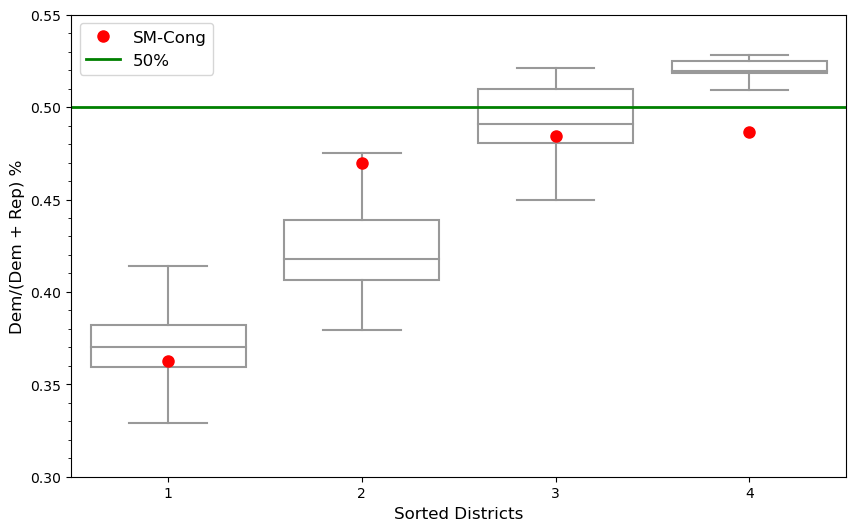

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator, NullFormatter

# Create a DataFrame 
df = pd.DataFrame({
    'District': np.tile(np.arange(1, k + 1), len(plans)),
    'Dem_Percent': np.concatenate(dem_fraction_by_plan)
})

#print(df.head(40))
print(df)

# Specific plan data (e.g., "SM-Cong")
sm_cong_df = pd.DataFrame({
    'District': np.arange(k),
    'Dem_Percent': (dem_fractions_enacted)
})

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='District', y='Dem_Percent', data=df, color='white', fliersize=0, linewidth=1.5)
plt.plot(sm_cong_df['District'], sm_cong_df['Dem_Percent'], 'o', color='red', label='SM-Cong', markersize=8)
plt.axhline(0.5, color='green', label='50%', linewidth=2)

# Set y-axis limits
plt.ylim(0.3, 0.55)

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))  # Major ticks every 0.05
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.01))  # Minor ticks every 0.01
plt.gca().yaxis.set_minor_formatter(NullFormatter())  # No labels for minor ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))  # Labels for major ticks

# Add labels and legend
plt.xlabel('Sorted Districts', fontsize=12)
plt.ylabel('Dem/(Dem + Rep) %', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
#plt.title('Democratic Vote Percentages in Districts', fontsize=14)

plt.show()


      District  Dem_Percent
0            1     0.118599
1            2     0.134836
2            3     0.158282
3            4     0.501937
4            1     0.101004
...        ...          ...
4411         4     0.289266
4412         1     0.078046
4413         2     0.151665
4414         3     0.225129
4415         4     0.289266

[4416 rows x 2 columns]


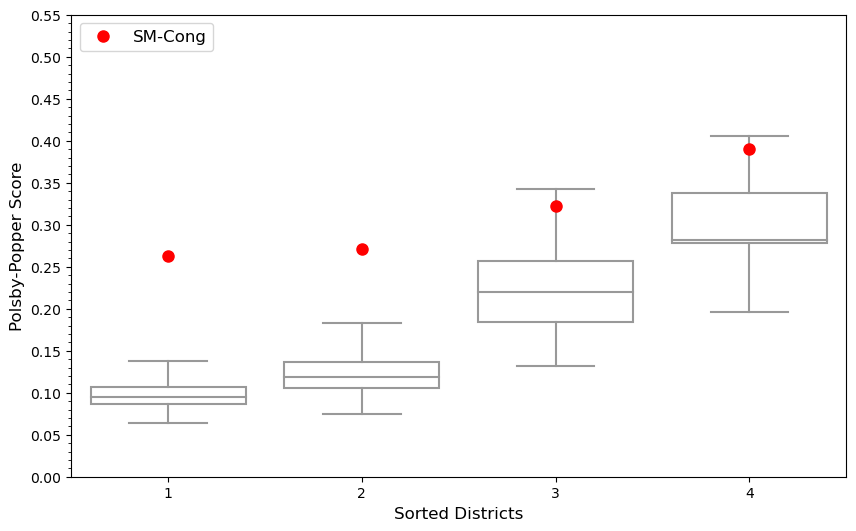

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator, NullFormatter

# Create a DataFrame 
df = pd.DataFrame({
    'District': np.tile(np.arange(1, k + 1), len(plans)),
    'Dem_Percent': np.concatenate(pps)
})

#print(df.head(40))
print(df)

# Specific plan data (e.g., "SM-Cong")
sm_cong_df = pd.DataFrame({
    'District': np.arange(k),
    'Dem_Percent': (pps_enacted)
})

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='District', y='Dem_Percent', data=df, color='white', fliersize=0, linewidth=1.5)
plt.plot(sm_cong_df['District'], sm_cong_df['Dem_Percent'], 'o', color='red', label='SM-Cong', markersize=8)
#plt.axhline(0.5, color='green', label='50%', linewidth=2)

# Set y-axis limits
plt.ylim(0.0, 0.55)

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))  # Major ticks every 0.05
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.01))  # Minor ticks every 0.01
plt.gca().yaxis.set_minor_formatter(NullFormatter())  # No labels for minor ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))  # Labels for major ticks

# Add labels and legend
plt.xlabel('Sorted Districts', fontsize=12)
plt.ylabel('Polsby-Popper Score', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
#plt.title('Democratic Vote Percentages in Districts', fontsize=14)

plt.show()

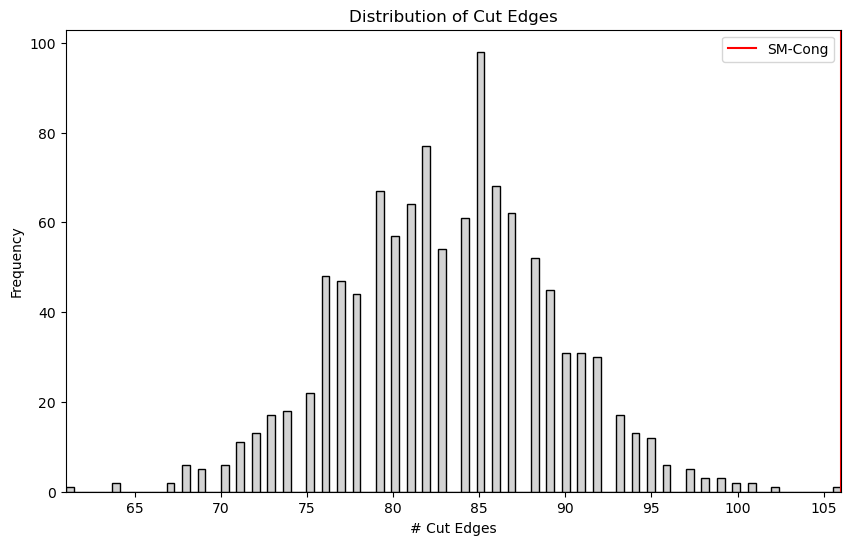

In [17]:
import matplotlib.pyplot as plt
import numpy as np

#flattens ces into a single list
ces_flat = [edge for plan in ces for edge in plan]

plt.figure(figsize=(10, 6))

# Create histogram
plt.hist(ces_flat, bins=100, color='lightgray', edgecolor='black')

# Add vertical lines
ensemble_mean = np.mean(ces_flat)
sm_cong = max(ces_flat)  # Assuming SM-Cong is the maximum value

#plt.axvline(x=ensemble_mean, color='green', linestyle='-', label='Ensemble Mean')
plt.axvline(x=sm_cong, color='red', linestyle='-', label='SM-Cong')

# Customize the plot
plt.title('Distribution of Cut Edges')
plt.xlabel('# Cut Edges')
plt.ylabel('Frequency')
plt.legend()

# Set x-axis range (adjust as needed based on your data)
plt.xlim(min(ces_flat), max(ces_flat))

# Show the plot
plt.show()

In [18]:
def assign_counties_to_districts(precinct_assignments, precinct_geoids):
    district_counties = {}
       
    precinct_to_county = {str(geoid): str(geoid)[:5] for geoid in precinct_geoids}
    #print(precinct_to_county.keys())
    for precinct, district in precinct_assignments.items():
        # Debugging: Check if the precinct is in the mapping
        if str(precinct) not in precinct_to_county.keys():
            print(f"Warning: {precinct} not found in precinct_to_county")
        county = precinct_to_county.get(precinct)
        if county is None:
            continue
        if district not in district_counties:
            district_counties[district] = set()
        district_counties[district].add(county)
    
    return {district: sorted(counties) for district, counties in district_counties.items()}

import pandas as pd
df = pd.read_csv('precinct-data.csv')
precinct_assignments = dict(zip(df['GEOID20'], df['District']))
precinct_geoids = list(precinct_assignments.keys())

district_counties = assign_counties_to_districts(precinct_assignments, precinct_geoids)



In [19]:
print(district_counties)

{}
